Evaluate the output trajectories from different models using common tools.

In [505]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

from eval_util import *


In [506]:
HOURS_PER_DAY = 24
TIME_PERIOD_DAYS = 5

In [507]:
def read_trajectories_from_file(filename):
    """
    Returns a list of lists, where each list represents a trajectory written to file.
    Expects file format where each line is one trajectory, and places in the trajectory are delimited by spaces.
    """
    trajectories = []
    with open(filename, 'r') as f:
        for _i, line in enumerate(f):
            line = line.strip()
            line = line.split()
            parse_line = [int(x) for x in line]
            trajectories.append(parse_line)
    return trajectories

Load and inspect the real data.

In [508]:
# Load the real trajectories data. Note these are prefixed by home,work labels
relabeled_trajectories_filename = '../data/relabeled_trajectories_1_workweek.txt'
real_trajectories = read_trajectories_from_file(relabeled_trajectories_filename)

In [509]:
# What is the vocabulary size? i.e. how many distinct labels?
vocab = set()
for t in real_trajectories:
    vocab.update(set(t))
print(len(vocab))

652


- How many distinct home labels?
- How many distinct (home, work) label pairs?
- Of the distinct (home, work) label pairs, how many users for each?

In [510]:
# initialize mappings
home_label_to_user_count = {t[0]:0 for t in real_trajectories}
home_work_label_pair_to_user_count = {(t[0], t[1]):0 for t in real_trajectories}
for t in real_trajectories:
    home_label = t[0]
    work_label = t[1]
    home_label_to_user_count[home_label] += 1
    home_work_label_pair_to_user_count[(home_label, work_label)] += 1

print('total number of users: %s' % len(real_trajectories))
print('number of distinct home labels: %s' % len(home_label_to_user_count))
print('number of distinct (home, work) label pairs: %s' % len(home_work_label_pair_to_user_count))
# print(home_label_to_user_count)
# home_work_label_pair_to_user_count

total number of users: 22704
number of distinct home labels: 646
number of distinct (home, work) label pairs: 8659


0
----- vector ----
prefix labels:  [1, 1]
[1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 4, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 5, 5, 5, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]


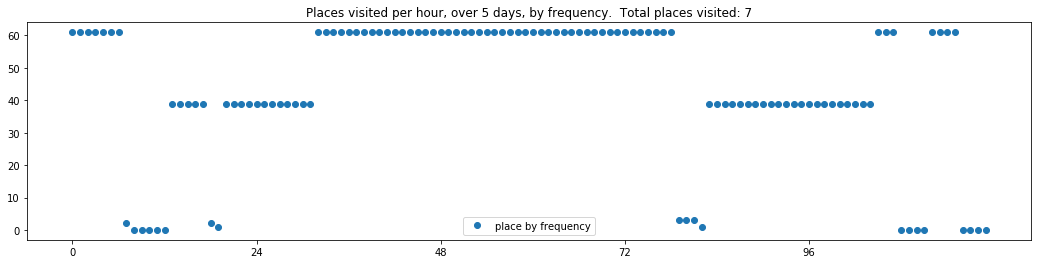

1
----- vector ----
prefix labels:  [7, 7]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 7, 7]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0]
[0, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7]
[7, 7, 7, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 7, 7, 7, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 7, 9, 0, 7, 7, 0, 0]


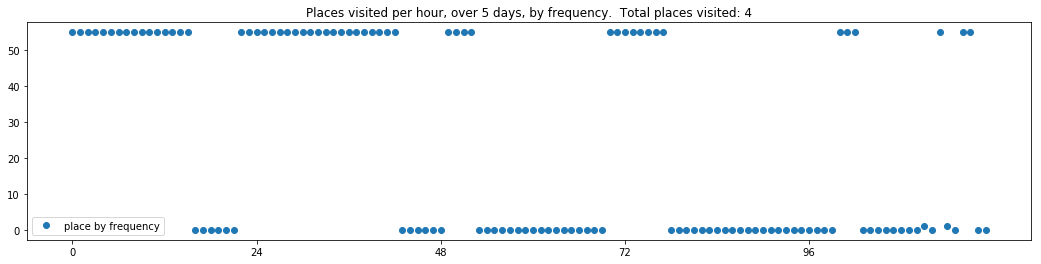

2
----- vector ----
prefix labels:  [10, 12]
[10, 11, 11, 11, 11, 11, 12, 12, 12, 13, 12, 12, 0, 12, 12, 11, 11, 11, 14, 14, 14, 14, 14, 14]
[14, 14, 14, 14, 11, 11, 0, 12, 12, 12, 12, 12, 12, 12, 12, 0, 10, 10, 10, 15, 10, 10, 10, 11]
[11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 12, 12, 11, 11, 11, 11, 0, 16, 17, 17, 17, 17]
[17, 17, 17, 0, 0, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 0, 10, 10, 10, 10, 10]
[10, 10, 10, 10, 11, 11, 12, 12, 13, 12, 13, 18, 12, 12, 12, 12, 10, 10, 10, 10, 10, 10, 10, 10]


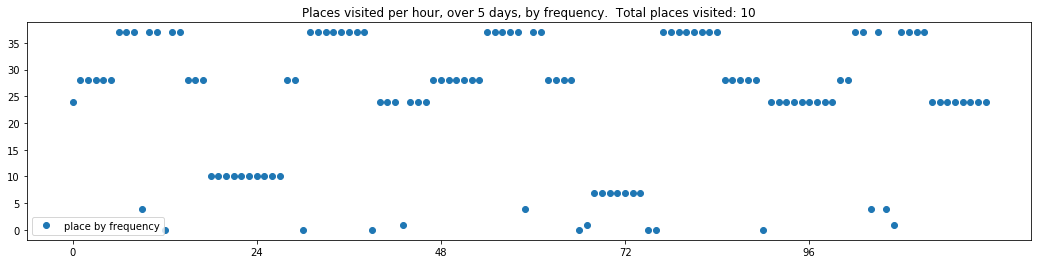

3
----- vector ----
prefix labels:  [19, 19]
[19, 19, 0, 0, 19, 19, 19, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19]
[19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 20, 20, 20, 20, 0]
[0, 0, 0, 0, 0, 0, 0, 19, 21, 21, 21, 21, 21, 21, 21, 0, 0, 19, 19, 19, 19, 19, 19, 22]


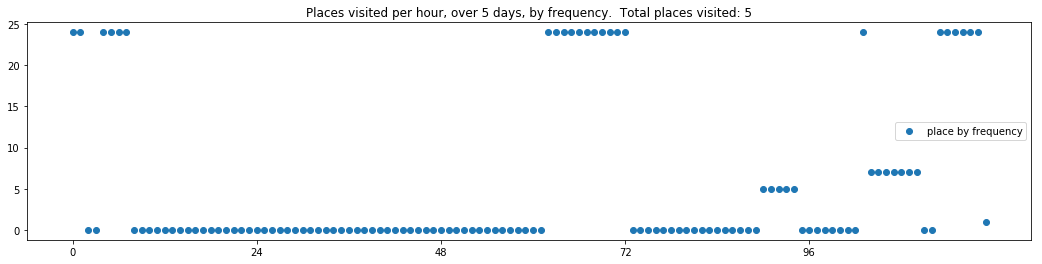

4
----- vector ----
prefix labels:  [23, 24]
[23, 23, 23, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 24, 24, 24, 24, 24, 0, 0, 23, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23]
[23, 23, 23, 23, 23, 23, 23, 23, 0, 25, 0, 0, 0, 24, 0, 0, 0, 0, 0, 26, 0, 0, 0, 0]


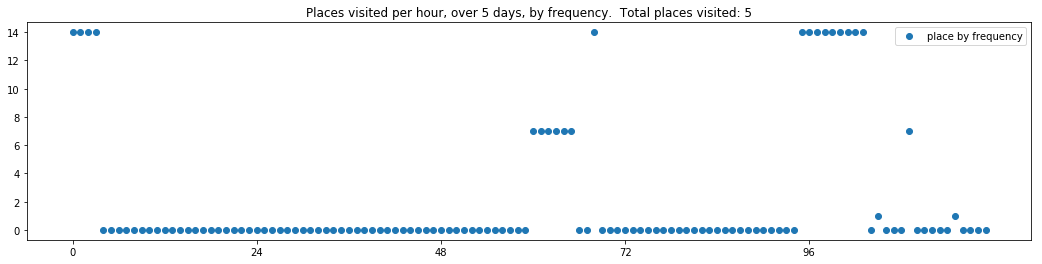

5
----- vector ----
prefix labels:  [27, 27]
[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 0, 0, 0, 0, 0, 0, 0, 20, 20, 27]
[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 21, 0, 0, 0, 0, 0, 0, 20, 20, 20]
[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 21, 0, 0, 0, 0, 0, 0, 20, 20, 20]
[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 0, 0, 0, 0, 0, 0, 0, 20, 20, 20]
[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 0, 0, 0, 0, 0, 0, 0, 0, 20, 28, 27]


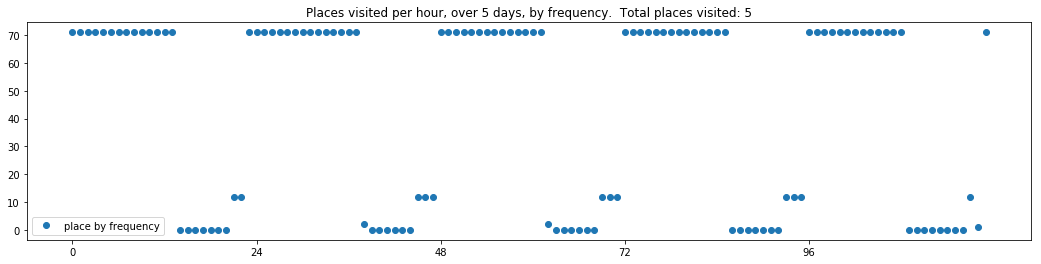

6
----- vector ----
prefix labels:  [29, 29]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 31, 31, 32, 32, 29, 0, 0, 33, 29, 29, 29, 29, 29]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 34, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 0, 35, 29, 29, 29, 29, 29, 29, 32, 29, 29, 29]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 36, 36, 0, 29, 29, 29, 29, 29, 29, 29, 0, 0, 0, 29]


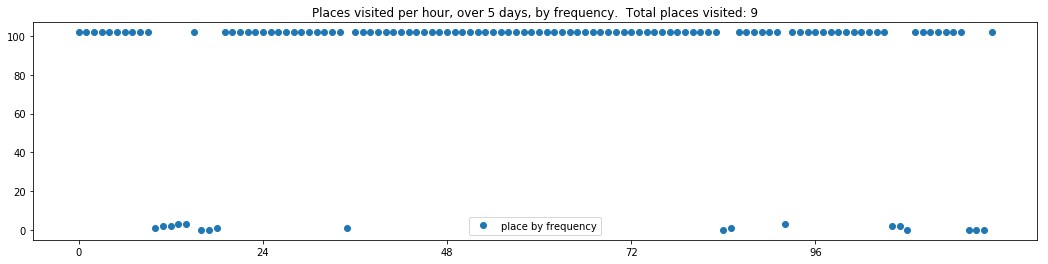

7
----- vector ----
prefix labels:  [37, 38]
[37, 37, 37, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 37, 37]
[37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 38, 38, 0, 0, 0, 0, 0, 0, 39, 39, 39, 39]
[0, 0, 0, 0, 0, 0, 0, 37, 0, 0, 0, 0, 0, 0, 38, 38, 38, 38, 38, 38, 38, 37, 37, 37]
[37, 37, 37, 37, 37, 37, 37, 37, 37, 0, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39]
[37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 0, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39]


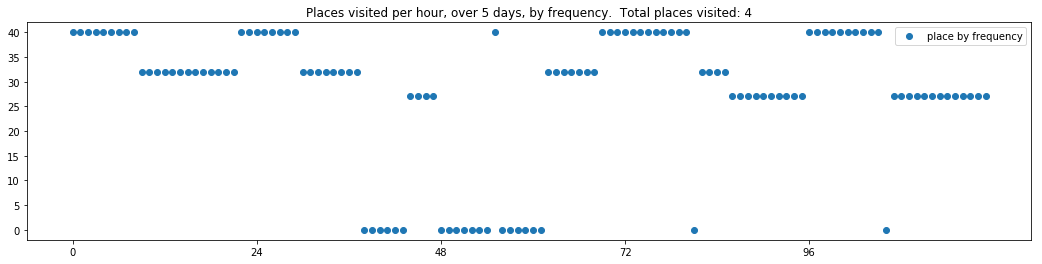

8
----- vector ----
prefix labels:  [41, 41]
[40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 20, 20, 20, 20, 20, 20, 40, 40, 40, 40, 40]
[40, 40, 40, 40, 40, 40, 0, 20, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 41, 41, 41, 41, 41]
[41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41]
[41, 41, 41, 41, 41, 41, 41, 40, 40, 40, 40, 40, 0, 0, 40, 40, 41, 41, 0, 42, 41, 41, 41, 41]


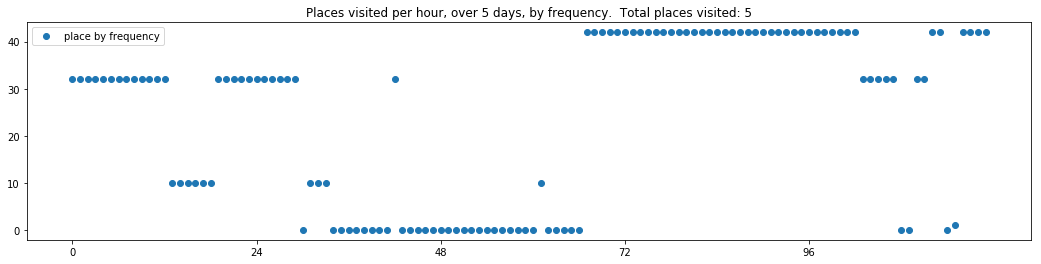

9
----- vector ----
prefix labels:  [43, 43]
[43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43]
[43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 44, 0, 0, 43, 43, 43, 43, 0, 0, 43, 43, 43]
[43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 0, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43]
[43, 43, 43, 43, 43, 43, 43, 43, 43, 0, 0, 0, 43, 43, 43, 43, 43, 43, 43, 0, 0, 0, 43, 43]
[43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 43, 0, 0, 0, 0, 0]


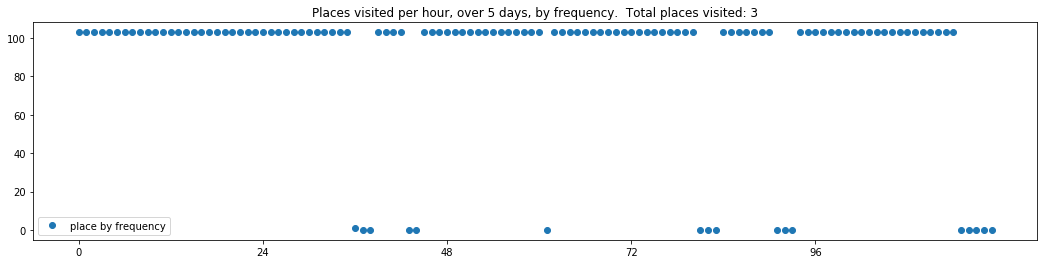

10
----- vector ----
prefix labels:  [45, 45]
[45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46, 0, 0, 0, 0]
[0, 45, 45, 45, 45, 45, 45, 0, 0, 0, 45, 0, 0, 0, 0, 0, 0, 0, 45, 0, 0, 47, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 0, 0, 45, 45, 45, 0, 0, 0, 45, 0, 0]


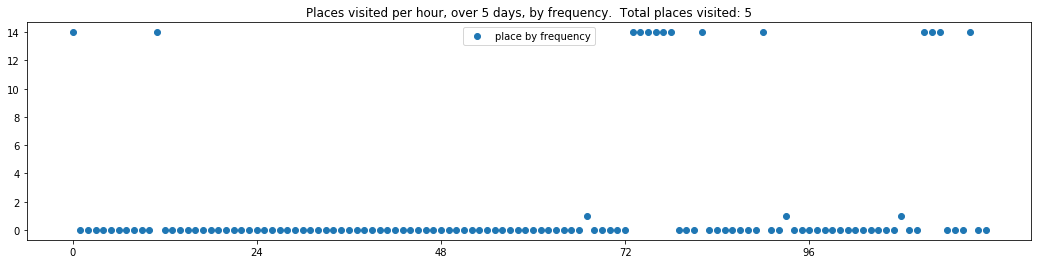

11
----- vector ----
prefix labels:  [49, 49]
[20, 0, 20, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 20, 50, 50, 51, 0, 20, 0, 0, 0]
[20, 0, 0, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 20, 20, 0, 52, 0, 22, 20, 53, 20]
[20, 0, 49, 49, 0, 0, 0, 0, 0, 0, 49, 49, 49, 20, 0, 54, 0, 0, 49, 20, 0, 0, 0, 55]
[20, 0, 0, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 56, 0, 57, 22, 20, 0, 0]
[0, 20, 20, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 58, 59, 59, 0, 58, 58, 49, 49, 20, 0, 20]


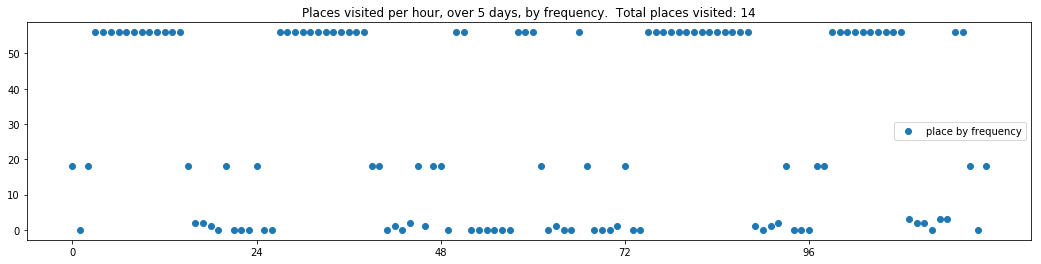

12
----- vector ----
prefix labels:  [60, 0]
[60, 60, 0, 0, 60, 60, 0, 61, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 62, 62, 62, 62, 62, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60, 60]
[60, 60, 60, 60, 60, 60, 60, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60]
[60, 60, 60, 60, 60, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 60]


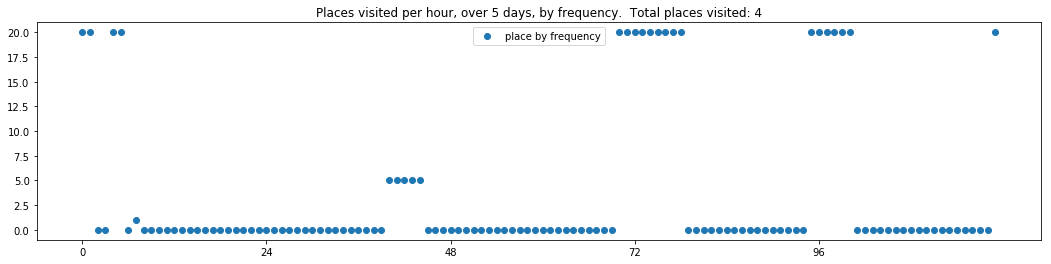

13
----- vector ----
prefix labels:  [64, 65]
[63, 63, 0, 0, 0, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 64, 64, 64, 64, 64, 64, 64, 64, 64]
[64, 64, 64, 64, 64, 64, 64, 64, 66, 65, 65, 65, 65, 65, 65, 31, 31, 67, 31, 31, 64, 64, 64, 64]
[64, 64, 64, 64, 64, 64, 64, 64, 64, 0, 65, 65, 65, 65, 65, 66, 64, 64, 64, 64, 68, 64, 64, 64]
[64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 64, 64, 64, 64, 69, 31, 31, 64, 64]
[64, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 31, 31, 31, 0, 0, 66, 66, 64, 64, 64, 64, 64]


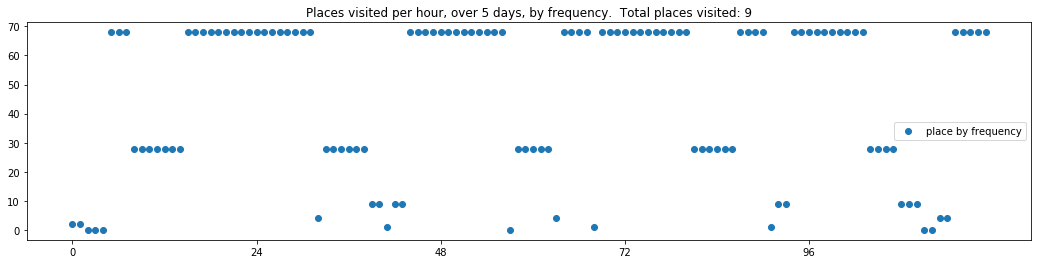

14
----- vector ----
prefix labels:  [70, 71]
[70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 71, 70, 70, 70, 70, 70, 70, 70, 70]
[0, 70, 70, 70, 70, 70, 70, 71, 71, 71, 0, 0, 0, 0, 70, 70, 70, 70, 70, 70, 70, 70, 70, 21]
[70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 72, 70, 70, 70, 70, 70, 70, 70, 70]
[70, 70, 70, 70, 70, 70, 70, 71, 71, 71, 71, 71, 71, 71, 71, 0, 70, 70, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 70, 70, 0, 0, 0, 0, 0, 0, 0]


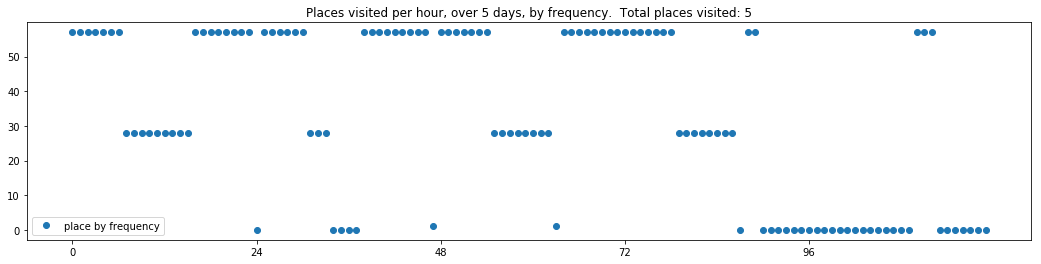

15
----- vector ----
prefix labels:  [15, 73]
[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 73, 73, 73, 73, 73, 73, 73, 15, 15, 15, 15, 15, 15, 15]
[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 0, 15, 73, 73, 73, 73, 73, 73, 73, 73, 73]
[15, 15, 15, 15, 15, 15, 15, 15, 15, 73, 73, 73, 73, 73, 73, 73, 73, 73, 15, 0, 15, 15, 52, 52]
[52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 74, 74, 8, 8, 21, 21, 21, 21, 52, 52, 52, 15]
[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 0, 0, 0, 0, 0, 0, 0, 0]


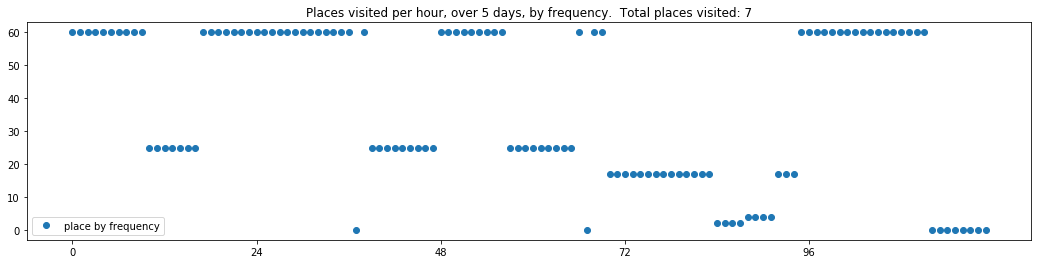

16
----- vector ----
prefix labels:  [75, 75]
[75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 0, 0, 77, 77, 77, 77, 77, 75, 75, 75, 75, 75, 75]
[75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 75, 75, 75, 75, 75, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 75]
[75, 75, 75, 75, 75, 75, 75, 75, 75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75]


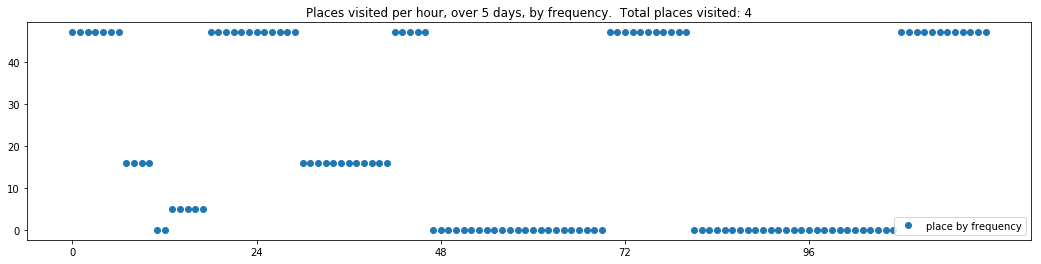

17
----- vector ----
prefix labels:  [78, 31]
[78, 78, 78, 78, 31, 79, 79, 80, 81, 31, 31, 13, 13, 34, 82, 83, 3, 31, 31, 78, 78, 20, 84, 78]
[78, 78, 78, 78, 31, 31, 31, 80, 82, 31, 31, 31, 31, 31, 35, 83, 0, 0, 0, 0, 78, 20, 84, 78]
[78, 78, 0, 78, 31, 31, 83, 83, 82, 31, 31, 31, 31, 31, 31, 85, 31, 31, 78, 78, 20, 20, 84, 78]
[78, 78, 78, 0, 0, 0, 80, 80, 82, 31, 31, 31, 31, 31, 82, 80, 35, 86, 78, 78, 20, 20, 84, 78]
[78, 78, 78, 78, 31, 31, 31, 80, 82, 31, 31, 31, 31, 31, 81, 80, 3, 85, 85, 78, 20, 53, 78, 78]


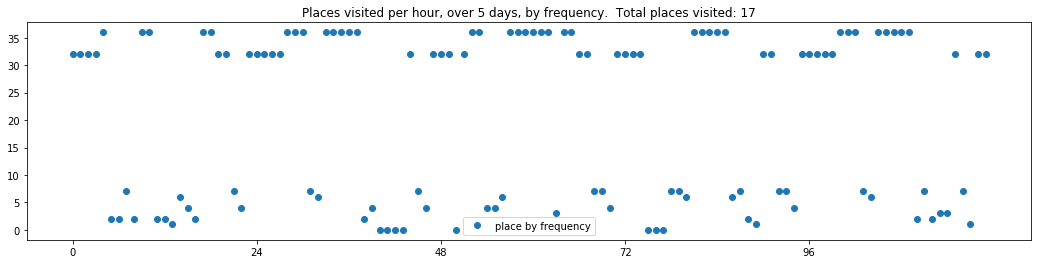

18
----- vector ----
prefix labels:  [87, 87]
[87, 87, 87, 87, 87, 87, 87, 87, 88, 89, 89, 89, 89, 89, 89, 89, 0, 89, 89, 0, 90, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 89, 0, 0, 0, 89, 89, 89, 89, 0, 0, 0, 87, 87, 87]
[87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 91, 87, 87, 87, 87, 87]
[87, 87, 87, 87, 87, 87, 87, 87, 89, 89, 89, 87, 87, 87, 87, 87, 87, 87, 87, 0, 0, 0, 87, 87]
[87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 92, 0, 87, 87, 87, 0, 0, 0, 0, 0, 0]


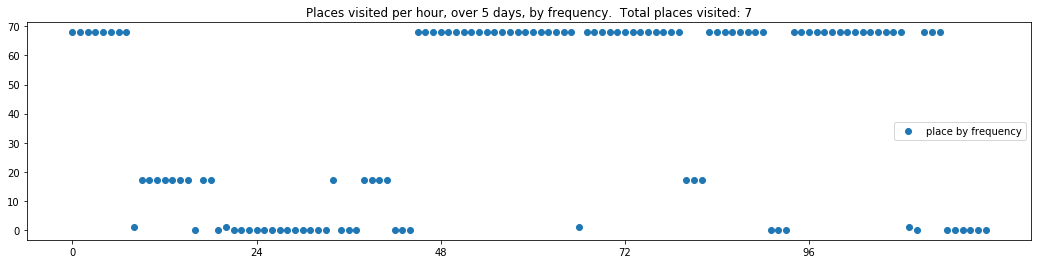

19
----- vector ----
prefix labels:  [93, 94]
[93, 93, 93, 93, 93, 93, 93, 93, 0, 0, 0, 0, 0, 0, 0, 94, 0, 93, 93, 93, 93, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 93, 93, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 94, 94, 94, 94, 94, 94, 0, 0, 95, 0, 0, 0, 0, 0, 93]
[93, 93, 93, 93, 93, 93, 93, 93, 0, 0, 94, 94, 94, 94, 94, 94, 94, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 93, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4]


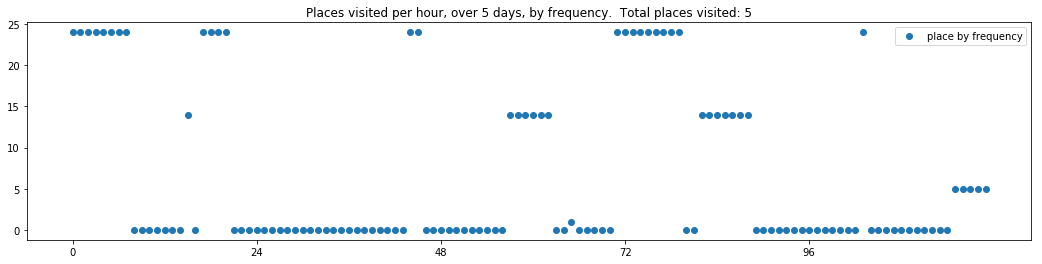

In [462]:
for t, tv in enumerate(real_trajectories[:20]):
    print(t)
    print_dwell_vector_by_days(tv)
    plot_trajectory_vector_frequencies(tv, by_frequency_order=False)

Evaluate the SeqGAN output

In [87]:
import re

def get_eval_files():
    filenames = {}
    # There are a bunch of evaluation files saved in the following directory
    seqgan_eval_files_dir = '/Users/aberke/projects/gan-hacking/SeqGAN/save/'
    for filename in os.listdir(seqgan_eval_files_dir):
        eval_num = re.findall(r'\d+', filename)
        if not (filename.startswith('eval_file_') and len(eval_num)):
            continue
        eval_num = int(eval_num[0])
        fullfilename = seqgan_eval_files_dir + filename
        filenames[eval_num] = fullfilename
    return filenames

eval_filenames = get_eval_files()


------
 0 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_0.txt 
------

----- vector ----
prefix labels:  [340, 340]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 340, 477, 477, 477, 0, 0, 0]
[0, 0, 0, 581, 367, 174, 174, 174, 174, 174, 0, 0, 0, 0, 0, 0, 174, 174, 174, 174, 174, 174, 174, 174]
[174, 174, 174, 174, 0, 0, 621, 242, 242, 242, 242, 0, 22, 21, 21, 21, 21, 21, 0, 0, 0, 0, 0, 0]
[0, 0, 21, 21, 21, 21, 21, 13, 13, 21, 21, 629, 629, 629, 272, 272, 454, 397, 0, 0, 20, 20, 41, 41]
[41, 0, 0, 0, 0, 0, 0, 0, 0, 0, 479, 444, 444, 41, 629, 0, 0, 629, 629, 629, 629, 629, 629, 629]


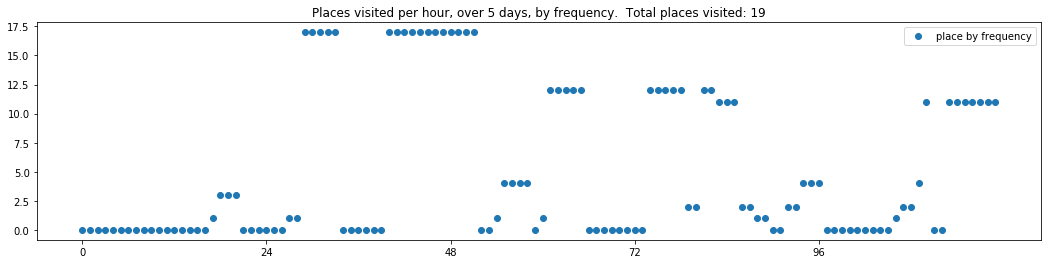

----- vector ----
prefix labels:  [581, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 398, 398, 0, 0, 0, 0, 163, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 55, 53]
[39, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 482, 482, 0, 581, 581, 581, 581, 581]
[581, 581, 0, 0, 0, 0, 130, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 163, 163, 0, 0, 0, 0, 0, 130, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


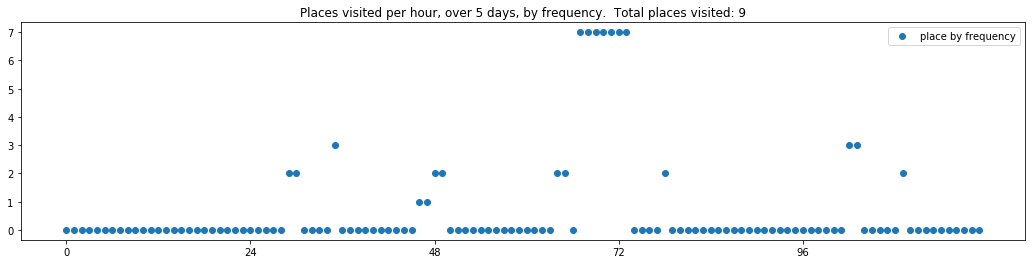

----- vector ----
prefix labels:  [568, 527]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 20, 20, 20, 20, 20, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 20, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


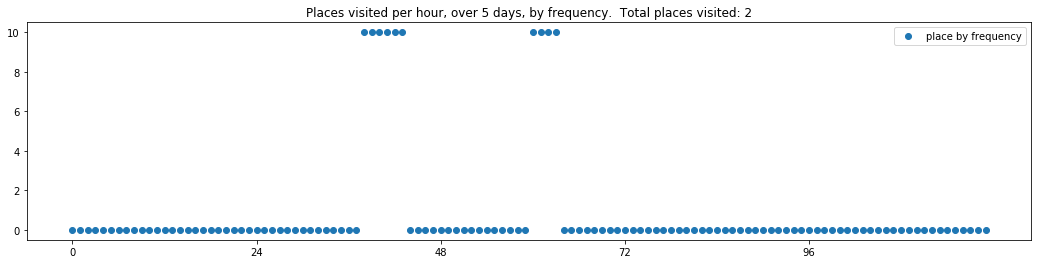

----- vector ----
prefix labels:  [411, 411]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411]
[411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 411, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16]
[0, 0, 0, 0, 0, 0, 0, 271, 0, 0, 0, 0, 0, 0, 174, 411, 411, 411, 174, 193, 76, 76, 76, 76]


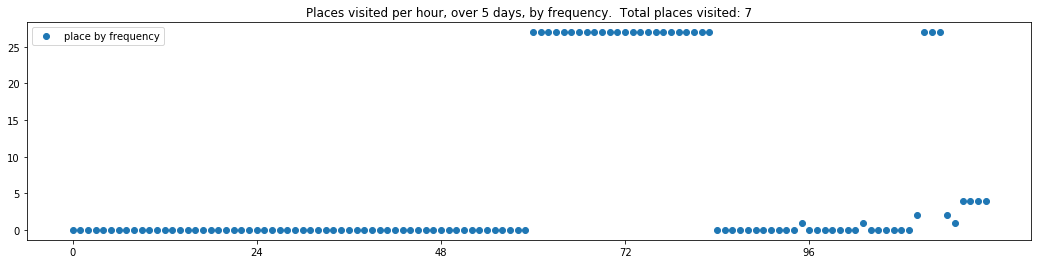

----- vector ----
prefix labels:  [165, 608]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 91, 0, 165, 165, 165, 165, 165, 165, 165, 165, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[493, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 311, 0, 311]
[311, 311, 311, 311, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608, 608]


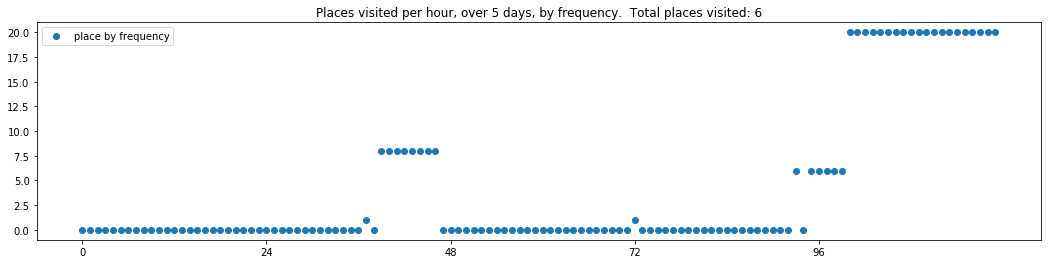

----- vector ----
prefix labels:  [417, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 55, 0, 0, 0, 0, 56, 178, 0, 0, 0, 0]
[374, 374, 0, 417, 417, 417, 417, 417, 417, 417, 417, 417, 21, 0, 451, 417, 417, 417, 417, 0, 0, 0, 0, 0]
[0, 0, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417]
[417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417, 417]


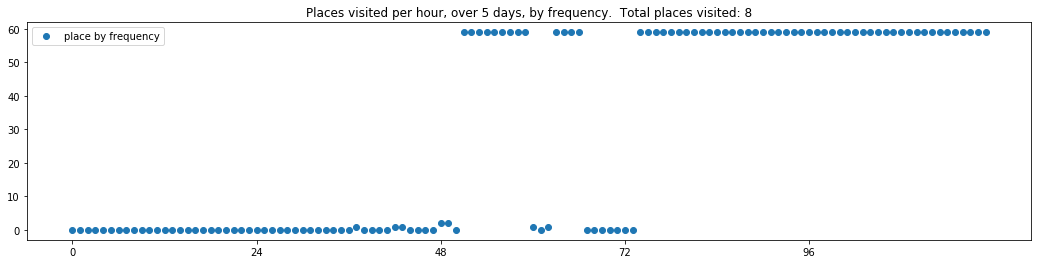

----- vector ----
prefix labels:  [76, 116]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 55, 55, 0]
[307, 473, 0, 0, 0, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 0]
[364, 373, 373, 373, 373, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 184, 184, 0, 0, 0, 0]


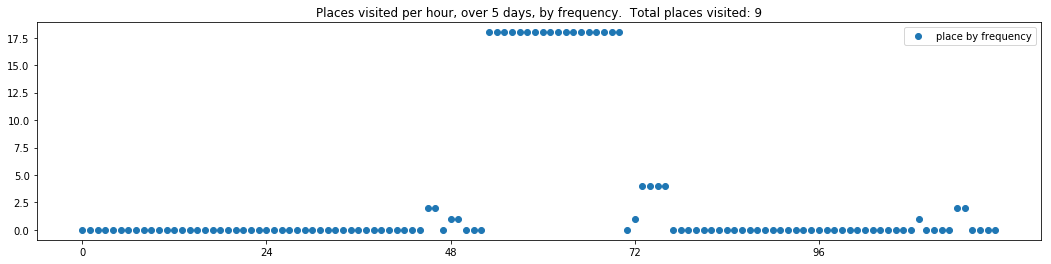

----- vector ----
prefix labels:  [433, 433]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 433, 433, 433, 433, 433, 433, 433]
[433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 433, 318, 223, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


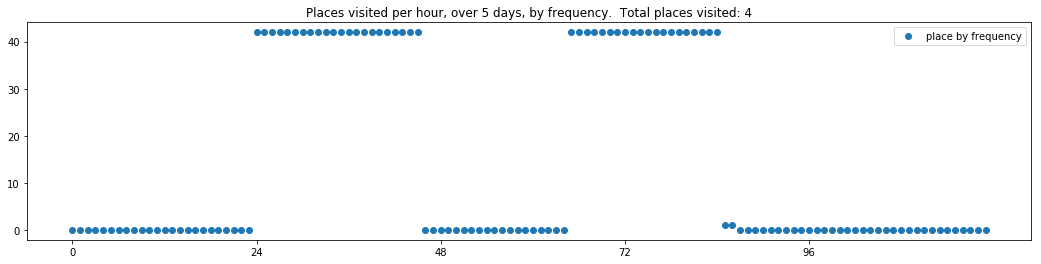

----- vector ----
prefix labels:  [108, 44]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44]
[44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 0, 0, 0, 0, 0, 44, 0, 44, 44, 44, 44, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 126, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 0, 44]


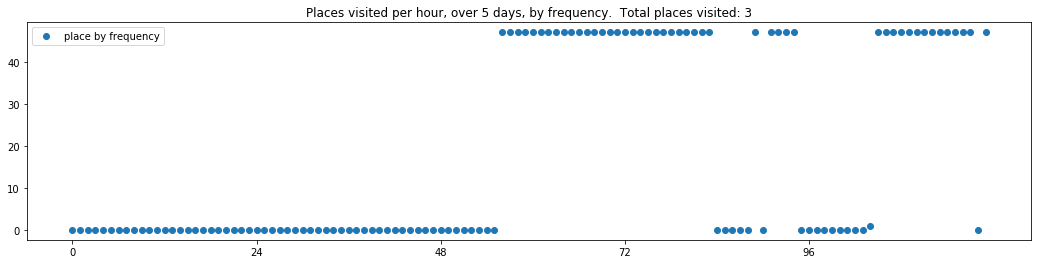

----- vector ----
prefix labels:  [85, 288]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 141, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[16, 181, 0, 0, 0, 0, 0, 87, 58, 58, 58, 58, 0, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36]
[36, 36, 36, 36, 36, 36, 36, 36, 393, 393, 51, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58, 58]


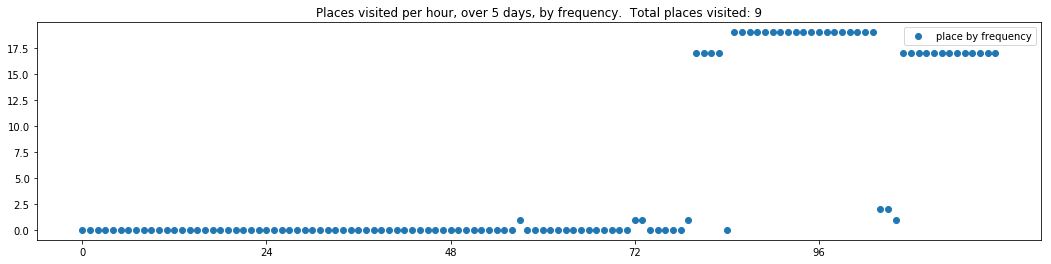


------
 5 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_5.txt 
------

----- vector ----
prefix labels:  [437, 437]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 437, 437, 437, 437, 437, 437, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 437, 437, 437, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 437]
[437, 437, 437, 437, 437, 437, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


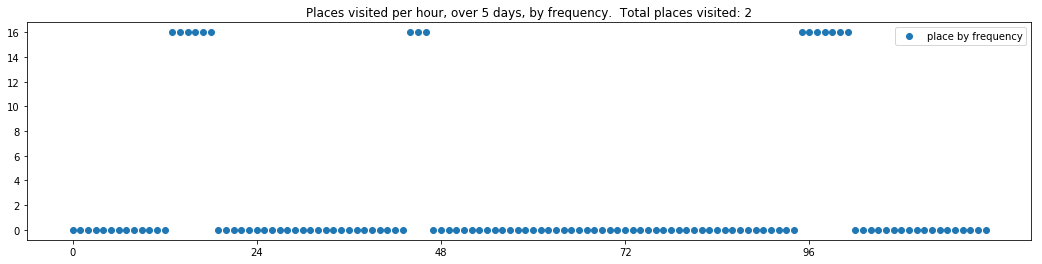

----- vector ----
prefix labels:  [511, 511]
[0, 0, 0, 0, 0, 0, 0, 0, 356, 356, 356, 356, 356, 356, 356, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 32, 0, 0, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84]
[84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511]
[511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 0]
[0, 0, 0, 225, 225, 225, 0, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511, 511]


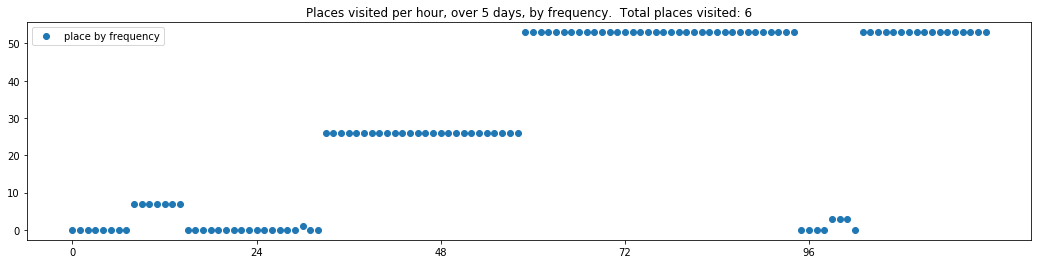

----- vector ----
prefix labels:  [195, 195]
[0, 0, 0, 0, 0, 195, 195, 195, 0, 0, 0, 195, 195, 195, 195, 195, 195, 195, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 195, 195, 195, 195, 195, 195, 0, 0, 0, 0, 0, 0, 0, 0, 195, 195, 195, 195, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 205, 205, 205, 195, 0, 195, 20, 0, 0]


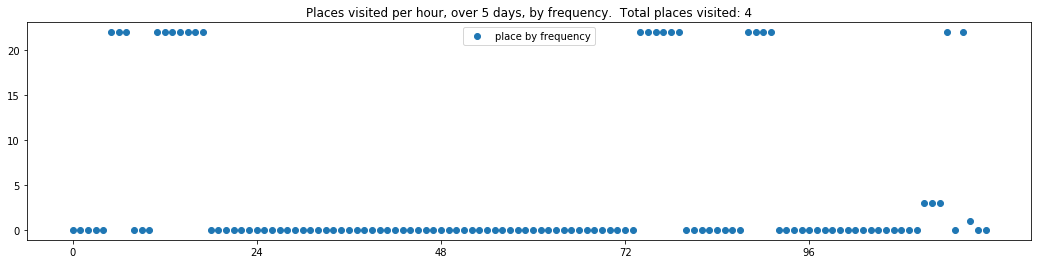

----- vector ----
prefix labels:  [388, 419]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 419, 419, 419, 419, 419, 419, 419, 71, 71, 71, 0, 0, 0, 0, 0, 0, 0, 0, 71, 0, 0, 0, 0]


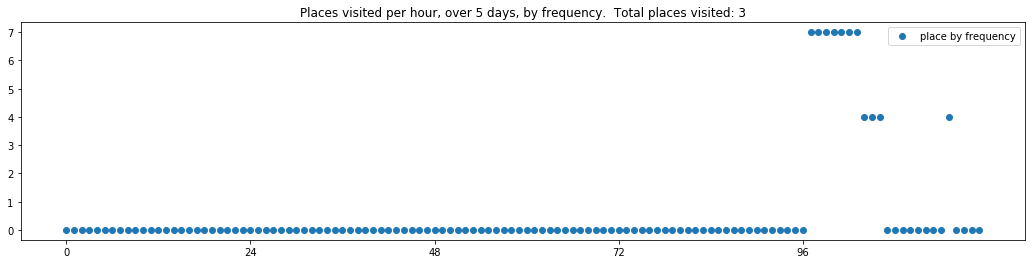

----- vector ----
prefix labels:  [44, 44]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 185, 74, 0, 0, 561, 561]
[561, 561, 0, 0, 0, 0, 0, 0, 0, 0, 0, 548, 508, 0, 295, 295, 147, 20, 10, 261, 261, 20, 20, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 360, 360, 360, 360, 0, 507, 5, 5, 5, 5, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 435, 435, 0, 0, 0, 0, 0, 0, 638, 0]
[0, 0, 0, 485, 0, 0, 0, 261, 261, 261, 261, 261, 261, 261, 261, 146, 146, 0, 2, 2, 2, 2, 2, 2]


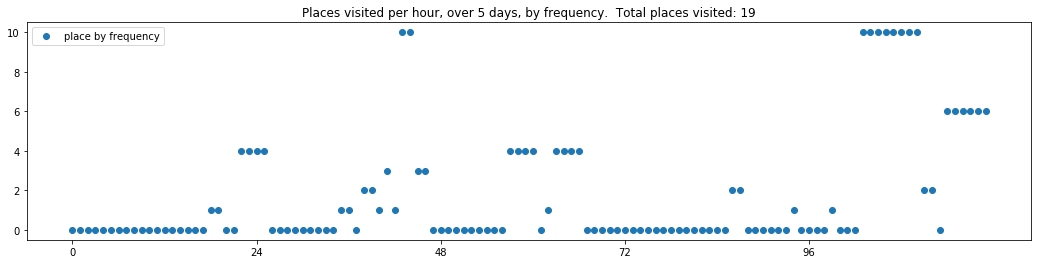

----- vector ----
prefix labels:  [154, 154]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 154, 154, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 112, 112, 112, 154, 154, 154, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 112, 112, 112, 112, 112, 593, 593, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 419, 419, 69, 154, 154, 112, 112, 112, 112, 0, 0, 0, 0, 112, 112, 154, 154, 154, 154, 154, 154]
[154, 154, 154, 154, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 112, 112, 154, 154, 154]


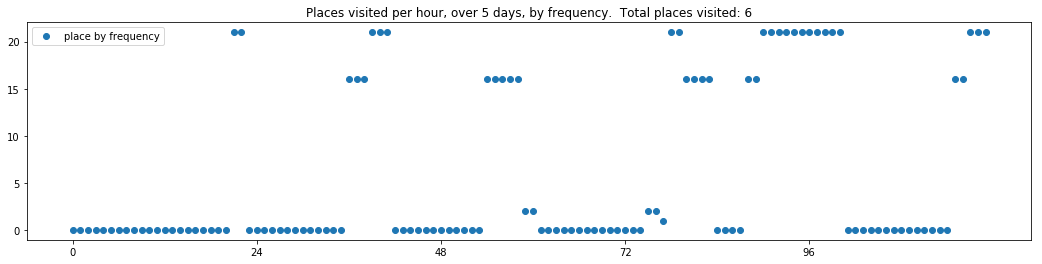

----- vector ----
prefix labels:  [39, 232]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 313, 313, 313, 313, 313, 313, 313, 313, 313]
[313, 313, 313, 313, 313, 313, 313, 313, 313, 313, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


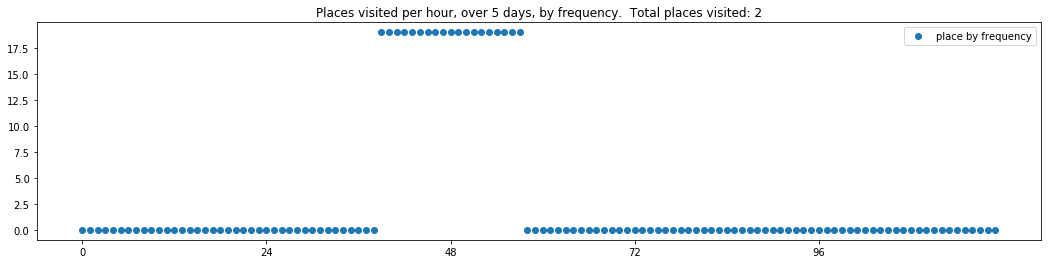

----- vector ----
prefix labels:  [22, 22]
[0, 0, 0, 0, 0, 0, 0, 22, 22, 0, 0, 0, 0, 0, 0, 0, 22, 22, 22, 22, 22, 22, 22, 22]
[22, 22, 22, 22, 22, 22, 22, 307, 307, 307, 307, 307, 307, 0, 0, 0, 0, 0, 0, 22, 22, 22, 22, 22]
[20, 20, 0, 0, 0, 0, 21, 0, 0, 0, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 22, 271, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 162, 0, 0, 0, 0, 0, 0, 0, 0, 20, 22]


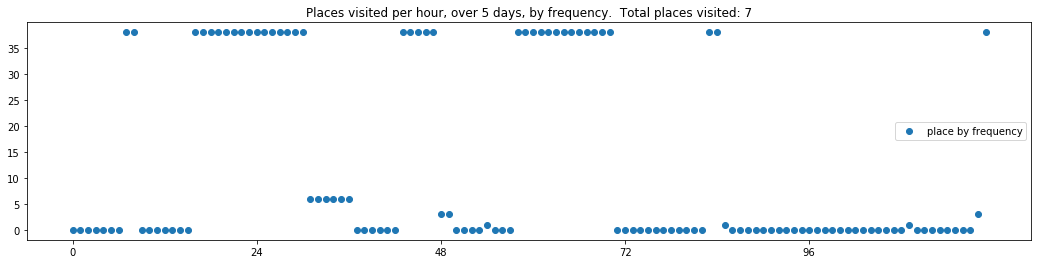

----- vector ----
prefix labels:  [122, 503]
[0, 0, 0, 25, 332, 332, 332, 332, 332, 332, 586, 586, 586, 586, 586, 586, 586, 523, 116, 116, 0, 0, 0, 503]
[503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503]
[503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503]
[503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503]
[503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 503, 199, 199, 199, 199, 199, 199, 199, 199, 197]


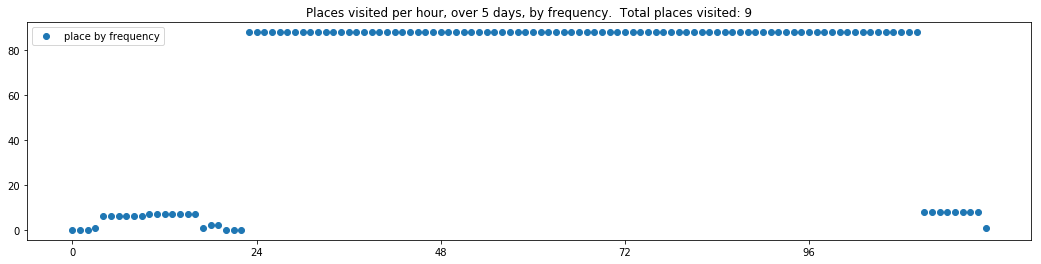

----- vector ----
prefix labels:  [183, 21]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 464, 3, 3, 261, 388, 388, 388, 388, 388]
[388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 0, 0, 0, 0, 573, 573, 574, 0, 0, 476, 330]
[330, 288, 393, 239, 239, 239, 239, 239, 84, 476, 0, 0, 388, 430, 430, 430, 0, 227, 227, 561, 227, 227, 227, 227]
[227, 227, 227, 227, 227, 561, 561, 561, 227, 0, 561, 561, 561, 561, 561, 561, 561, 561, 561, 561, 561, 561, 561, 561]
[561, 561, 561, 561, 561, 561, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 480, 480]


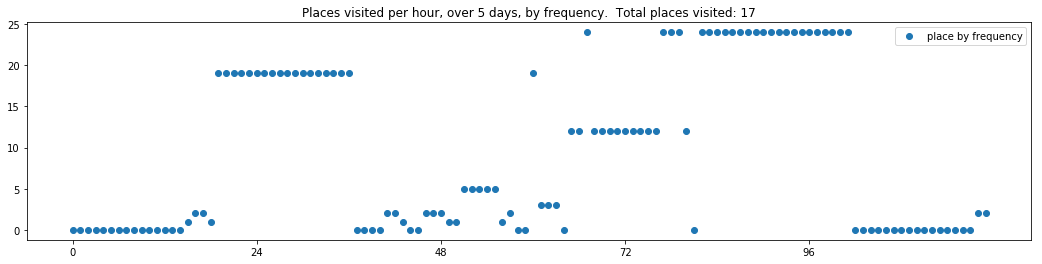


------
 10 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_10.txt 
------

----- vector ----
prefix labels:  [321, 321]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


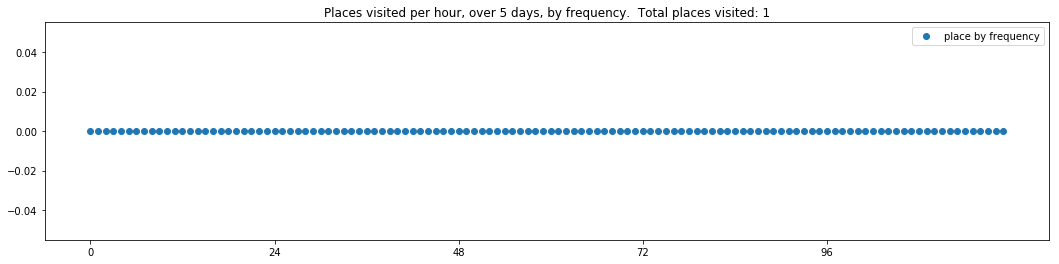

----- vector ----
prefix labels:  [618, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 618, 618, 618, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 385, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[336, 336, 336, 336, 336, 336, 336, 336, 336, 336, 336, 0, 0, 0, 0, 0, 0, 0, 0, 404, 404, 0, 0, 0]
[0, 0, 424, 424, 424, 424, 424, 424, 424, 424, 236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 223, 0]


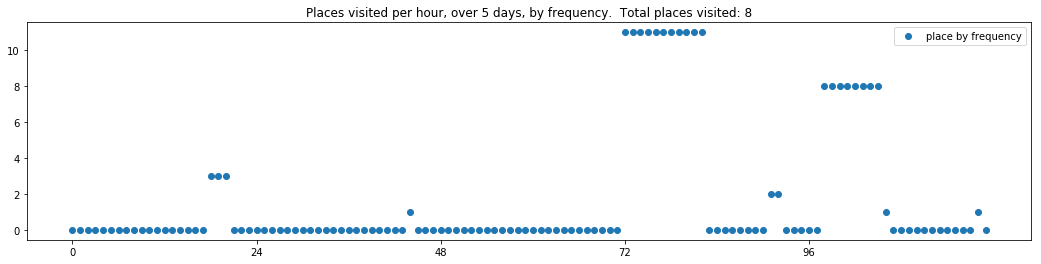

----- vector ----
prefix labels:  [22, 22]
[0, 0, 0, 0, 22, 22, 22, 162, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 22, 22, 22, 0, 0, 0, 0, 0, 0, 22, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 342, 342]
[271, 271, 271, 271, 271, 271, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 0, 0]
[0, 0, 0, 0, 0, 0, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 52, 52, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


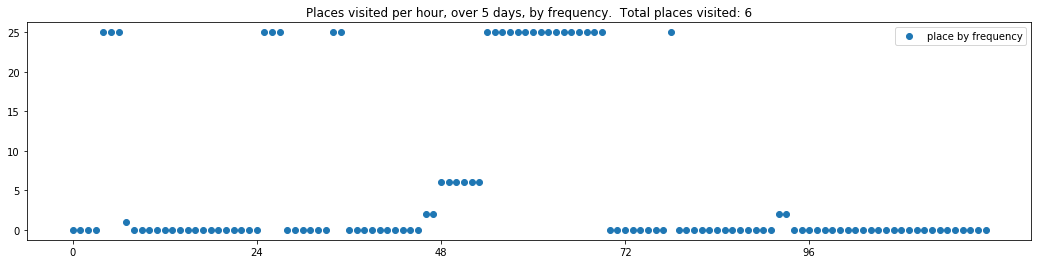

----- vector ----
prefix labels:  [46, 46]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46, 46, 46, 46, 46, 46, 46]
[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46]
[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46]
[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 0, 0, 0, 0, 0, 0, 46, 46, 46, 46, 46, 46, 46]


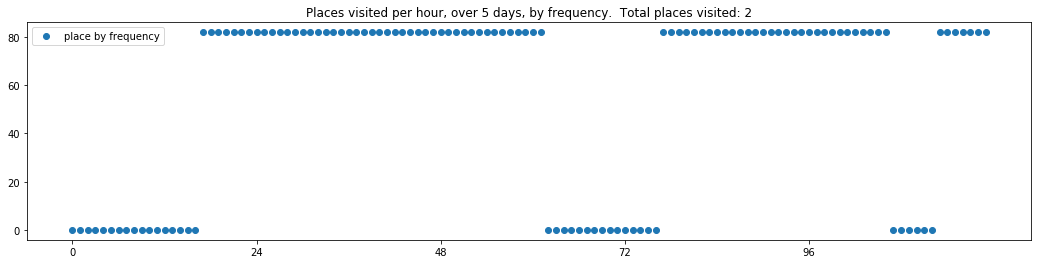

----- vector ----
prefix labels:  [350, 133]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 192, 59, 59, 133, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 541, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 374, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[162, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


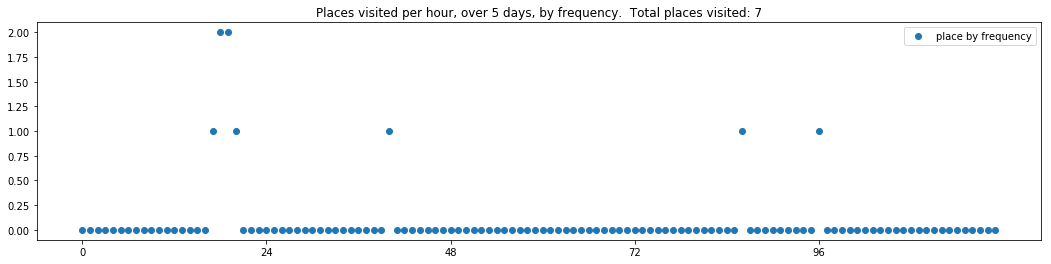

----- vector ----
prefix labels:  [92, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


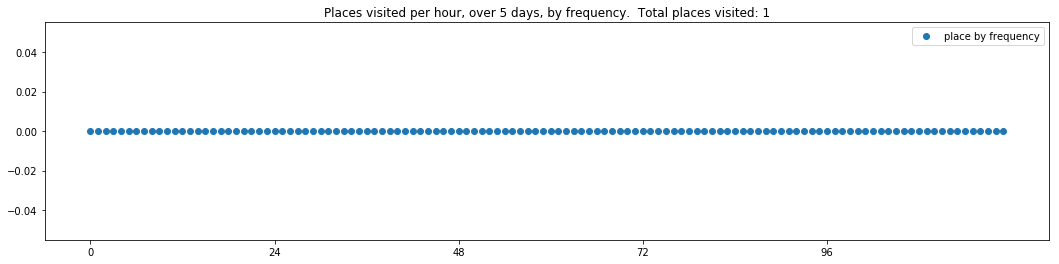

----- vector ----
prefix labels:  [323, 323]
[0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 225, 225, 0, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 42, 0, 0, 0, 0, 0, 0, 0, 0, 350, 350]
[350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 350, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 225, 225, 225, 225, 225]


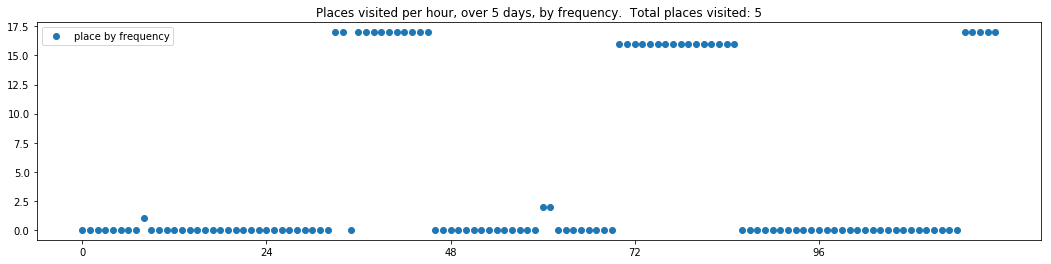

----- vector ----
prefix labels:  [494, 76]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[558, 0, 443, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 464, 464, 0, 464, 464, 464, 464, 464, 558]
[558, 558, 0, 0, 0, 0, 0, 0, 598, 598, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 0, 2, 0, 0]
[0, 0, 0, 0, 598, 598, 598, 461, 461, 461, 0, 122, 122, 598, 0, 184, 184, 184, 0, 0, 0, 0, 0, 0]
[475, 116, 116, 116, 0, 0, 0, 0, 0, 0, 0, 0, 70, 612, 612, 0, 370, 370, 249, 257, 257, 257, 257, 257]


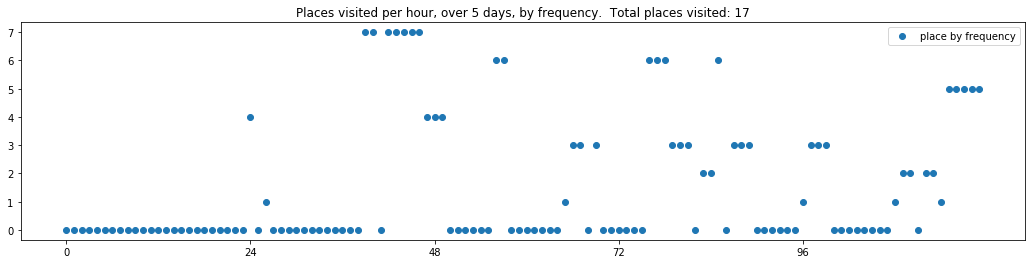

----- vector ----
prefix labels:  [21, 290]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 290, 290, 0, 0, 290, 290, 290, 290, 290, 290]
[290, 290, 290, 558, 558, 558, 558, 558, 558, 290, 290, 290, 290, 290, 290, 290, 290, 290, 556, 447, 76, 76, 22, 22]
[22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 76, 29, 0, 0, 0, 0, 0, 0, 100, 0, 66]
[66, 66, 66, 0, 0, 0, 56, 143, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


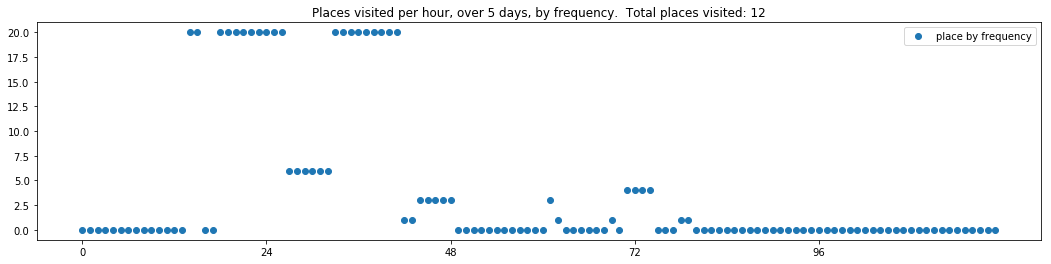

----- vector ----
prefix labels:  [184, 184]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 184, 184, 184]
[184, 184, 0, 0, 0, 0, 0, 0, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184]
[184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184]
[184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184]
[184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184]


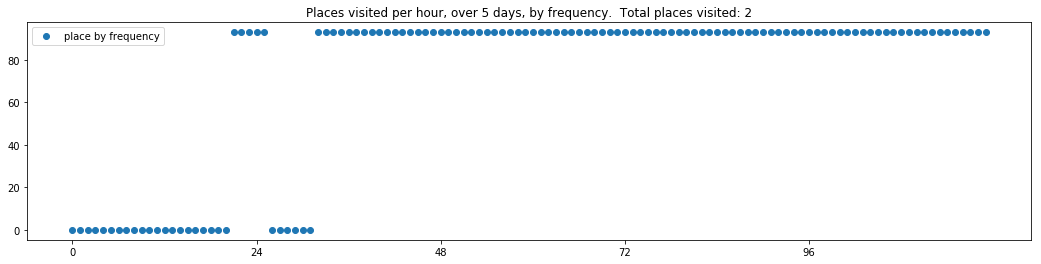


------
 15 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_15.txt 
------

----- vector ----
prefix labels:  [507, 488]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 568, 0, 0, 0, 235, 235, 541, 541, 541, 0, 0, 488, 488, 488, 488, 488, 488, 488, 488, 488, 488]
[488, 488, 488, 488, 488, 488, 488, 488, 488, 45, 45, 488, 488, 488, 488, 488, 488, 488, 488, 488, 488, 0, 0, 507]
[492, 492, 492, 0, 507, 507, 507, 507, 568, 568, 568, 488, 488, 488, 488, 488, 488, 488, 488, 488, 488, 488, 488, 488]
[488, 488, 488, 488, 488, 488, 488, 286, 488, 488, 488, 488, 488, 488, 488, 488, 488, 488, 507, 507, 507, 507, 488, 488]


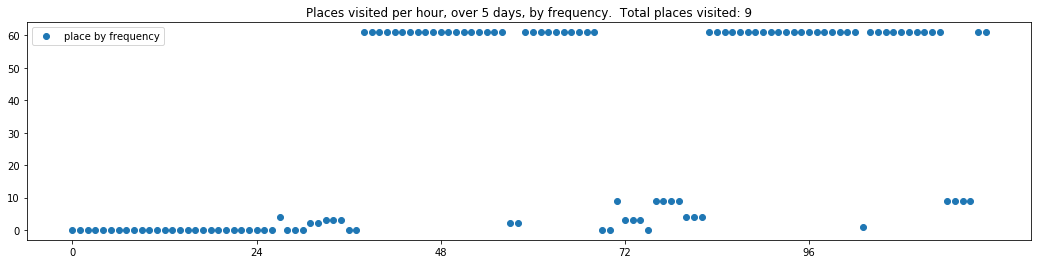

----- vector ----
prefix labels:  [190, 190]
[190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190]
[190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190]
[190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 392, 392, 392]
[392, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190]
[190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 0, 485, 485, 485, 382, 0, 0, 0, 0, 0, 0, 0, 0, 0]


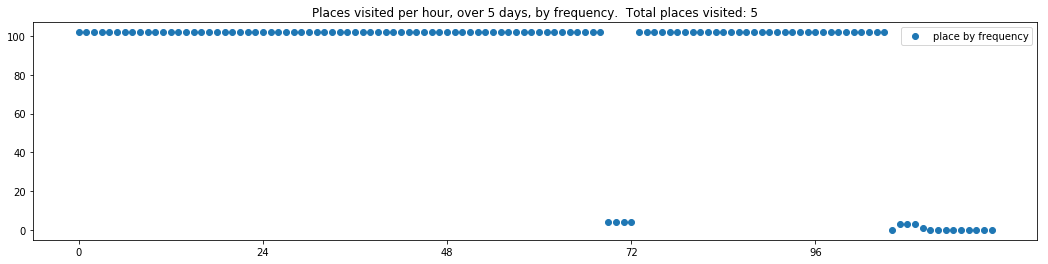

----- vector ----
prefix labels:  [78, 20]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 406, 406, 406, 406, 406, 406, 406, 406]
[406, 406, 406, 406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


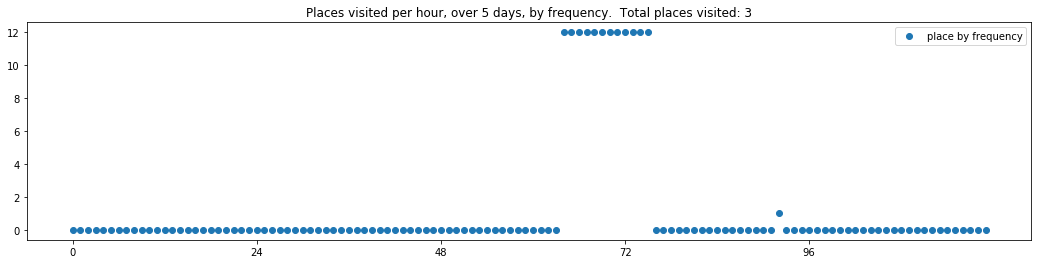

----- vector ----
prefix labels:  [448, 480]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 284, 284, 284, 0, 0, 0, 65, 65, 0, 0, 0, 0, 0, 0, 0, 640, 640, 640, 640]
[640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 0, 0, 0, 0, 0, 0, 0, 0, 0, 640, 640, 640]
[640, 640, 640, 0, 0, 0, 0, 640, 640, 640, 0, 0, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640]


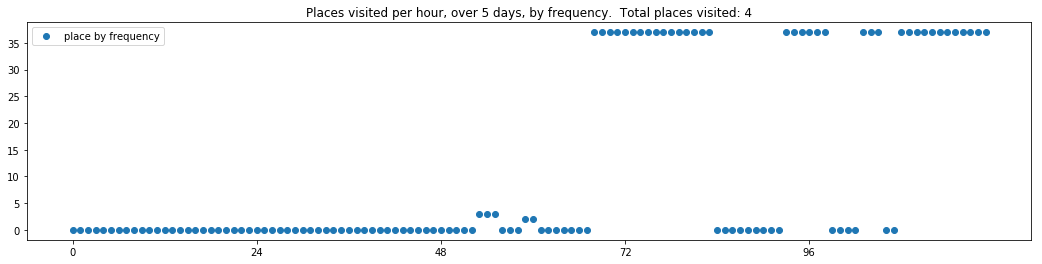

----- vector ----
prefix labels:  [39, 39]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 71, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39, 39, 187, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39]
[39, 39, 39, 39, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378]
[378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378, 378]


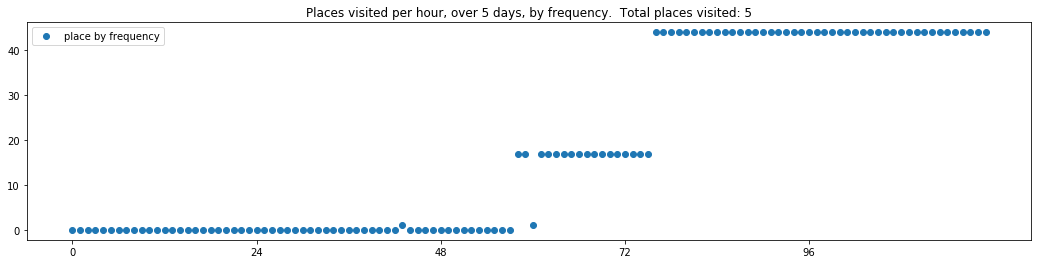

----- vector ----
prefix labels:  [357, 357]
[0, 357, 357, 357, 372, 0, 357, 357, 357, 357, 357, 357, 0, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357]
[357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357]
[357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357, 357]
[357, 357, 357, 400, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 248, 0, 0, 0, 0, 0, 0, 0, 0]


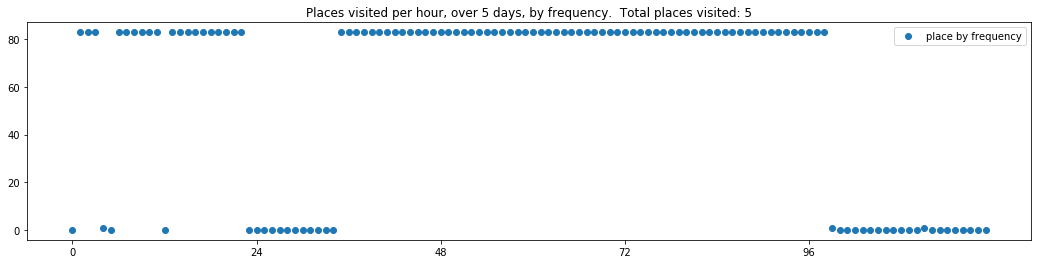

----- vector ----
prefix labels:  [237, 237]
[0, 0, 0, 487, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 46, 46, 46, 46, 46, 46, 502, 502, 502, 502, 502, 0, 108, 0, 502]
[502, 502, 502, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 502, 0, 0, 0, 0, 46, 46, 46, 46]
[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 0, 46]


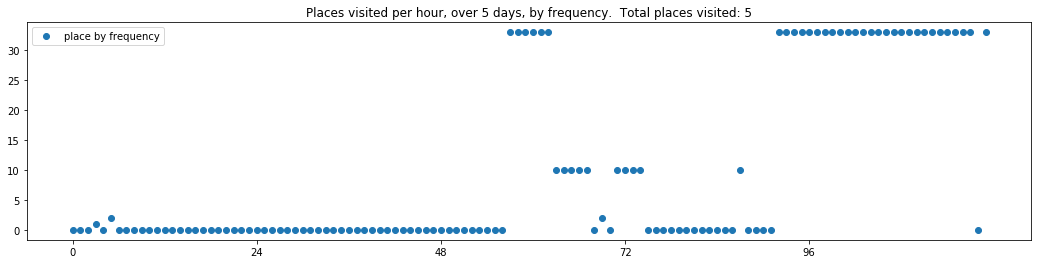

----- vector ----
prefix labels:  [368, 636]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 126, 0, 0, 0, 209, 209, 636, 636, 636, 636]
[636, 636, 429, 429, 0, 429, 429, 429, 334, 334, 334, 57, 57, 57, 57, 0, 0, 0, 0, 0, 0, 0, 8, 8]
[276, 276, 276, 276, 276, 276, 276, 160, 218, 122, 122, 400, 400, 400, 209, 209, 209, 457, 209, 458, 458, 209, 209, 209]
[209, 0, 0, 0, 636, 636, 636, 636, 636, 636, 636, 636, 636, 506, 636, 636, 636, 636, 636, 636, 636, 636, 636, 0]


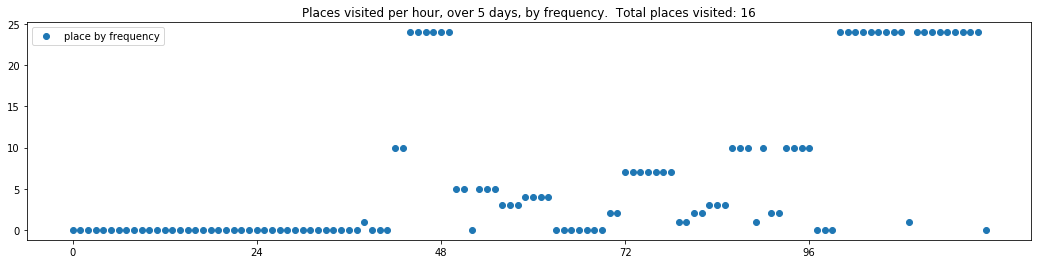

----- vector ----
prefix labels:  [604, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 604, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 244, 244, 0, 0, 0, 0, 0, 187]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[187, 604, 604, 604, 0, 0, 0, 0, 0, 0, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 0, 0, 0]


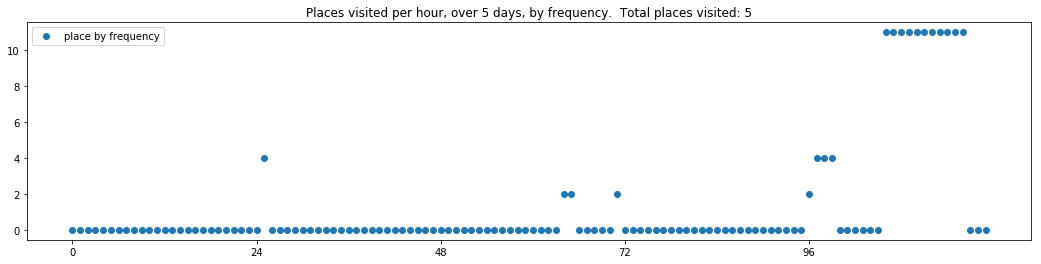

----- vector ----
prefix labels:  [268, 268]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 268, 268, 268, 268, 268, 268, 268, 268]
[268, 268, 268, 268, 0, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 21, 21, 21, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 0, 268, 268, 268, 268, 268]
[268, 268, 268, 0, 0, 0, 0, 0, 0, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 503, 503]


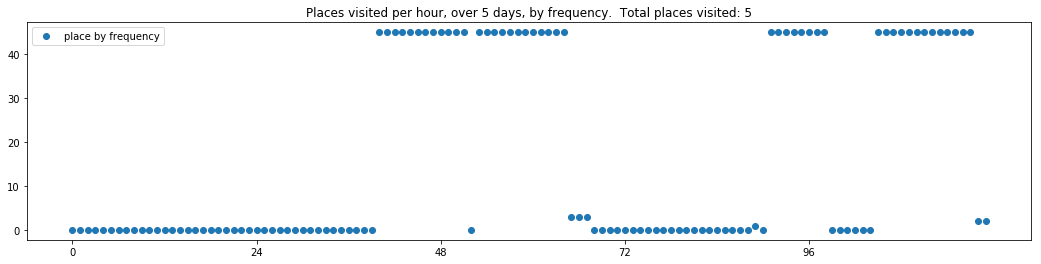


------
 20 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_20.txt 
------

----- vector ----
prefix labels:  [221, 221]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 221, 221, 0, 0, 0, 0, 0, 0, 0, 221, 221, 221, 221, 221, 221]
[221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 221, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 221, 221, 221, 221, 384, 384, 384, 384]
[221, 221, 0, 276, 364, 364, 364, 364, 364, 364, 364, 364, 364, 284, 93, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116]


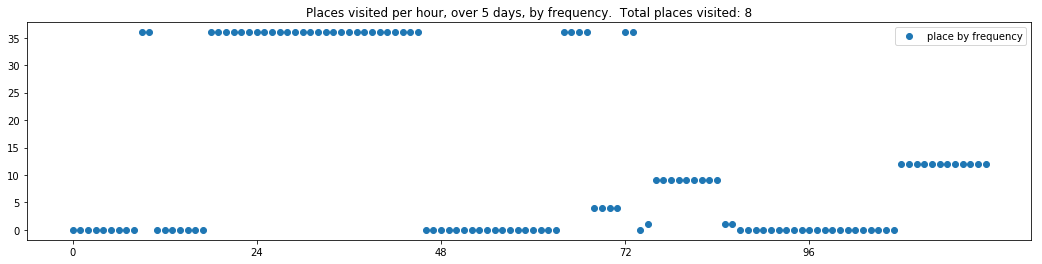

----- vector ----
prefix labels:  [76, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 76, 76, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


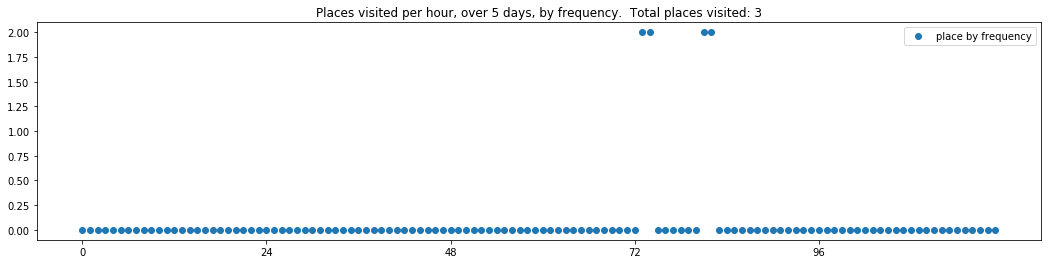

----- vector ----
prefix labels:  [167, 318]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 165, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 110, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 562, 562, 562, 562, 562, 562, 562, 562, 562, 0]
[32, 0, 0, 562, 562, 562, 562, 0, 165, 0, 0, 562, 562, 562, 562, 0, 0, 0, 391, 391, 391, 391, 0, 0]


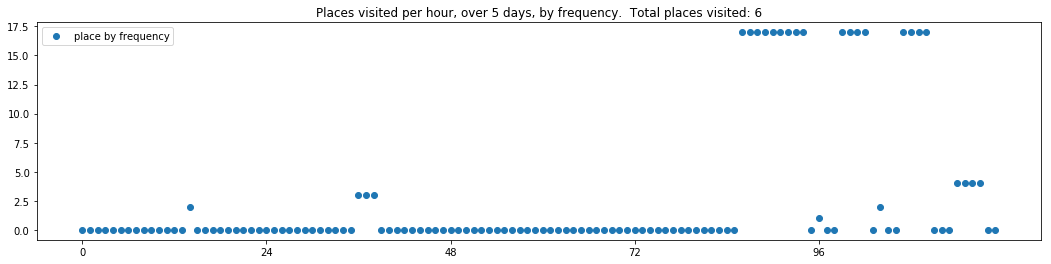

----- vector ----
prefix labels:  [437, 437]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 437, 437, 0, 0, 0, 0, 0, 0, 0]
[437, 437, 437, 437, 437, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 259]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


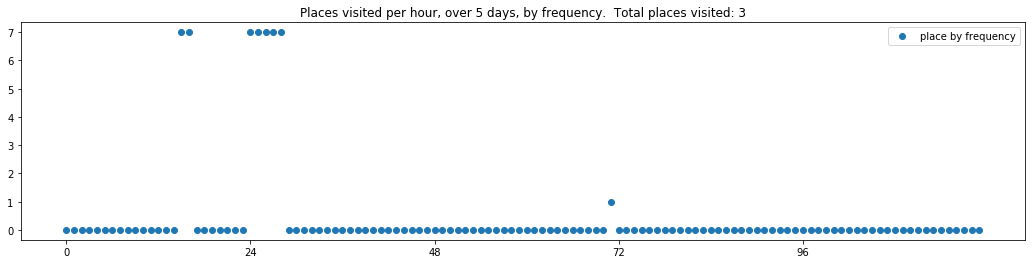

----- vector ----
prefix labels:  [415, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 415, 415, 415, 415, 415, 415, 415, 415, 415, 0, 415]
[415, 415, 415, 415, 415, 415, 415, 415, 415, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0]


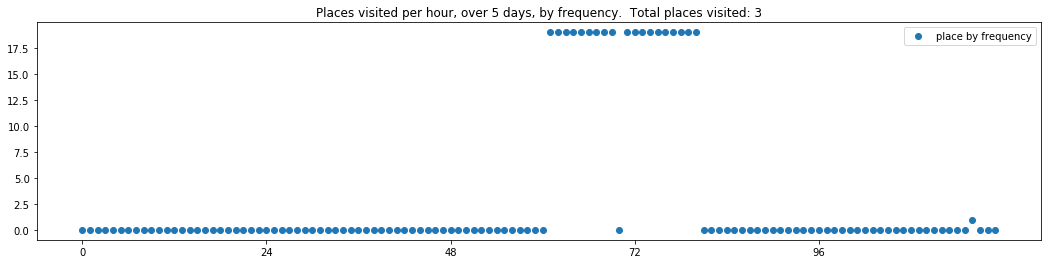

----- vector ----
prefix labels:  [26, 26]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 26, 0, 391, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


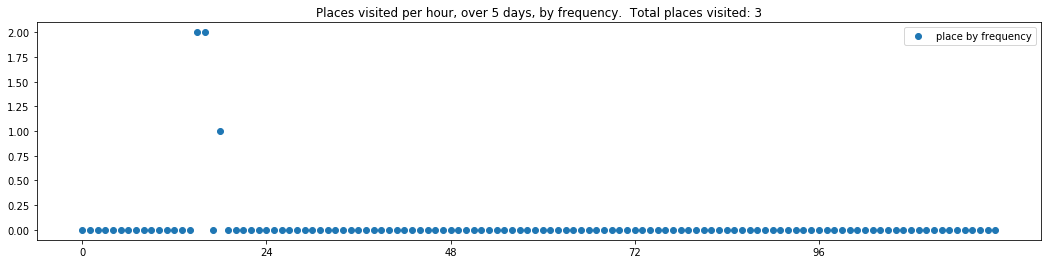

----- vector ----
prefix labels:  [163, 71]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 163, 71, 71, 71, 71, 0, 0, 71, 71, 71, 71, 71, 71, 71, 71, 71]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 71, 71, 0, 0, 0, 0, 0, 151, 151, 151, 71]
[0, 0, 0, 0, 0, 0, 0, 473, 0, 0, 0, 0, 0, 215, 0, 71, 71, 71, 71, 71, 0, 0, 0, 0]
[0, 0, 71, 71, 71, 71, 71, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 71]


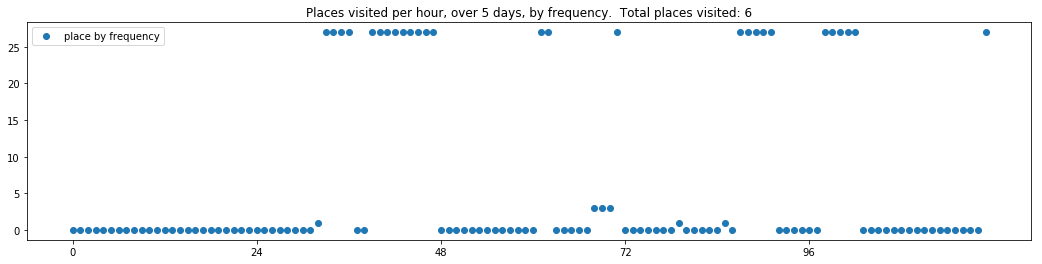

----- vector ----
prefix labels:  [76, 434]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 434, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 434, 434, 434, 0, 271, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434]
[434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


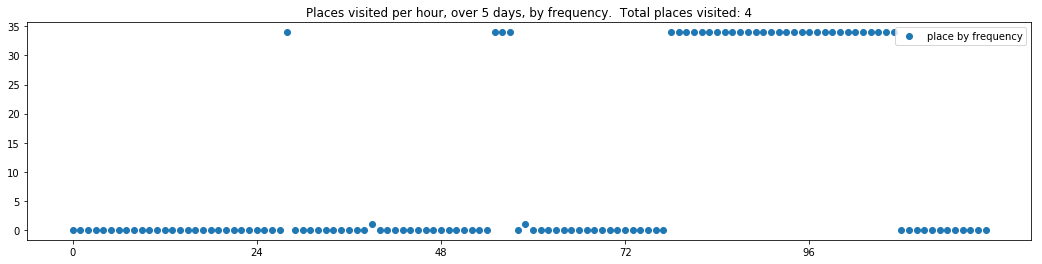

----- vector ----
prefix labels:  [69, 69]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]
[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 199, 199, 0, 0, 0, 0, 0]


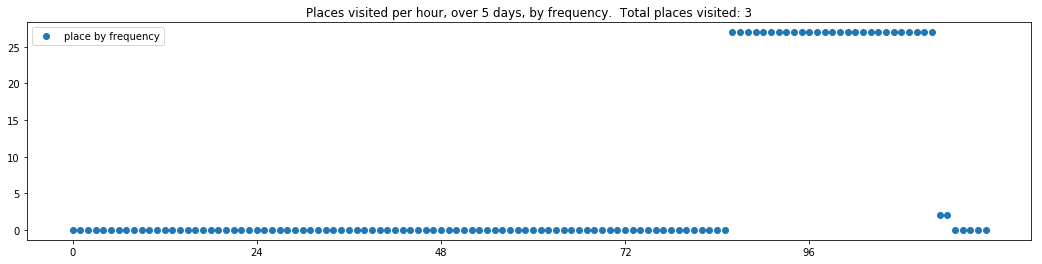

----- vector ----
prefix labels:  [605, 605]
[0, 0, 0, 0, 0, 524, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 248]
[0, 0, 0, 0, 327, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 533]


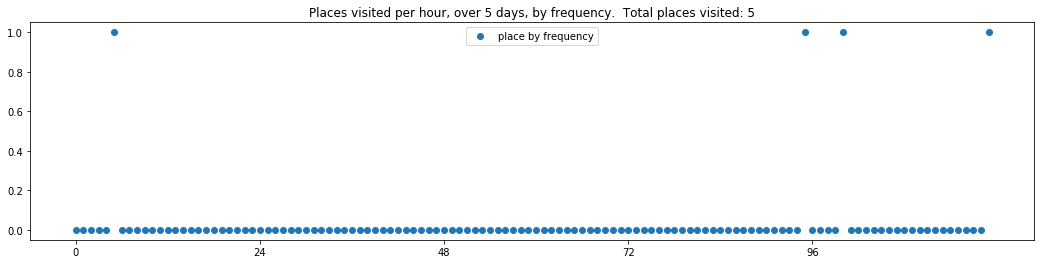


------
 25 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_25.txt 
------

----- vector ----
prefix labels:  [117, 117]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 117, 0]
[0, 0, 0, 0, 0, 0, 0, 117, 117, 117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 82, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 117, 117]
[0, 32, 306, 0, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434]
[434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 0, 434, 434, 434, 434, 434, 434, 434, 434]


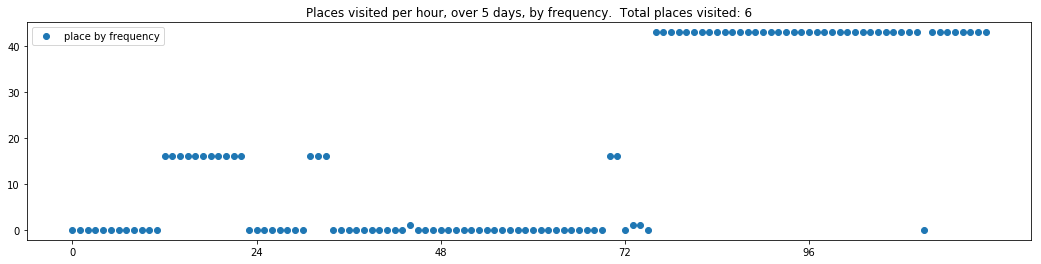

----- vector ----
prefix labels:  [41, 84]
[0, 0, 0, 0, 0, 84, 84, 84, 84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 84, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 84, 84, 41, 41, 41, 41, 41, 41, 41, 41, 41]
[41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41]
[41, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 177, 177, 177, 0, 0, 0, 0, 0]
[0, 554, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 105, 374, 374, 0, 177, 177, 0, 0, 41]


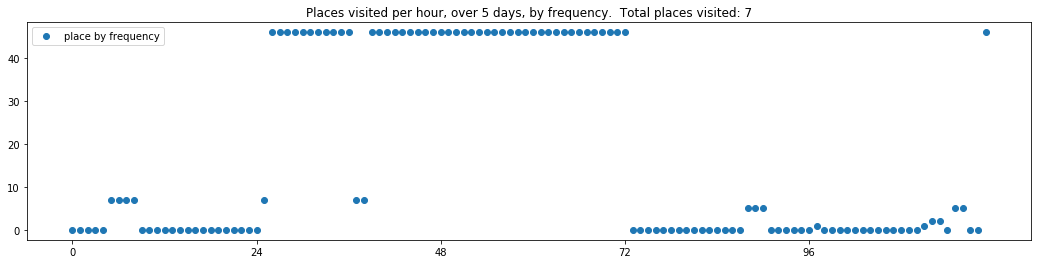

----- vector ----
prefix labels:  [437, 437]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 437, 0, 0, 437, 437, 437, 437, 0, 0, 0, 0, 0, 0, 0, 0, 437, 437, 437, 437]
[437, 437, 437, 437, 437, 0, 0, 0, 437, 437, 437, 437, 162, 0, 0, 0, 0, 0, 0, 0, 0, 437, 437, 437]


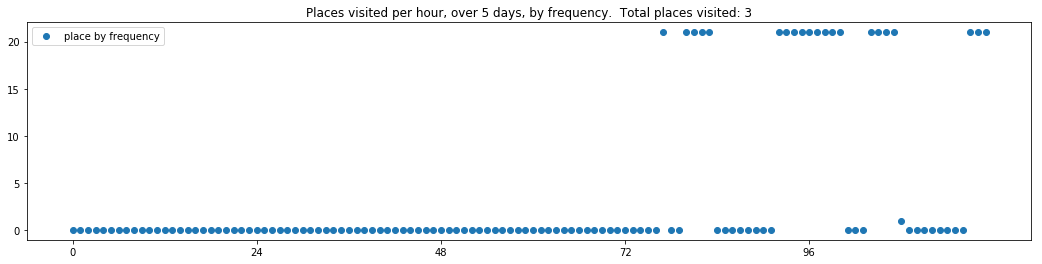

----- vector ----
prefix labels:  [604, 339]
[0, 0, 0, 0, 0, 339, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


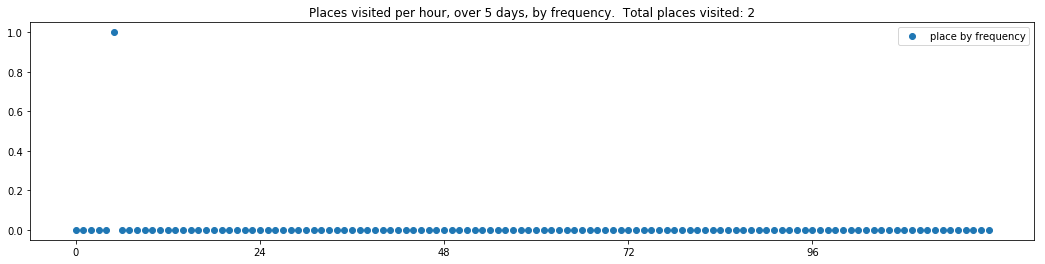

----- vector ----
prefix labels:  [437, 437]
[0, 0, 0, 0, 0, 437, 437, 437, 437, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 437, 437, 437, 437, 437, 437, 437, 437, 437, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 437, 0, 0, 0, 0, 0, 0, 437, 0, 0, 0, 0, 0, 0, 0, 0, 0, 437, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 437, 0, 0, 0, 437, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


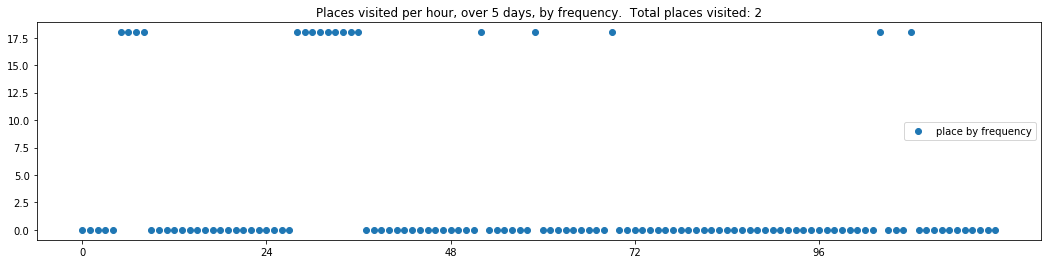

----- vector ----
prefix labels:  [434, 434]
[0, 0, 0, 0, 0, 0, 0, 0, 434, 434, 434, 0, 0, 0, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434]
[434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 0]
[0, 0, 0, 0, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434]
[434, 434, 434, 434, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 434, 434, 434, 434, 434, 434, 0, 0]
[0, 0, 0, 0, 0, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 0, 0, 0]


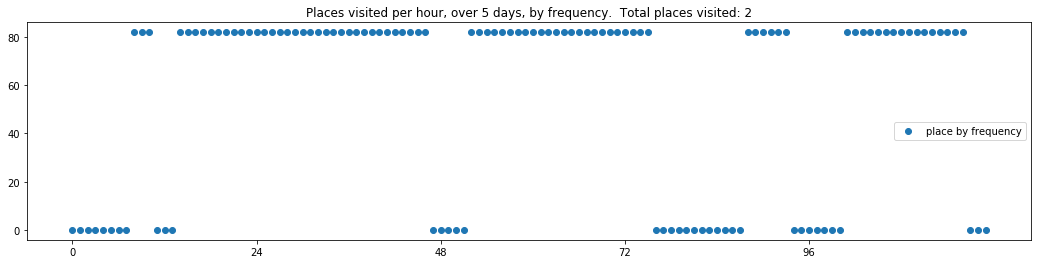

----- vector ----
prefix labels:  [118, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


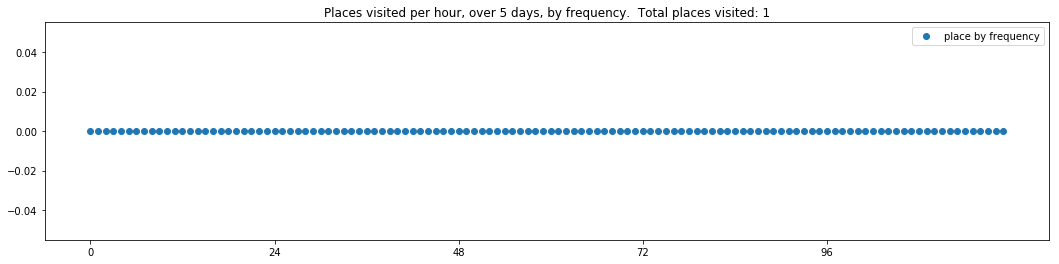

----- vector ----
prefix labels:  [248, 483]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 483, 483, 483, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 320, 320, 320, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 73, 158, 158, 503, 503, 503, 503, 503, 0, 0, 0, 0, 220, 0, 361, 361]


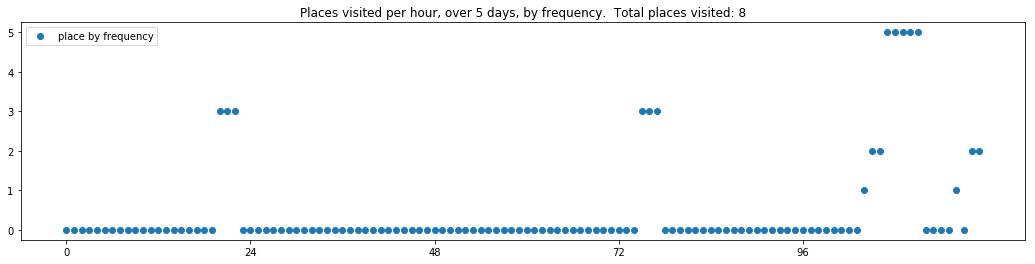

----- vector ----
prefix labels:  [20, 20]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 20, 239, 239, 271, 424, 424, 0, 0, 0, 0]
[0, 0, 62, 0, 0, 0, 0, 0, 382, 0, 0, 0, 0, 0, 0, 0, 0, 76, 0, 0, 0, 0, 0, 0]


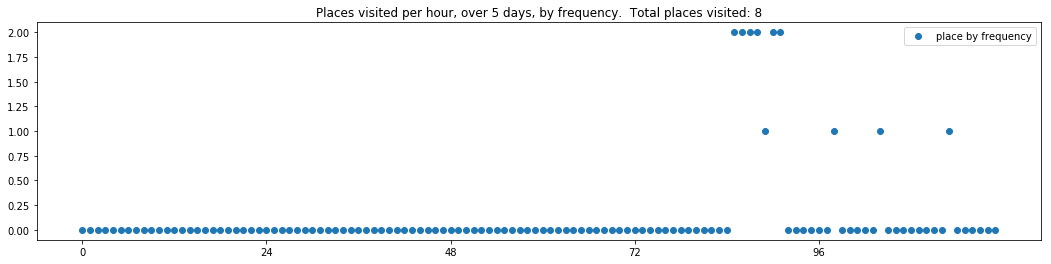

----- vector ----
prefix labels:  [223, 223]
[0, 0, 0, 0, 0, 205, 223, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 223, 223, 223, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


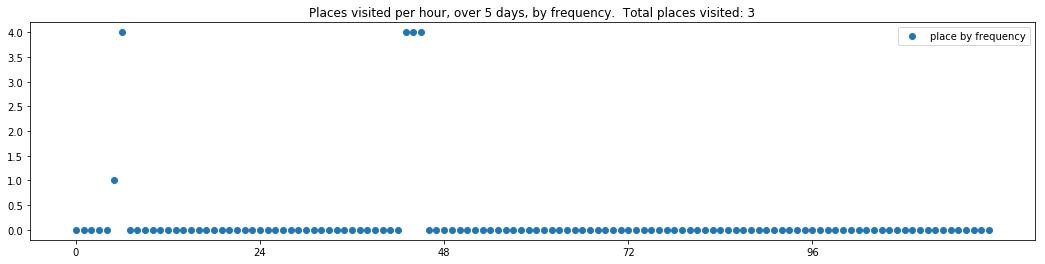


------
 30 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_30.txt 
------

----- vector ----
prefix labels:  [286, 508]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 508, 508, 508, 508, 508, 508]
[508, 508, 508, 508, 508, 508, 0, 0, 0, 0, 0, 568, 568, 568, 568, 568, 568, 568, 568, 568, 568, 568, 568, 568]
[568, 568, 568, 568, 0, 568, 568, 568, 568, 568, 568, 568, 568, 568, 568, 124, 0, 0, 205, 205, 205, 205, 507, 507]
[205, 205, 103, 563, 563, 563, 0, 205, 205, 205, 205, 205, 205, 286, 22, 22, 0, 0, 618, 618, 618, 618, 618, 618]
[618, 618, 618, 618, 618, 618, 147, 508, 508, 508, 508, 508, 563, 563, 568, 568, 568, 568, 568, 568, 568, 568, 568, 568]


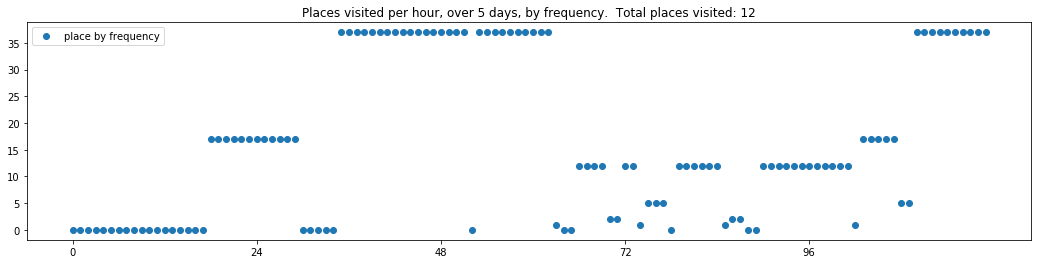

----- vector ----
prefix labels:  [413, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 413]
[413, 0, 112, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 413, 413, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 186, 0, 412, 412, 412, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


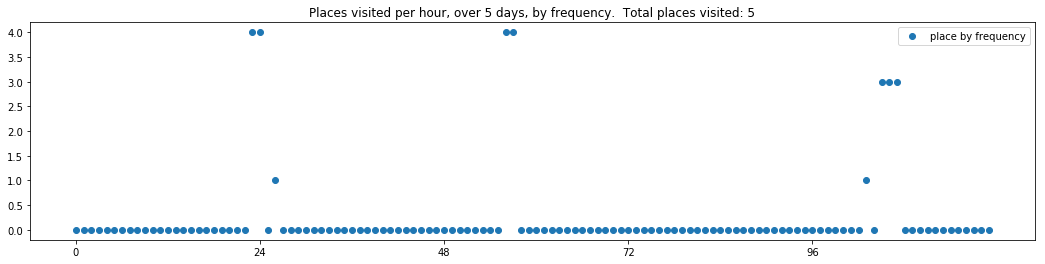

----- vector ----
prefix labels:  [312, 312]
[0, 0, 0, 0, 0, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312]
[312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312]
[312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312]
[312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312]
[312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312]


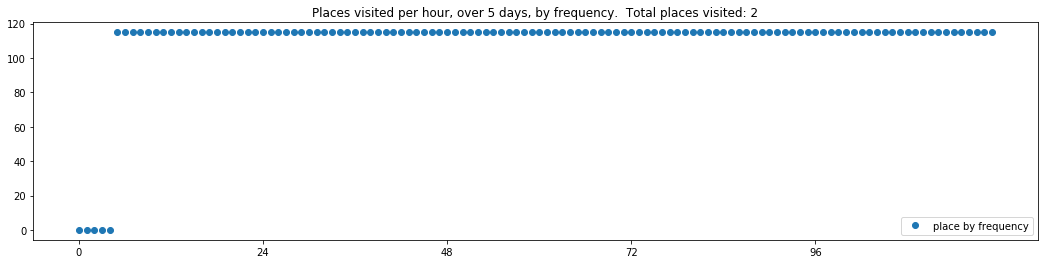

----- vector ----
prefix labels:  [358, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 358, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 358, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 126, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0]


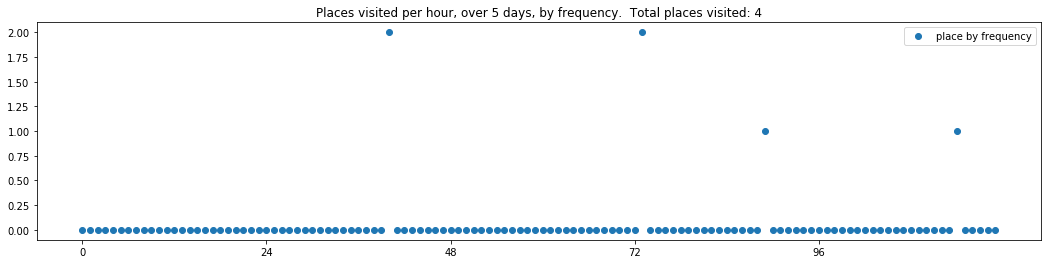

----- vector ----
prefix labels:  [167, 167]
[0, 0, 0, 255, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 429, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 165, 165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


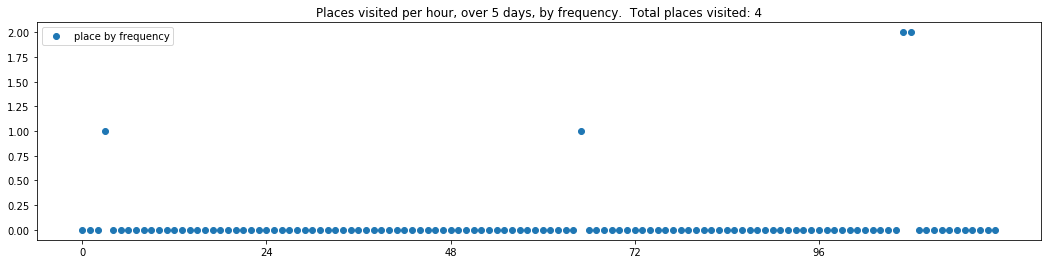

----- vector ----
prefix labels:  [626, 122]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 252, 71, 0, 0, 493, 0, 23, 220, 0, 0, 0, 187]
[187, 378, 378, 378, 0, 596, 0, 187, 71, 0, 187, 370, 144, 144, 144, 0, 136, 0, 0, 0, 0, 0, 0, 0]
[142, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 122, 122, 122, 122, 122, 122, 122]
[122, 122, 122, 122, 122, 122, 248, 231, 0, 0, 0, 0, 0, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]
[69, 69, 69, 69, 0, 0, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 0, 0, 187, 0, 0, 0, 0, 0]


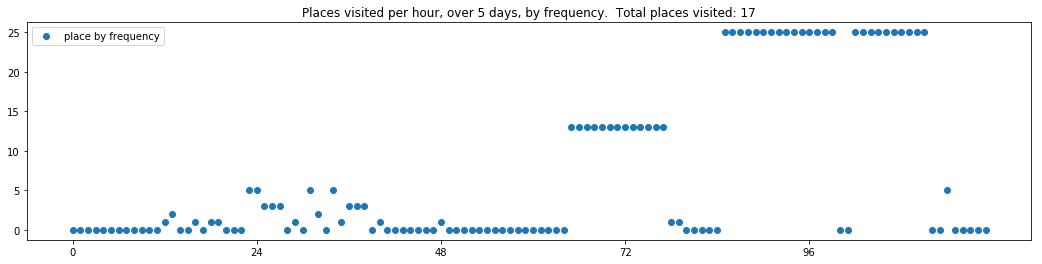

----- vector ----
prefix labels:  [523, 523]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 523, 523, 523, 523, 523, 0, 0, 0, 523, 523, 523, 523, 523, 523, 523]
[523, 523, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 388, 388, 388]
[388, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 242, 242, 242, 242, 242, 242, 242, 242, 242]
[242, 242, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


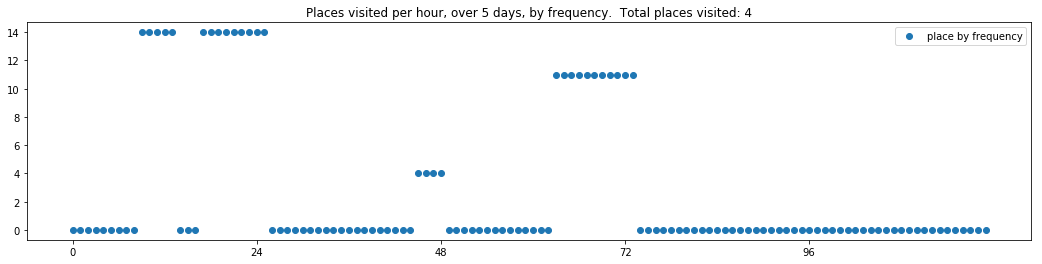

----- vector ----
prefix labels:  [238, 94]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 238, 238, 238, 238, 238, 238, 238, 238, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 471, 471, 0, 0, 69, 69, 8, 0, 0, 0, 238, 69, 69, 69, 69, 69, 69, 69, 69, 69]
[0, 0, 0, 0, 0, 0, 0, 0, 346, 0, 516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 69]


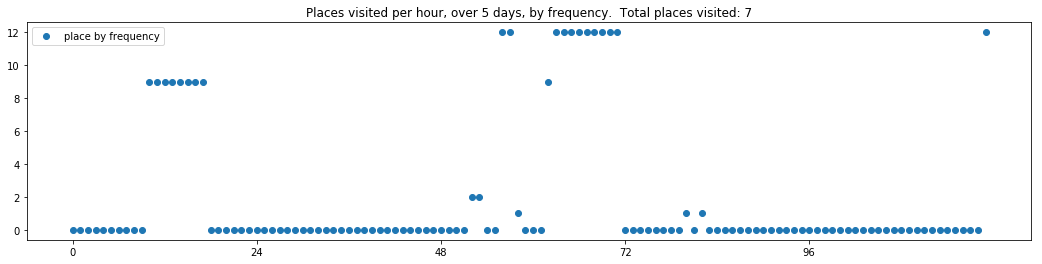

----- vector ----
prefix labels:  [309, 309]
[0, 0, 0, 0, 0, 0, 0, 309, 309, 309, 433, 433, 433, 433, 433, 0, 0, 0, 0, 0, 0, 23, 304, 304]
[304, 0, 0, 0, 205, 0, 433, 433, 433, 433, 433, 433, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 296, 0, 0, 0, 0, 309, 309, 0, 0, 0, 0, 620, 620, 309, 309, 309, 309, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 309, 309, 309, 309, 309, 309, 313, 313, 313, 313, 0, 309, 309, 309, 309, 0, 0, 0, 0]
[309, 309, 309, 309, 309, 309, 0, 0, 0, 0, 102, 102, 205, 205, 205, 205, 0, 0, 0, 0, 0, 0, 309, 309]


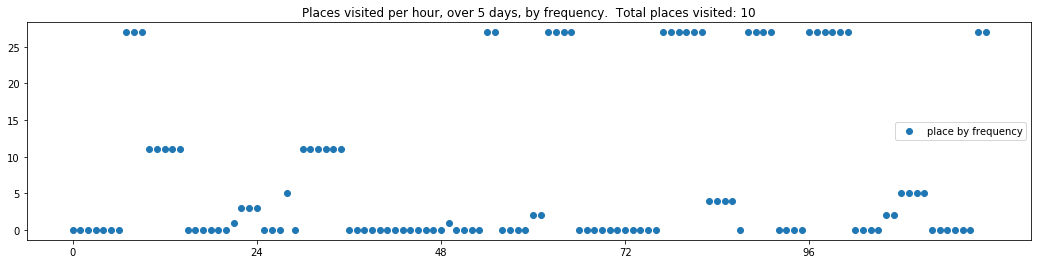

----- vector ----
prefix labels:  [215, 215]
[0, 0, 0, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215]
[215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215]
[215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215]
[215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215]
[215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215]


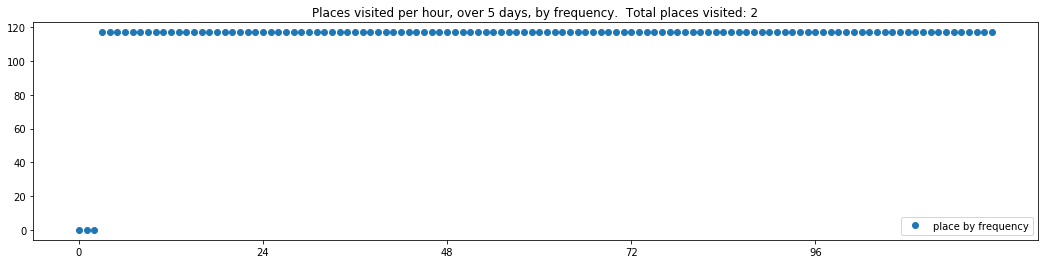


------
 35 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_35.txt 
------

----- vector ----
prefix labels:  [596, 596]
[0, 0, 0, 0, 596, 596, 0, 0, 0, 0, 0, 0, 0, 0, 0, 596, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 596, 0, 596, 596, 596, 0, 0, 596, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


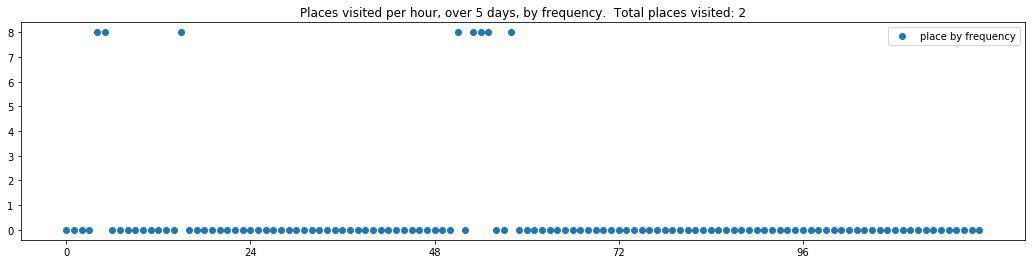

----- vector ----
prefix labels:  [108, 320]
[0, 0, 0, 0, 0, 0, 0, 0, 47, 246, 548, 0, 22, 47, 47, 47, 47, 47, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 434, 0, 0, 0, 46, 0, 400, 0, 0, 0, 0, 0, 126, 126, 126, 126, 126, 126, 126]
[126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126]
[126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126]


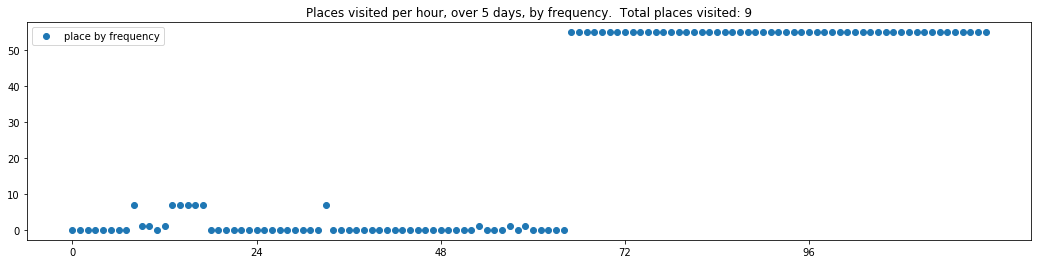

----- vector ----
prefix labels:  [328, 328]
[0, 0, 0, 0, 328, 328, 0, 0, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328]
[328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 0, 0, 0, 328, 328, 328, 328, 328]
[328, 328, 328, 328, 0, 0, 0, 0, 0, 0, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328]


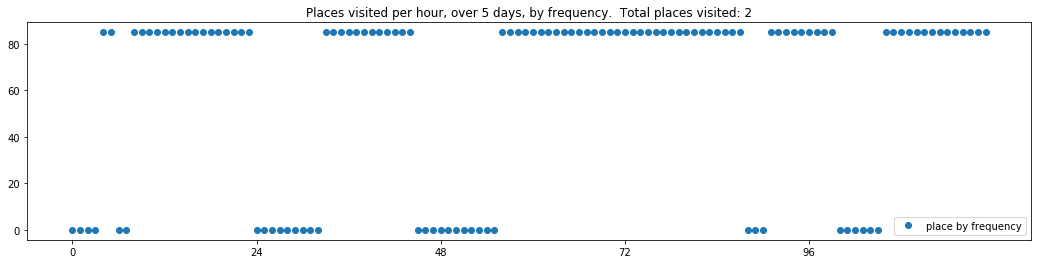

----- vector ----
prefix labels:  [32, 370]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 72, 0, 0, 0, 0]
[332, 332, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 38, 38, 38, 38, 38]


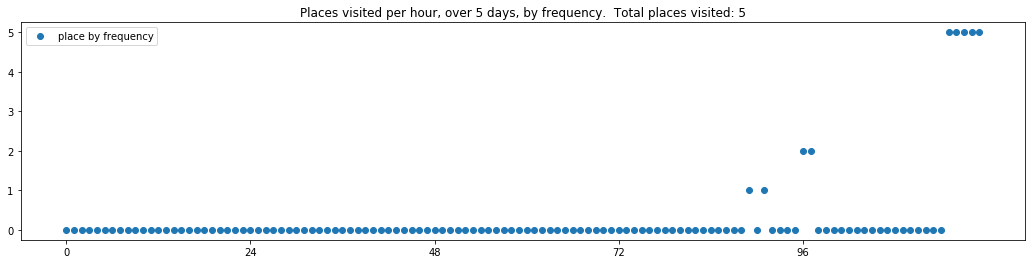

----- vector ----
prefix labels:  [69, 69]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 69, 69, 69, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 69, 69, 0, 185, 69, 69, 69, 69, 69, 69, 69, 69]
[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]
[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]


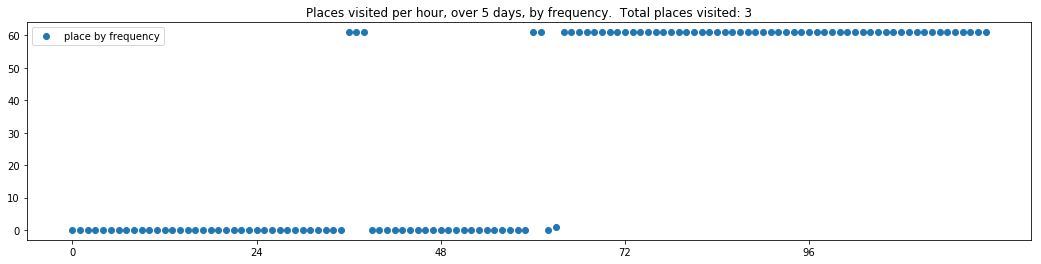

----- vector ----
prefix labels:  [183, 183]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 183, 183, 183]
[183, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545]
[545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545]


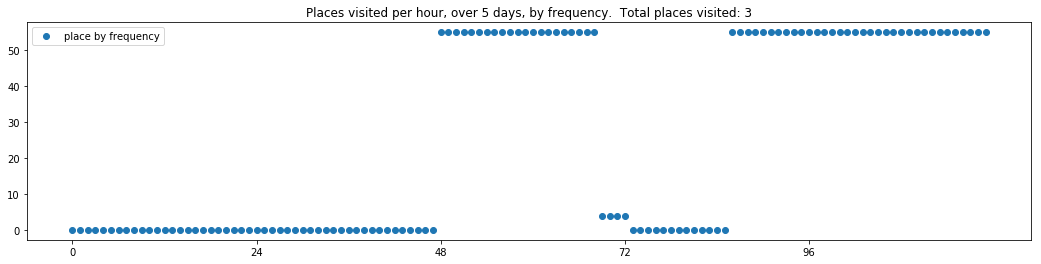

----- vector ----
prefix labels:  [231, 231]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 231, 231, 0, 60, 0, 0, 434, 434, 434, 434, 434, 434]
[434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 0, 0]
[140, 140, 140, 293, 293, 72, 72, 72, 72, 182, 182, 203, 203, 203, 203, 203, 427, 31, 32, 32, 32, 32, 32, 32]
[32, 371, 371, 259, 203, 203, 203, 140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 278, 0, 0, 412]
[412, 412, 412, 248, 248, 2, 0, 0, 0, 0, 0, 0, 0, 0, 259, 0, 0, 0, 0, 568, 0, 0, 0, 0]


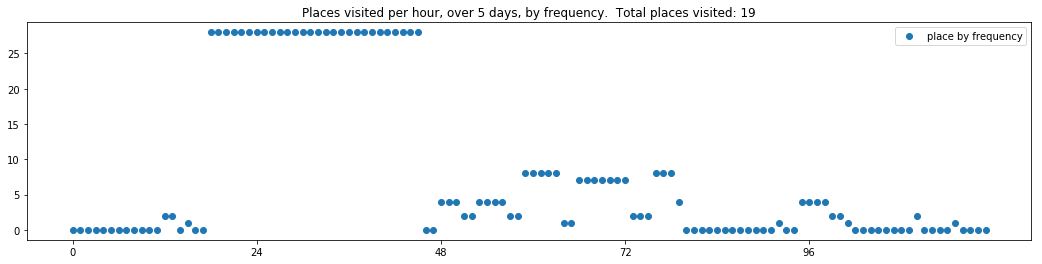

----- vector ----
prefix labels:  [226, 226]
[226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 226, 181, 226, 226, 226, 226, 226]
[226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 418, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226]


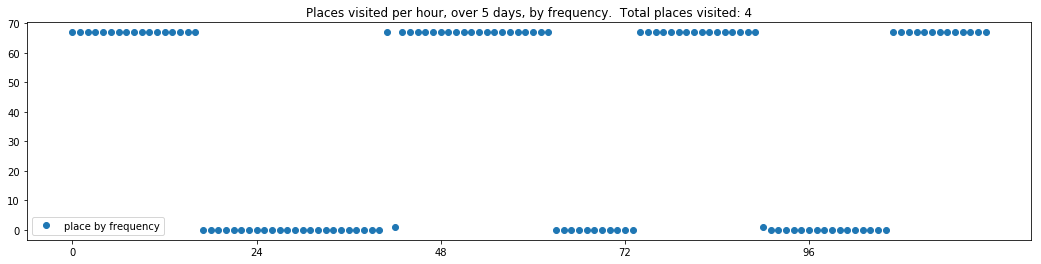

----- vector ----
prefix labels:  [280, 278]
[0, 0, 0, 0, 0, 0, 0, 398, 398, 398, 398, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278]
[278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278]
[278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278]
[278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278]


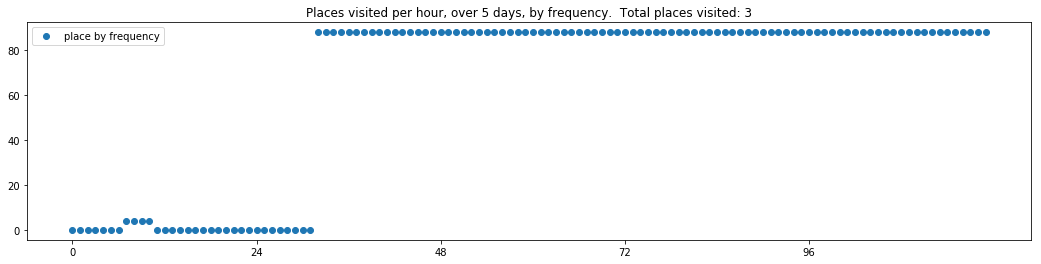

----- vector ----
prefix labels:  [232, 0]
[0, 0, 336, 0, 288, 0, 271, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 446]
[446, 446, 446, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 66, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 75, 75, 75, 75, 0, 0, 278, 278, 278, 278, 278, 278, 278]
[278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278]


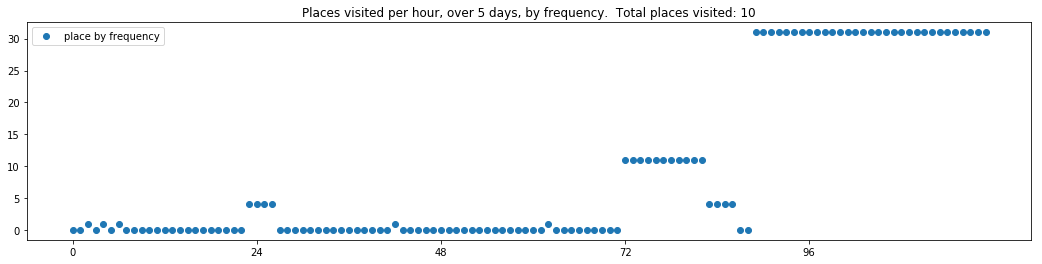


------
 40 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_40.txt 
------

----- vector ----
prefix labels:  [532, 532]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 100, 271, 471, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 208, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 0, 0, 0, 270]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 322, 322, 322, 322, 322, 322, 225, 225]


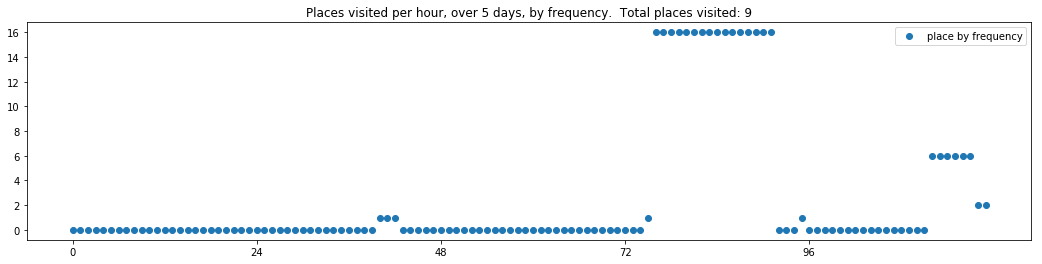

----- vector ----
prefix labels:  [4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 93, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[93, 93, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 93, 93, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


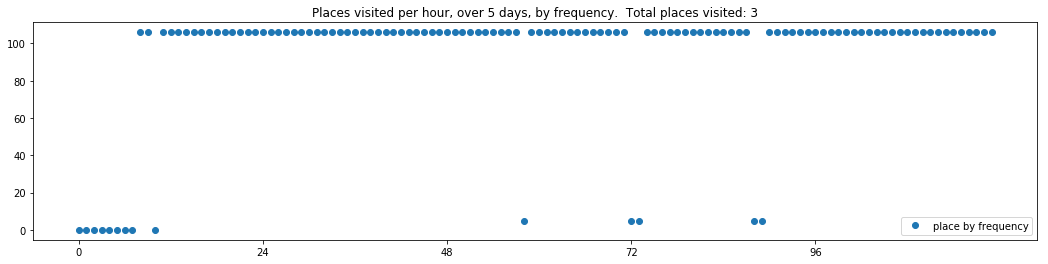

----- vector ----
prefix labels:  [333, 333]
[0, 0, 0, 333, 333, 333, 333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 334]
[334, 0, 0, 0, 0, 0, 0, 0, 0, 0, 333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 333, 333]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


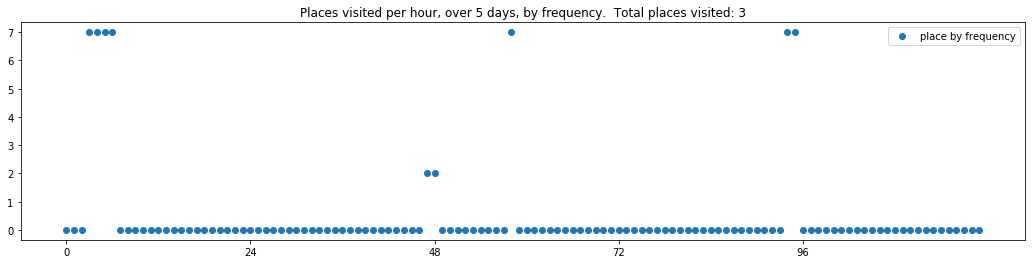

----- vector ----
prefix labels:  [99, 99]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 342, 342, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 40, 40, 40, 40, 40, 40, 40, 40]
[40, 144, 74, 74, 0, 33, 0, 0, 0, 424, 424, 503, 503, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


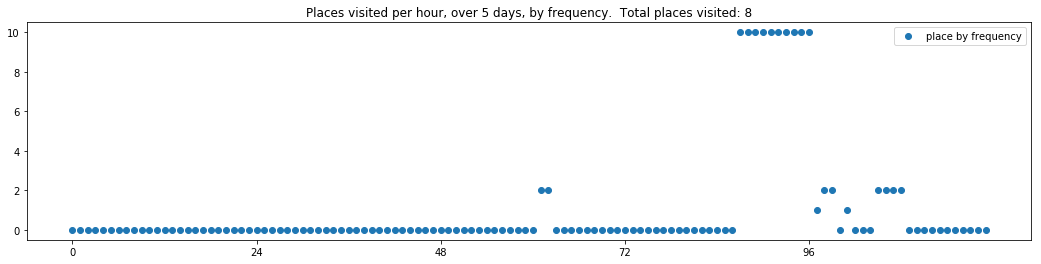

----- vector ----
prefix labels:  [93, 93]
[0, 0, 0, 0, 0, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 4, 4, 4, 93, 93, 93, 93, 93, 93]
[93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93]
[93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 542, 542, 542, 542, 542, 93, 93, 93]
[93, 93, 93, 0, 0, 515, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93]
[93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93]


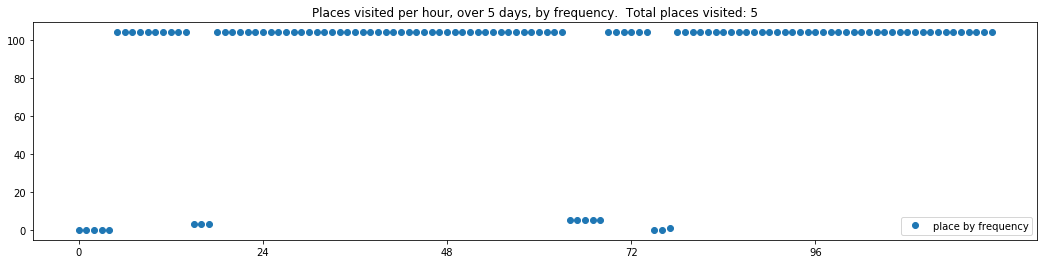

----- vector ----
prefix labels:  [369, 369]
[0, 0, 0, 0, 195, 218, 218, 545, 545, 545, 545, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 252, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 369, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


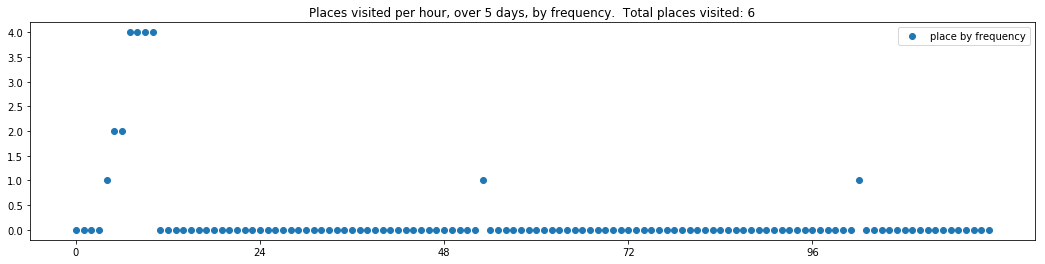

----- vector ----
prefix labels:  [498, 227]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 284, 284, 0, 0, 0, 0, 0]


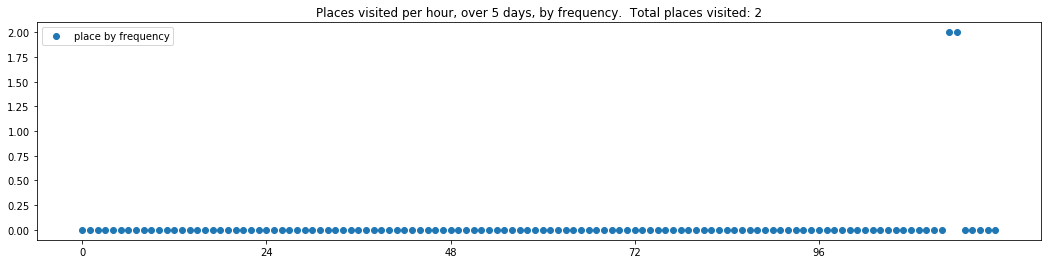

----- vector ----
prefix labels:  [134, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 439, 0, 0, 0, 0, 0, 0, 0, 0, 134, 134]
[134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134]
[134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 303, 0, 0, 0, 0, 0, 0, 0, 0]


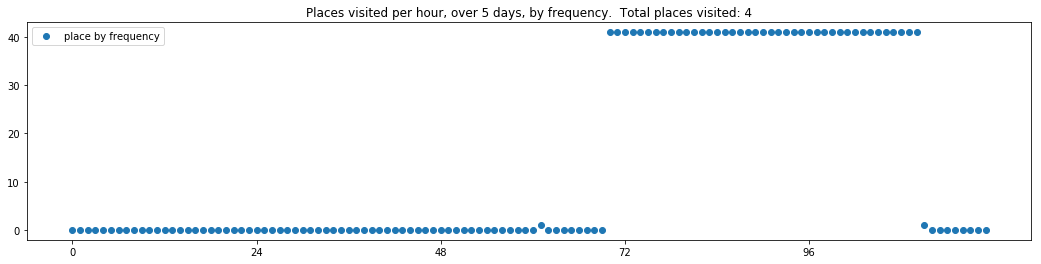

----- vector ----
prefix labels:  [563, 298]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 205, 205, 0, 189, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 205, 205, 205, 205, 205, 563, 205, 508, 508, 508, 508, 508, 508, 508, 508]
[508, 508, 508, 508, 508, 508, 508, 508, 0, 303, 195, 195, 0, 0, 0, 0, 0, 205, 563, 563, 392, 392, 392, 341]


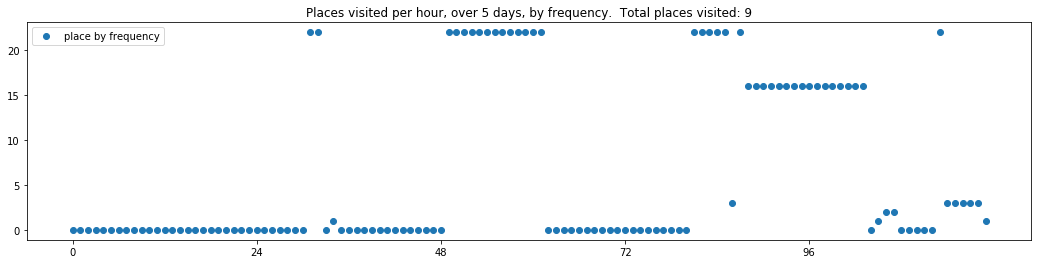

----- vector ----
prefix labels:  [11, 11]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[11, 11, 11, 0, 0, 0, 0, 0, 0, 0, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285]
[285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285]
[285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 0, 0]
[0, 0, 0, 0, 0, 0, 130, 130, 0, 435, 0, 0, 0, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285, 285]


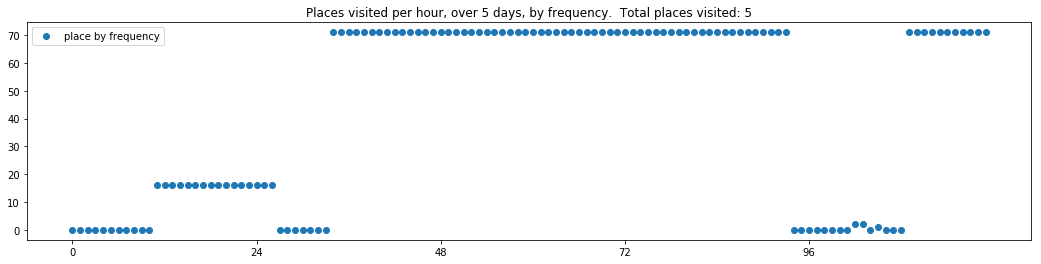


------
 45 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_45.txt 
------

----- vector ----
prefix labels:  [298, 40]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 304, 304, 195, 195, 364, 364, 364, 77, 77, 77, 77, 77, 212, 0, 0]
[0, 0, 279, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 336, 336, 336, 336, 336, 336, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 334, 222, 0, 0, 0, 0, 0, 0, 0, 0, 0]


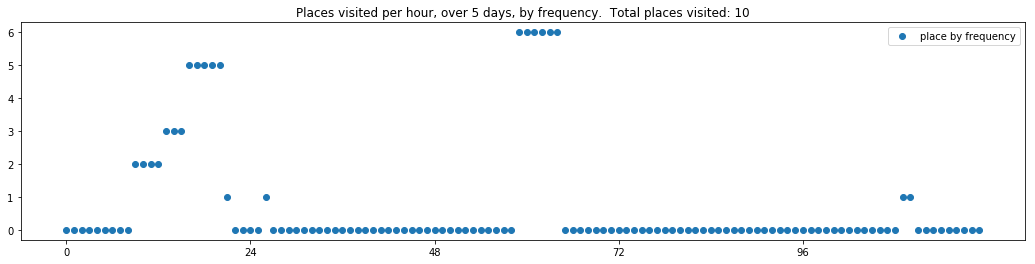

----- vector ----
prefix labels:  [26, 26]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 26, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 26, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 0, 0, 0, 0, 0, 0, 0]


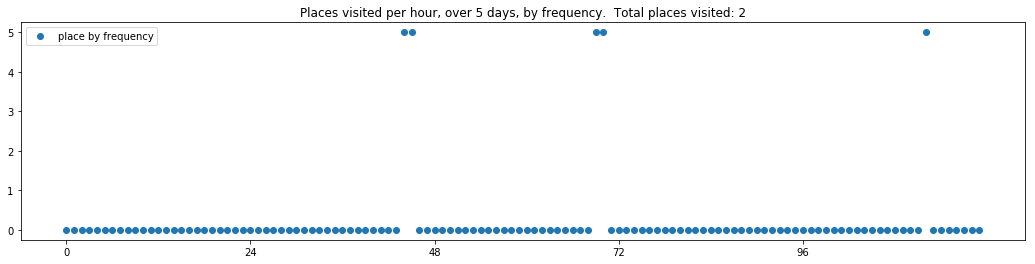

----- vector ----
prefix labels:  [296, 189]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 205, 205, 205, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 195, 195, 195, 195, 195]
[95, 95, 95, 95, 95, 95, 95, 4, 4, 4, 4, 4, 341, 620, 0, 453, 453, 453, 0, 184, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 296, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 130, 0, 0, 0, 0, 0, 0]


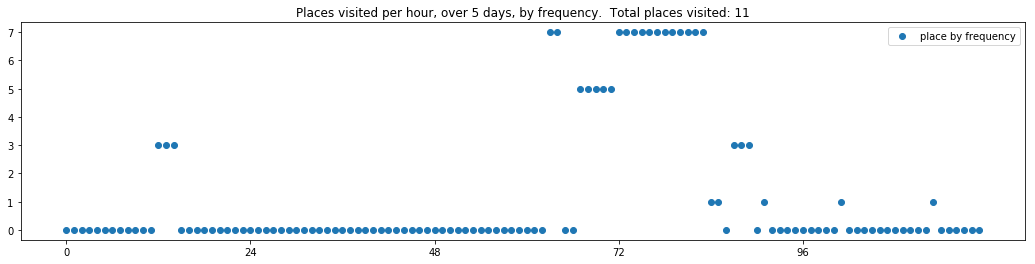

----- vector ----
prefix labels:  [420, 420]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 420, 0, 0, 0, 0, 0, 0, 420, 420, 420, 420, 420]
[420, 420, 0, 0, 0, 0, 420, 0, 0, 0, 0, 0, 0, 420, 420, 420, 420, 420, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 420, 420, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 0, 0, 0]
[357, 267, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 414, 22, 0, 0, 0, 0, 0, 0, 0, 0]


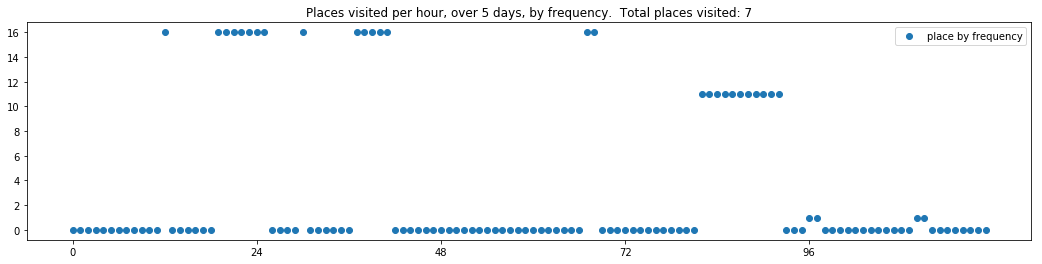

----- vector ----
prefix labels:  [448, 266]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 304, 304, 304, 304, 304]
[304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 413, 304, 304, 304, 304, 304, 304]
[304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304]
[304, 304, 304, 304, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 304, 304, 304, 0, 0, 413, 0, 413, 413]
[413, 413, 413, 413, 0, 434, 434, 434, 434, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 434]


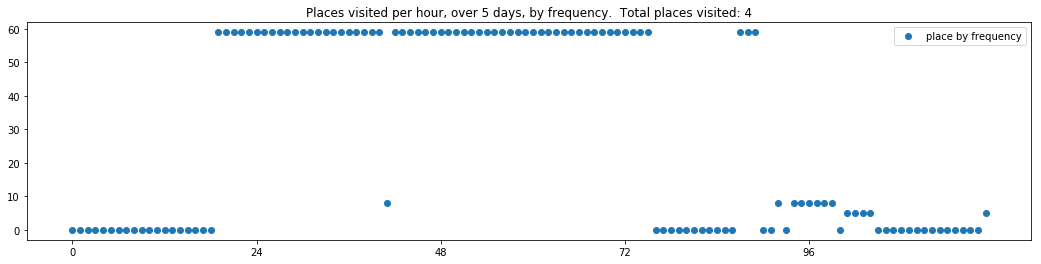

----- vector ----
prefix labels:  [423, 423]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


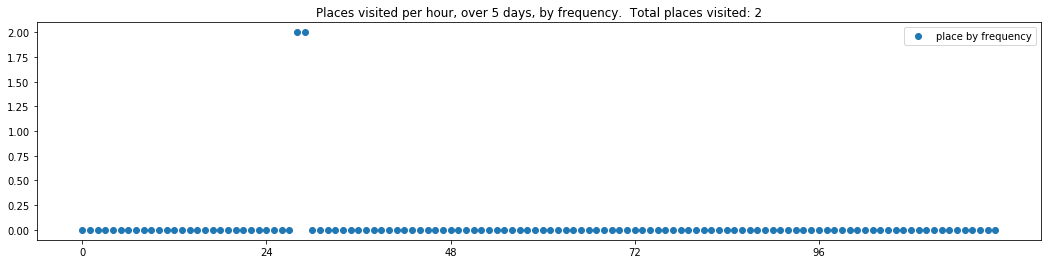

----- vector ----
prefix labels:  [391, 391]
[0, 0, 0, 0, 0, 0, 0, 0, 390, 0, 0, 0, 0, 0, 390, 102, 390, 390, 390, 0, 391, 391, 391, 391]
[391, 391, 391, 391, 391, 391, 391, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 390, 390, 0, 391]
[391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391]
[391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391]
[391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391]


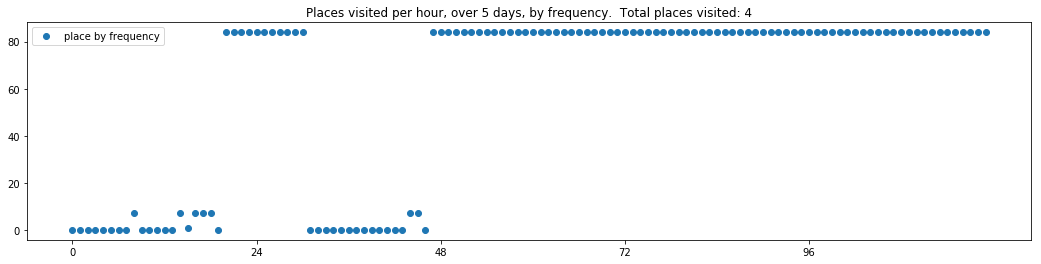

----- vector ----
prefix labels:  [227, 21]
[0, 0, 0, 144, 144, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 21, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 0, 21, 0, 21, 0, 0, 21, 21, 21]
[0, 227, 227, 227, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 0, 0]
[0, 0, 0, 0, 0, 0, 21, 0, 21, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0]


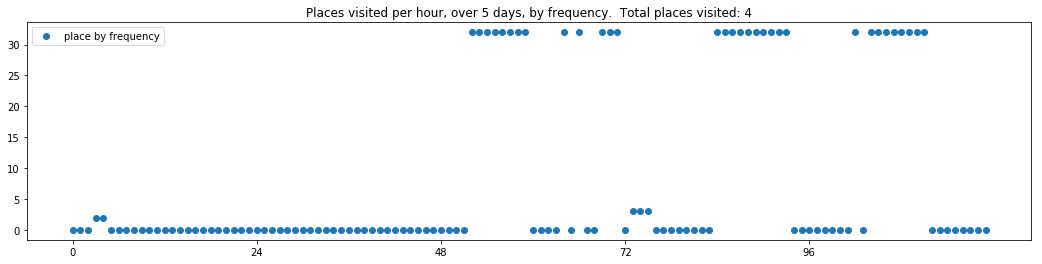

----- vector ----
prefix labels:  [161, 161]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161]
[161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161]
[161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161]
[161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161]
[161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161]


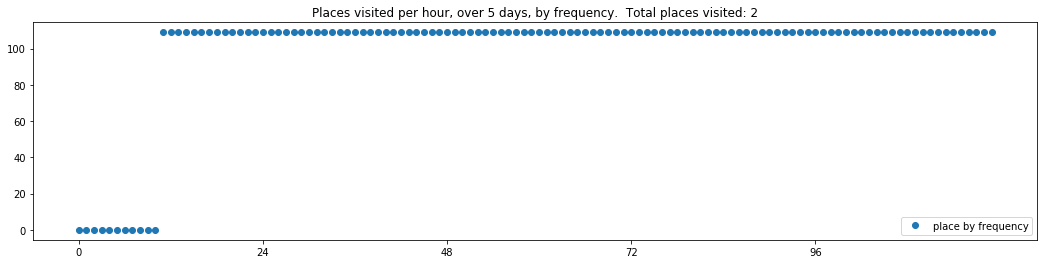

----- vector ----
prefix labels:  [32, 32]
[0, 0, 0, 0, 0, 32, 32, 32, 32, 32, 32, 32, 32, 0, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
[32, 32, 0, 32, 32, 32, 32, 32, 32, 32, 32, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 32, 32, 32, 32, 0, 0, 0, 0, 0, 0, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 0, 0, 0, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
[32, 32, 32, 32, 32, 32, 32, 32, 32, 0, 32, 32, 32, 32, 32, 0, 32, 32, 32, 32, 32, 0, 0, 0]


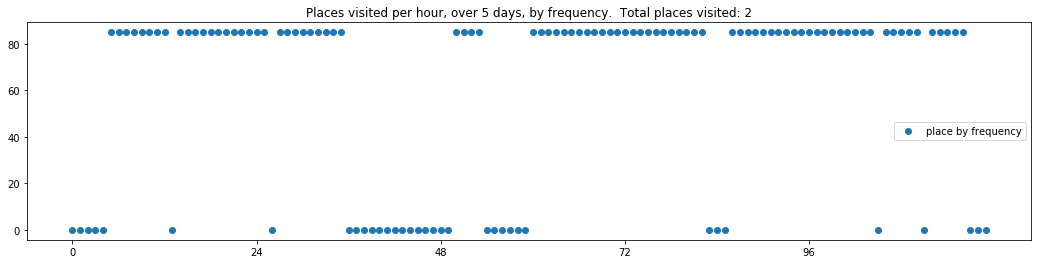


------
 50 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_50.txt 
------

----- vector ----
prefix labels:  [192, 192]
[0, 0, 0, 0, 0, 0, 0, 0, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192]
[192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192]
[192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192]
[192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192]
[192, 192, 192, 192, 192, 192, 0, 0, 0, 0, 0, 0, 0, 0, 192, 192, 192, 192, 192, 192, 192, 192, 192, 192]


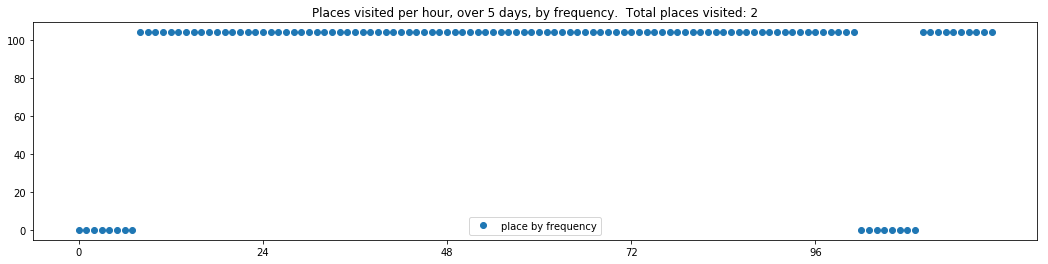

----- vector ----
prefix labels:  [8, 8]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0]


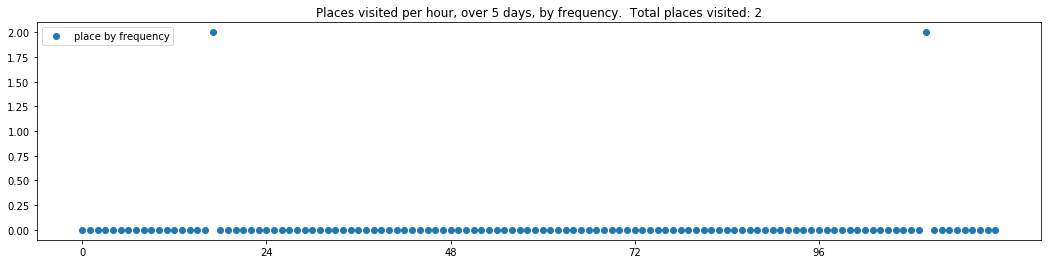

----- vector ----
prefix labels:  [320, 320]
[0, 0, 0, 0, 0, 0, 0, 0, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320]
[320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 0, 0, 0]
[0, 320, 320, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 458, 0, 0, 0, 320]
[320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320]


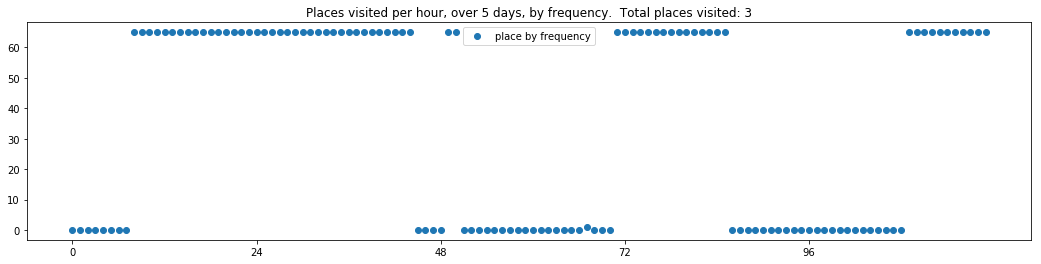

----- vector ----
prefix labels:  [507, 507]
[0, 0, 0, 0, 0, 507, 0, 0, 0, 0, 507, 507, 507, 0, 0, 0, 0, 507, 507, 507, 0, 507, 0, 0]
[0, 0, 0, 0, 507, 507, 507, 507, 507, 507, 0, 507, 507, 507, 0, 507, 0, 507, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 507, 507, 0, 0, 507, 507, 0, 507, 507, 507, 507, 507, 507, 0, 0, 0, 0, 0, 507, 0]
[507, 507, 507, 507, 507, 0, 507, 507, 507, 0, 0, 507, 507, 507, 507, 0, 0, 507, 507, 507, 507, 507, 507, 507]
[0, 507, 507, 0, 0, 507, 507, 507, 507, 507, 507, 507, 507, 507, 507, 0, 507, 507, 507, 507, 507, 0, 0, 0]


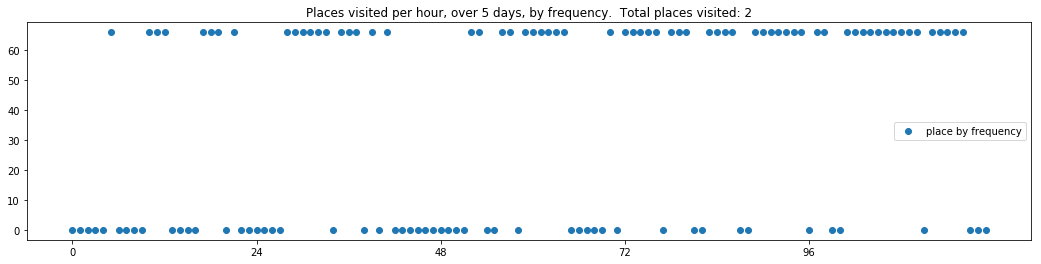

----- vector ----
prefix labels:  [123, 245]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 245, 245, 245, 245, 245, 245, 130, 130, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[199, 199, 199, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 0, 162, 0]
[0, 0, 0, 0, 357, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 52, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 133, 133, 133, 133]


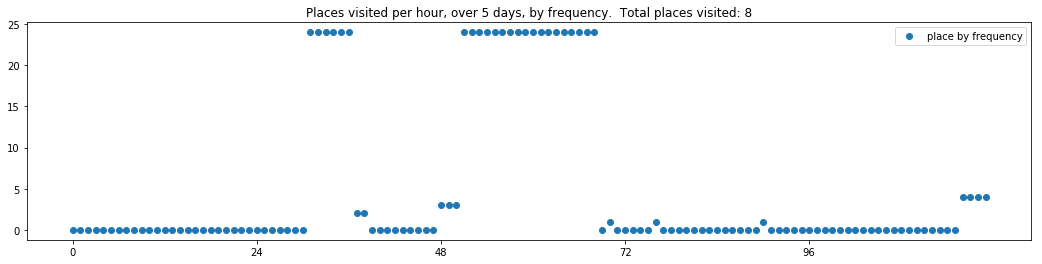

----- vector ----
prefix labels:  [227, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 193, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 388, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 239, 0, 0, 0, 0, 0, 555, 555, 555, 555, 555, 555, 555, 240, 0, 0, 0, 0, 0, 0, 0]


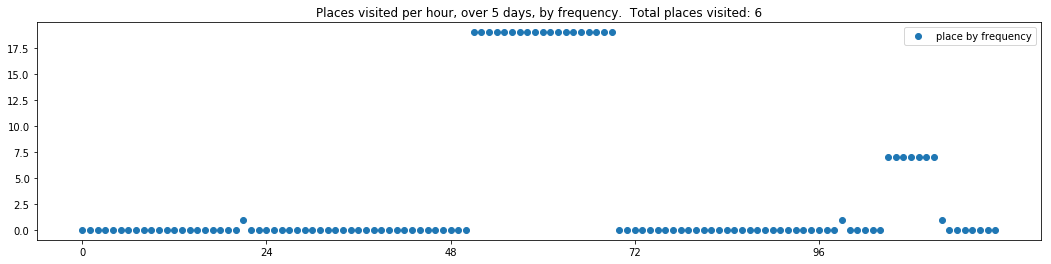

----- vector ----
prefix labels:  [167, 76]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 195, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[444, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 303, 303, 303, 303, 303, 303, 303, 134, 134, 134, 134, 134, 134]
[134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 0, 0, 0, 0, 0, 0, 0, 0, 0, 134, 134, 134, 134, 134]
[134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134, 134]


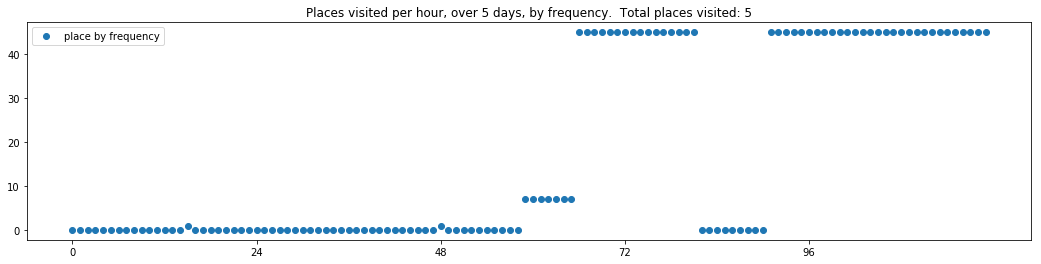

----- vector ----
prefix labels:  [140, 140]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[140, 140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 140, 0]


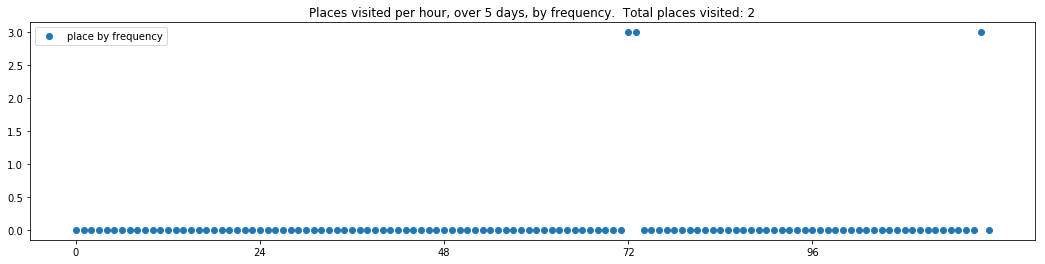

----- vector ----
prefix labels:  [4, 4]
[0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


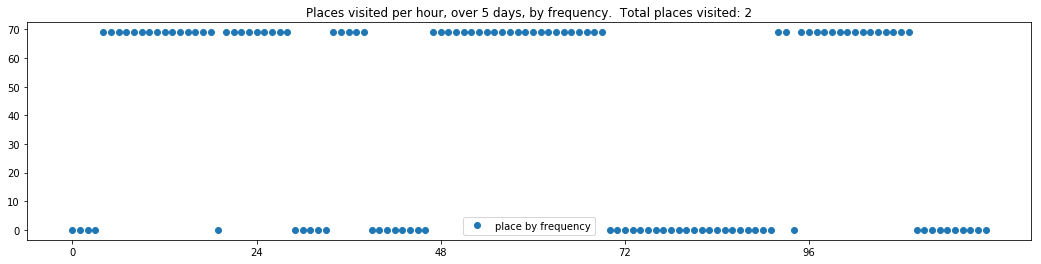

----- vector ----
prefix labels:  [21, 21]
[0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 41, 41, 388, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[21, 0, 0, 0, 551, 551, 551, 551, 551, 551, 551, 551, 551, 551, 551, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 21]
[21, 21, 0, 21, 0, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 388, 388, 149, 21, 21]


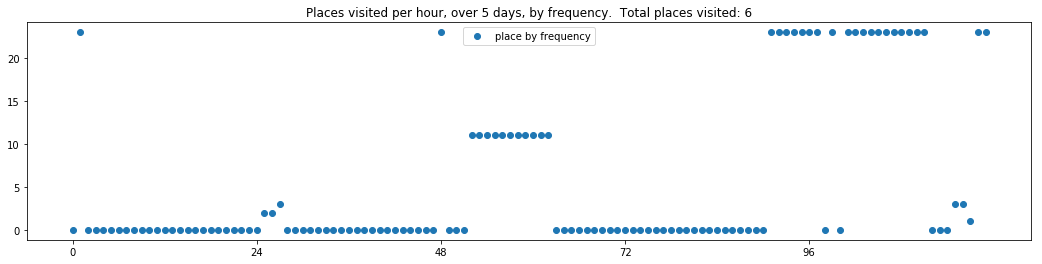


------
 55 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_55.txt 
------

----- vector ----
prefix labels:  [8, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 591, 591]
[591, 591, 591, 591, 0, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


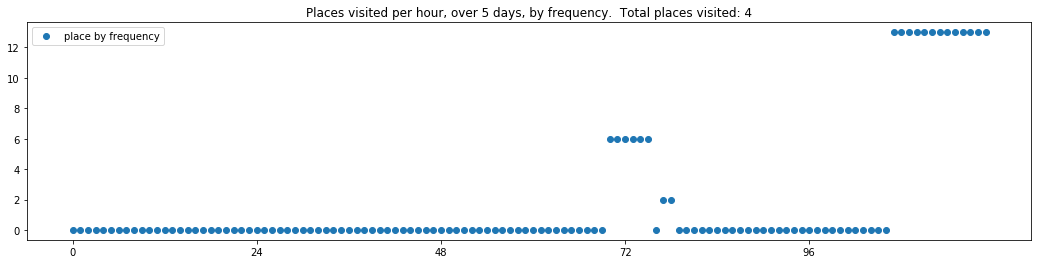

----- vector ----
prefix labels:  [349, 349]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 349, 423, 349, 349, 349, 349, 349, 349]
[349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 349, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 424, 424, 424, 424, 0, 0, 0, 0, 0, 0, 0, 423, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 423, 423, 423, 423, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57]


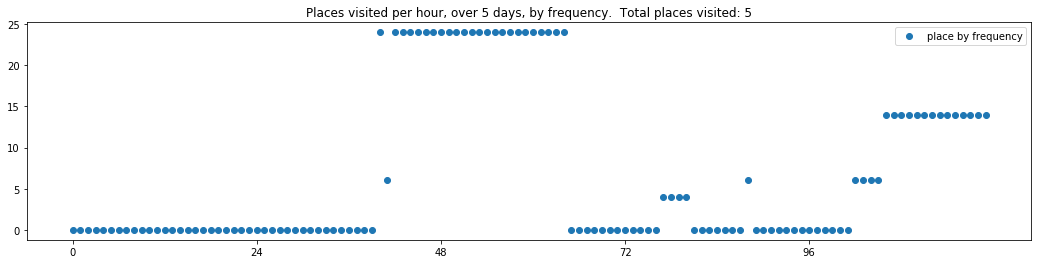

----- vector ----
prefix labels:  [286, 0]
[0, 0, 0, 0, 0, 286, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 46, 46, 46, 46, 46, 46]
[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46]
[46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46]
[46, 46, 46, 46, 46, 46, 46, 94, 94, 94, 94, 94, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


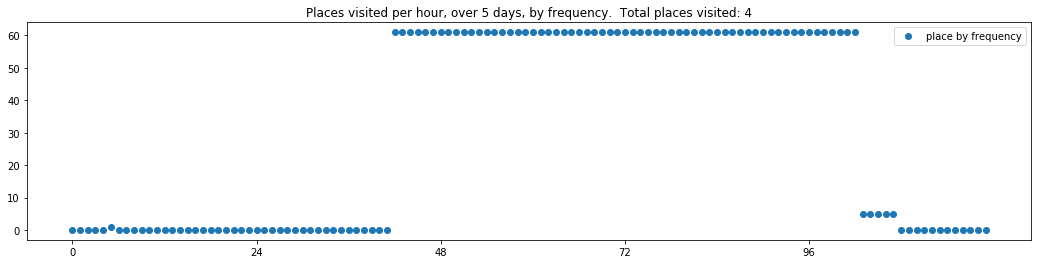

----- vector ----
prefix labels:  [439, 439]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 439, 439, 439, 439, 439, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[439, 439, 439, 439, 439, 439, 439, 439, 439, 0, 0, 0, 0, 0, 0, 439, 439, 0, 385, 385, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 439, 439, 439, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


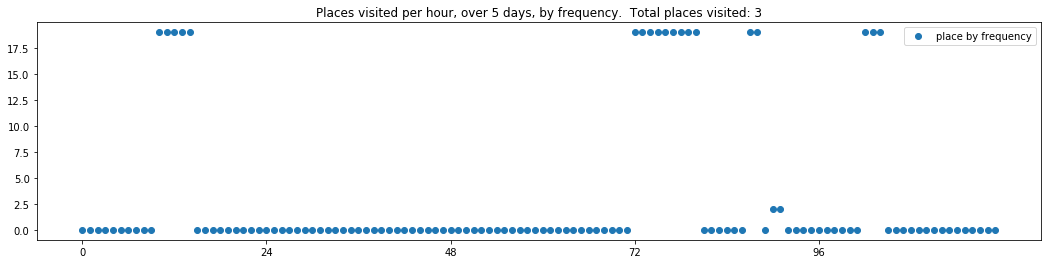

----- vector ----
prefix labels:  [21, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 0, 0, 0, 0, 0]
[0, 0, 0, 21, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 21, 21, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 21, 21, 21, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[72, 72, 72, 72, 72, 72, 72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


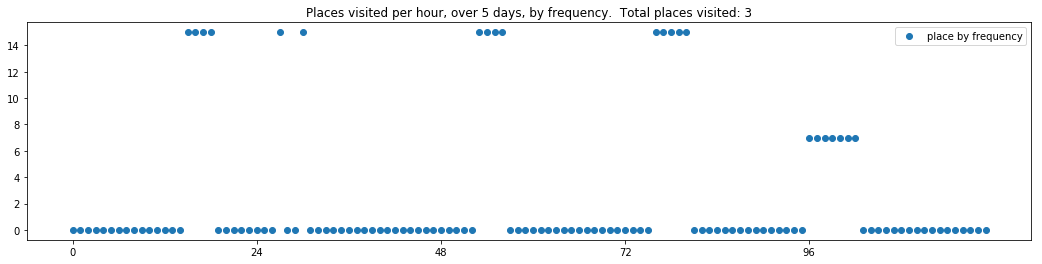

----- vector ----
prefix labels:  [246, 246]
[0, 0, 0, 0, 0, 0, 0, 0, 246, 246, 246, 246, 246, 246, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 246, 246, 246, 246, 246, 246, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246]
[246, 246, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 246]
[246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246]


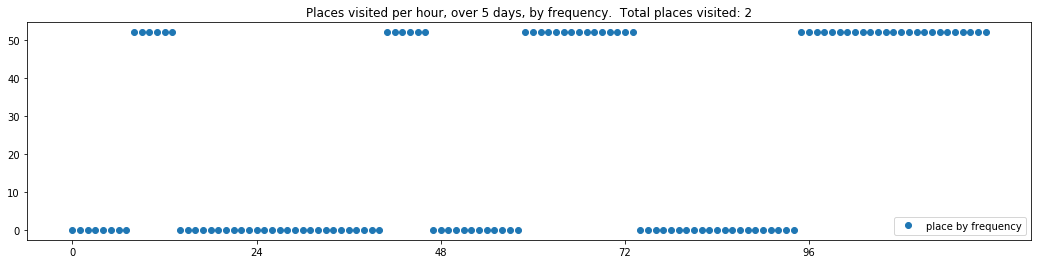

----- vector ----
prefix labels:  [142, 142]
[0, 0, 0, 0, 0, 0, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142]
[142, 142, 142, 142, 142, 142, 142, 142, 0, 0, 0, 0, 0, 0, 0, 142, 142, 142, 0, 0, 0, 0, 0, 0]
[0, 0, 142, 142, 142, 142, 142, 142, 142, 142, 142, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 142]
[142, 0, 142, 142, 142, 142, 142, 142, 142, 142, 142, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0]
[0, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 0, 0, 0, 0]


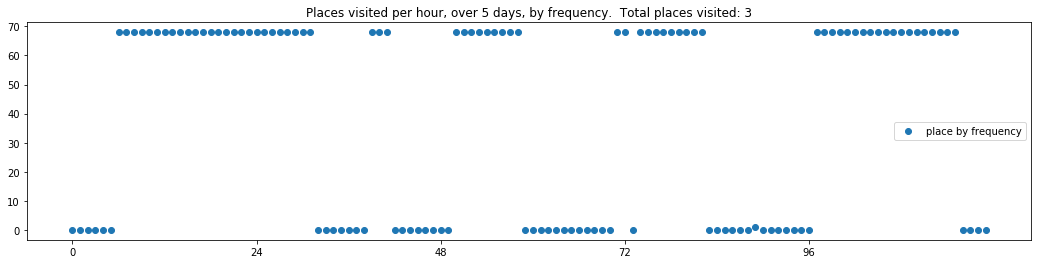

----- vector ----
prefix labels:  [612, 21]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 0, 0, 0]
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21]
[21, 21, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 0, 21, 21, 21, 0, 0, 21, 21, 21, 21]
[21, 21, 21, 21, 21, 21, 21, 0, 21, 21, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0]


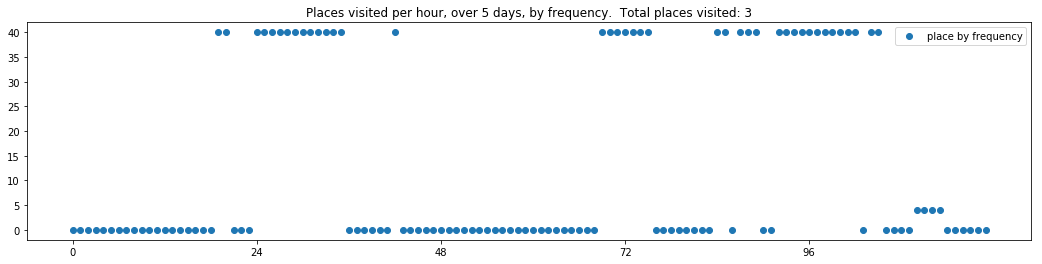

----- vector ----
prefix labels:  [391, 391]
[0, 0, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 0, 391, 391, 391, 391, 391, 391]
[391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391]
[391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 311, 311, 311, 311, 391, 391, 391, 391, 391, 391, 391, 391, 391]
[391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391]
[391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391]


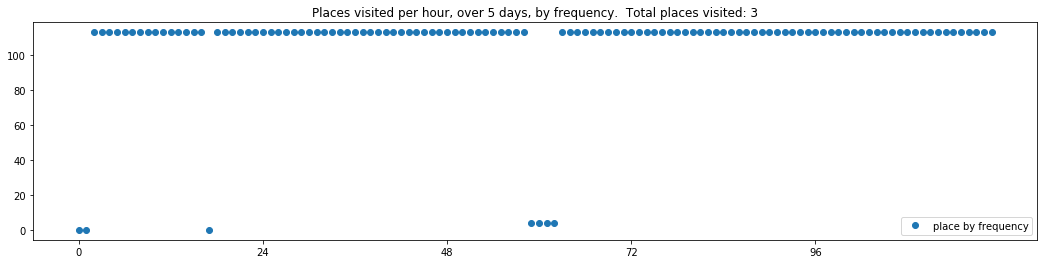

----- vector ----
prefix labels:  [341, 341]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 341, 341, 341, 341, 341, 341, 341, 341, 341, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 341, 341, 341, 341, 341, 341, 341, 341]
[341, 341, 341, 341, 341, 341, 341, 341, 463, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 0, 0, 434, 434, 434, 434, 434, 434, 434, 434, 434]
[434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434, 434]


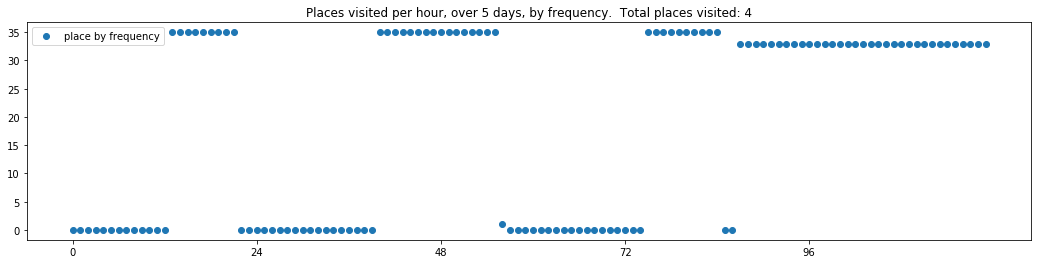


------
 60 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_60.txt 
------

----- vector ----
prefix labels:  [108, 108]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 562, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


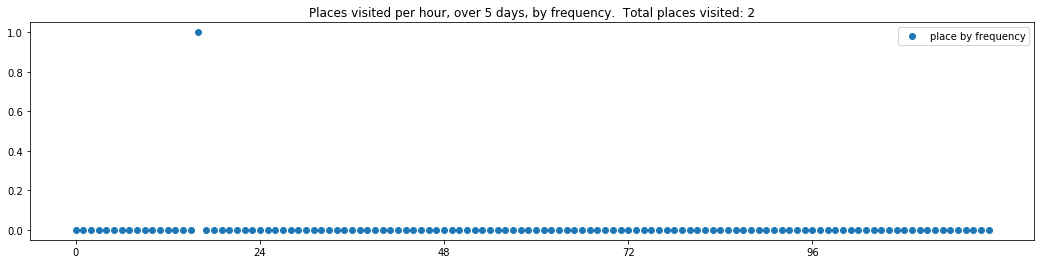

----- vector ----
prefix labels:  [312, 573]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 573]
[573, 573, 573, 0, 0, 0, 0, 0, 0, 194, 573, 573, 573, 0, 464, 269, 269, 0, 0, 0, 0, 168, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84, 84, 0, 311, 311, 311, 311, 311, 311, 311]


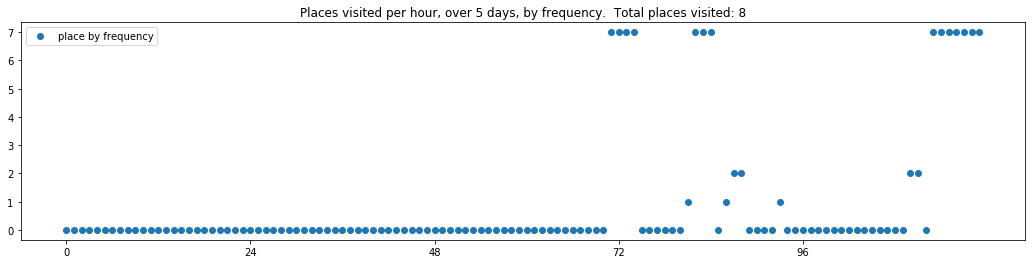

----- vector ----
prefix labels:  [526, 400]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 400, 0, 0, 0, 456, 526, 400, 400, 0, 254, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 209, 0, 0, 0, 0]
[0, 0, 0, 319, 319, 319, 319, 0, 0, 0, 0, 0, 0, 0, 0, 0, 271, 271, 271, 271, 271, 271, 271, 271]
[0, 0, 0, 0, 162, 162, 162, 162, 162, 162, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 124, 0, 0, 0, 0, 0]


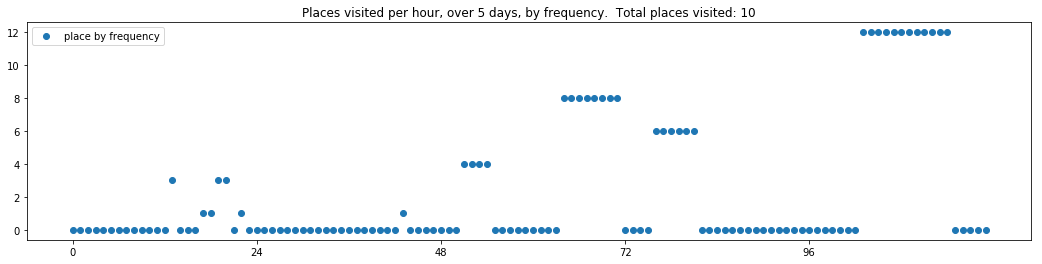

----- vector ----
prefix labels:  [23, 487]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 0, 0, 487, 567, 567, 0, 567]
[567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 0, 0, 23, 567, 567, 567, 487, 487]
[487, 487, 487, 487, 487, 0, 23, 487, 23, 487, 487, 487, 487, 487, 487, 0, 0, 0, 23, 567, 567, 567, 567, 567]
[567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567]
[567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 567, 23, 487, 487, 487]


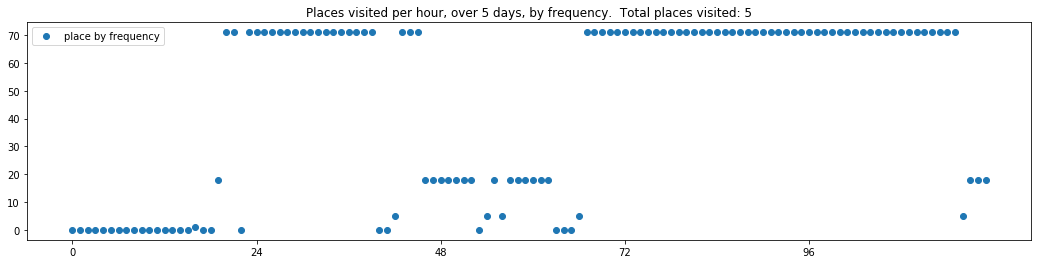

----- vector ----
prefix labels:  [2, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 335, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


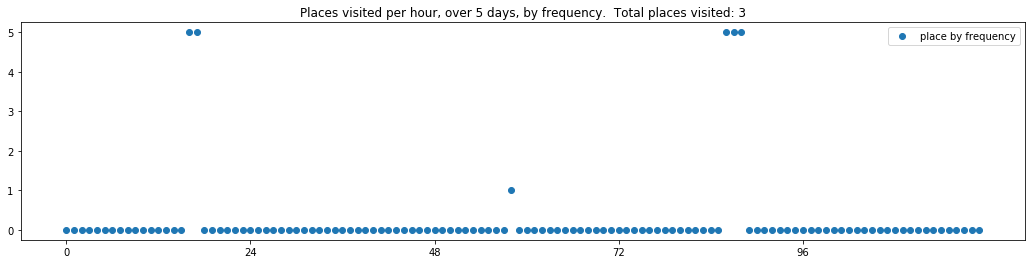

----- vector ----
prefix labels:  [439, 439]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 439, 439, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 439, 0]
[0, 0, 439, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 439, 439, 439, 439, 0, 0, 0, 439, 439, 439, 439]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


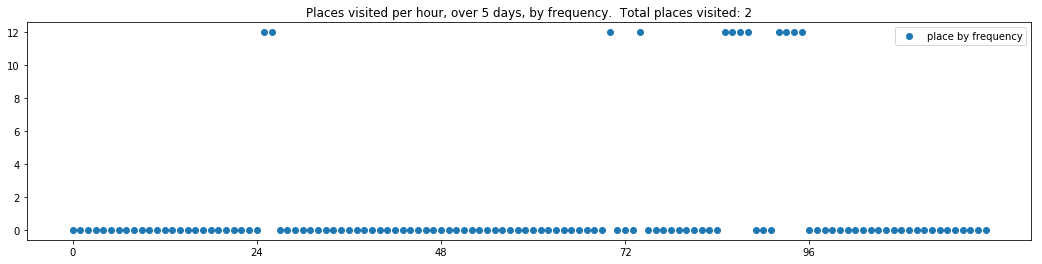

----- vector ----
prefix labels:  [162, 235]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


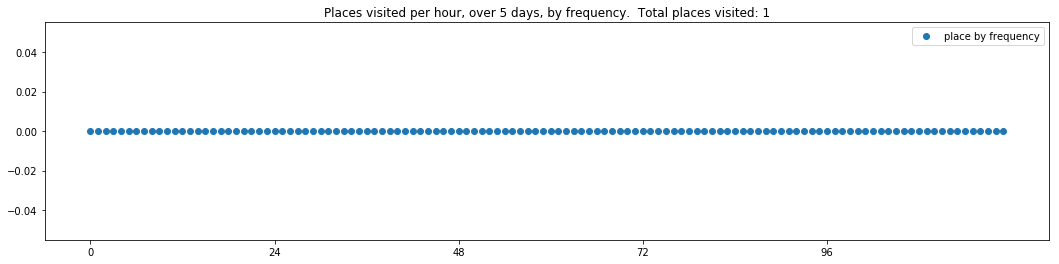

----- vector ----
prefix labels:  [102, 588]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 165, 390, 390, 390, 390, 0, 0, 0, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 390, 390, 390]
[390, 390, 0, 390, 522, 522, 522, 522, 0, 611, 611, 0, 0, 390, 390, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 68, 0, 0, 0, 0, 0, 0, 0, 0, 453, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611]


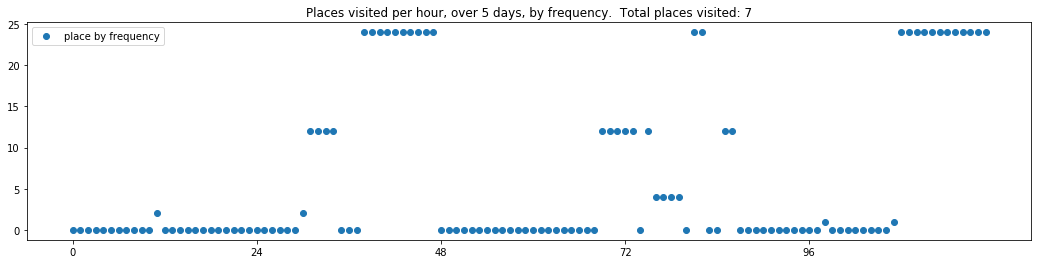

----- vector ----
prefix labels:  [588, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 588, 0, 0, 0, 0, 0, 0, 22, 22, 22, 22, 22]
[22, 22, 22, 0, 0, 98, 0, 0, 588, 588, 588, 588, 0, 0, 0, 0, 588, 588, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390]


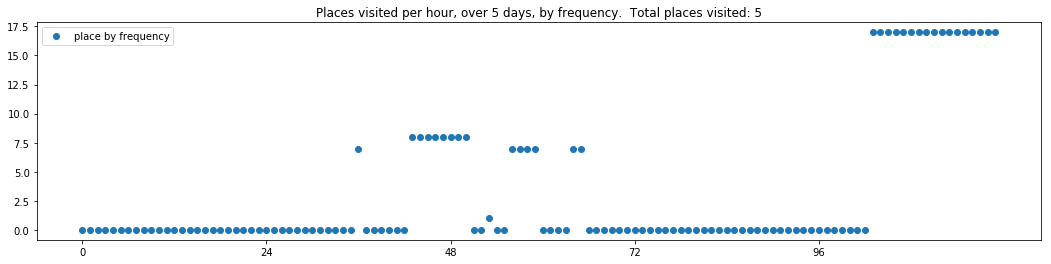

----- vector ----
prefix labels:  [87, 87]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[87, 87, 0, 87, 87, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 146, 146, 94, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 542, 0, 0, 0, 0]


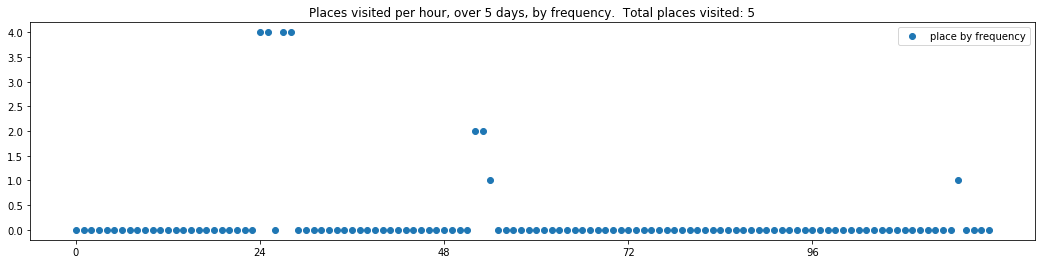


------
 65 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_65.txt 
------

----- vector ----
prefix labels:  [31, 31]
[0, 0, 0, 0, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
[31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
[31, 31, 31, 31, 31, 31, 0, 0, 447, 0, 0, 0, 0, 0, 0, 0, 0, 31, 31, 31, 31, 31, 0, 0]
[0, 0, 0, 0, 0, 0, 516, 204, 204, 204, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
[0, 0, 119, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 31, 31, 31, 31, 31, 31, 31, 31, 31]


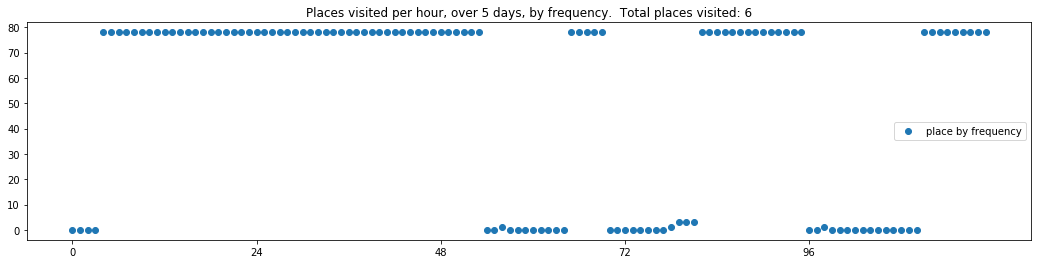

----- vector ----
prefix labels:  [386, 386]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 386, 386, 386, 386, 386, 386, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 386, 386, 386, 386, 76, 76, 386, 386, 386, 386, 386, 386, 386, 386, 386, 386]
[386, 386, 386, 0, 0, 0, 0, 478, 451, 0, 0, 0, 0, 0, 0, 478, 478, 478, 0, 478, 478, 478, 478, 478]
[478, 0, 0, 0, 340, 0, 0, 0, 0, 0, 0, 0, 0, 0, 451, 171, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 478, 478, 0, 0, 21, 21, 0, 231, 0, 478, 478, 478, 478]


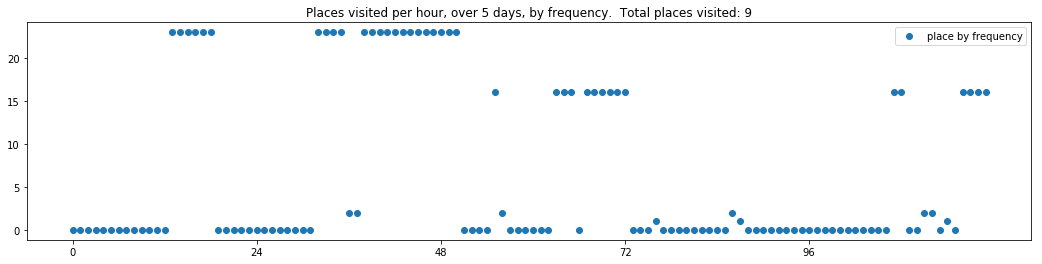

----- vector ----
prefix labels:  [314, 314]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 320, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 165, 314, 314, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 314, 0, 0, 0, 0, 0, 314, 314, 0, 0, 0, 0, 0, 0, 0, 0, 0]


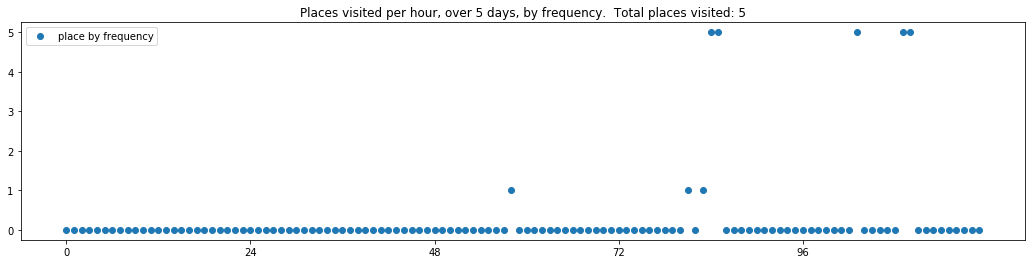

----- vector ----
prefix labels:  [260, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 260, 260, 260, 260, 260, 260, 260]
[260, 260, 260, 260, 260, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 260, 260, 260, 260]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 260, 260, 260, 260, 260, 260, 260, 260, 260]


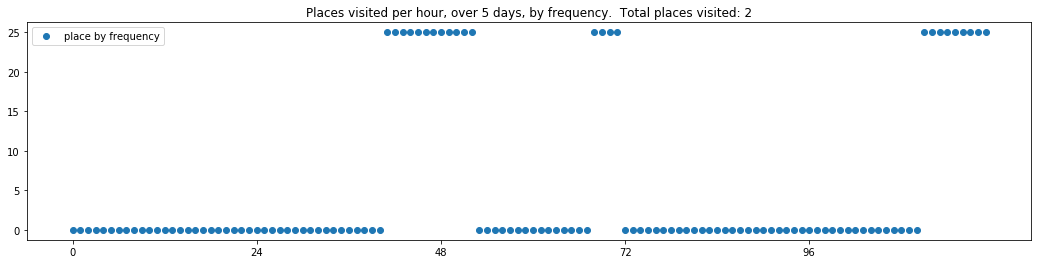

----- vector ----
prefix labels:  [314, 304]
[0, 0, 0, 0, 0, 0, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304]
[304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304]
[304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 311]
[311, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 304, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 313, 304, 304, 304, 304, 304]


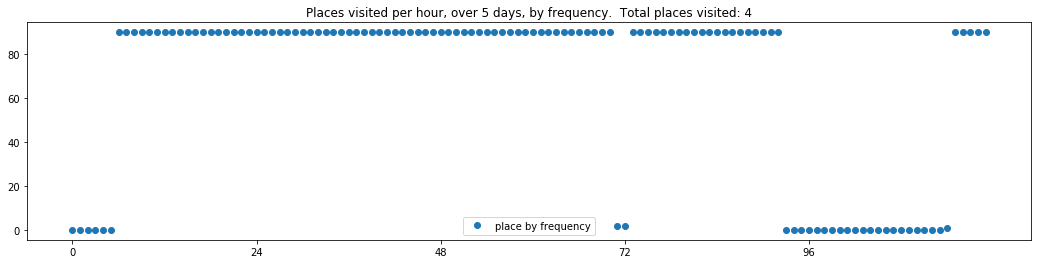

----- vector ----
prefix labels:  [282, 145]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 282, 282, 282, 282, 282, 282, 282]
[282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 267, 56, 56, 56, 282, 282, 282, 282]
[282, 282, 282, 282, 162, 435, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 282, 282, 282, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 486, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


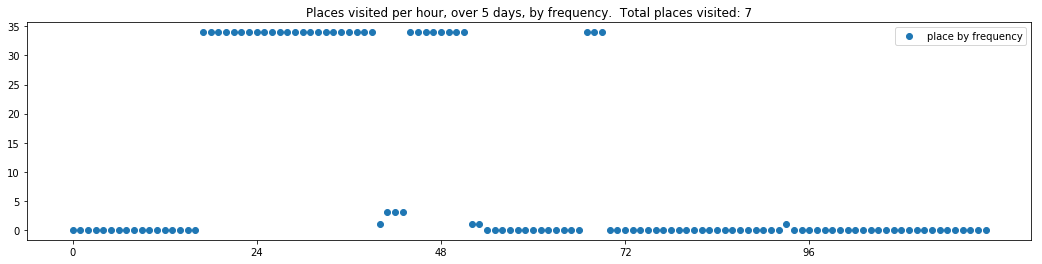

----- vector ----
prefix labels:  [611, 611]
[0, 0, 0, 0, 0, 0, 0, 0, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611]
[611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 0]
[611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611]
[611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611]
[611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611]


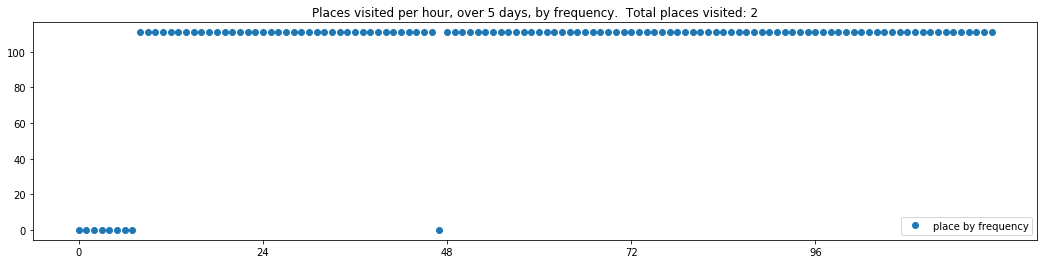

----- vector ----
prefix labels:  [34, 69]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 69, 0, 0, 0, 0, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34]
[34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34]
[34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34]
[34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 151]
[151, 0, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 0, 34, 34, 34, 34, 34, 34, 34, 34, 34]


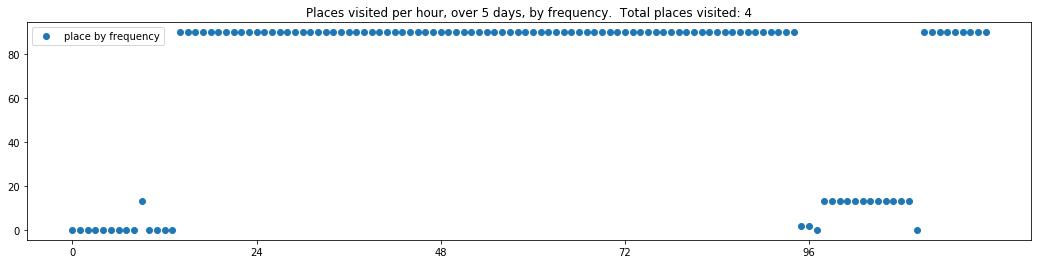

----- vector ----
prefix labels:  [83, 2]
[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 239, 0, 239, 239, 239, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 239, 239, 226, 357, 357, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 271]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 239, 239, 239, 0, 0, 0, 0, 0, 0, 0]


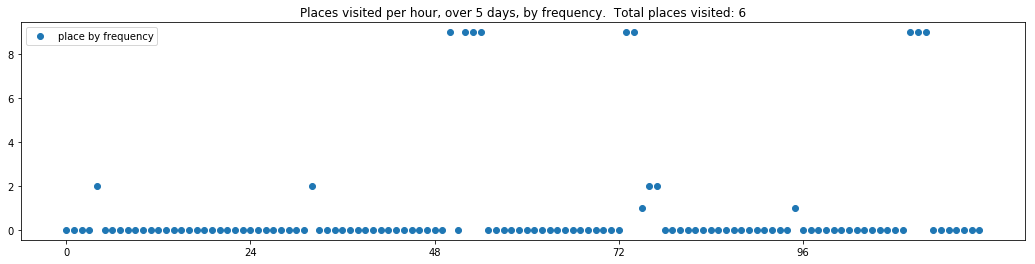

----- vector ----
prefix labels:  [384, 384]
[0, 0, 0, 0, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384]
[384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384]
[384, 384, 384, 384, 384, 384, 384, 384, 384, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 384, 384, 384, 384]
[384, 384, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


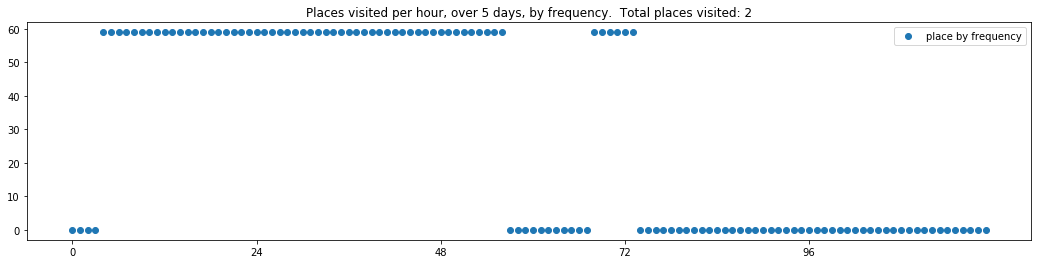


------
 70 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_70.txt 
------

----- vector ----
prefix labels:  [181, 76]
[0, 644, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 439, 439, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 212, 212, 212]
[212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212]
[212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212]


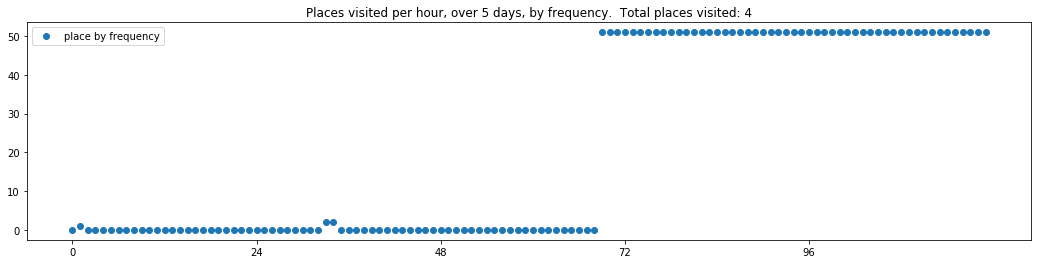

----- vector ----
prefix labels:  [184, 184]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 184, 184, 184, 184, 184, 184, 0, 0, 0, 0, 0, 0, 0, 0, 0, 184]
[184, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


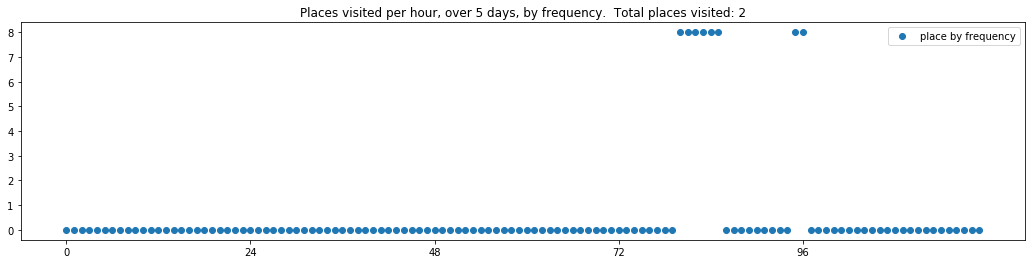

----- vector ----
prefix labels:  [328, 328]
[0, 0, 0, 0, 0, 0, 0, 0, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 0, 328]
[328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 0, 328]
[328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328]
[328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328]
[328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 328, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


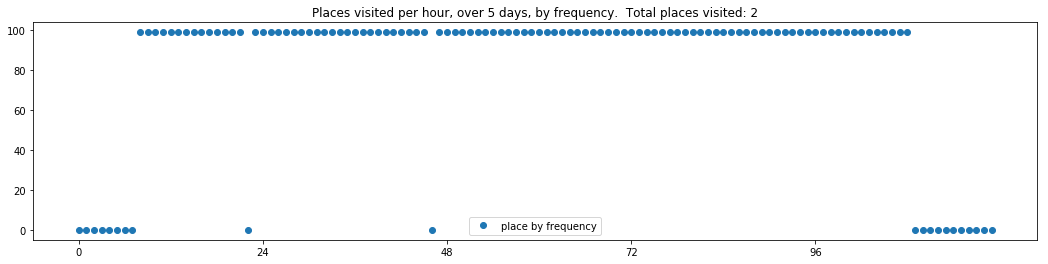

----- vector ----
prefix labels:  [50, 50]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 183, 20, 20, 20, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 396, 396, 396, 396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


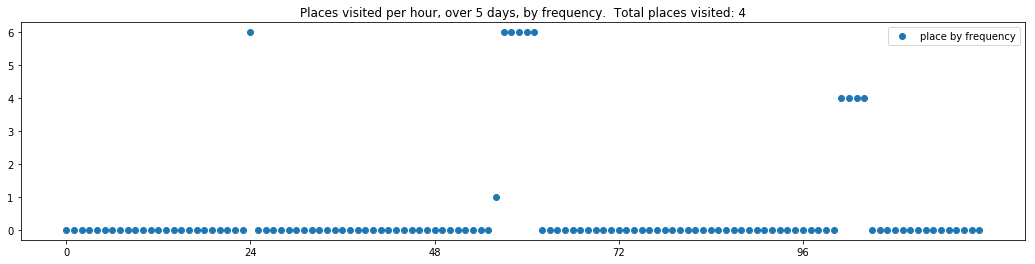

----- vector ----
prefix labels:  [65, 65]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65]
[65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 22, 22, 22]
[22, 22, 22, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 0, 65, 65, 65, 65, 65, 65]
[65, 65, 65, 22, 0, 22, 65, 65, 22, 65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65]


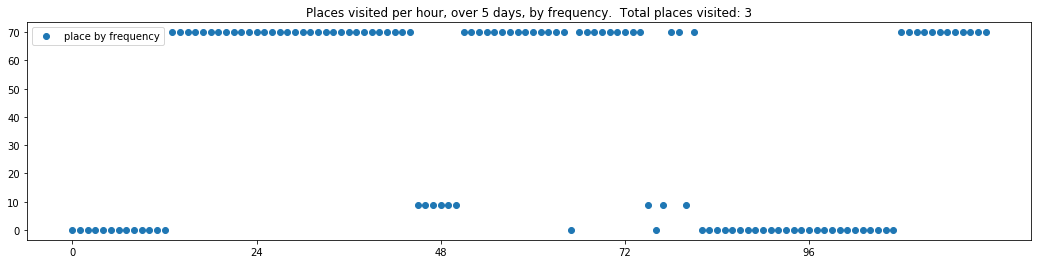

----- vector ----
prefix labels:  [611, 611]
[0, 0, 0, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611]
[611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611]
[611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611]
[611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611]
[611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611]


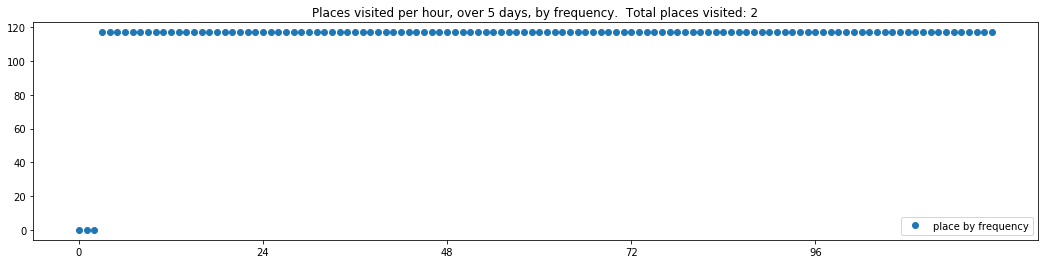

----- vector ----
prefix labels:  [133, 133]
[478, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]
[69, 69, 69, 69, 69, 0, 0, 0, 0, 0, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]
[144, 144, 144, 144, 144, 144, 0, 0, 69, 69, 0, 0, 0, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]
[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 0, 0, 0, 0, 0, 0, 372, 0, 0, 0, 0, 0]
[144, 144, 144, 144, 0, 0, 0, 0, 69, 0, 241, 0, 1, 7, 0, 0, 0, 0, 0, 0, 39, 323, 323, 323]


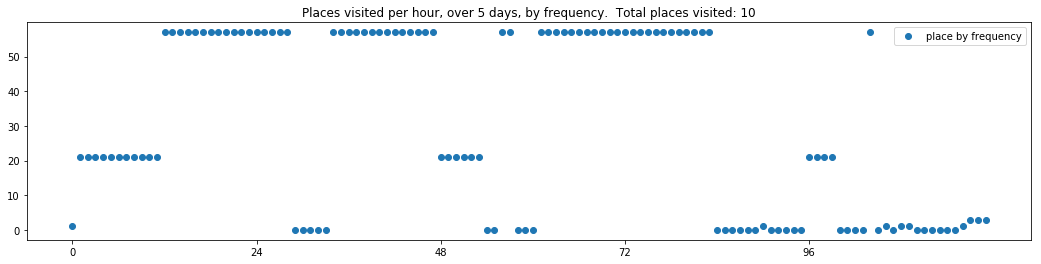

----- vector ----
prefix labels:  [87, 69]
[0, 0, 0, 0, 0, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 69]
[0, 0, 0, 0, 0, 0, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 0, 0, 0, 69, 69, 69, 69]
[0, 0, 0, 0, 0, 0, 69, 69, 0, 0, 410, 0, 0, 0, 69, 69, 69, 69, 69, 69, 87, 87, 87, 87]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


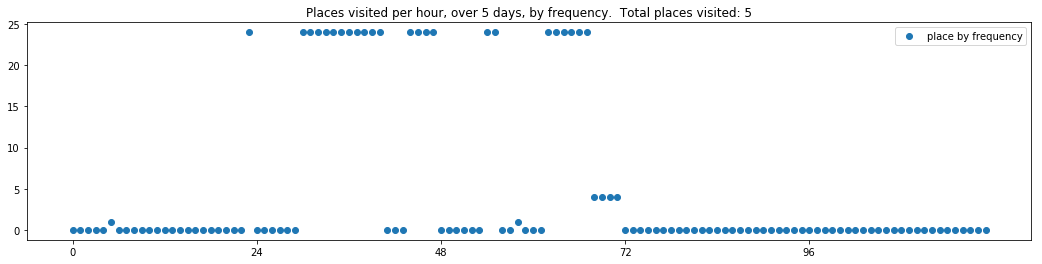

----- vector ----
prefix labels:  [533, 0]
[0, 0, 0, 0, 533, 533, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 533, 533, 533, 533, 533, 533, 533, 533, 533, 533, 533, 533, 533, 533, 533, 533, 533, 533, 533, 533]
[533, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


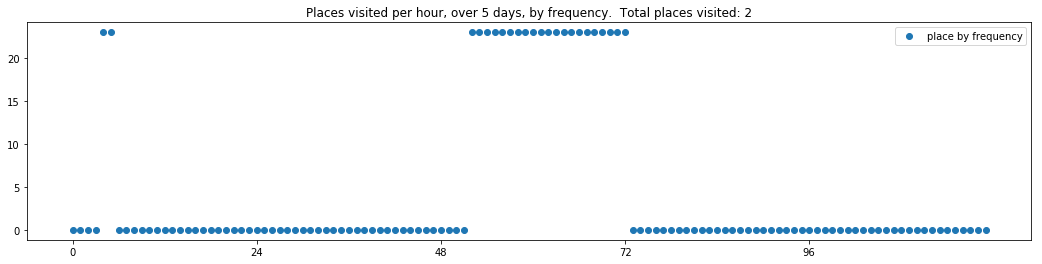

----- vector ----
prefix labels:  [334, 334]
[334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334]
[334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334]
[334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334]
[334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334]
[334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334]


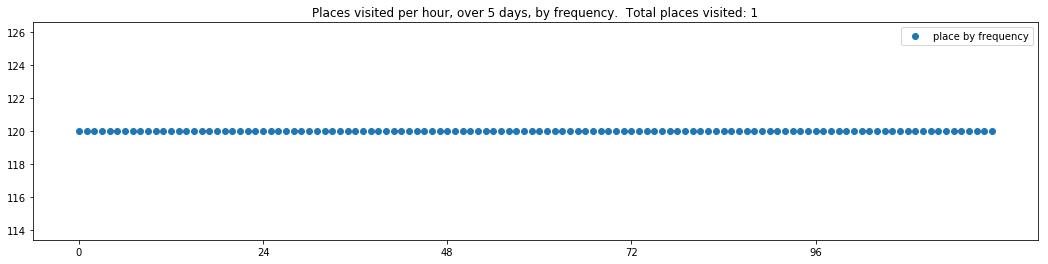


------
 75 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_75.txt 
------

----- vector ----
prefix labels:  [590, 415]
[0, 0, 328, 328, 328, 328, 328, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107]
[107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415]
[415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 0, 0, 0, 0, 328, 453]
[0, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 0, 415, 415, 415, 415, 415, 415, 415, 415]
[415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415]


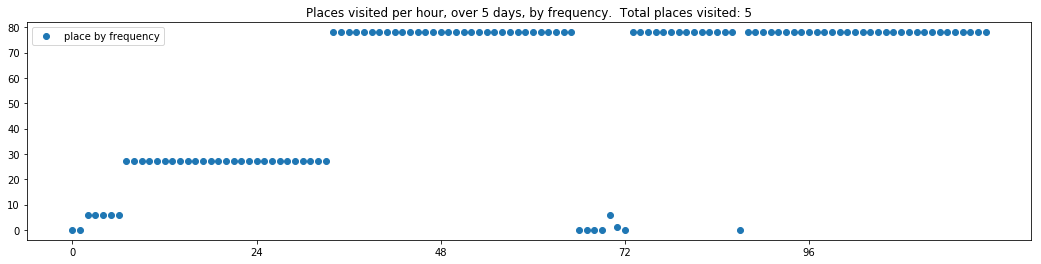

----- vector ----
prefix labels:  [427, 427]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 427, 427, 427, 0, 0, 0, 0, 0, 0, 0, 0, 427, 427, 427, 427, 427, 427, 427, 427, 427, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 427, 284, 284, 284, 284, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 239, 239, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


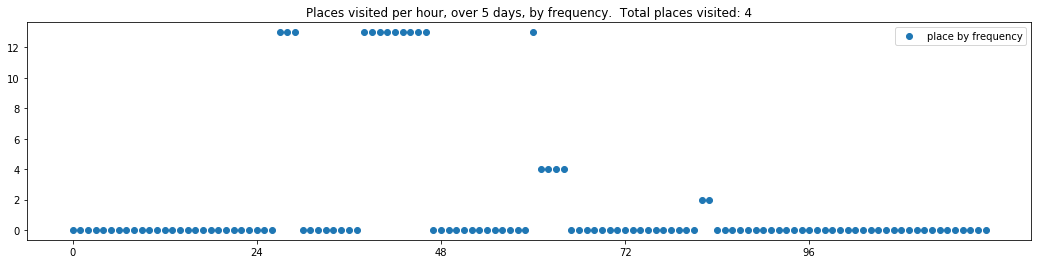

----- vector ----
prefix labels:  [97, 97]
[0, 0, 0, 0, 0, 410, 410, 410, 410, 410, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545, 545]
[545, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97]
[97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 0, 0, 0, 0, 0, 0, 0, 644, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 224, 0, 0, 0, 0, 0, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147]


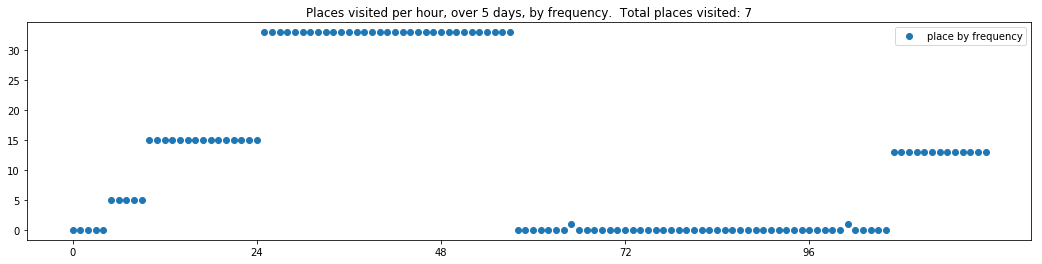

----- vector ----
prefix labels:  [437, 437]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 437, 437, 437, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 437, 437, 437, 437, 437, 437, 0, 0, 0, 0, 0, 0, 0, 437, 437, 437, 437, 437]
[437, 437, 437, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 437, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 437, 437]


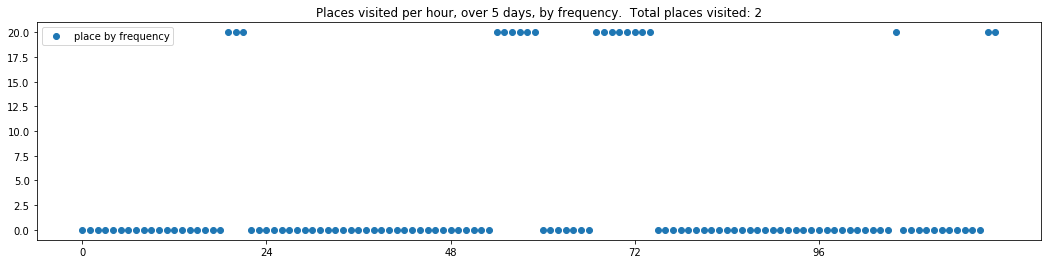

----- vector ----
prefix labels:  [515, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 32, 32, 32, 32, 32, 32, 32, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 164]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 214, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[637, 0, 0, 0, 0, 0, 278, 0, 0, 0, 0, 0, 0, 0, 278, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278, 278]


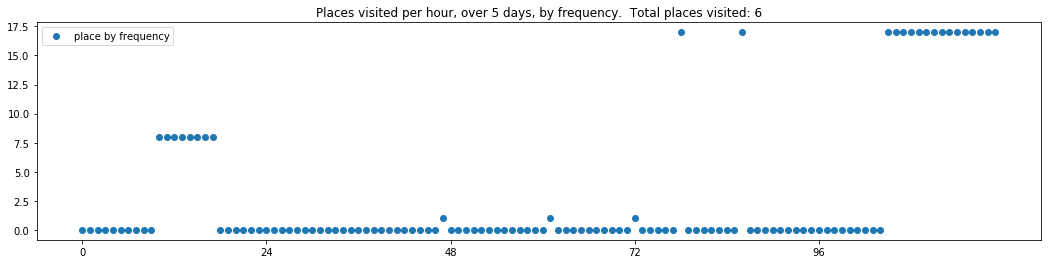

----- vector ----
prefix labels:  [637, 637]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 544, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 544, 544, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 38, 38, 38, 38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


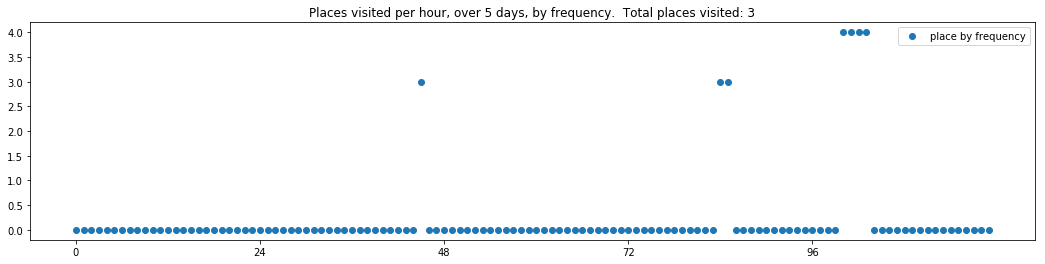

----- vector ----
prefix labels:  [404, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


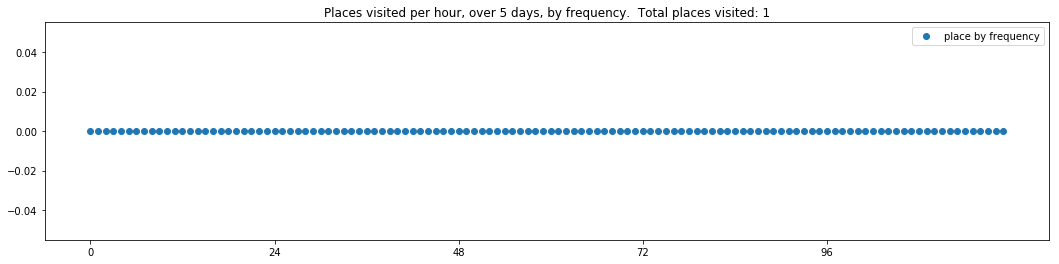

----- vector ----
prefix labels:  [392, 392]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 0, 0, 0]
[0, 0, 0, 0, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392]
[392, 392, 392, 392, 392, 392, 392, 392, 392, 0, 0, 0, 0, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392]
[392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392]


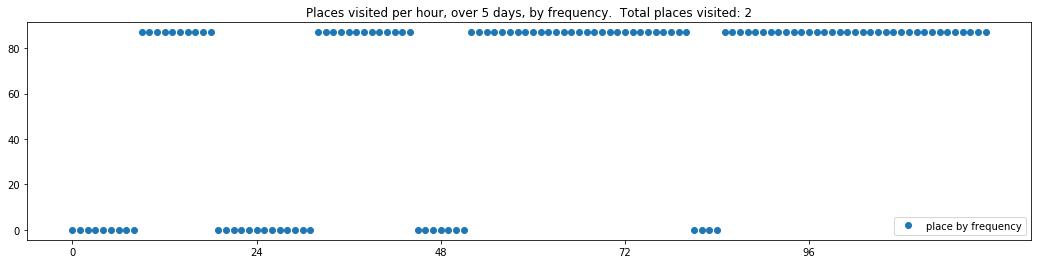

----- vector ----
prefix labels:  [11, 11]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21]
[0, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 71, 21, 21, 21, 21, 21, 21]
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]


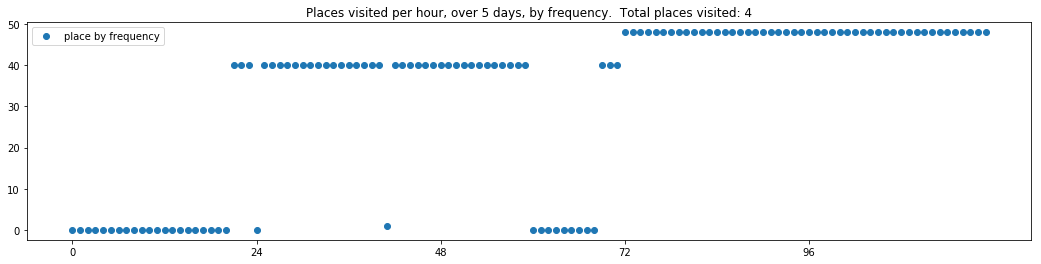

----- vector ----
prefix labels:  [341, 462]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 194, 0, 0, 0, 0, 341, 341, 341, 341, 341, 311, 311, 311]
[311, 311, 0, 0, 0, 0, 0, 0, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 0, 341, 311, 311, 311, 311]
[0, 341, 341, 341, 341, 311, 311, 311, 311, 311, 311, 311, 311, 0, 0, 0, 0, 0, 341, 341, 0, 194, 194, 341]
[0, 19, 56, 56, 56, 56, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 341, 462]
[462, 462, 462, 462, 462, 462, 522, 522, 390, 390, 390, 390, 390, 390, 390, 341, 341, 341, 311, 311, 507, 507, 507, 311]


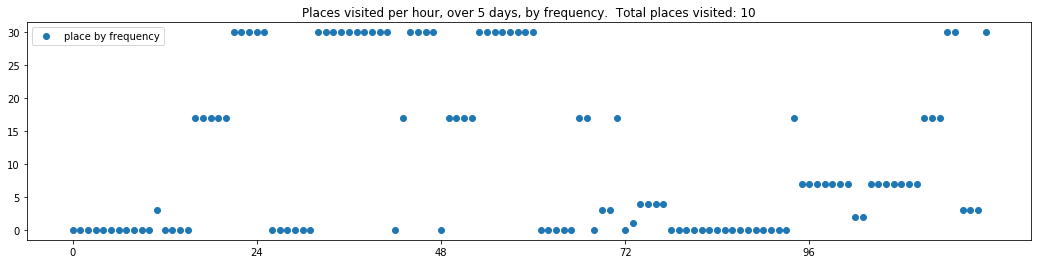


------
 80 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_80.txt 
------

----- vector ----
prefix labels:  [152, 353]
[0, 0, 0, 0, 0, 0, 0, 0, 130, 21, 21, 21, 21, 0, 0, 353, 353, 353, 353, 353, 353, 353, 353, 353]
[353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353]
[353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 0, 0, 0, 353]
[353, 353, 353, 353, 353, 353, 353, 353, 353, 0, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 130, 130]
[130, 130, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353]


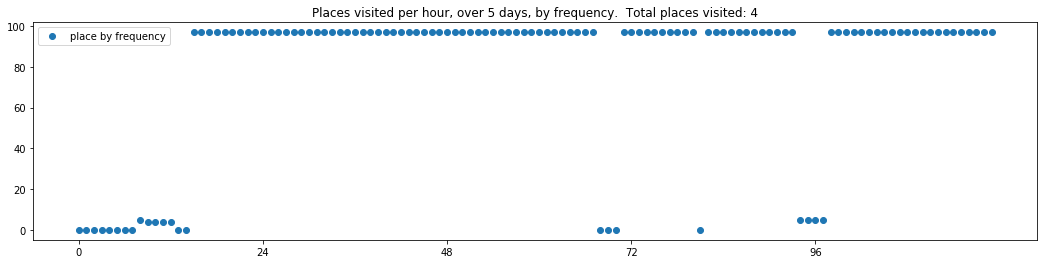

----- vector ----
prefix labels:  [44, 0]
[0, 0, 0, 0, 0, 0, 0, 44, 44, 44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 80, 80, 80, 80, 80, 80, 80, 80]
[0, 0, 0, 0, 0, 0, 0, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334, 334]


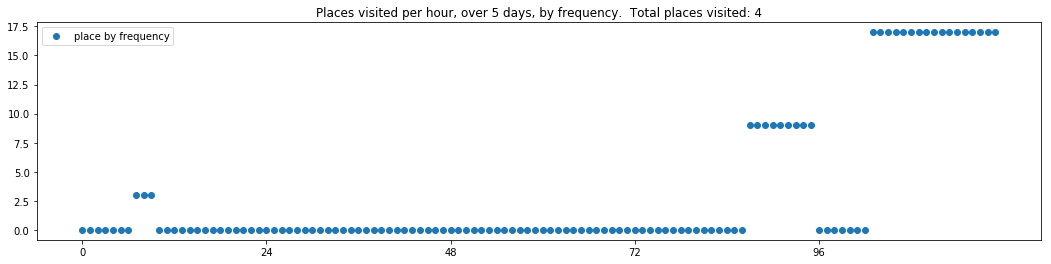

----- vector ----
prefix labels:  [177, 177]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 177, 177, 177, 177, 177, 0, 0, 0, 0, 177]
[177, 177, 84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 177, 177, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 0, 0, 16, 432, 76, 76, 76, 76, 76]
[76, 76, 76, 76, 76, 0, 0, 0, 0, 0, 0, 0, 0, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177]
[177, 177, 177, 177, 177, 117, 117, 0, 0, 0, 0, 0, 0, 552, 100, 0, 177, 177, 177, 0, 0, 0, 177, 177]


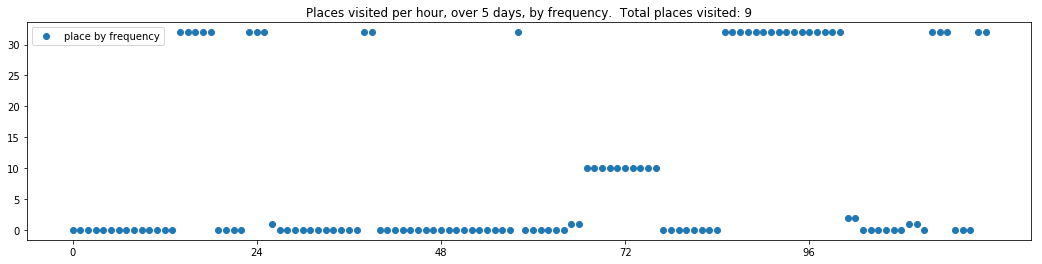

----- vector ----
prefix labels:  [180, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 180, 0, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 0, 180, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


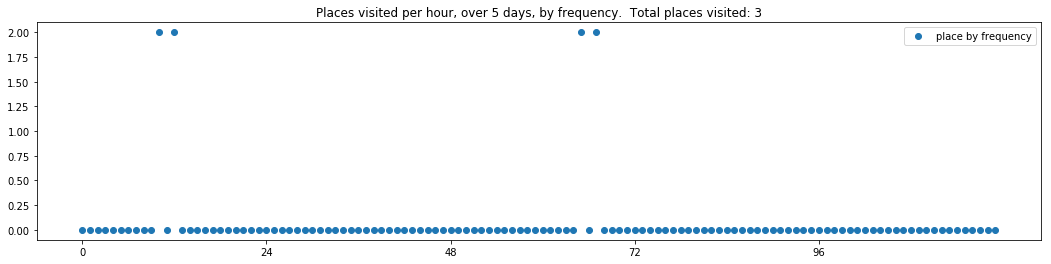

----- vector ----
prefix labels:  [271, 271]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 271, 271, 271, 271, 271, 271, 271]
[0, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 0, 0, 271, 271, 271, 271, 271, 271, 271, 271]
[271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271]
[271, 271, 271, 271, 0, 0, 0, 0, 0, 0, 0, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271]
[271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271]


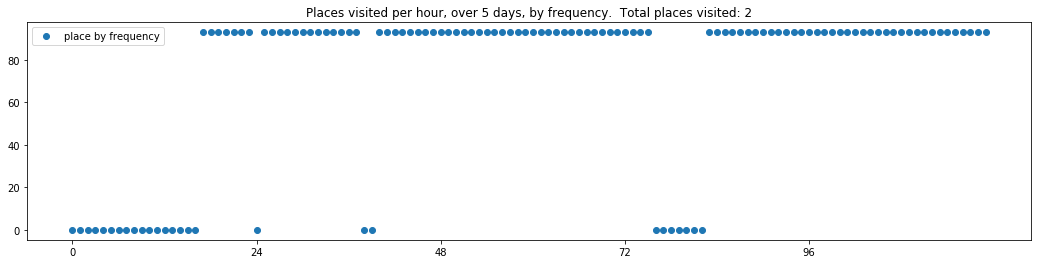

----- vector ----
prefix labels:  [431, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 431, 431, 431, 431, 431, 431, 431, 431, 431, 431]
[431, 431, 431, 431, 431, 0, 0, 0, 308, 0, 0, 0, 0, 0, 0, 0, 0, 0, 590, 590, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 22, 22, 22, 0, 0, 0, 0, 0, 22, 22, 0, 0, 0, 0, 0, 0]
[460, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 351, 0, 0, 0, 0, 0, 0, 0]


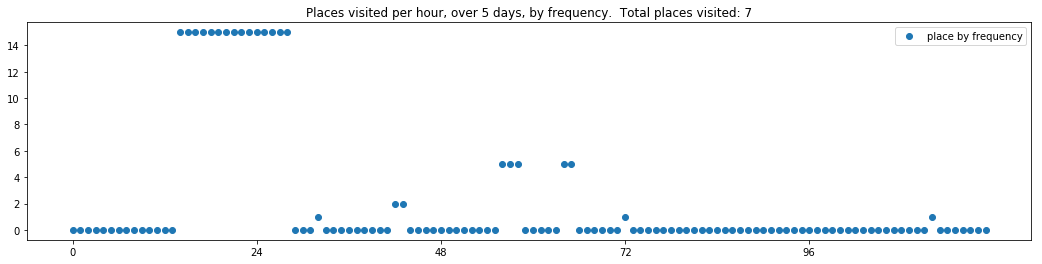

----- vector ----
prefix labels:  [78, 78]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 395, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 78, 0, 214, 214, 214, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 202, 202, 202, 0, 0, 0, 0, 0, 0, 239, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 214, 214, 214, 214, 214, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 214, 214]


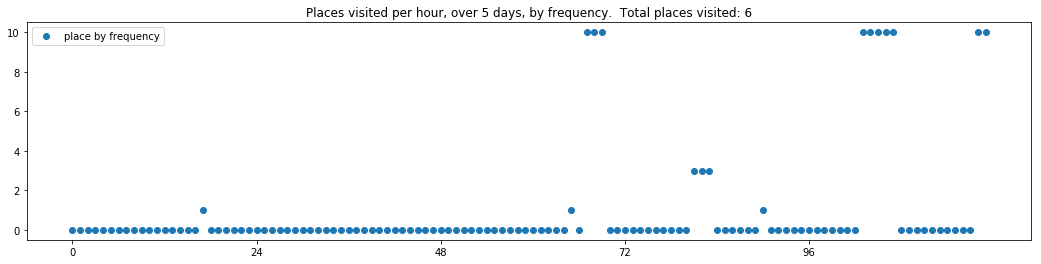

----- vector ----
prefix labels:  [487, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 487, 487, 487, 487, 487, 487, 487]
[487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487]
[487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 487, 0, 0, 0, 0]


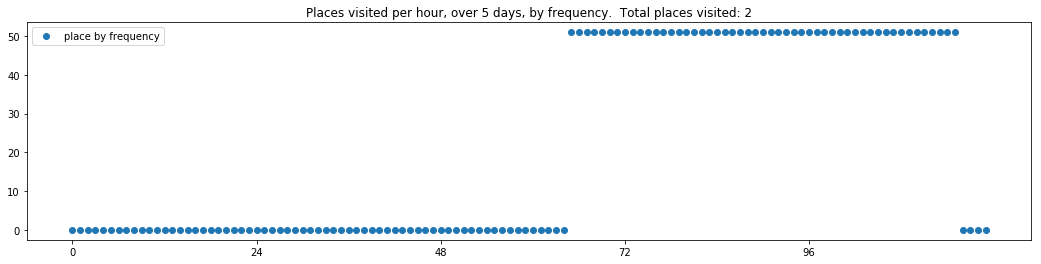

----- vector ----
prefix labels:  [365, 271]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 288, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 317, 317, 317, 317]


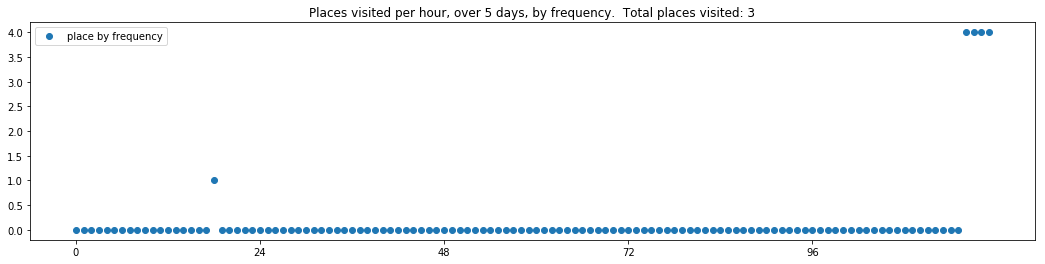

----- vector ----
prefix labels:  [384, 214]
[0, 0, 0, 0, 0, 0, 0, 29, 0, 0, 0, 0, 0, 177, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 214, 0, 8, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 214, 214, 214, 214, 214, 214, 214, 214, 214]


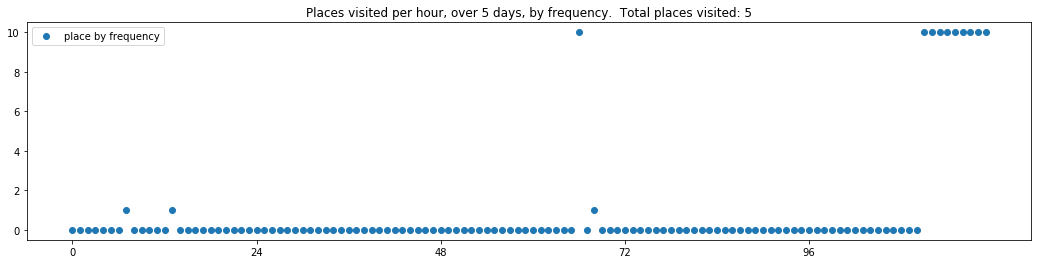


------
 85 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_85.txt 
------

----- vector ----
prefix labels:  [568, 568]
[0, 195, 195, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 568, 568, 568, 568, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 457]
[0, 0, 0, 0, 0, 0, 0, 568, 568, 568, 568, 568, 0, 0, 0, 0, 0, 0, 0, 568, 568, 568, 568, 568]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 568, 568]


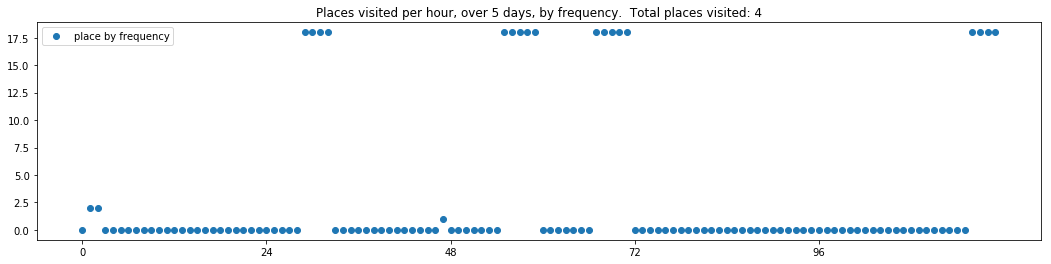

----- vector ----
prefix labels:  [15, 197]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 197, 197, 0, 0, 197, 260, 361]
[361, 199, 199, 199, 199, 199, 199, 199, 199, 199, 197, 85, 523, 580, 580, 580, 580, 580, 580, 580, 580, 580, 580, 580]
[580, 580, 575, 575, 575, 465, 0, 575, 0, 0, 575, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 144]
[144, 144, 144, 144, 144, 144, 144, 144, 144, 199, 199, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270]
[270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 0, 270, 270, 270, 270, 270, 270, 270]


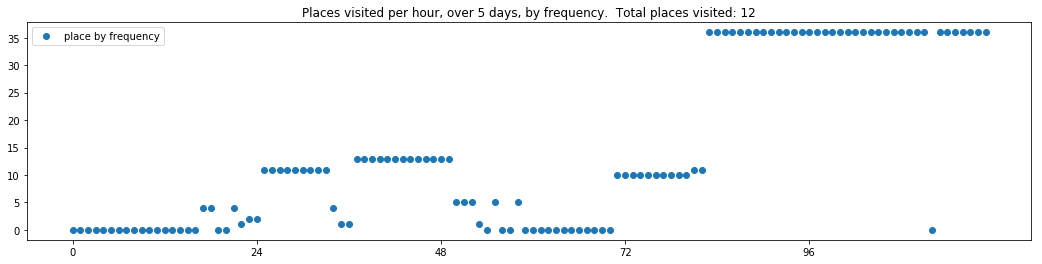

----- vector ----
prefix labels:  [215, 215]
[0, 0, 0, 0, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270]
[270, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 52, 0, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144]
[144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144]
[144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144, 144]


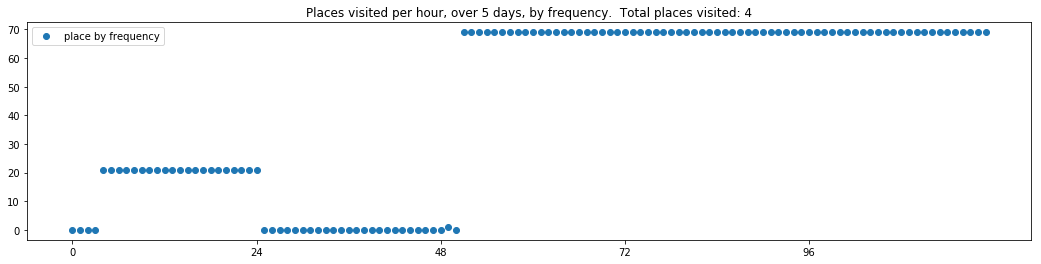

----- vector ----
prefix labels:  [130, 130]
[0, 0, 0, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130]
[130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 0, 130, 0, 0, 0, 130, 0, 0, 0, 0, 0, 130, 130]
[0, 0, 0, 0, 0, 0, 0, 130, 130, 130, 130, 130, 130, 130, 130, 130, 0, 130, 130, 130, 130, 130, 130, 0]
[130, 130, 130, 130, 0, 130, 130, 0, 0, 0, 130, 0, 130, 130, 0, 0, 0, 0, 130, 130, 130, 130, 130, 84]
[84, 84, 130, 130, 0, 0, 0, 0, 130, 130, 130, 130, 130, 130, 0, 130, 130, 130, 130, 0, 130, 130, 130, 130]


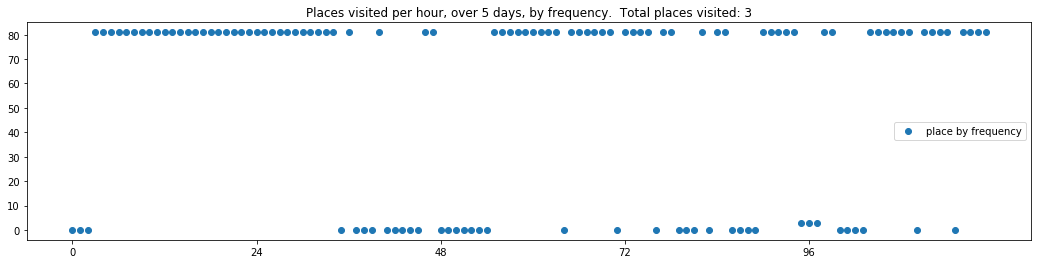

----- vector ----
prefix labels:  [87, 87]
[0, 0, 0, 0, 87, 87, 87, 0, 87, 0, 0, 0, 0, 0, 0, 0, 391, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 162, 162, 162, 162, 162, 0, 0]
[0, 0, 0, 0, 271, 0, 0, 0, 0, 0, 0, 0, 87, 87, 0, 0, 0, 0, 0, 271, 271, 271, 271, 271]
[271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 448, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271]
[271, 271, 271, 271, 271, 0, 271, 271, 271, 271, 271, 271, 271, 266, 0, 87, 87, 87, 87, 87, 87, 87, 0, 0]


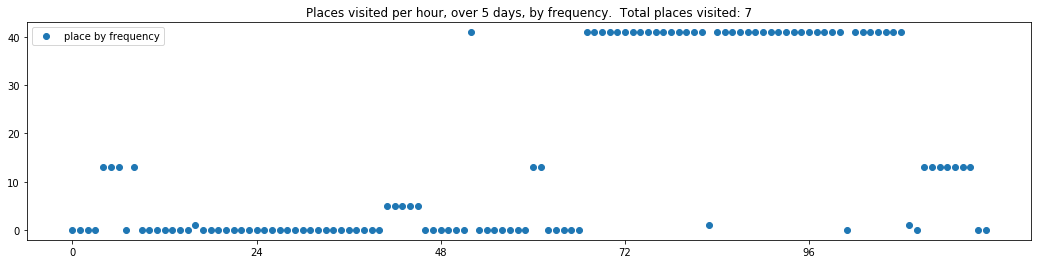

----- vector ----
prefix labels:  [293, 183]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 276, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 276, 0, 0, 0, 0]


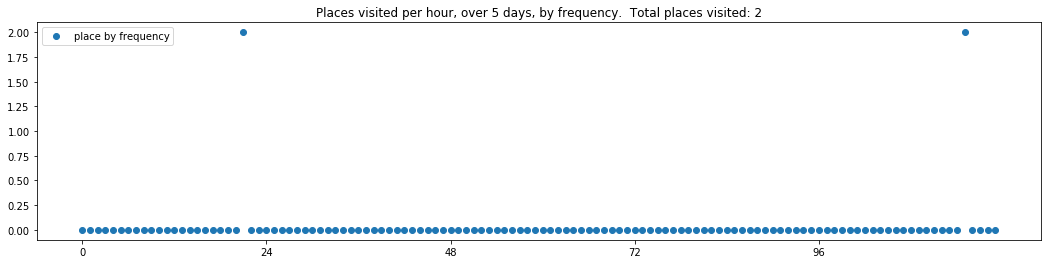

----- vector ----
prefix labels:  [430, 571]
[0, 0, 0, 0, 0, 0, 0, 0, 176, 176, 176, 176, 176, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 439, 0, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176]
[176, 176, 176, 176, 176, 176, 0, 0, 0, 0, 0, 0, 403, 41, 41, 41, 41, 176, 176, 354, 176, 176, 176, 176]
[176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 21, 486, 486, 486, 486, 486, 486, 486, 126, 126, 126, 126, 126]
[126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126]


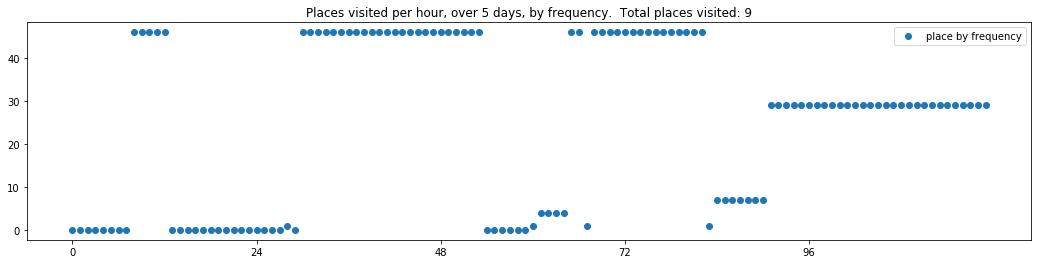

----- vector ----
prefix labels:  [372, 372]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 372, 0, 372, 372, 0, 0, 0, 0, 0, 0, 0, 0, 0, 257]
[0, 257, 257, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 71, 71, 71, 71, 71, 71, 71, 71, 70, 70, 372, 372]
[372, 372, 372, 372, 372, 372, 372, 372, 0, 0, 0, 0, 0, 0, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104]
[104, 104, 104, 104, 104, 104, 104, 150, 150, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104]


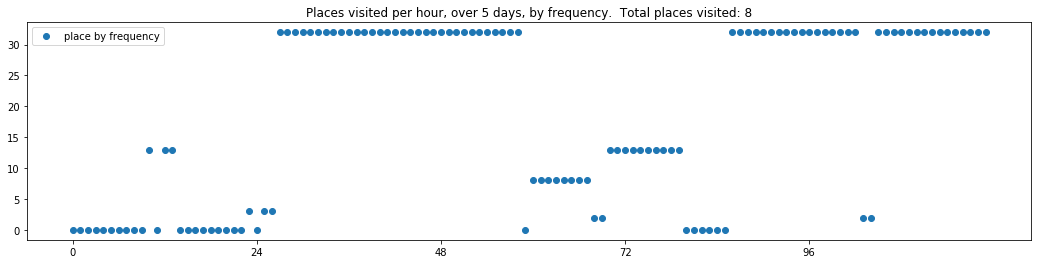

----- vector ----
prefix labels:  [78, 78]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[78, 78, 203, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 78, 78, 0, 0, 0, 0, 0, 0, 0]
[0, 538, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 78, 78, 0, 417, 92, 220, 0, 0, 0, 0, 0, 0, 0, 0, 0, 130, 0, 0, 0, 0, 0, 0, 0]


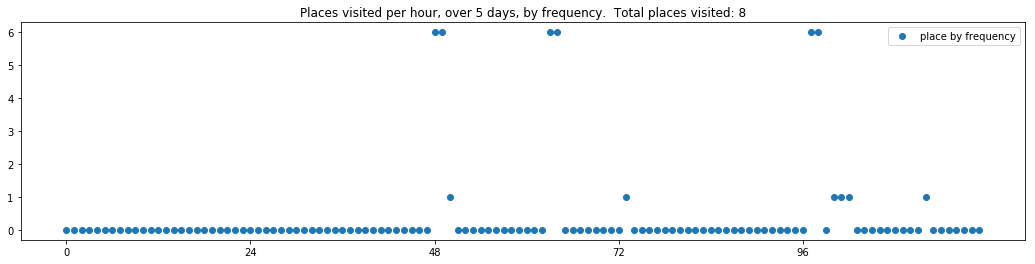

----- vector ----
prefix labels:  [117, 117]
[0, 0, 0, 0, 0, 117, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 268, 268, 268, 268]
[268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268]
[268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268]
[268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268]
[268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268, 268]


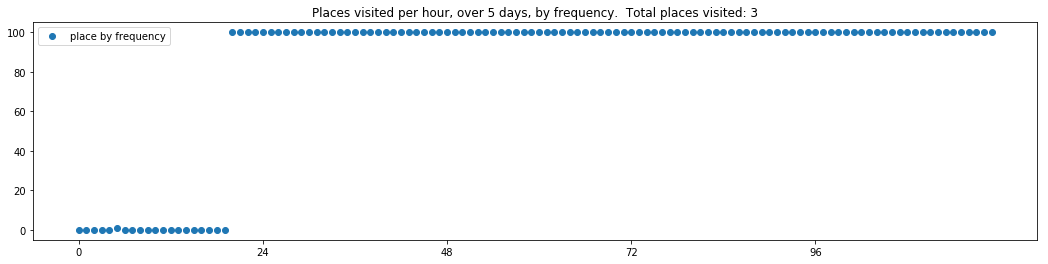


------
 90 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_90.txt 
------

----- vector ----
prefix labels:  [251, 251]
[0, 0, 0, 0, 251, 251, 251, 251, 251, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251]
[251, 251, 251, 251, 251, 251, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251]


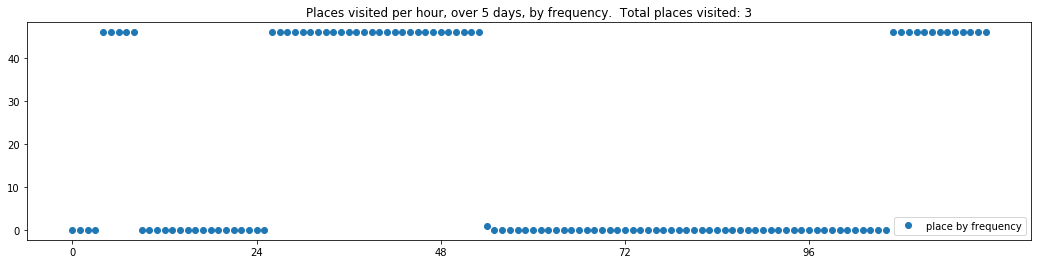

----- vector ----
prefix labels:  [29, 29]
[0, 0, 0, 0, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 277, 0, 0, 0, 29, 29, 29, 29]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]


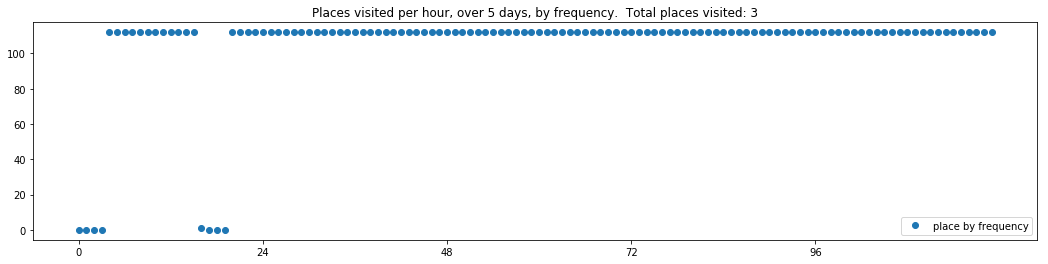

----- vector ----
prefix labels:  [529, 459]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 459, 0, 0, 0, 0]


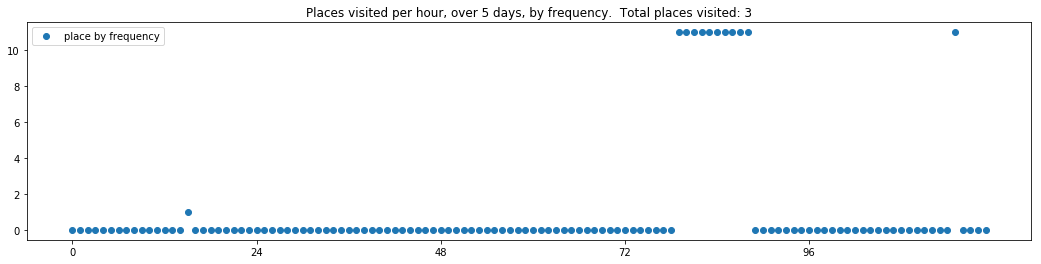

----- vector ----
prefix labels:  [395, 395]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84, 0, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395]
[395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 84, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395]
[395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395, 395]
[271, 271, 271, 371, 371, 371, 371, 371, 371, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 4, 4, 0, 379]
[0, 140, 338, 338, 338, 0, 151, 338, 338, 338, 338, 0, 186, 186, 186, 186, 186, 186, 186, 186, 140, 140, 186, 0]


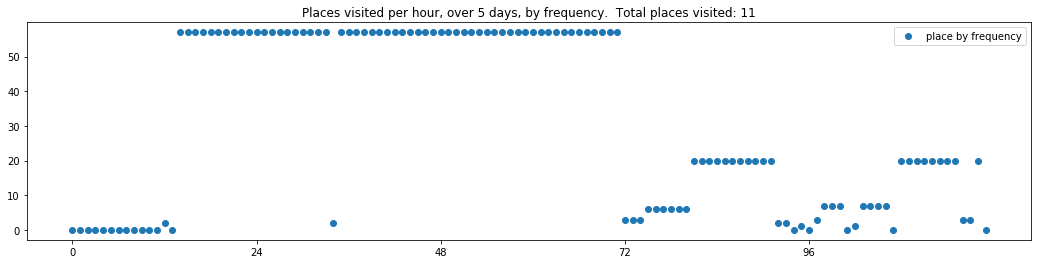

----- vector ----
prefix labels:  [26, 26]
[0, 0, 0, 0, 0, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]


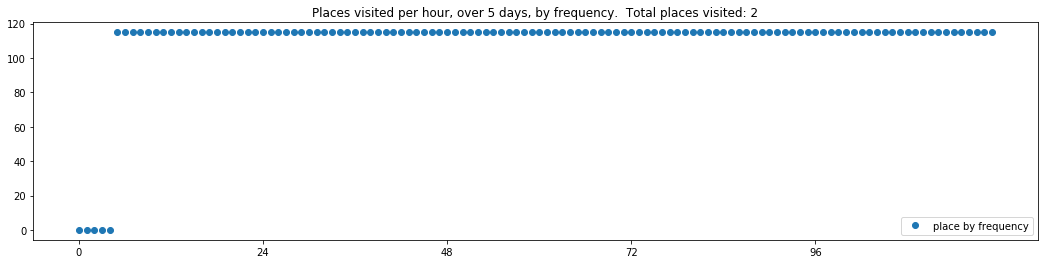

----- vector ----
prefix labels:  [246, 246]
[0, 0, 0, 0, 0, 0, 246, 246, 246, 246, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 246, 246, 246, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 246, 246, 246, 246, 246, 246, 246, 246]


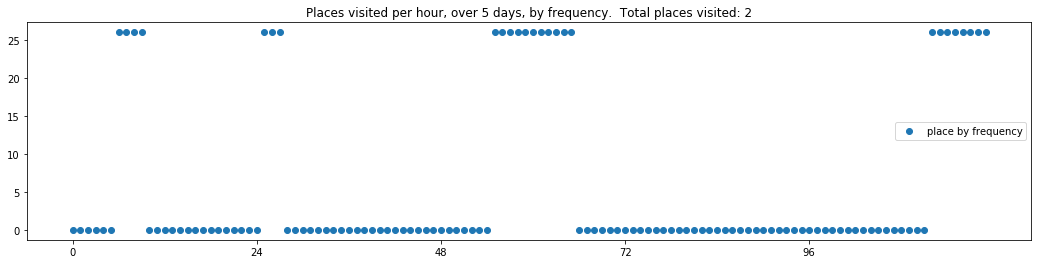

----- vector ----
prefix labels:  [246, 246]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 246, 246, 246, 246, 246, 246, 246, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 48, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 109, 0]


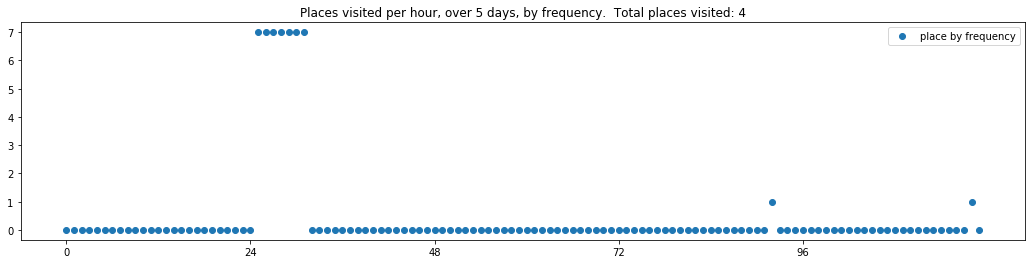

----- vector ----
prefix labels:  [311, 311]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311]
[311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311]
[311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311]
[311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311]
[311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311, 311]


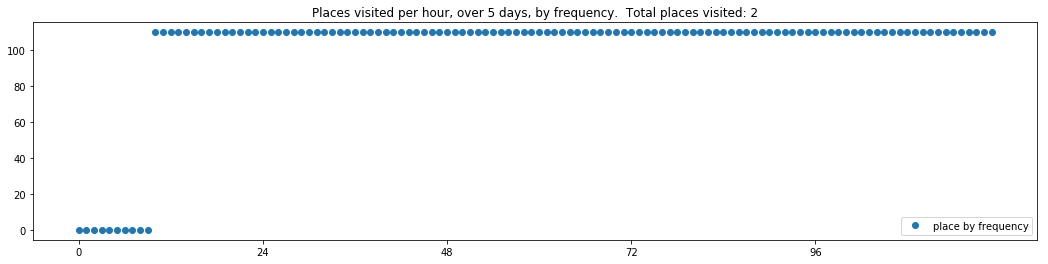

----- vector ----
prefix labels:  [130, 130]
[0, 0, 0, 0, 0, 0, 0, 0, 130, 130, 34, 34, 0, 0, 0, 0, 130, 130, 130, 130, 130, 130, 130, 130]
[130, 130, 130, 130, 0, 130, 130, 130, 130, 130, 130, 130, 0, 130, 34, 0, 0, 0, 0, 0, 0, 0, 130, 130]
[130, 0, 130, 130, 130, 130, 130, 130, 130, 0, 130, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]
[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]
[69, 69, 69, 69, 69, 69, 69, 69, 69, 0, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 130]


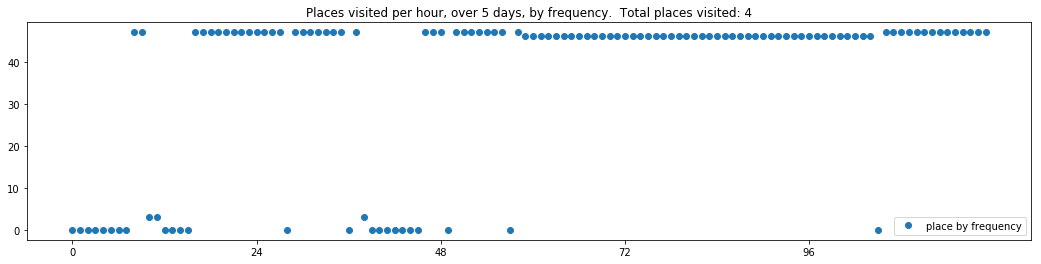

----- vector ----
prefix labels:  [153, 8]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 203, 116, 116, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[116, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 39, 0, 0, 0, 8, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 21, 364, 364, 364, 364, 253, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126]


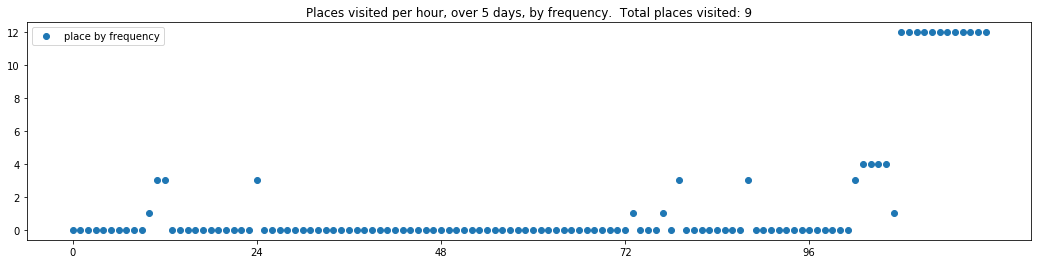


------
 95 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_95.txt 
------

----- vector ----
prefix labels:  [0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


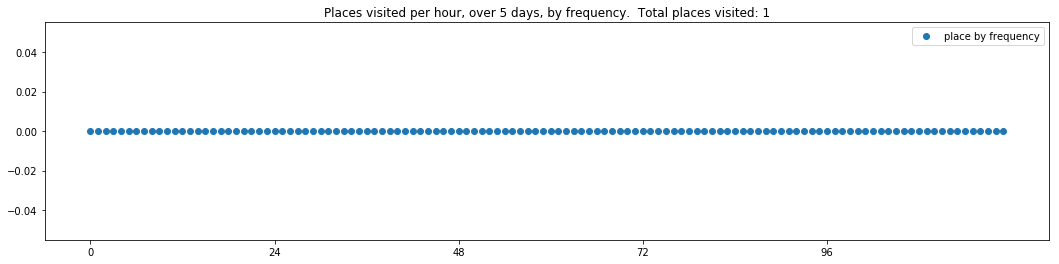

----- vector ----
prefix labels:  [352, 352]
[0, 0, 0, 0, 0, 70, 0, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352]
[352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352]
[352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352]
[352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352]
[352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352, 352]


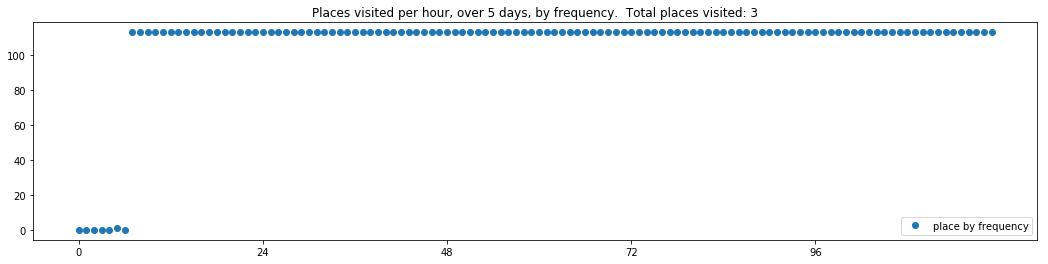

----- vector ----
prefix labels:  [392, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 392, 392, 392, 392, 392]
[392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392]
[392, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 570, 570, 374, 374, 374, 374, 374, 374, 374, 374, 374, 374, 374, 374, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 309, 0, 0, 0, 0, 0, 0, 0, 0, 165, 304, 165, 165, 0, 0, 0]


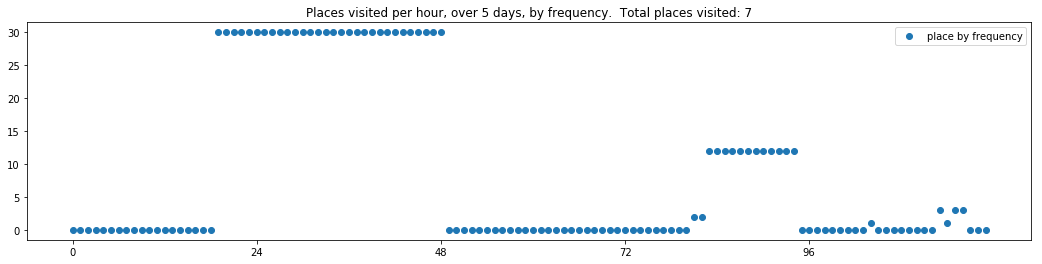

----- vector ----
prefix labels:  [392, 392]
[0, 0, 0, 0, 0, 0, 0, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392]
[392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392]
[392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392]
[392, 392, 392, 392, 392, 392, 392, 392, 0, 0, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392]
[392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 392, 0, 392, 392, 392, 392, 392, 392, 392, 392, 392]


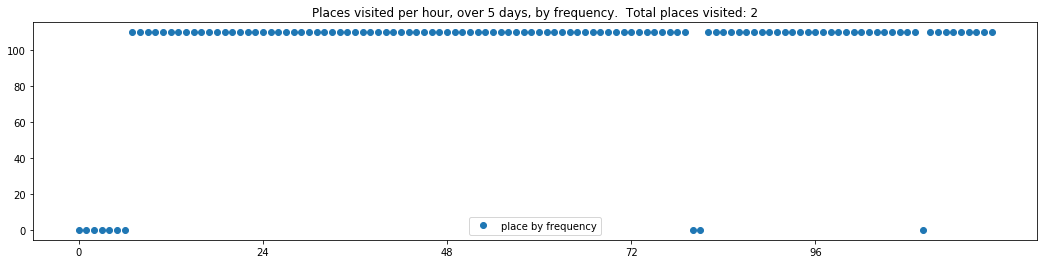

----- vector ----
prefix labels:  [339, 339]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339]
[339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339]
[339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339]
[339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339]
[339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339, 339]


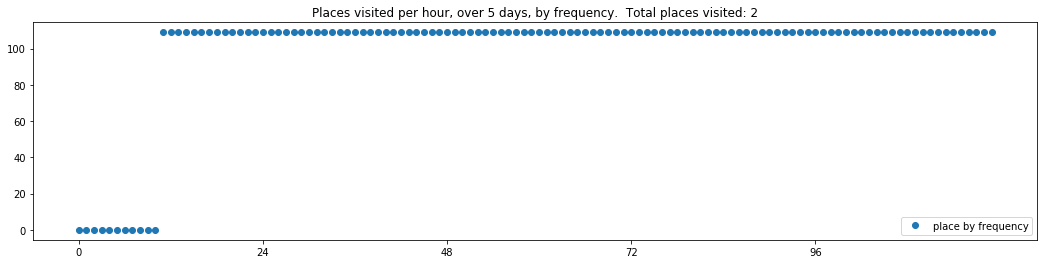

----- vector ----
prefix labels:  [109, 109]
[0, 0, 0, 0, 0, 109, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 109, 109, 109, 109]
[109, 109, 109, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 412, 412, 412, 412, 412]
[412, 412, 412, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 412, 412, 0, 0, 0, 0, 0, 0, 0, 412, 412, 247, 0, 0, 0, 109, 109, 109]


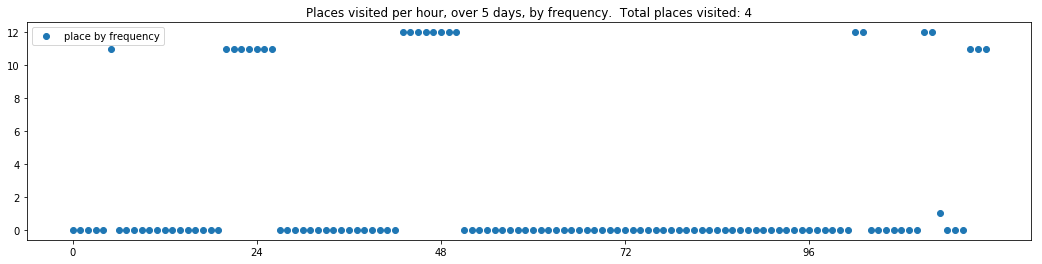

----- vector ----
prefix labels:  [216, 125]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 203, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216]
[216, 216, 216, 0, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216]
[216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216]
[216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216]


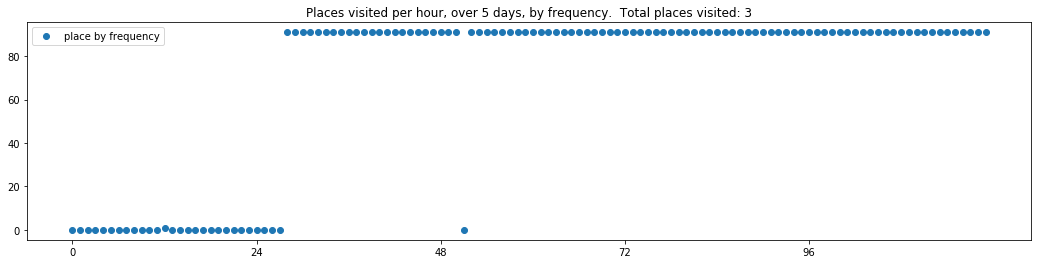

----- vector ----
prefix labels:  [486, 486]
[486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486]
[486, 0, 0, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486]
[486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486]
[486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486]
[486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486, 486]


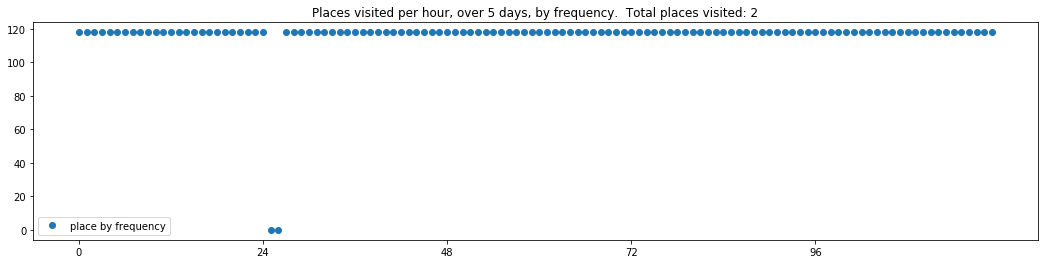

----- vector ----
prefix labels:  [104, 104]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 104, 104, 104, 104, 104]
[104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104]
[104, 0, 0, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104]
[104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104]
[104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104, 104]


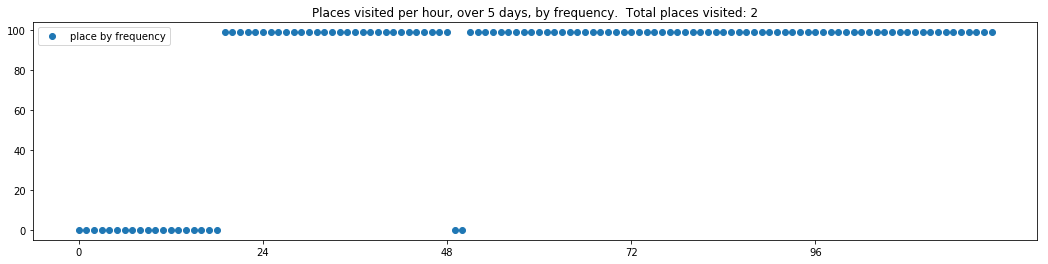

----- vector ----
prefix labels:  [22, 22]
[0, 0, 0, 0, 0, 0, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
[77, 77, 0, 22, 22, 22, 22, 22, 22, 22, 22, 0, 0, 0, 0, 77, 77, 77, 77, 77, 77, 77, 77, 77]
[77, 77, 77, 77, 77, 77, 77, 77, 270, 270, 270, 270, 270, 270, 270, 270, 270, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 65, 65, 65, 65, 65, 68, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


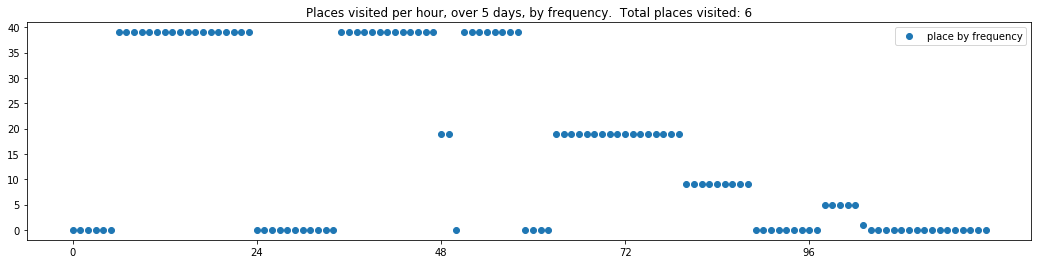


------
 110 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_110.txt 
------

----- vector ----
prefix labels:  [435, 353]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 142, 213, 213, 213, 213, 213]
[213, 0, 0, 0, 0, 0, 0, 0, 0, 435, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 478, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 339, 0, 0, 0, 0, 0, 0, 0]


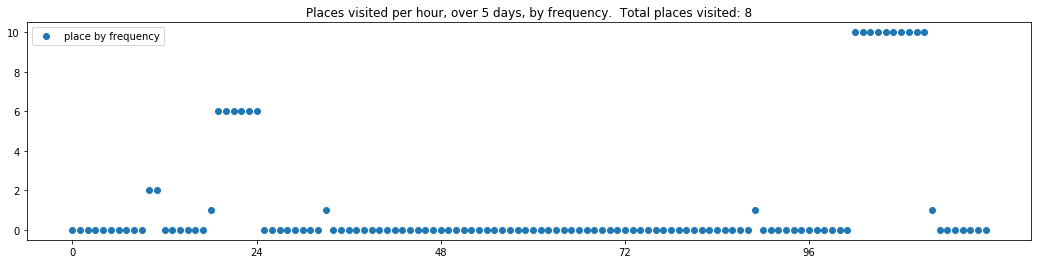

----- vector ----
prefix labels:  [26, 26]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 0, 413, 0]
[0, 0, 0, 0, 0, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 0, 0, 26, 26, 26, 26, 26]
[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
[26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]


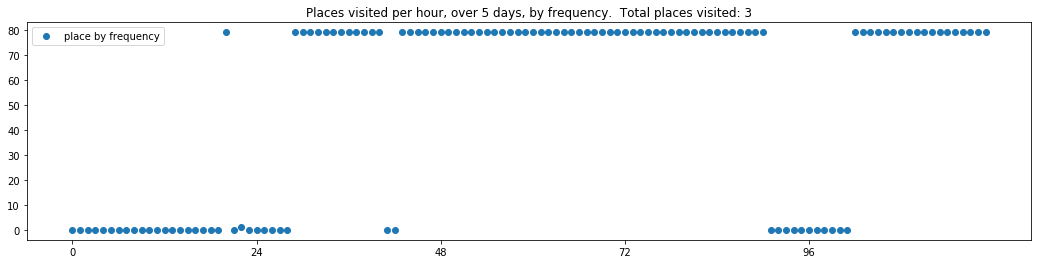

----- vector ----
prefix labels:  [146, 146]
[0, 0, 0, 0, 0, 0, 200, 0, 0, 0, 0, 0, 0, 0, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146]
[146, 146, 222, 146, 146, 146, 146, 146, 146, 146, 146, 146, 0, 0, 0, 222, 222, 146, 146, 559, 559, 0, 0, 0]
[374, 146, 146, 146, 146, 146, 146, 559, 559, 559, 559, 146, 146, 559, 559, 559, 0, 0, 0, 0, 0, 0, 559, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 559, 0, 0, 146, 146, 0, 146, 146, 146, 146]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 146, 0, 0, 0, 0, 0, 0, 146, 0, 0, 0, 0]


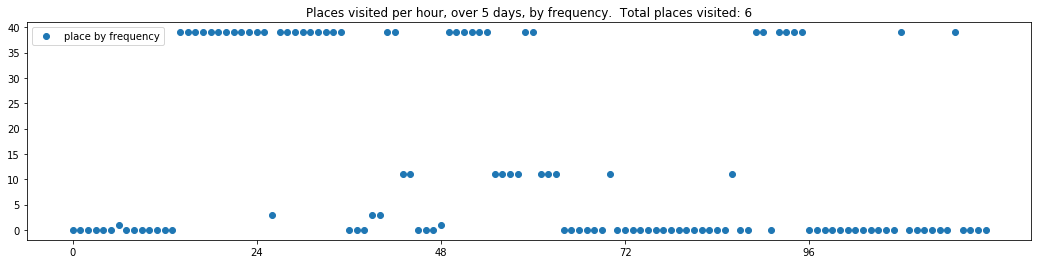

----- vector ----
prefix labels:  [16, 266]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 16, 101]
[0, 0, 0, 0, 0, 411, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 479, 479]
[479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479]
[479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479]
[479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479, 479]


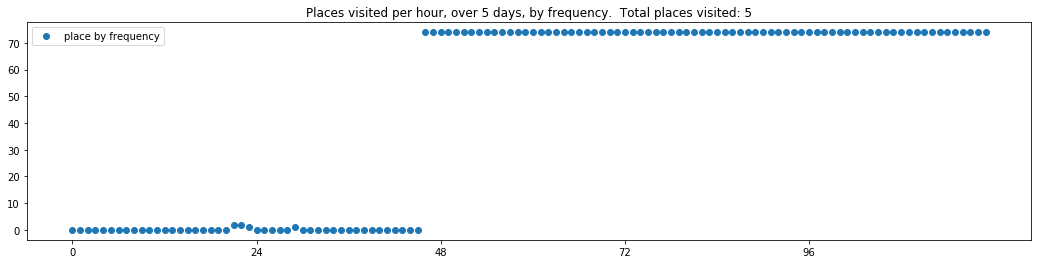

----- vector ----
prefix labels:  [162, 162]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 448, 448, 448, 448, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 245, 0, 0, 0, 0, 0, 0, 0, 162, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


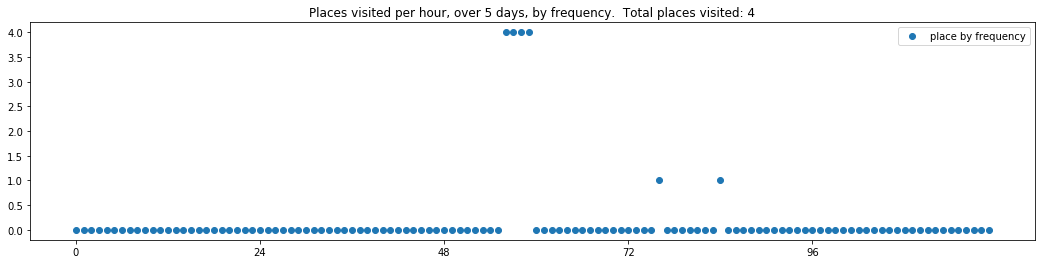

----- vector ----
prefix labels:  [391, 391]
[391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391]
[391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391]
[391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391]
[391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391]
[391, 391, 391, 391, 391, 391, 195, 195, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391, 391]


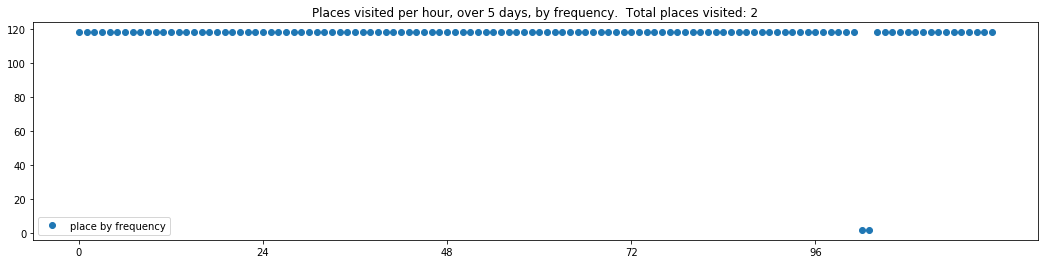

----- vector ----
prefix labels:  [4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4]
[4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


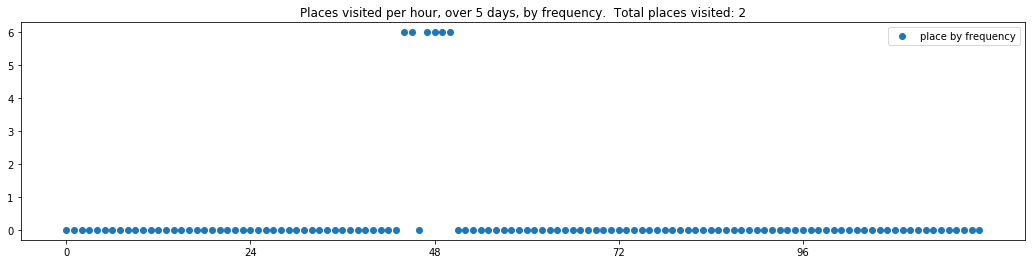

----- vector ----
prefix labels:  [5, 5]
[0, 0, 0, 0, 0, 209, 209, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


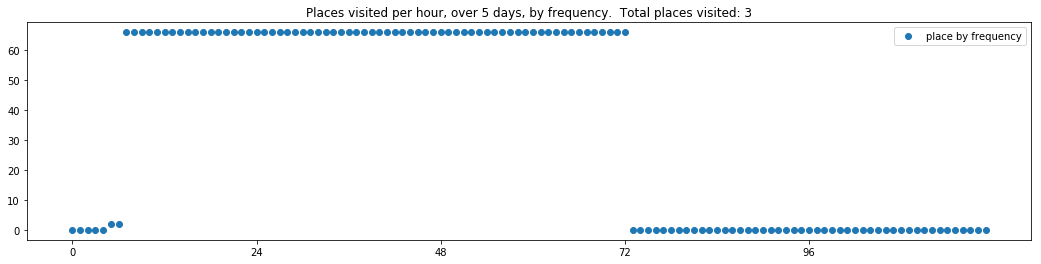

----- vector ----
prefix labels:  [223, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 68, 0, 0, 0, 216, 216, 216, 216]
[216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216, 216]


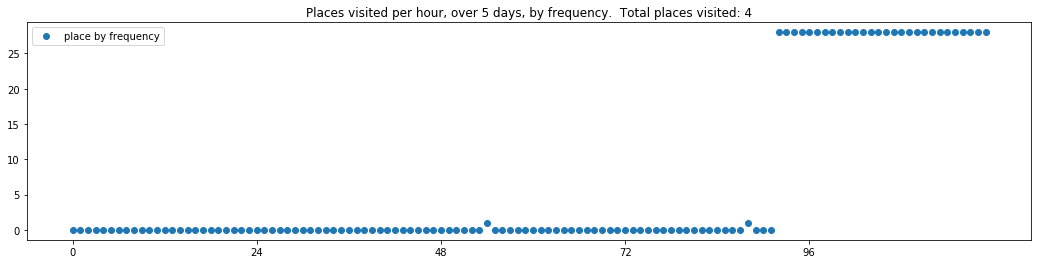

----- vector ----
prefix labels:  [401, 401]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401]
[401, 401, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 0, 0, 0, 0]


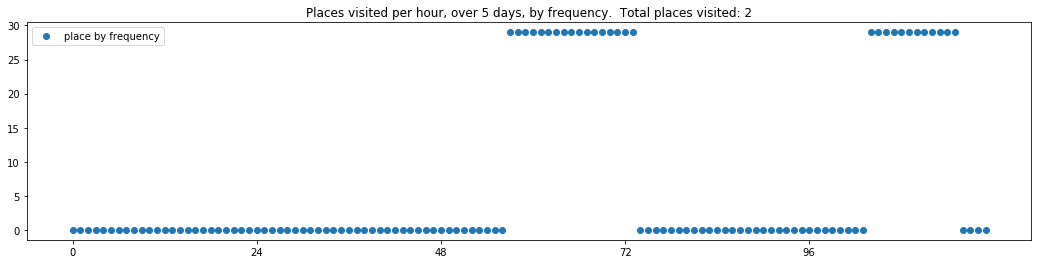


------
 115 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_115.txt 
------

----- vector ----
prefix labels:  [0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


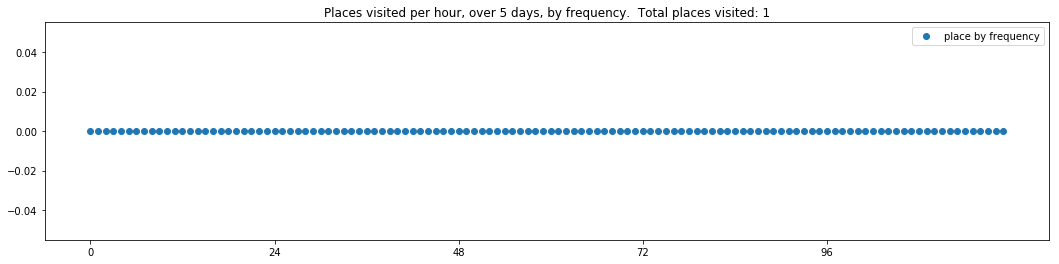

----- vector ----
prefix labels:  [437, 437]
[0, 0, 0, 0, 0, 437, 0, 0, 0, 0, 0, 437, 437, 437, 437, 0, 0, 0, 0, 437, 437, 437, 437, 437]
[437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 0, 0, 0, 0, 437, 437, 437, 437, 437, 437]
[437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 437, 0, 437, 437, 437, 437, 437, 437]
[437, 437, 437, 437, 437, 437, 437, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 437, 437, 437, 437, 437, 437]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 437, 437, 437, 437, 437]


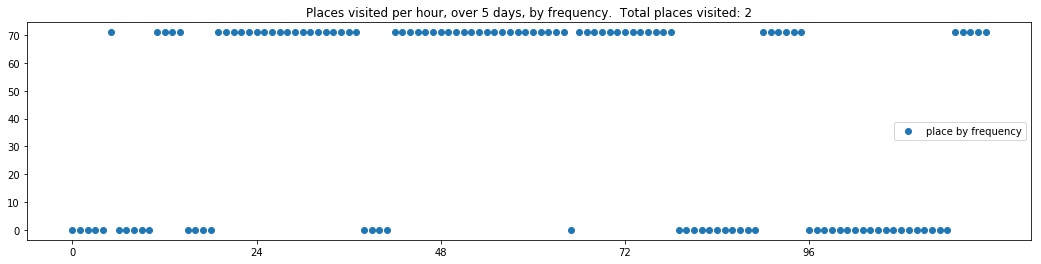

----- vector ----
prefix labels:  [3, 507]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 341, 341, 341, 341, 341, 341, 341, 341, 0, 341, 341, 341, 0, 0, 0, 0, 453]
[453, 0, 0, 0, 0, 0, 0, 0, 453, 453, 453, 453, 453, 341, 341, 341, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 341, 0, 0, 0, 0, 0, 0, 0, 341, 341, 0, 0, 0, 0, 0]
[586, 586, 586, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87, 87, 87, 87, 87, 87, 87, 87, 0, 0, 0]


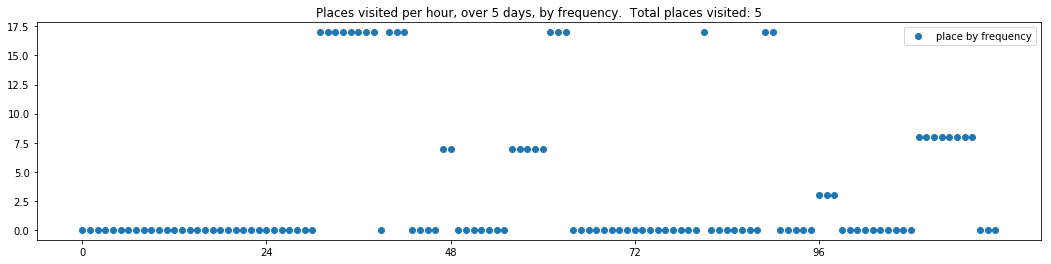

----- vector ----
prefix labels:  [111, 21]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


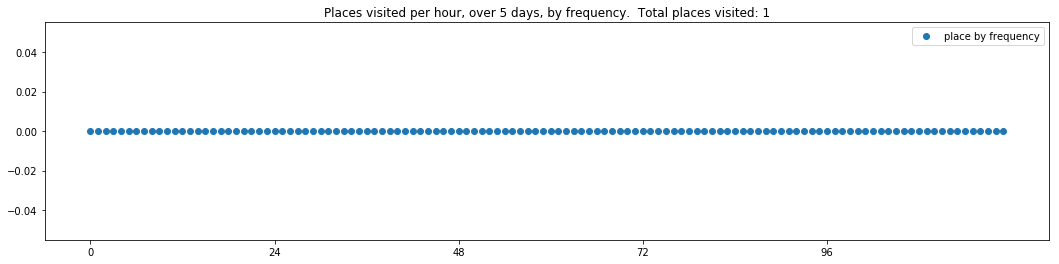

----- vector ----
prefix labels:  [477, 477]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 629, 629, 629, 629, 629, 629]
[629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 629, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629, 629]


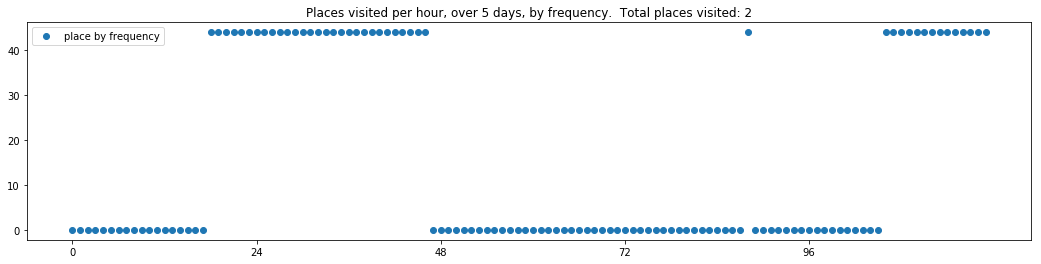

----- vector ----
prefix labels:  [187, 76]
[0, 0, 0, 0, 0, 0, 0, 76, 76, 76, 76, 76, 76, 76, 21, 0, 187, 187, 187, 187, 187, 187, 187, 187]
[187, 187, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 187, 187, 187, 187, 76, 76, 76, 76, 76, 76, 76, 76]
[76, 0, 0, 0, 187, 0, 0, 0, 0, 0, 0, 0, 0, 187, 187, 187, 76, 76, 76, 76, 76, 76, 76, 76]
[76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 640, 640]
[640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640, 640]


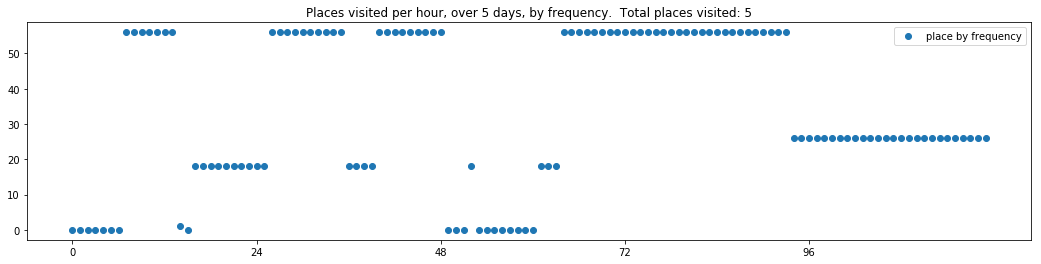

----- vector ----
prefix labels:  [179, 179]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 179, 179, 179, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


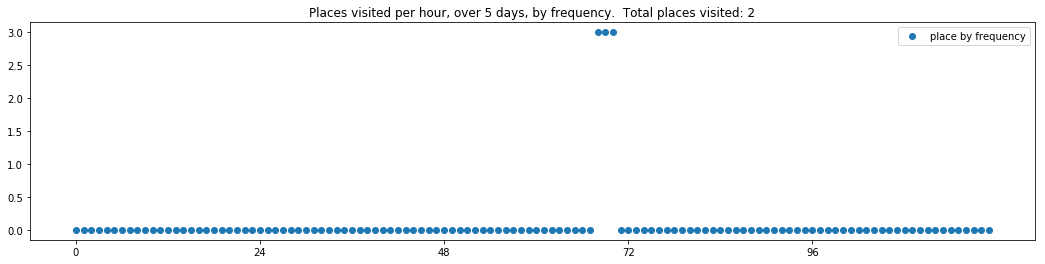

----- vector ----
prefix labels:  [84, 84]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 291, 225, 225, 225, 0, 84, 84]
[0, 0, 0, 0, 0, 0, 0, 0, 416, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 384, 384, 384, 384, 384]
[384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 0, 119, 119]
[119, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 202, 20, 0, 0, 0]


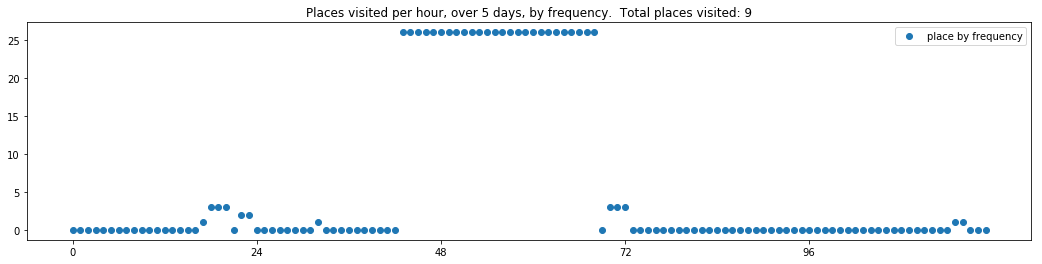

----- vector ----
prefix labels:  [435, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 147, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 204, 204, 204, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 478, 550, 401]


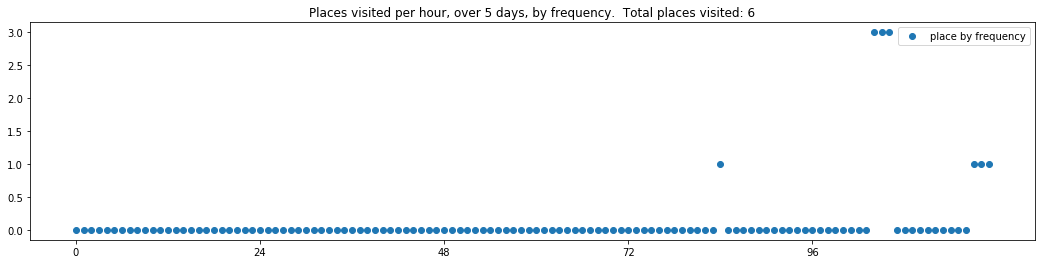

----- vector ----
prefix labels:  [267, 267]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 267, 267, 267, 267, 267, 267, 267]
[267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 267, 267, 267, 267, 267]
[267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267, 267]


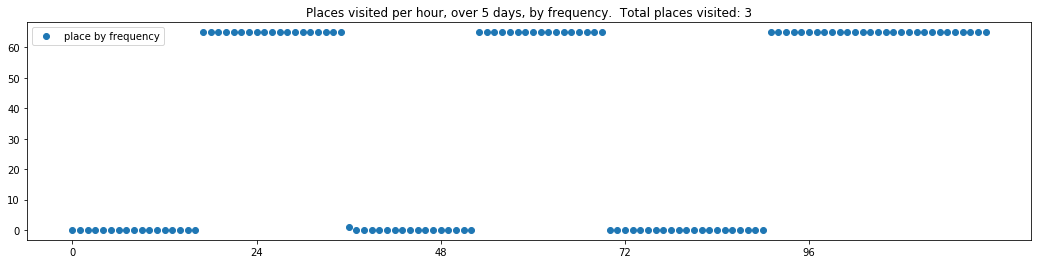


------
 120 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_120.txt 
------

----- vector ----
prefix labels:  [21, 21]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 560, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


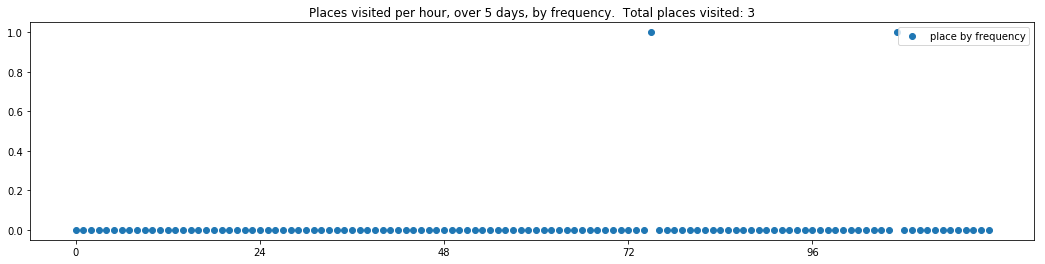

----- vector ----
prefix labels:  [226, 226]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226]
[226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 226, 226, 226, 0, 0, 0, 0, 0, 0, 226]
[226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 181, 226, 0, 0, 0, 0, 226]
[226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226, 226]


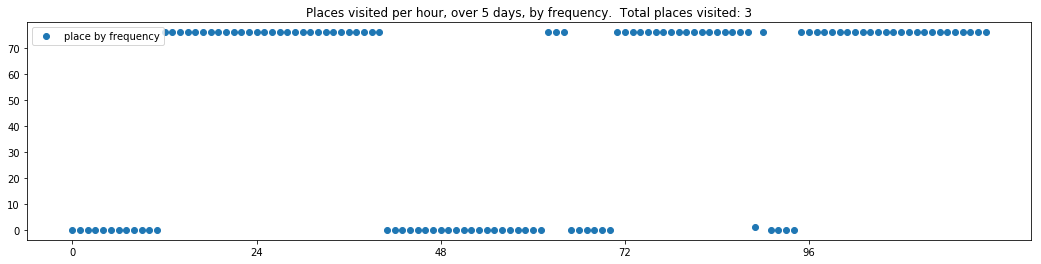

----- vector ----
prefix labels:  [222, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


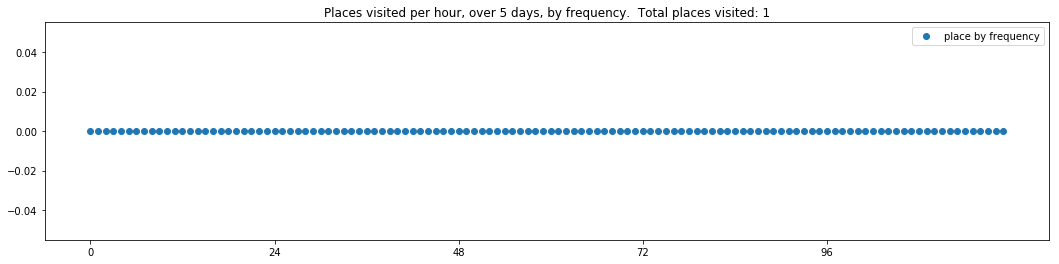

----- vector ----
prefix labels:  [635, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 95]
[95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95]
[95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 0, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]


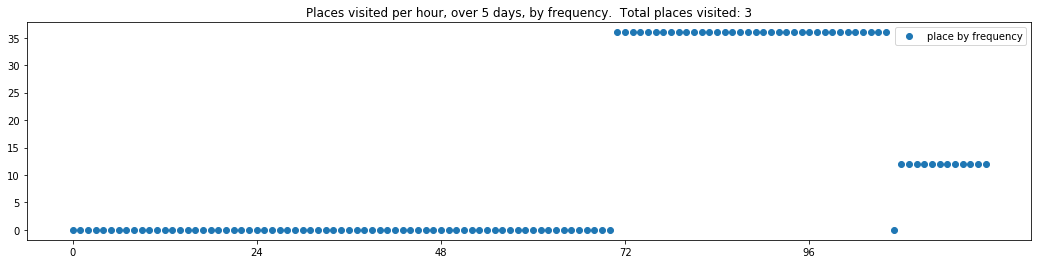

----- vector ----
prefix labels:  [40, 40]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
[40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
[40, 40, 40, 40, 40, 40, 0, 0, 0, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40]
[40, 40, 40, 40, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 40, 40, 40, 40, 40, 40]


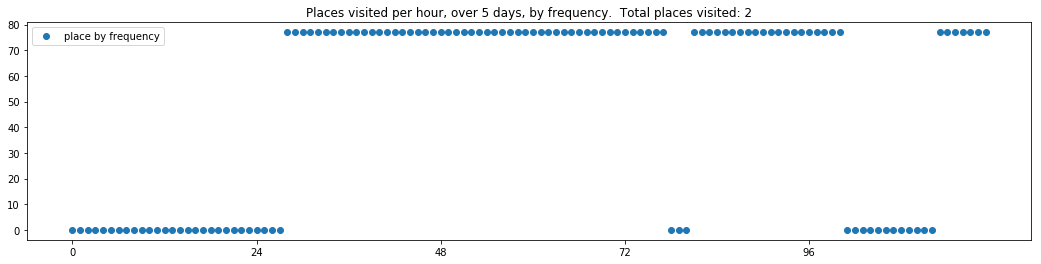

----- vector ----
prefix labels:  [47, 44]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 44, 44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 44, 44, 0, 0, 0, 0, 0, 0, 44, 0, 0, 0, 44, 0, 0, 0, 0, 0, 0]


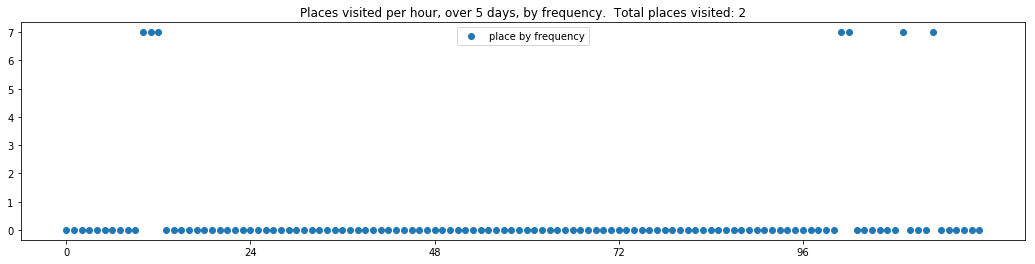

----- vector ----
prefix labels:  [133, 133]
[0, 0, 0, 0, 0, 0, 0, 133, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 94, 94, 94]
[94, 94, 94, 0, 0, 0, 0, 97, 97, 603, 603, 603, 603, 603, 603, 603, 146, 76, 76, 76, 519, 519, 519, 519]
[519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 0]


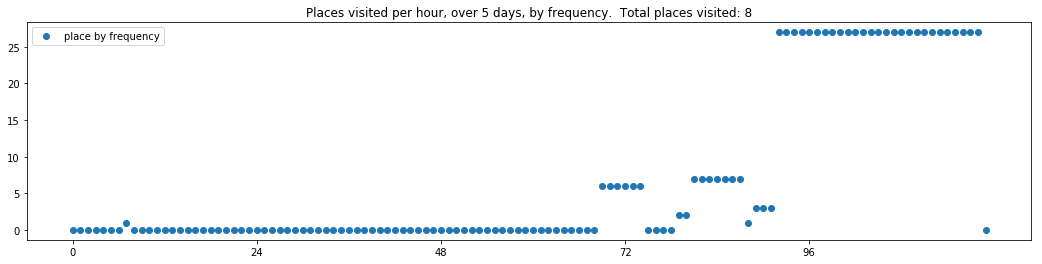

----- vector ----
prefix labels:  [0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


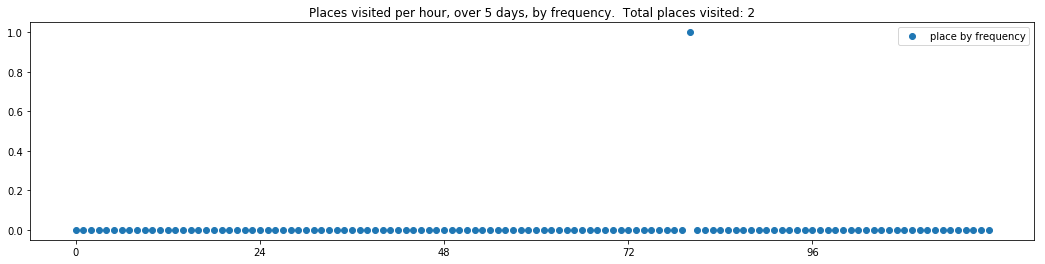

----- vector ----
prefix labels:  [26, 97]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 392, 392, 392, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 181, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 181, 192, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


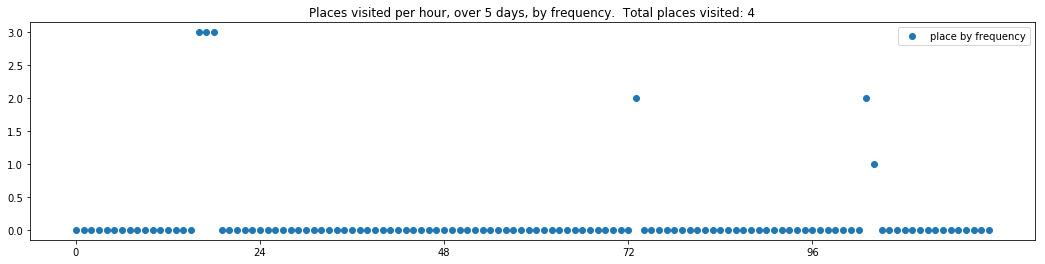

----- vector ----
prefix labels:  [199, 199]
[0, 0, 0, 0, 0, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199]
[199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 0, 199]
[199, 199, 199, 199, 199, 0, 0, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199]
[199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199]
[199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199]


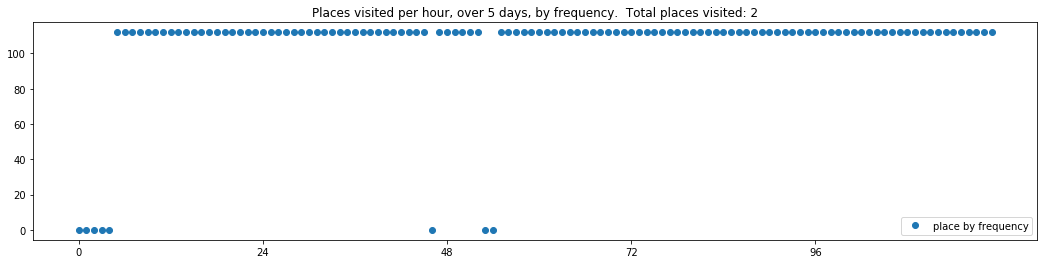


------
 125 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_125.txt 
------

----- vector ----
prefix labels:  [469, 71]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275]
[275, 275, 275, 275, 112, 0, 187, 0, 0, 0, 187, 469, 469, 469, 469, 469, 203, 469, 469, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 214, 0, 0, 0, 0, 0, 0, 469, 469, 469, 469, 0, 469, 469, 469, 469, 469]
[469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 213, 213, 213]
[213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 213, 550]


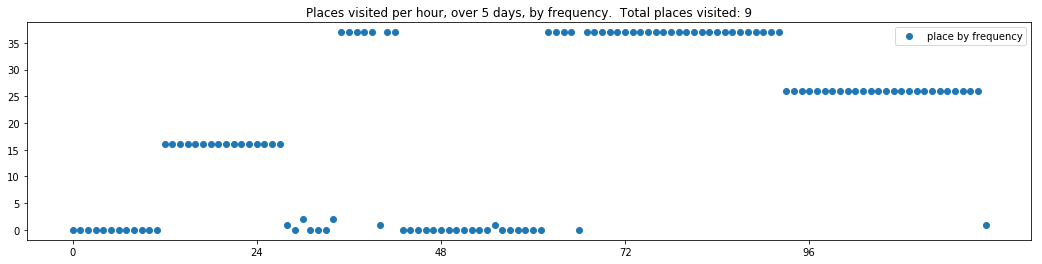

----- vector ----
prefix labels:  [2, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 151, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


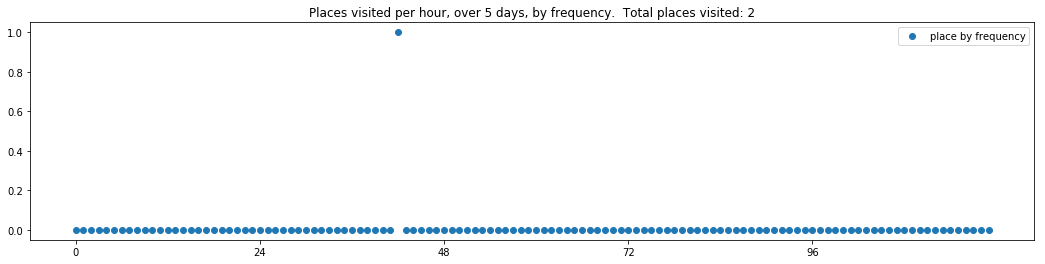

----- vector ----
prefix labels:  [248, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


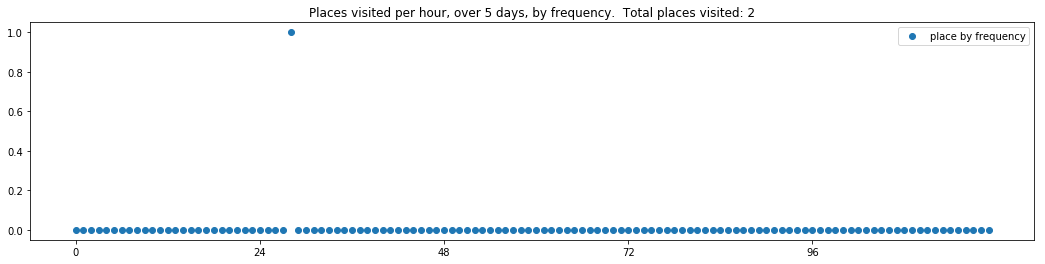

----- vector ----
prefix labels:  [289, 4]
[0, 0, 0, 0, 88, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 88, 289, 289, 289]
[289, 289, 289, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 289, 289, 289, 289, 289, 289, 289]


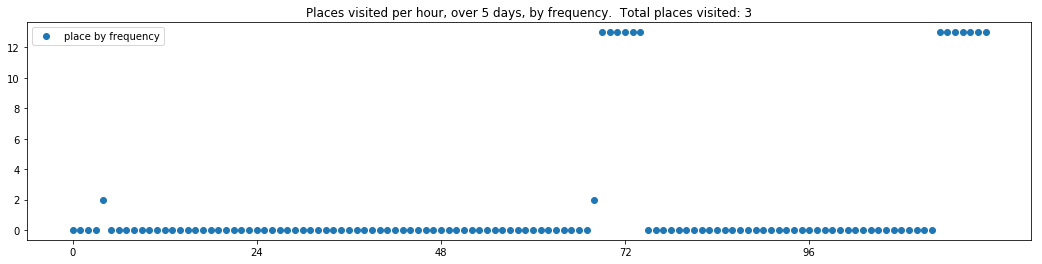

----- vector ----
prefix labels:  [115, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


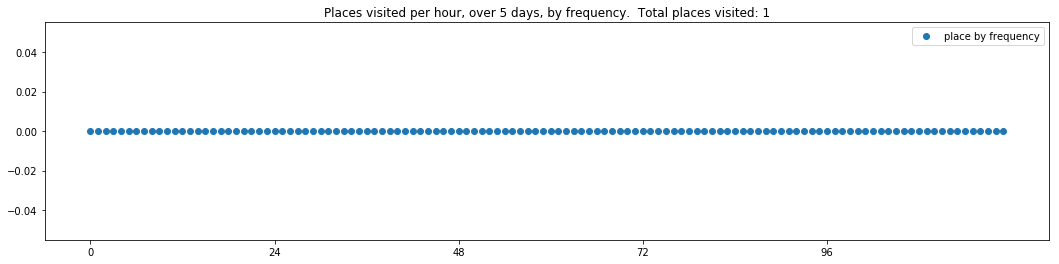

----- vector ----
prefix labels:  [586, 586]
[0, 0, 0, 0, 0, 0, 0, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586]
[586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586]
[586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586]
[586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586]
[586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 0, 586, 586, 586, 586, 586, 586]


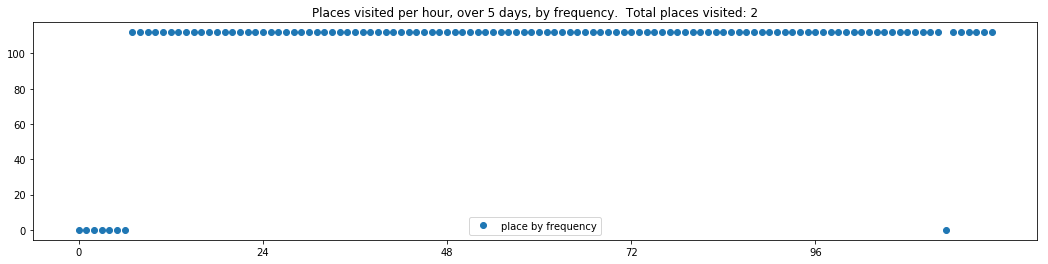

----- vector ----
prefix labels:  [263, 263]
[263, 263, 263, 263, 263, 263, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263]
[263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263]
[263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263]
[263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263, 263]


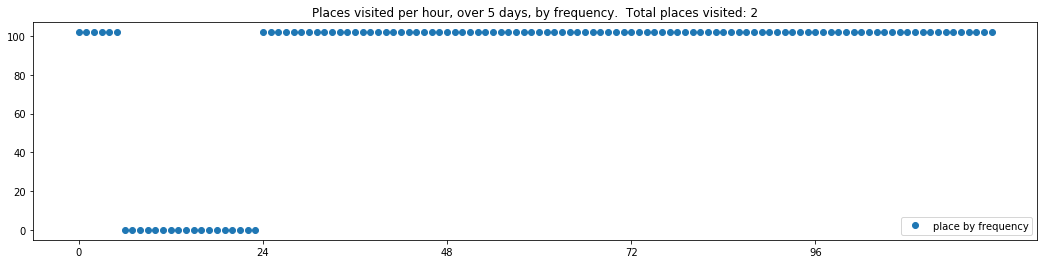

----- vector ----
prefix labels:  [90, 189]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 197, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 90]


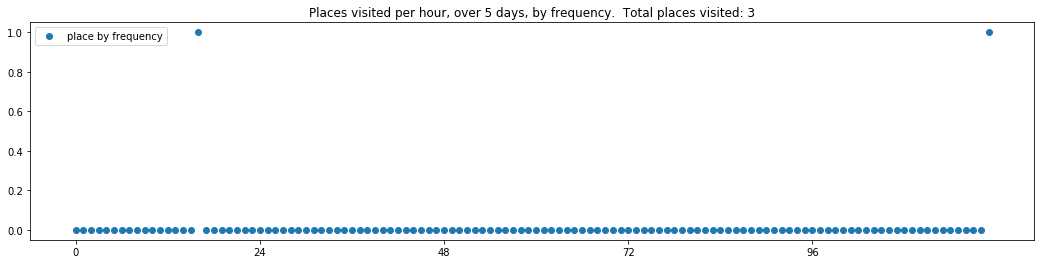

----- vector ----
prefix labels:  [293, 293]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


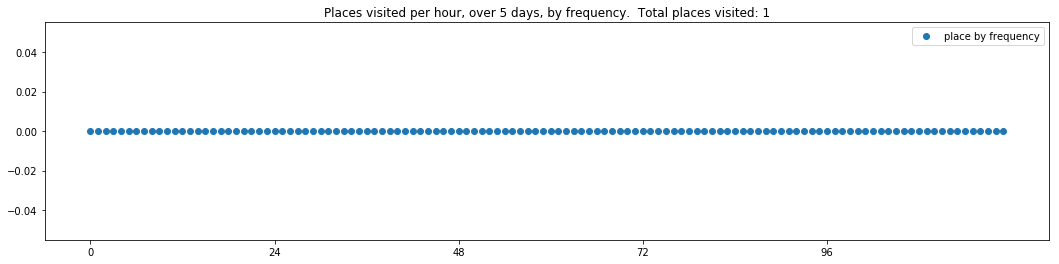

----- vector ----
prefix labels:  [143, 271]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271]
[271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 0, 0, 0, 271, 271, 271, 271, 271, 271, 271, 271, 271]
[271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 0, 271, 271, 271, 271, 271, 271, 33]
[271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 271, 271, 271, 271, 0, 0, 454, 0, 0]


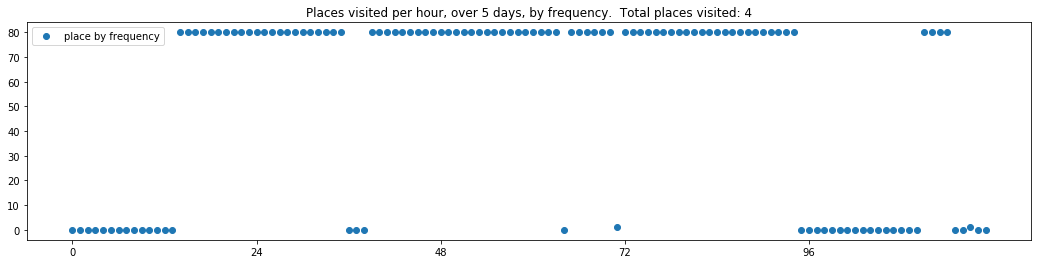


------
 130 /Users/aberke/projects/gan-hacking/SeqGAN/save/eval_file_130.txt 
------

----- vector ----
prefix labels:  [368, 56]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 375, 0]
[0, 0, 0, 0, 0, 100, 199, 199, 199, 503, 503, 503, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56]
[56, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199]
[199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 199, 21, 0, 0, 0, 0, 0, 0, 0, 0]


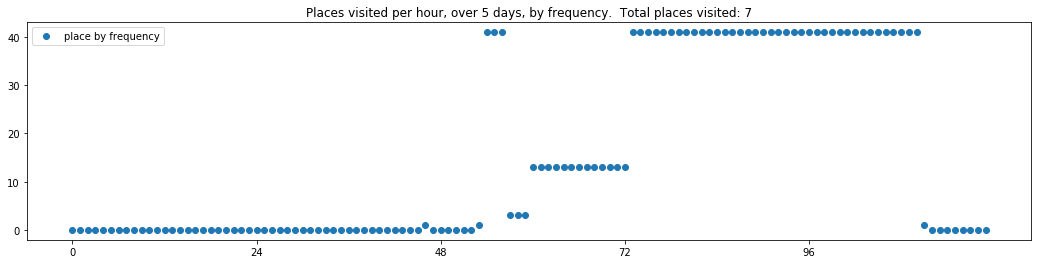

----- vector ----
prefix labels:  [542, 542]
[0, 0, 0, 0, 0, 0, 0, 542, 542, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271]
[271, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 542]


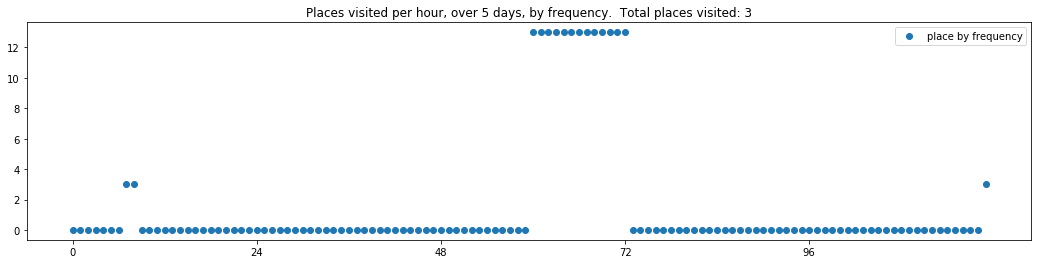

----- vector ----
prefix labels:  [586, 586]
[0, 0, 0, 0, 0, 0, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586]
[586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586]
[586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586]
[586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586]
[586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586]


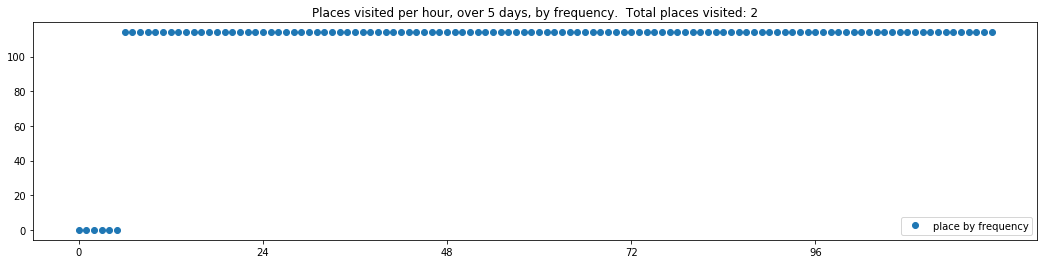

----- vector ----
prefix labels:  [595, 353]
[0, 0, 0, 0, 289, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


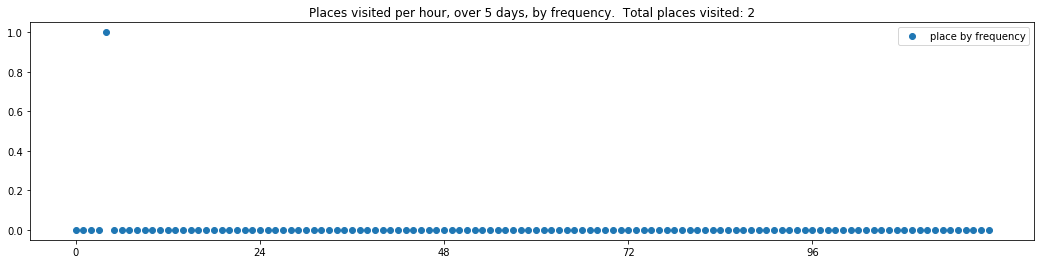

----- vector ----
prefix labels:  [99, 99]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 99, 99, 99, 99, 99, 99, 99, 99, 99]
[99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]
[99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]
[99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99]
[99, 99, 99, 99, 99, 99, 99, 99, 99, 551, 551, 551, 551, 551, 551, 0, 0, 0, 0, 438, 0, 0, 0, 0]


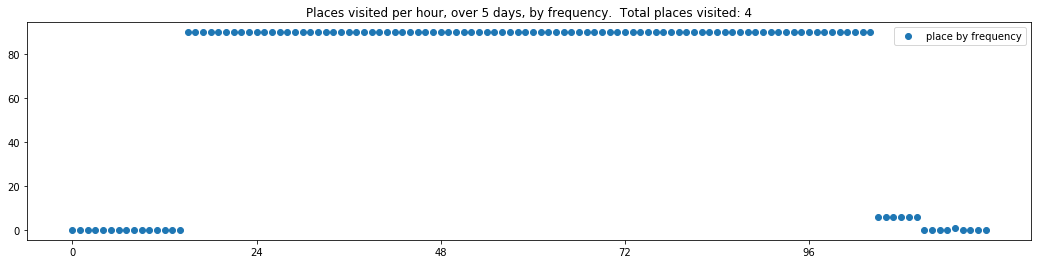

----- vector ----
prefix labels:  [21, 21]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 271, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 21, 76, 76, 76, 0, 0]


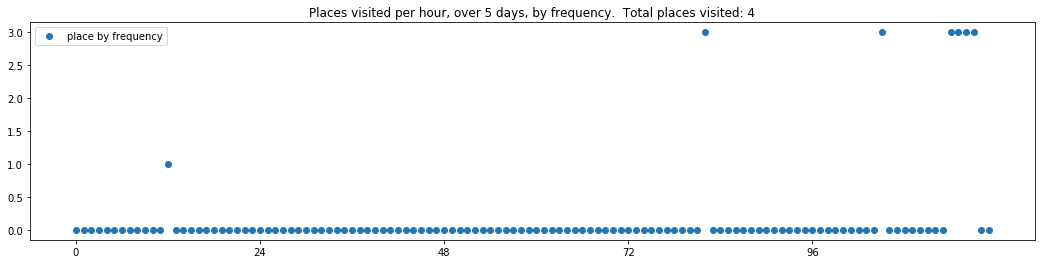

----- vector ----
prefix labels:  [29, 29]
[0, 0, 0, 0, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]
[29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29]


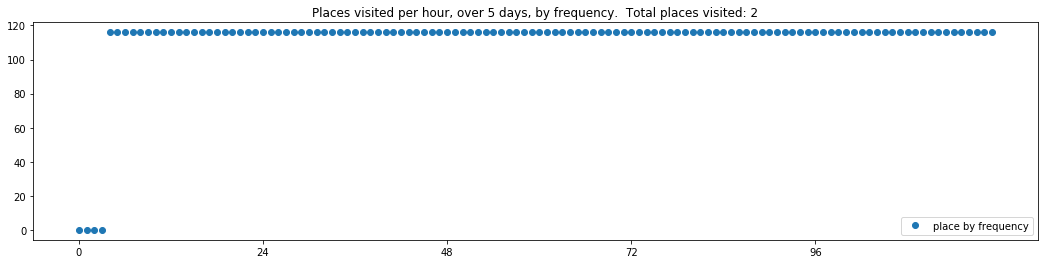

----- vector ----
prefix labels:  [271, 271]
[0, 0, 0, 0, 0, 0, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 0]
[0, 0, 271, 271, 271, 271, 271, 271, 271, 271, 271, 0, 0, 0, 0, 0, 271, 271, 271, 271, 271, 271, 271, 271]
[271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 0, 0, 271, 271, 271, 271, 271, 271, 271, 271, 271]
[271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271]
[271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 271, 0, 0, 0, 271, 271, 271, 271, 271, 271, 271, 271]


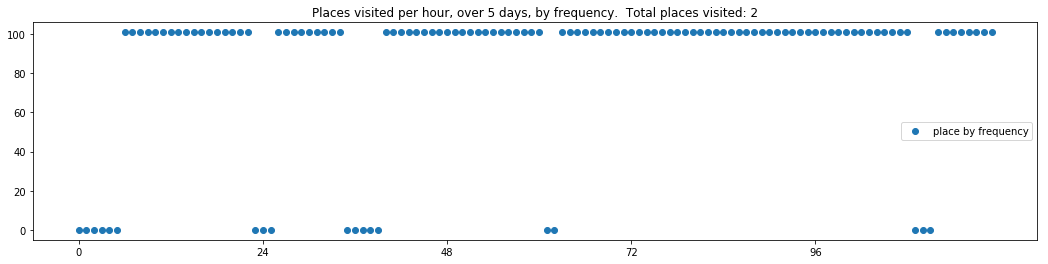

----- vector ----
prefix labels:  [247, 247]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 247, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 48, 247, 247, 247, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 247, 0, 0, 0, 0, 0, 0, 0, 0, 0, 247, 247]
[0, 0, 0, 0, 0, 0, 0, 0, 247, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


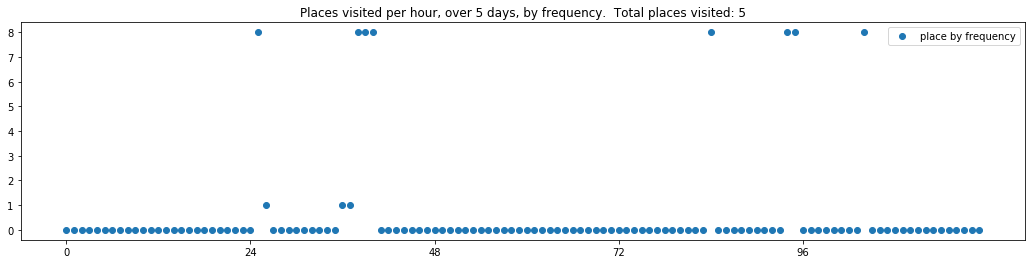

----- vector ----
prefix labels:  [281, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 214, 0, 140, 434, 434, 434, 434, 434, 0, 0, 140, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


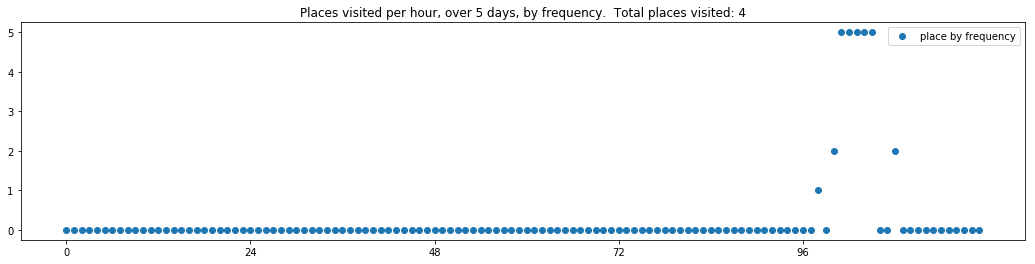

In [88]:
# Inspect the trajectories in these eval files

sample_size = 10

seqgan_generated = []

for eval_num in sorted(eval_filenames.keys()):
    filename = eval_filenames[eval_num]
    print('\n------\n',eval_num, filename, '\n------\n')
    seqgan_generated = read_trajectories_from_file(filename)
    for tv in seqgan_generated[:sample_size]:
        print_dwell_vector_by_days(tv)
        plot_trajectory_vector_frequencies(tv, by_frequency_order=False) 
        

Load and inspect trajectories generated by the textgenrnn model

In [8]:
sample_size = 20

showing sample of trajectories from output with temp 0.8
----- vector ----
prefix labels:  [392, 303]
[0, 0, 0, 0, 0, 0, 0, 0, 391, 0, 0, 0, 0, 0, 303, 303, 303, 303, 303, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 360, 0, 0, 0, 0, 0, 0, 0, 303, 303, 303, 303, 303, 303, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 303, 303, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


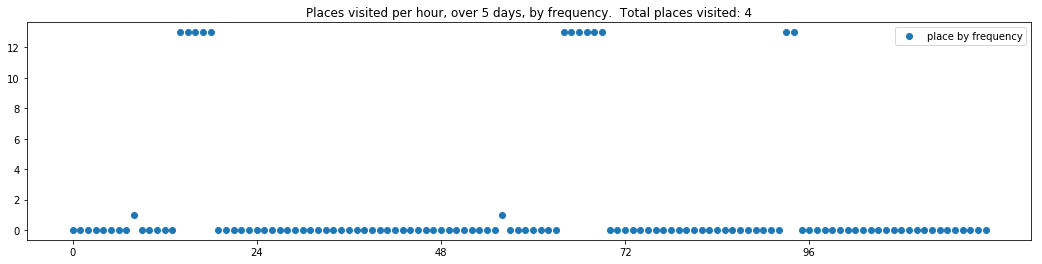

----- vector ----
prefix labels:  [375, 375]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375]
[375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375]
[375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375]
[375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375]
[375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375]


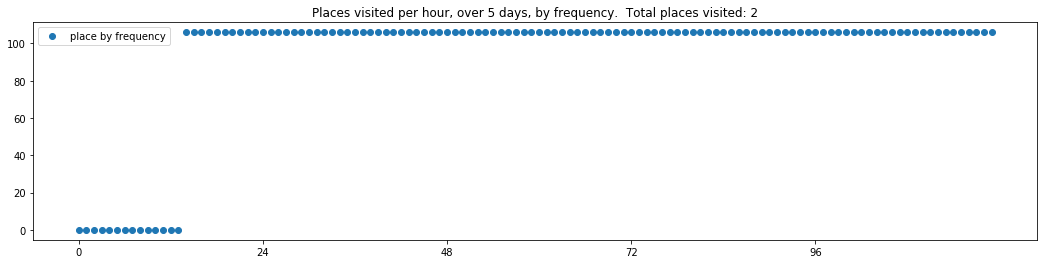

----- vector ----
prefix labels:  [69, 69]
[0, 0, 0, 0, 0, 0, 0, 0, 198, 198, 198, 198, 69, 0, 198, 198, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 69, 69, 69, 69, 69, 69, 69, 69, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 69, 69, 69, 69, 69, 69, 69, 69, 0, 0, 0, 0, 0, 0, 0, 0, 0]


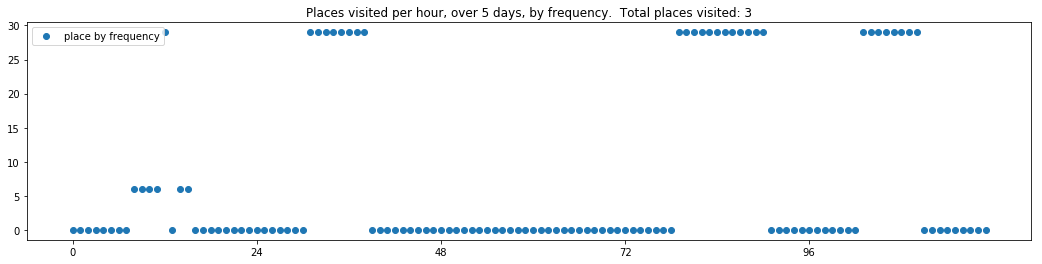

----- vector ----
prefix labels:  [191, 191]
[0, 0, 0, 0, 0, 0, 0, 191, 191, 191, 191, 191, 191, 191, 191, 191, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 191, 191, 191, 191, 191, 191, 191, 191, 191, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 191, 191, 191, 191, 191, 191, 191, 191, 191, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 191, 191, 191, 191, 191, 191, 191, 191, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191, 191]


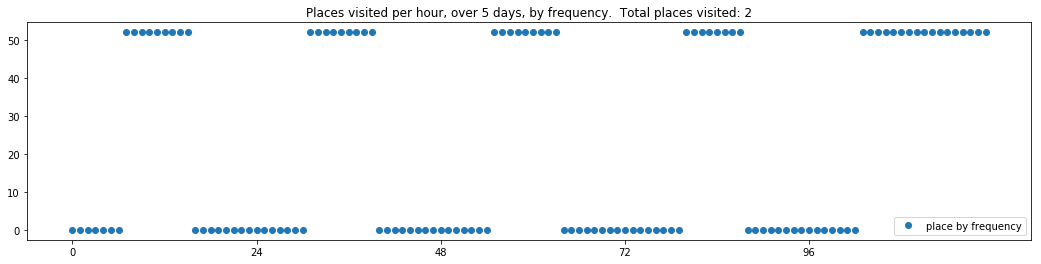

----- vector ----
prefix labels:  [181, 181]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 181, 181, 181, 181, 0, 0, 181, 181, 181, 181, 181, 181, 181, 181]
[181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181]


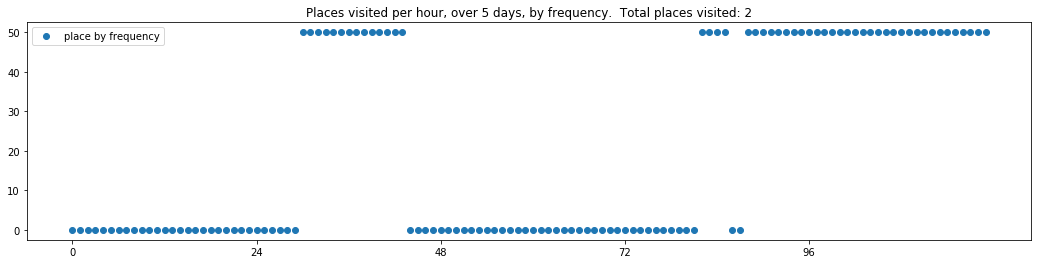

----- vector ----
prefix labels:  [321, 295]
[0, 0, 0, 0, 0, 0, 0, 0, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 321, 321, 321, 321, 321, 321]
[321, 321, 321, 321, 321, 321, 321, 321, 295, 295, 295, 621, 295, 295, 295, 295, 295, 321, 321, 321, 321, 321, 321, 321]
[321, 321, 321, 321, 321, 321, 321, 321, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 321, 321, 321, 321, 321]
[321, 321, 321, 321, 321, 321, 321, 321, 295, 295, 295, 295, 295, 295, 295, 295, 295, 321, 321, 321, 321, 321, 321, 321]
[321, 321, 321, 321, 321, 321, 321, 321, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 321, 321, 321, 321, 321]


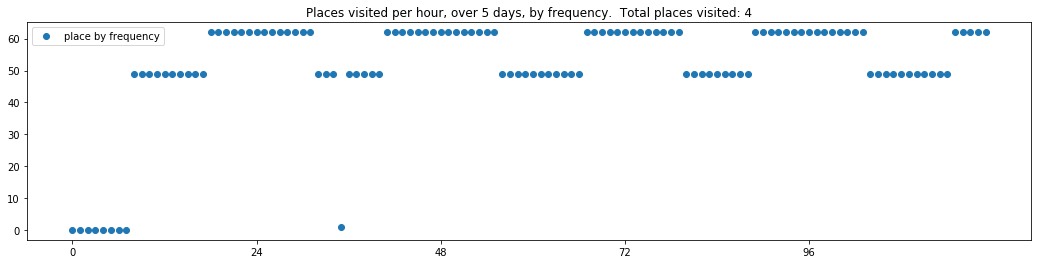

----- vector ----
prefix labels:  [645, 485]
[0, 0, 0, 0, 0, 0, 0, 0, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 261, 261, 645, 645, 645, 645]
[645, 645, 645, 645, 645, 645, 645, 645, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 645, 645, 645, 645, 645, 645]
[645, 645, 645, 645, 645, 645, 645, 645, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 645, 261, 261, 645, 645, 645]
[645, 645, 645, 645, 645, 645, 645, 645, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 485, 0, 645, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


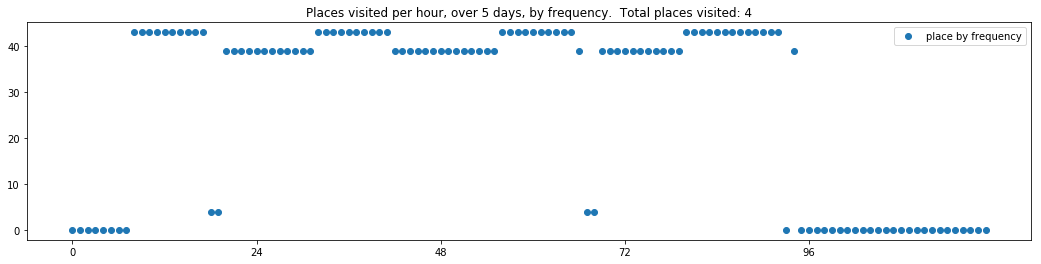

----- vector ----
prefix labels:  [386, 386]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 386, 386, 386, 386, 386, 386, 386, 386, 386, 22, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 386, 386, 386, 386, 386, 386, 386, 386, 386, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


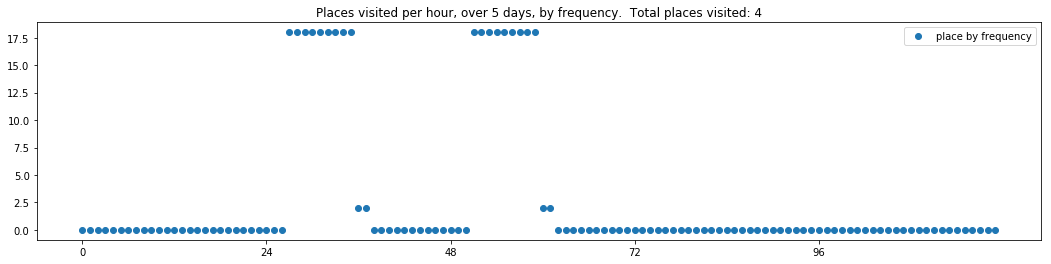

----- vector ----
prefix labels:  [86, 86]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86]
[86, 86, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86]
[86, 86, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


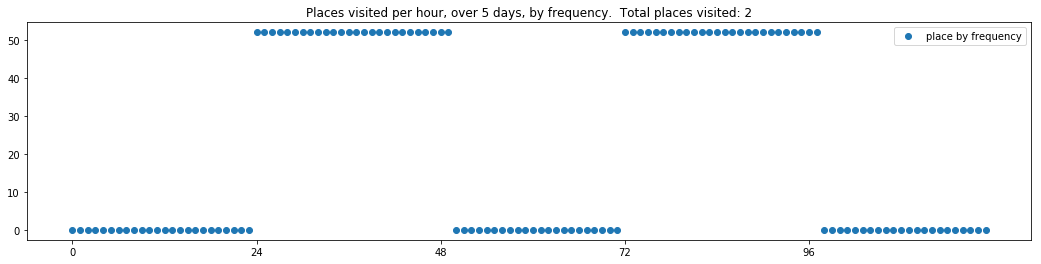

----- vector ----
prefix labels:  [65, 65]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 65, 65, 65, 65, 65, 65, 65, 0, 0, 0, 0]
[0, 0, 0, 0, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 0, 0, 0, 0, 0, 0]
[21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 162, 162, 0, 0, 0, 0]


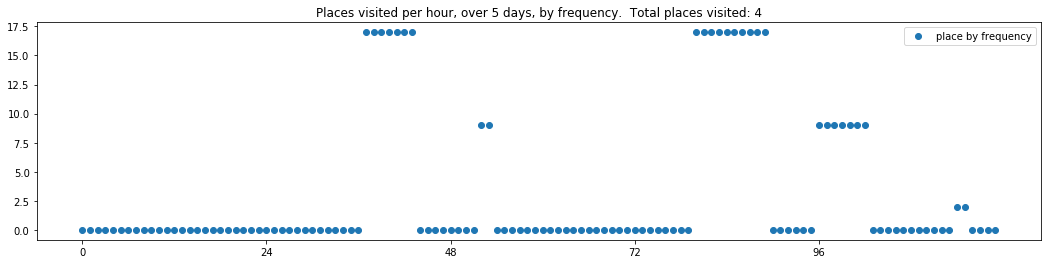

----- vector ----
prefix labels:  [6, 6]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6]
[6, 6, 6, 6, 0, 0, 0, 0, 6, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 0]


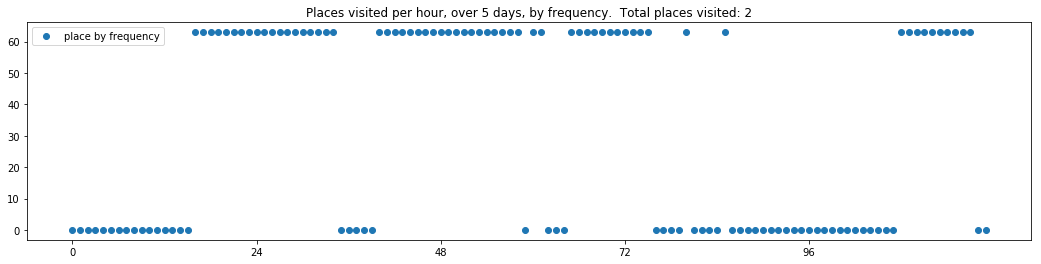

----- vector ----
prefix labels:  [306, 306]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


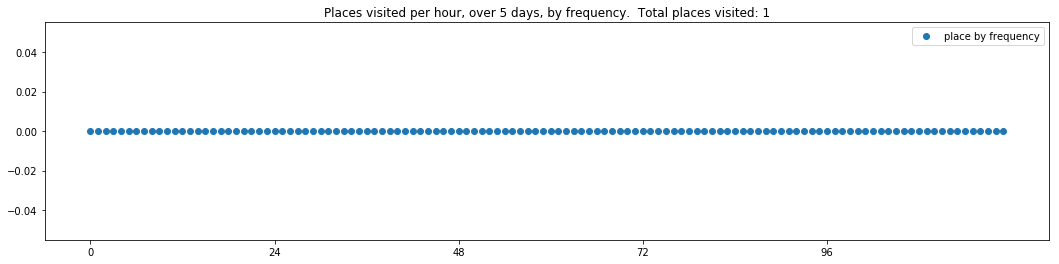

----- vector ----
prefix labels:  [185, 185]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 181, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 185, 185, 185, 185, 185, 185, 185, 185, 185, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 185, 185, 185, 185, 185, 185, 185, 185, 185, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 185, 185, 185, 185, 185, 185, 185, 185, 185, 0, 0, 0, 0, 0, 0]


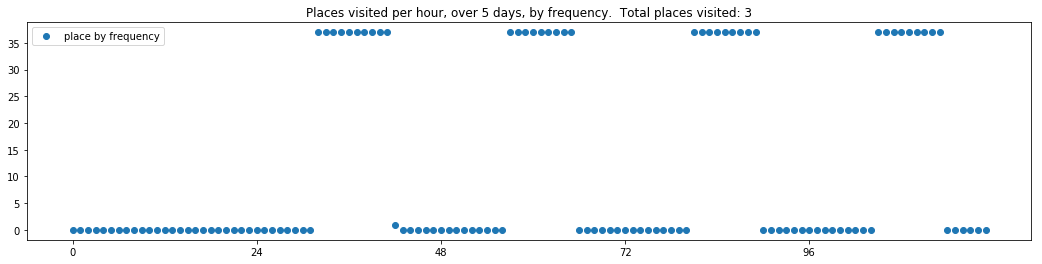

----- vector ----
prefix labels:  [269, 269]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 625, 0, 0, 269, 269, 269]
[269, 269, 269, 269, 269, 269, 269, 269, 269, 269, 269, 269, 0, 0, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 625, 625, 0, 8, 8, 8, 8, 8, 0, 8, 8, 0, 0, 269]
[269, 269, 0, 0, 0, 0, 0, 0, 0, 0, 269, 0, 0, 0, 0, 0, 0, 0, 0, 0, 269, 269, 269, 269]
[269, 269, 269, 269, 269, 269, 269, 269, 0, 0, 269, 269, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0]


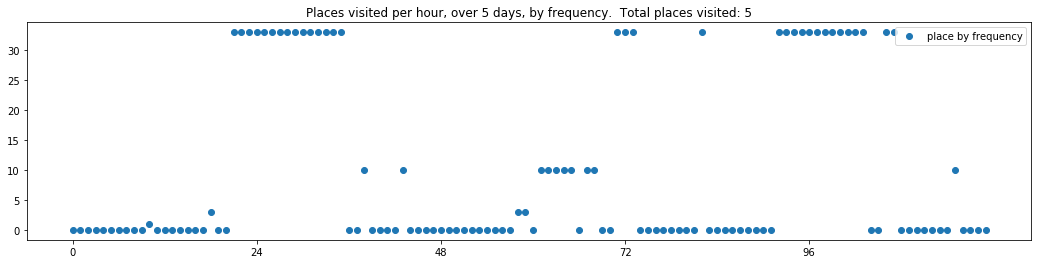

----- vector ----
prefix labels:  [378, 378]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


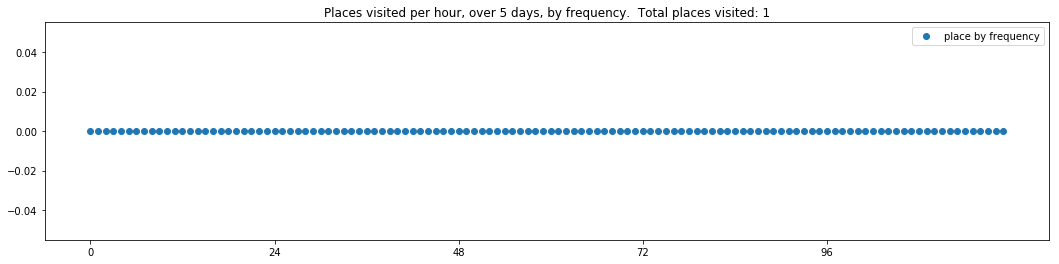

----- vector ----
prefix labels:  [578, 578]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 578, 578]
[578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578]
[578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 578, 167, 0, 578, 578, 578, 578]
[578, 578, 578, 578, 578, 578, 578, 578, 391, 391, 391, 0, 578, 578, 578, 578, 578, 391, 391, 578, 578, 578, 578, 578]


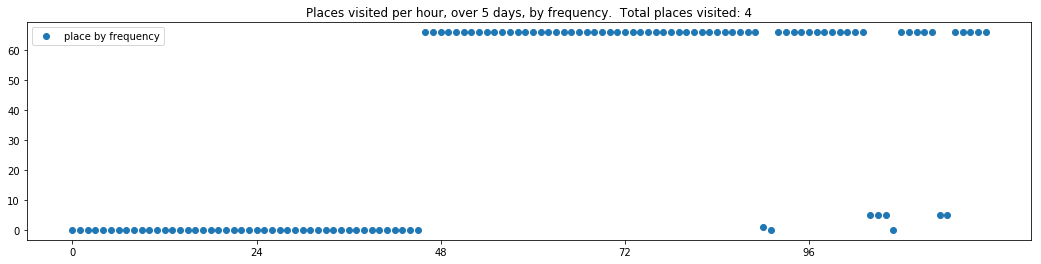

----- vector ----
prefix labels:  [237, 79]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 79, 79, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 79, 79, 79, 79, 79, 79, 79, 237, 237, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 89, 89]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 79, 79, 79, 79, 79, 79, 79, 79, 358, 89, 89]
[89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 0, 79, 79, 79, 79, 79, 79, 79, 79, 0, 0, 0]


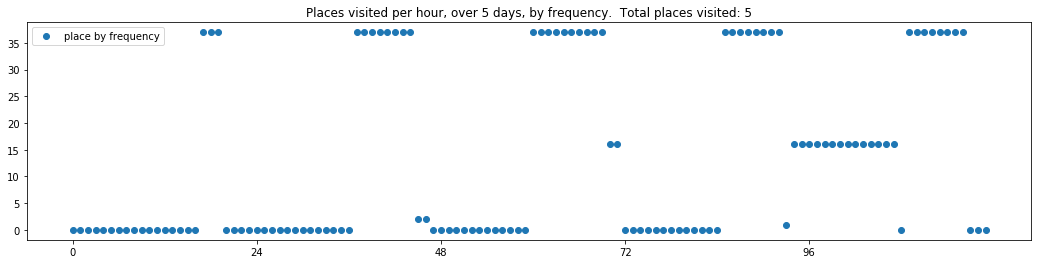

----- vector ----
prefix labels:  [390, 390]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 194, 0, 390, 390, 390, 390, 390]
[390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390]
[390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 0, 0, 0, 0, 0, 0, 0, 390, 390, 390, 390, 390]
[390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 0, 0, 0, 0, 271, 0, 0, 0, 0, 0, 0, 520]
[520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 520, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 520]


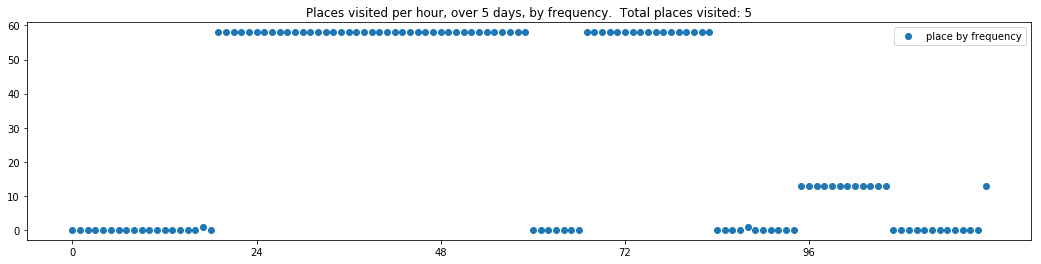

----- vector ----
prefix labels:  [101, 101]
[0, 0, 0, 0, 0, 0, 0, 101, 101, 101, 101, 179, 179, 179, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101]
[101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 0, 0, 101, 101, 101, 101, 101]
[101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 179, 101, 101, 101, 101, 101, 0, 0, 411, 0, 0, 0, 0]
[101, 101, 101, 101, 101, 101, 101, 101, 101, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


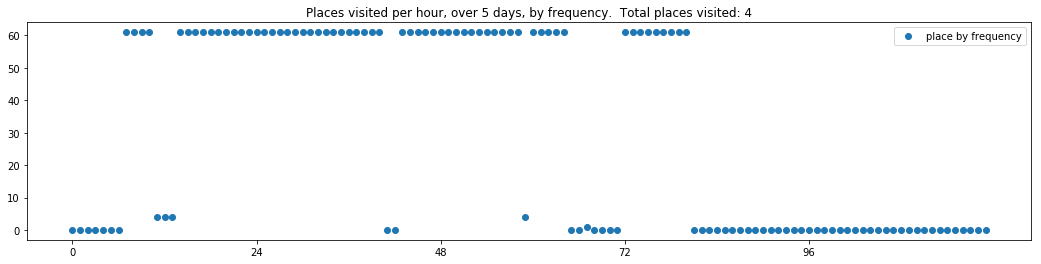

----- vector ----
prefix labels:  [47, 47]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 47, 47, 47, 47, 47, 47, 47, 47]
[47, 47, 47, 47, 47, 47, 47, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 47, 47, 47, 47, 47, 47]
[47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 47, 47, 47, 47, 47, 47]
[47, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 47, 47, 47, 47, 47, 47]
[47, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 47, 47, 47]


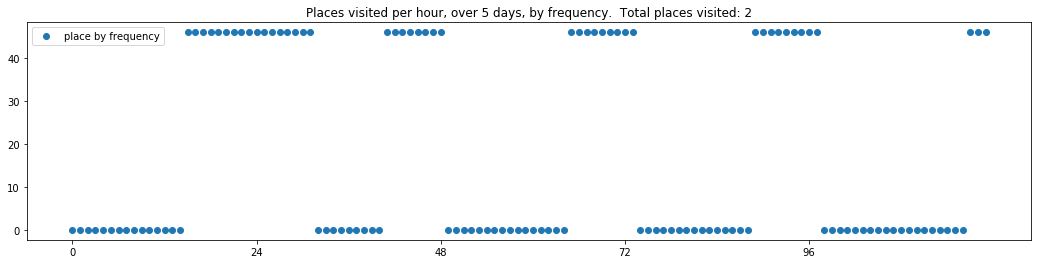

showing sample of trajectories from output with temp 0.9
----- vector ----
prefix labels:  [401, 401]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401]
[401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401]
[401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401]
[401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401]
[401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 0, 0, 0, 0, 0, 0, 0, 401, 401, 401, 401]


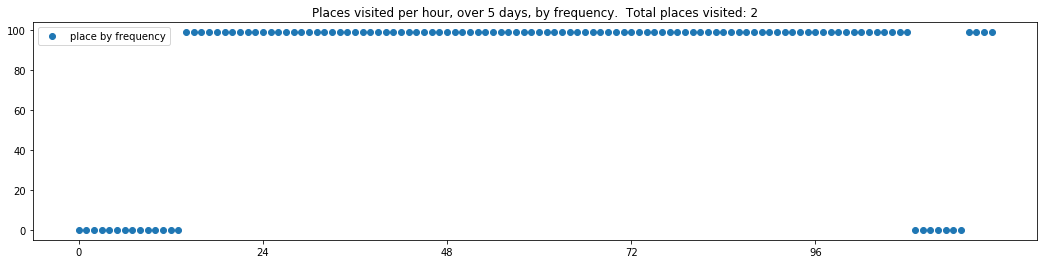

----- vector ----
prefix labels:  [401, 401]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 401, 401, 401, 401, 401, 401, 0, 0, 0, 401, 401, 401, 401]
[401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 401, 0, 401, 0, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401]
[401, 401, 401, 401, 401, 401, 0, 0, 0, 0, 401, 0, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401]
[401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401]


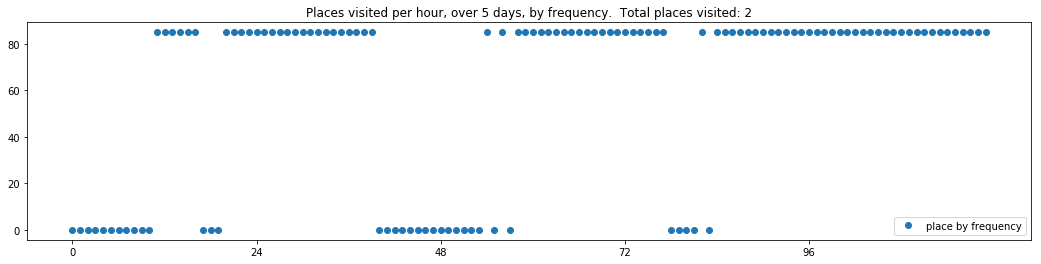

----- vector ----
prefix labels:  [372, 372]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 234, 234, 456, 456, 456, 527, 527, 527, 527, 527, 527, 527, 527, 527]


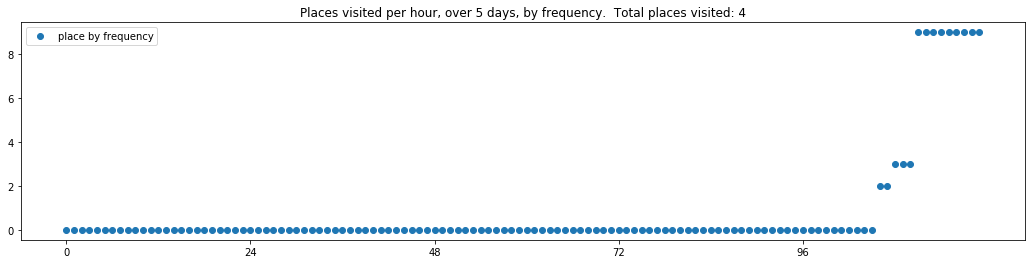

----- vector ----
prefix labels:  [14, 14]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 14, 14, 14, 14, 14, 14, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14]
[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 0, 14, 14, 14]
[14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 0, 0, 14, 14, 14]


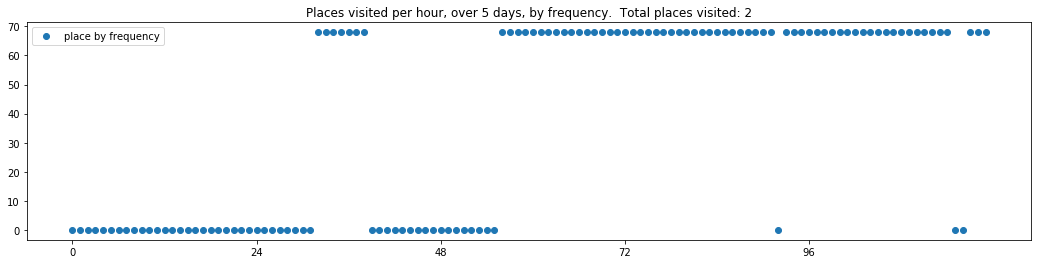

----- vector ----
prefix labels:  [583, 583]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 583, 583, 583, 583, 583]
[583, 583, 583, 583, 583, 583, 583, 583, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 535, 583, 583, 583]
[583, 583, 583, 583, 583, 583, 583, 583, 583, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 583, 583, 583, 583, 583]
[583, 583, 583, 583, 583, 583, 583, 583, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 583, 583, 0, 583]
[583, 583, 583, 583, 583, 583, 583, 583, 583, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 583, 583, 583, 583, 583]


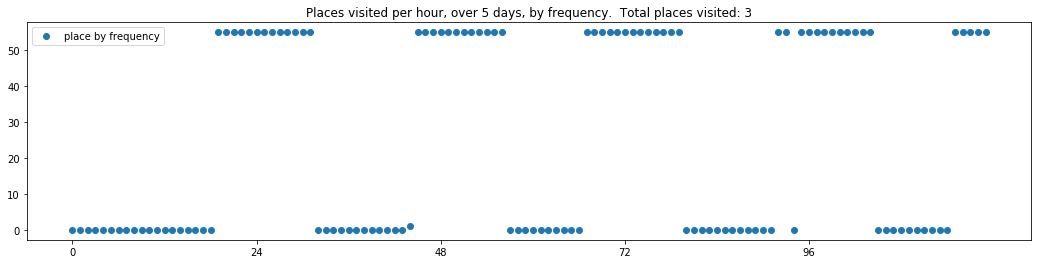

----- vector ----
prefix labels:  [78, 22]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 22, 22, 78, 78, 78, 78, 78]
[78, 78, 78, 78, 78, 78, 0, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 78, 78, 78]
[78, 78, 78, 78, 78, 78, 0, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 0, 78, 78, 78, 78, 78]
[84, 84, 78, 78, 78, 78, 0, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 78, 78, 78, 78]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 78, 78, 78, 22, 22, 22, 22, 22, 22, 22, 22, 22, 78, 78, 395]


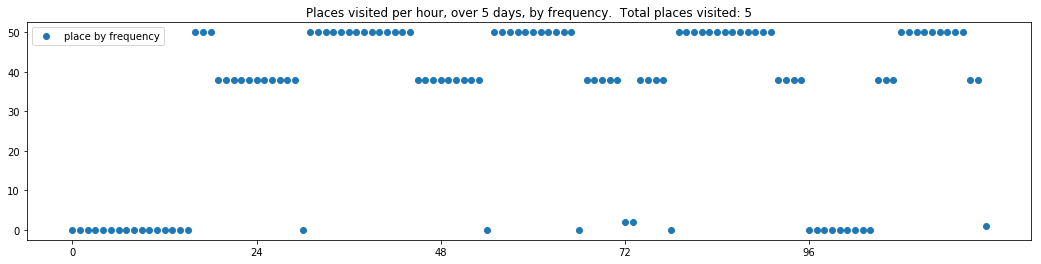

----- vector ----
prefix labels:  [474, 474]
[0, 0, 0, 0, 0, 0, 0, 474, 474, 474, 474, 474, 474, 474, 474, 474, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 0, 0, 434, 434, 0, 0, 0, 120, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


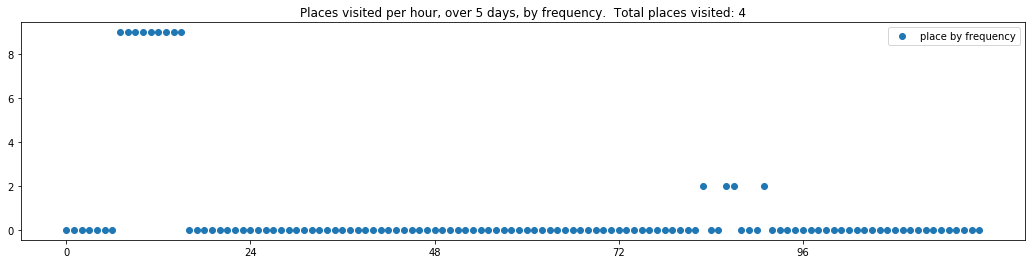

----- vector ----
prefix labels:  [341, 341]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 341, 341, 0, 0, 341, 341, 341, 341]
[341, 341, 341, 341, 341, 341, 341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 341, 341, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 341, 341, 341, 341, 341, 341, 341, 341, 341]
[341, 341, 341, 341, 341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


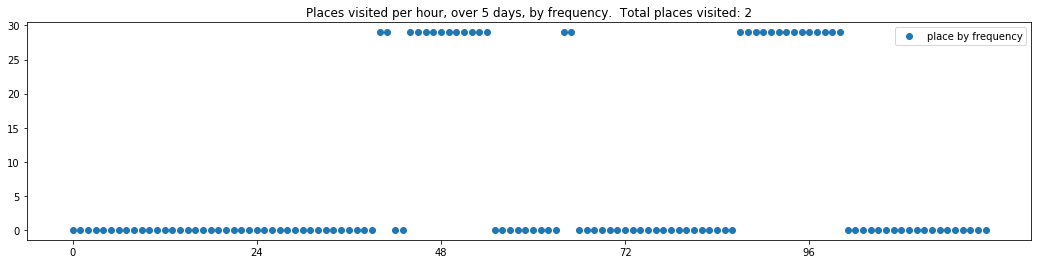

----- vector ----
prefix labels:  [4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 50, 50, 178, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 334, 557, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 318, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


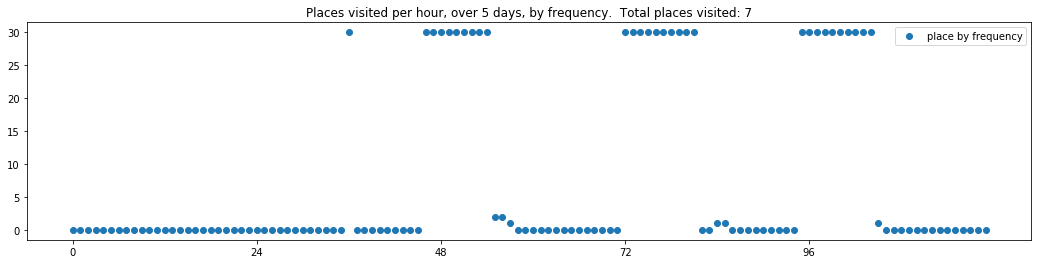

----- vector ----
prefix labels:  [393, 297]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 297, 297, 297, 297, 297, 297, 0, 0, 0, 0, 0, 393]
[393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 0, 0, 297, 297, 297, 0, 0, 0, 0, 482, 482, 359]
[393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 393, 0, 393, 0, 0, 297, 297, 297, 297, 297, 297, 297, 297, 297]
[297, 0, 0, 0, 393, 0, 0, 0, 0, 0, 0, 0, 0, 297, 297, 297, 297, 0, 0, 0, 0, 0, 475, 612]


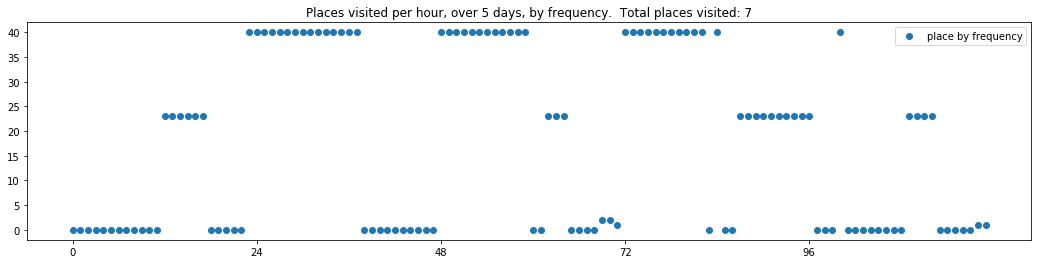

----- vector ----
prefix labels:  [373, 100]
[0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 100, 100, 185, 185, 0, 0, 641, 641, 0, 0, 0, 373, 373, 0]
[0, 0, 0, 0, 0, 0, 0, 495, 0, 0, 0, 0, 100, 100, 100, 100, 100, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 185, 185, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 185, 185, 185, 185, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 185, 185, 0, 185, 185, 185, 185, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


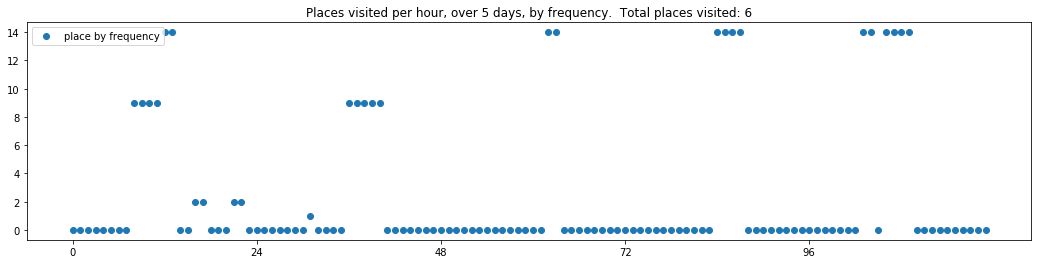

----- vector ----
prefix labels:  [16, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 16, 16, 16, 16]
[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 88, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 165, 0, 4, 4, 4, 151, 259, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 88, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 55, 55, 0, 0, 115, 0, 0, 590, 0, 0, 0, 0, 0, 0, 0]


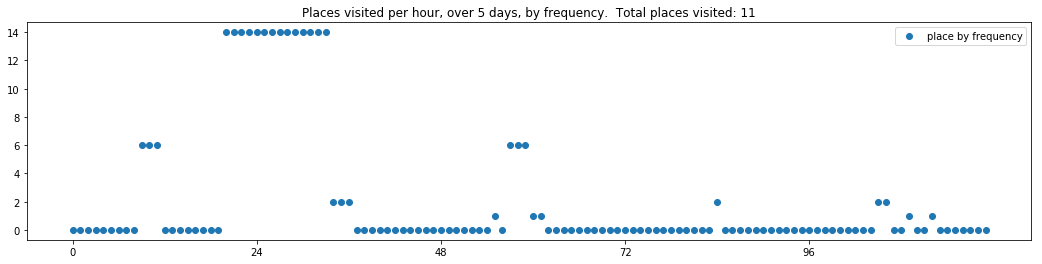

----- vector ----
prefix labels:  [225, 225]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


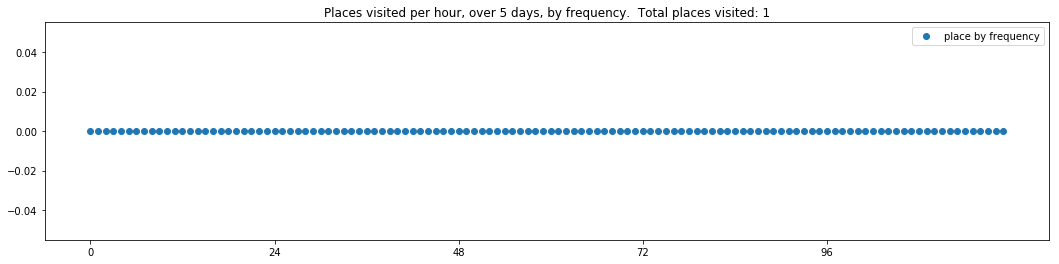

----- vector ----
prefix labels:  [548, 548]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 548, 548, 0, 0, 0, 0, 0, 0, 0, 548, 548]
[548, 548, 548, 548, 548, 548, 548, 548, 548, 548, 548, 548, 548, 0, 0, 0, 0, 0, 548, 0, 0, 548, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 548, 548, 548, 548, 548, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 548, 0, 0, 0, 0, 0, 0, 0, 548, 548, 548, 548, 548]


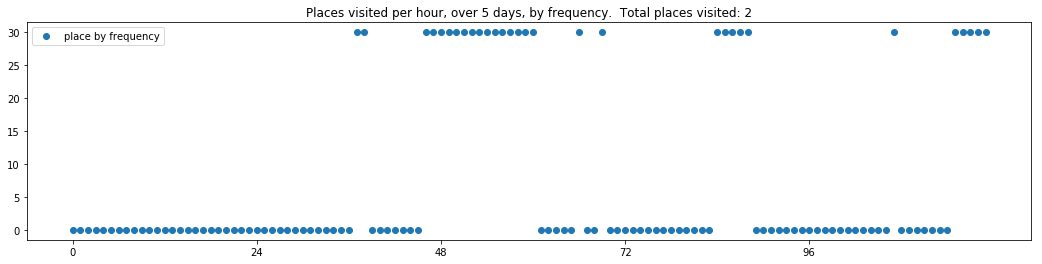

----- vector ----
prefix labels:  [45, 45]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 45, 45, 45, 45, 45, 45]
[45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
[45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
[45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
[45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 0, 0, 0, 0, 0, 0, 0, 0, 0]


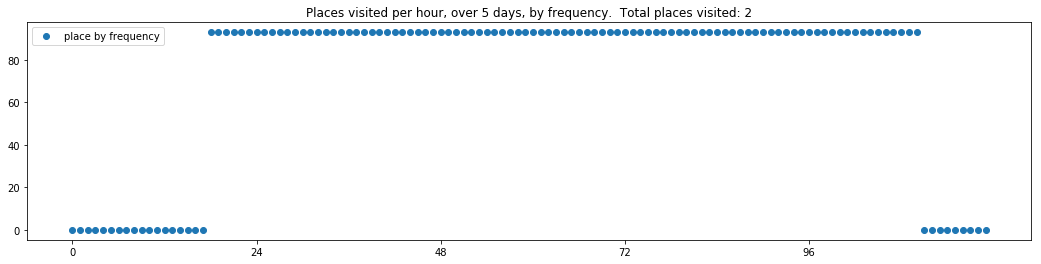

----- vector ----
prefix labels:  [161, 161]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 161, 161, 161, 161, 161, 161, 161]
[161, 161, 161, 161, 161, 161, 161, 0, 161, 0, 0, 0, 0, 0, 0, 0, 0, 161, 161, 161, 161, 161, 161, 161]
[161, 161, 161, 161, 161, 161, 161, 161, 161, 0, 0, 0, 0, 0, 0, 0, 0, 0, 161, 161, 161, 161, 161, 161]
[161, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161]
[161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161]


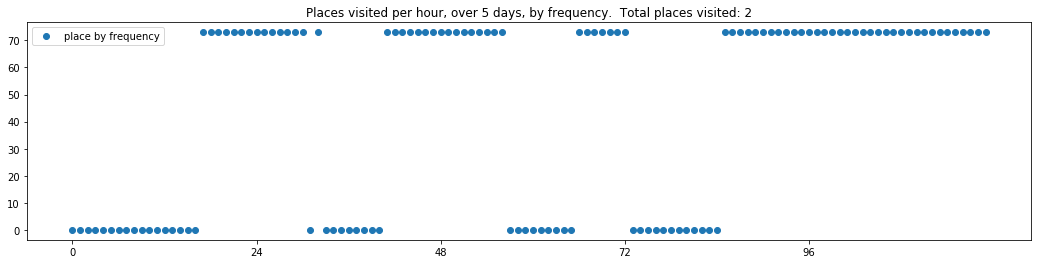

----- vector ----
prefix labels:  [422, 422]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 422, 422, 422, 422, 422]
[422, 422, 422, 422, 422, 422, 422, 422, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 422, 422]
[422, 0, 0, 0, 0, 0, 0, 0, 0, 423, 423, 423, 423, 423, 423, 423, 423, 0, 0, 422, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 422]
[422, 422, 0, 0, 422, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 422, 422, 422, 422, 422]


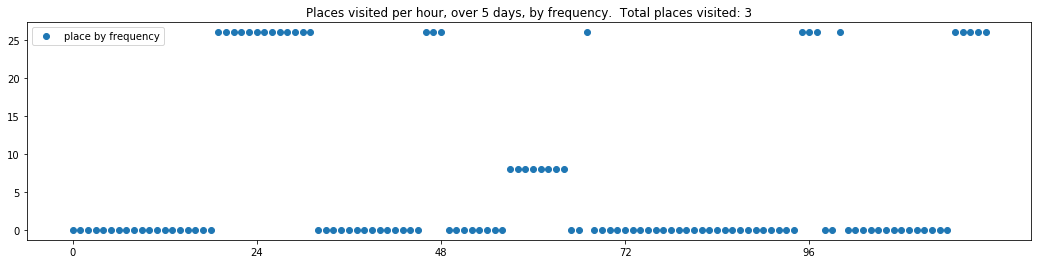

----- vector ----
prefix labels:  [47, 47]
[0, 0, 0, 0, 0, 0, 0, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


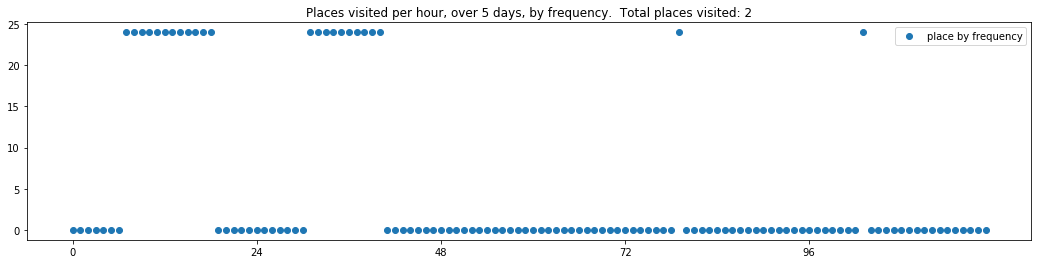

----- vector ----
prefix labels:  [577, 577]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 577, 577, 577, 577, 577, 577, 577, 577, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 577, 577, 577, 577, 577, 577, 577, 577, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 577, 577, 577, 577, 577, 577, 577, 577, 577, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


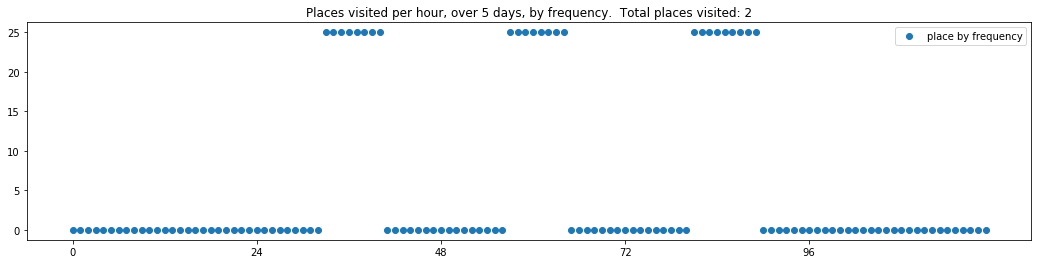

----- vector ----
prefix labels:  [546, 546]
[0, 0, 0, 0, 0, 0, 0, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546]
[546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 0, 546, 546, 546, 546, 546]
[546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 546, 0, 546, 546, 546, 0, 0, 546, 546, 546]
[546, 546, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 205, 0, 0, 0, 0, 0, 546, 546, 546, 546]


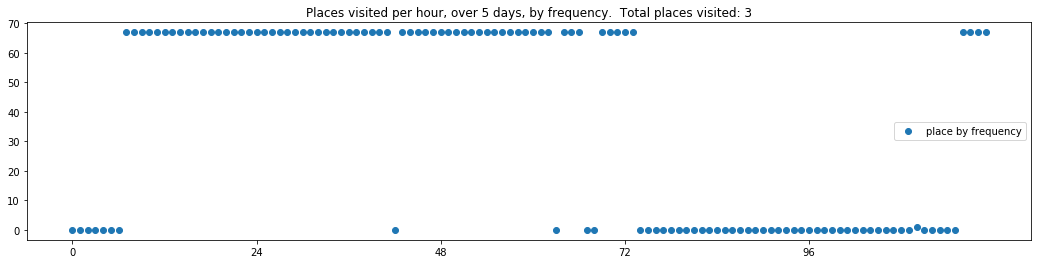

showing sample of trajectories from output with temp 1.0
----- vector ----
prefix labels:  [266, 266]
[0, 0, 0, 0, 0, 266, 266, 266, 266, 266, 266, 266, 266, 0, 0, 231, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266]
[266, 266, 266, 266, 266, 0, 266, 266, 0, 0, 247, 0, 0, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266]
[266, 0, 0, 0, 0, 0, 553, 553, 553, 284, 284, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266, 266]


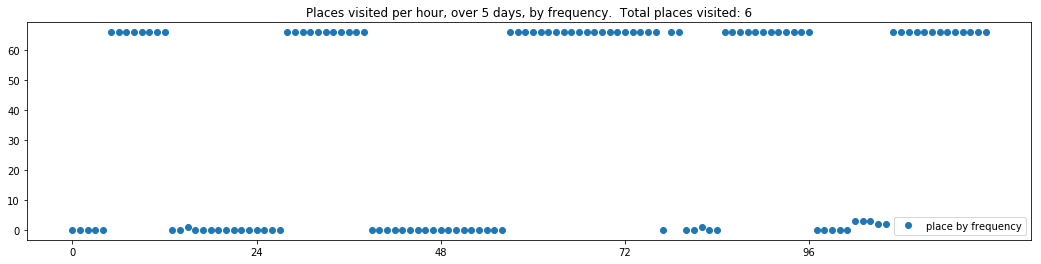

----- vector ----
prefix labels:  [158, 401]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 158, 160, 160, 158, 158, 158]
[158, 158, 158, 158, 158, 158, 158, 158, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 160, 158, 158]
[158, 158, 158, 158, 158, 158, 158, 158, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 158, 158, 158]
[158, 158, 158, 158, 158, 158, 158, 158, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 158, 158, 158, 158, 158, 158, 158, 158, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 158, 158, 158]


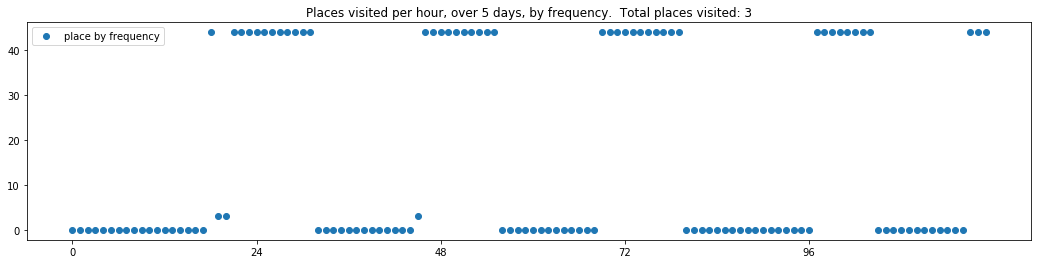

----- vector ----
prefix labels:  [229, 229]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 229, 229, 229, 114, 114, 271, 271, 271, 271, 271, 271]
[271, 271, 271, 271, 271, 271, 271, 114, 114, 114, 114, 229, 229, 229, 229, 229, 229, 229, 271, 271, 271, 271, 271, 271]
[271, 271, 271, 271, 271, 0, 0, 0, 114, 114, 114, 114, 114, 114, 0, 0, 0, 0, 271, 271, 271, 271, 271, 271]
[271, 271, 271, 271, 271, 271, 271, 0, 0, 0, 0, 0, 0, 0, 0, 114, 114, 114, 271, 288, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 114, 114, 114, 0, 0, 0, 271, 271, 307, 271, 271, 271, 271, 271, 271, 271, 271]


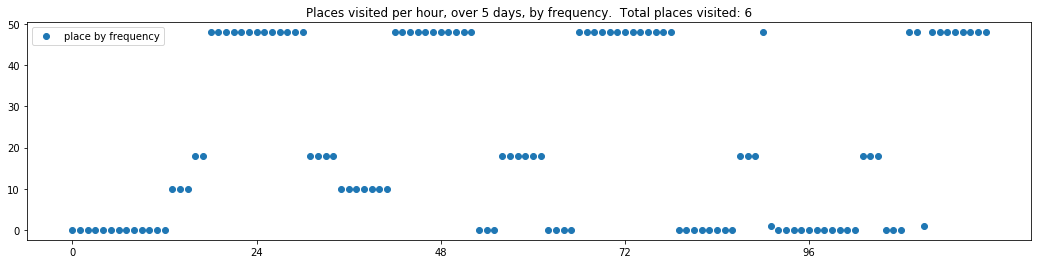

----- vector ----
prefix labels:  [335, 183]
[0, 0, 0, 0, 0, 0, 0, 183, 183, 183, 183, 183, 183, 183, 183, 183, 0, 335, 335, 335, 335, 335, 335, 335]
[335, 335, 335, 335, 335, 335, 335, 183, 183, 183, 183, 183, 183, 183, 183, 335, 335, 335, 335, 373, 373, 335, 335, 335]
[335, 335, 335, 335, 335, 335, 335, 335, 183, 183, 183, 183, 183, 183, 183, 335, 335, 335, 335, 335, 335, 335, 335, 335]
[335, 335, 335, 335, 335, 335, 335, 335, 335, 183, 183, 183, 183, 183, 183, 335, 335, 335, 335, 335, 335, 335, 335, 335]
[335, 335, 335, 335, 335, 335, 335, 335, 183, 183, 183, 183, 183, 183, 183, 183, 335, 335, 335, 335, 335, 335, 335, 335]


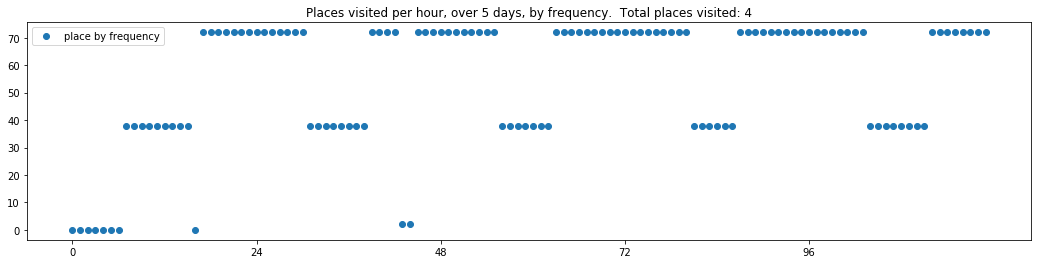

----- vector ----
prefix labels:  [162, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 70, 70, 70, 70, 70, 70, 70, 70, 0, 186, 186, 186, 186, 186, 186, 186, 186, 186]
[186, 186, 186, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 186, 186, 186, 186, 186, 186, 32, 186, 186]
[186, 186, 186, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 186]


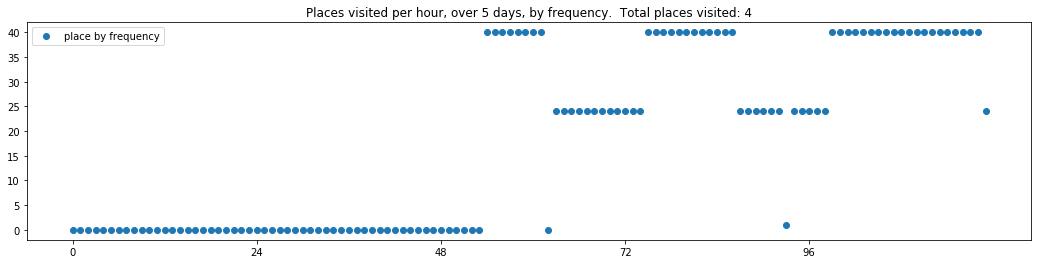

----- vector ----
prefix labels:  [79, 79]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 401, 401, 79, 79, 79, 79, 79, 79]
[79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 6, 6, 79, 79, 79, 79]
[79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


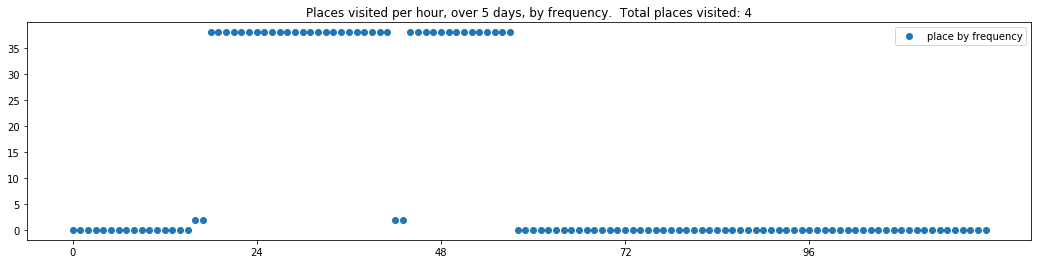

----- vector ----
prefix labels:  [237, 568]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 568, 568, 568, 247, 247, 247, 568, 568, 0, 237, 237, 237]
[237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 568, 568, 568, 568, 568, 568, 568, 568, 0, 237, 237, 237]
[237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 568, 247, 568, 546, 286, 0, 286, 147, 147, 147, 536, 536]
[237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 237, 568, 568, 568, 568, 568, 568, 568, 237, 237, 237, 237, 237]


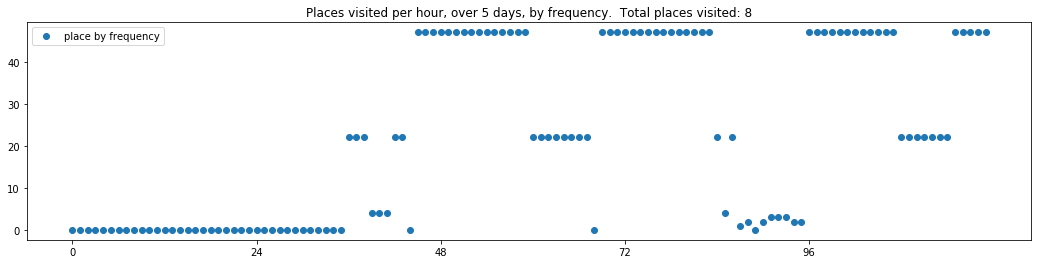

----- vector ----
prefix labels:  [102, 102]
[0, 0, 0, 0, 0, 0, 0, 102, 0, 390, 0, 0, 0, 0, 0, 0, 102, 102, 102, 102, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 102, 102, 102, 102, 102, 102, 102]
[102, 102, 102, 102, 102, 102, 0, 390, 390, 390, 390, 390, 390, 390, 0, 0, 102, 102, 102, 102, 102, 102, 102, 102]
[102, 102, 102, 102, 102, 102, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 102, 102, 102, 102, 102, 102, 102, 102]
[102, 102, 102, 102, 102, 102, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 102, 102, 102, 102, 102, 102, 102, 102]


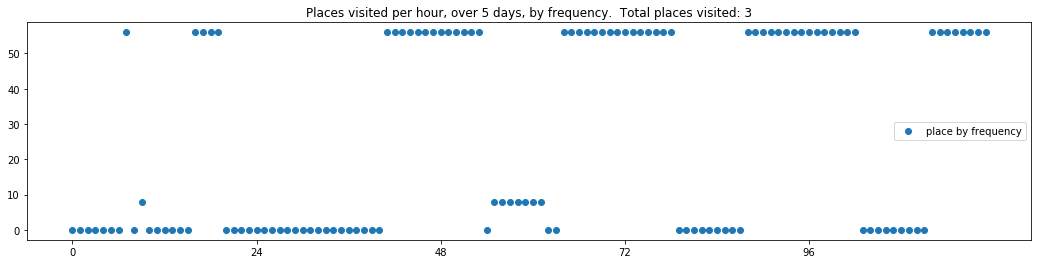

----- vector ----
prefix labels:  [21, 21]
[0, 0, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 8, 8, 8, 8, 21, 21]
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


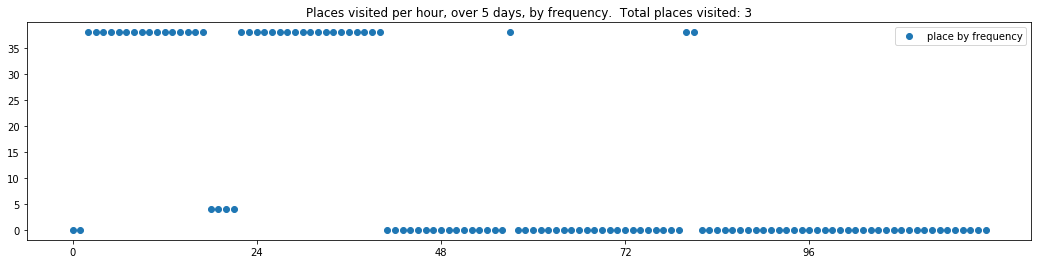

----- vector ----
prefix labels:  [289, 289]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 539, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289]
[289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 0, 0, 0, 0, 289, 289, 289]
[289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 431, 431, 431, 431, 431, 431, 431, 431, 431, 289, 289, 289, 289]
[0, 0, 0, 0, 0, 0, 0, 367, 396, 396, 396, 513, 513, 513, 0, 0, 289, 289, 289, 289, 289, 289, 289, 289]
[289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 289, 431, 431, 0, 0, 0, 431, 0, 0, 0, 289, 173, 289, 289]


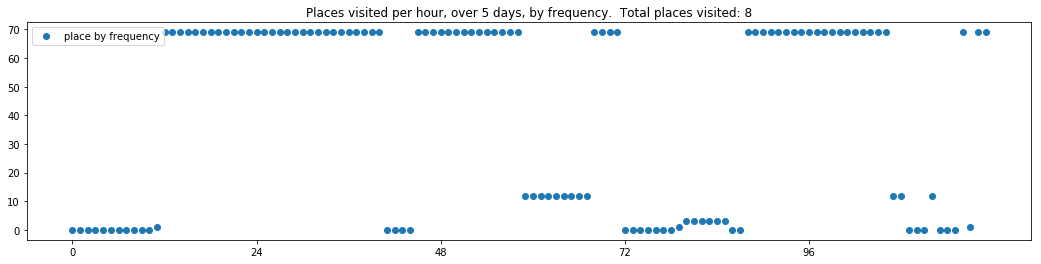

----- vector ----
prefix labels:  [615, 508]
[0, 0, 0, 0, 0, 0, 615, 615, 615, 615, 615, 615, 615, 615, 568, 568, 568, 568, 568, 0, 376, 376, 615, 615]
[615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 0, 479, 615, 615, 615, 615]
[615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 0, 162, 162, 162, 162, 162, 615, 479, 320, 320, 320]
[479, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 303, 479]
[479, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 615, 454, 0, 162, 162, 162, 162, 59, 0, 479, 615, 615, 615]


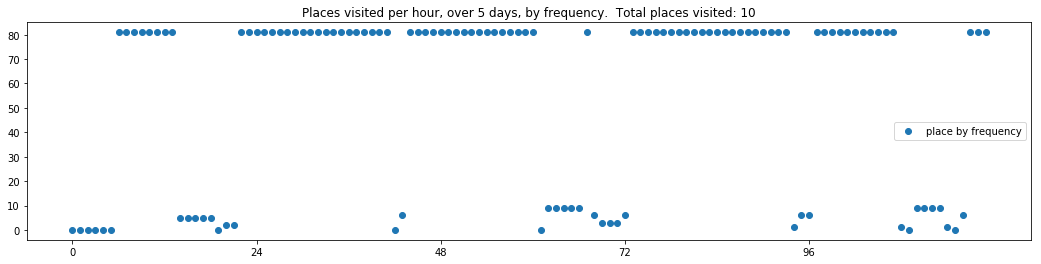

----- vector ----
prefix labels:  [474, 474]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 474, 474, 474, 474, 474]
[474, 474, 474, 474, 474, 474, 307, 307, 307, 69, 69, 74, 569, 21, 0, 0, 0, 0, 0, 307, 474, 474, 474, 474]
[474, 474, 474, 474, 474, 474, 0, 0, 98, 8, 474, 474, 21, 569, 474, 474, 474, 474, 474, 474, 474, 474, 474, 474]
[474, 474, 474, 474, 474, 474, 474, 0, 0, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 474, 474]
[474, 474, 474, 474, 474, 474, 474, 474, 307, 375, 375, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 474, 474, 474]


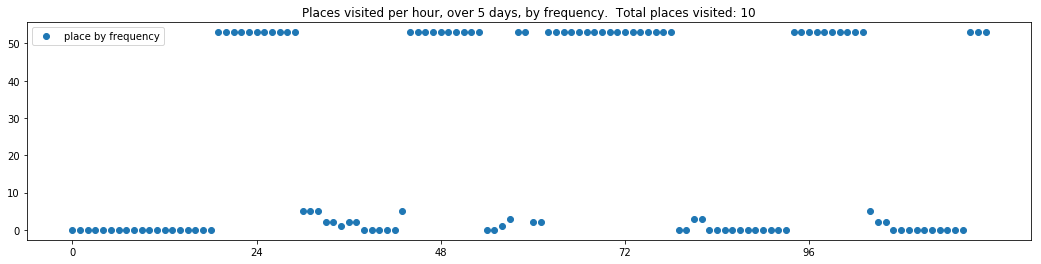

----- vector ----
prefix labels:  [22, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0, 22, 22]
[22, 0, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 185, 0, 22, 22, 22, 22, 22, 22, 22, 22]
[22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22]
[22, 22, 22, 21, 21, 185, 185, 21, 21, 21, 21, 21, 21, 22, 0, 0, 22, 22, 22, 22, 22, 22, 22, 22]


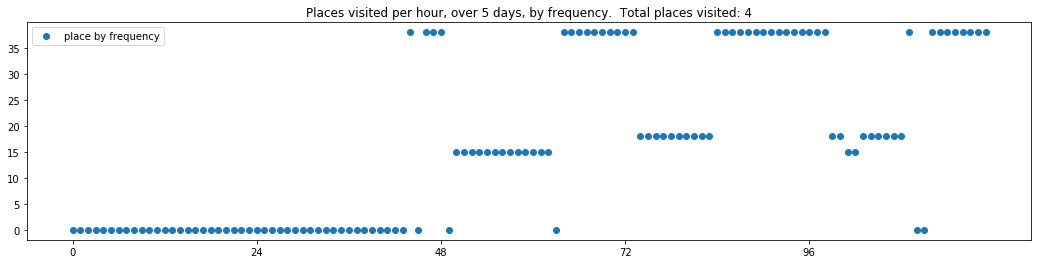

----- vector ----
prefix labels:  [232, 475]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 82, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 475, 475, 475, 475, 475, 475, 0, 0, 0, 0, 0, 232, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 475, 475, 475, 475, 0, 0, 0, 0, 0, 0, 0, 0, 518, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 475, 475, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 518, 187, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 518, 518, 0, 0, 0, 0]


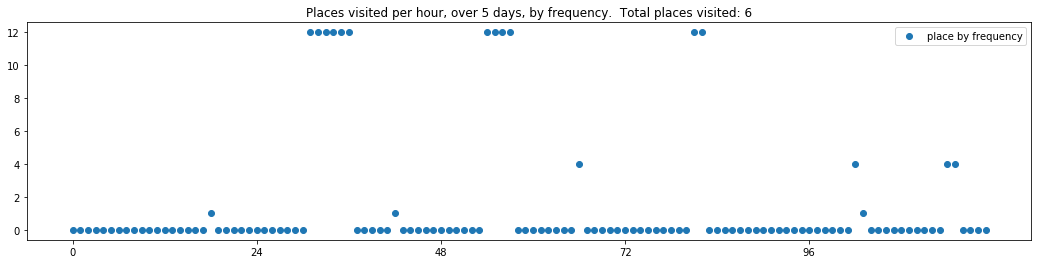

----- vector ----
prefix labels:  [25, 25]
[0, 0, 0, 0, 0, 0, 0, 25, 0, 0, 0, 0, 0, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 25, 25, 25]
[25, 25, 25, 25, 25, 25, 25, 25, 25, 0, 0, 0, 0, 0, 25, 25, 0, 0, 25, 25, 25, 25, 25, 25]
[25, 25, 25, 25, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 25, 25, 0, 0, 0, 0, 0, 25]
[25, 25, 25, 25, 25, 0, 0, 0, 0, 25, 25, 25, 25, 0, 0, 25, 25, 25, 25, 25, 25, 25, 25, 25]


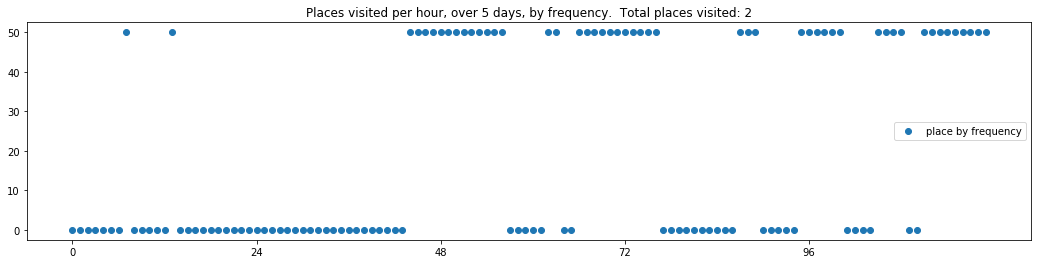

----- vector ----
prefix labels:  [358, 358]
[0, 0, 0, 0, 0, 0, 0, 0, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 358, 358, 358, 358, 247, 247, 87, 358, 358, 358, 358, 358, 358, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 358, 358, 357, 0, 0, 0, 255, 358, 358, 358, 358, 358, 358, 358, 116, 116, 358, 358, 358, 358]
[358, 358, 358, 358, 358, 0, 0, 0, 0, 0, 0, 0, 358, 358, 358, 358, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 358, 0, 0, 0, 429, 0, 358, 358, 358, 358, 0, 0, 0, 0, 0, 0, 0, 0]


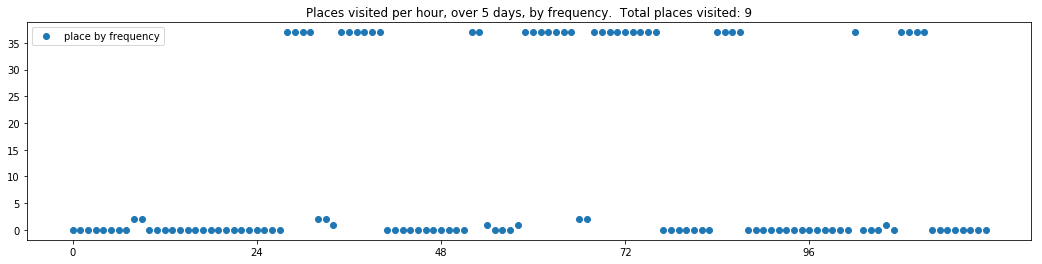

----- vector ----
prefix labels:  [457, 586]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 457, 457, 457]
[457, 457, 457, 457, 457, 457, 457, 0, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 0, 457]
[457, 457, 457, 457, 457, 457, 457, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 116, 2, 2]
[2, 401, 457, 457, 457, 457, 457, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 401, 2, 457]
[457, 457, 457, 457, 457, 457, 457, 457, 116, 116, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 586, 2, 2, 2]


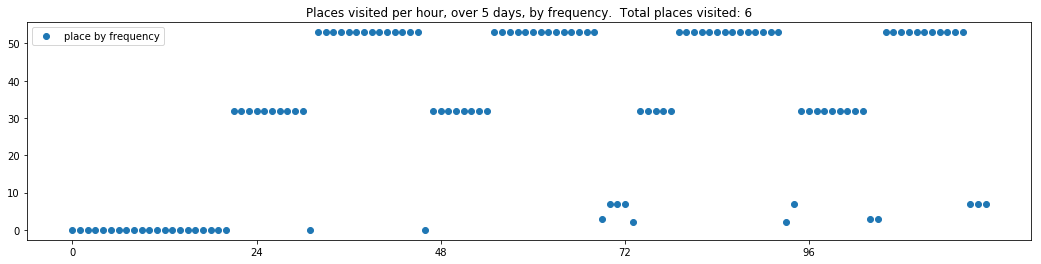

----- vector ----
prefix labels:  [289, 270]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 270, 270, 270, 270, 270, 270, 270, 270, 270, 289, 289, 289, 289, 289]
[289, 289, 289, 289, 289, 289, 289, 289, 289, 270, 270, 270, 270, 270, 270, 270, 270, 270, 289, 289, 289, 289, 289, 289]
[289, 289, 289, 289, 289, 289, 289, 289, 289, 270, 270, 270, 410, 163, 163, 163, 289, 289, 289, 289, 289, 0, 0, 289]
[289, 289, 289, 289, 289, 289, 289, 289, 289, 270, 270, 260, 260, 0, 0, 0, 0, 289, 289, 289, 289, 0, 0, 0]
[0, 0, 289, 289, 289, 289, 289, 289, 0, 387, 260, 260, 260, 260, 260, 0, 0, 289, 289, 289, 289, 289, 289, 289]


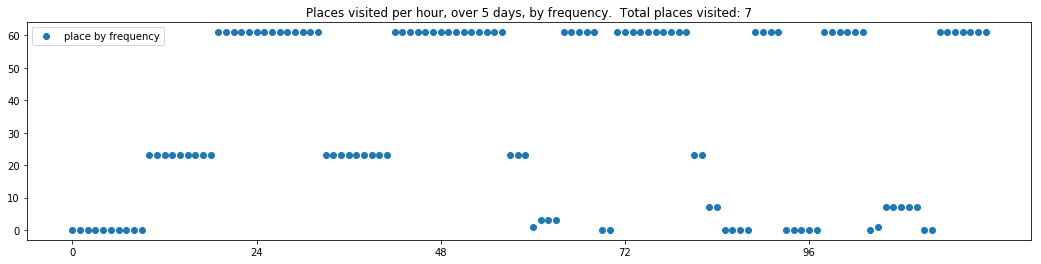

----- vector ----
prefix labels:  [50, 573]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 573, 573, 573, 573, 573, 50, 50, 50, 50, 50, 50, 50]
[50, 50, 50, 50, 50, 50, 50, 50, 50, 573, 573, 573, 573, 573, 573, 573, 573, 50, 50, 50, 50, 50, 50, 50]
[50, 50, 50, 50, 50, 50, 50, 50, 573, 573, 573, 573, 573, 573, 573, 573, 485, 485, 485, 485, 485, 485, 50, 50]
[50, 50, 50, 50, 50, 50, 50, 50, 50, 573, 573, 573, 573, 573, 573, 573, 485, 485, 485, 485, 485, 485, 50, 50]
[50, 50, 50, 50, 50, 50, 50, 50, 573, 573, 573, 573, 573, 573, 573, 573, 485, 485, 485, 485, 485, 485, 50, 50]


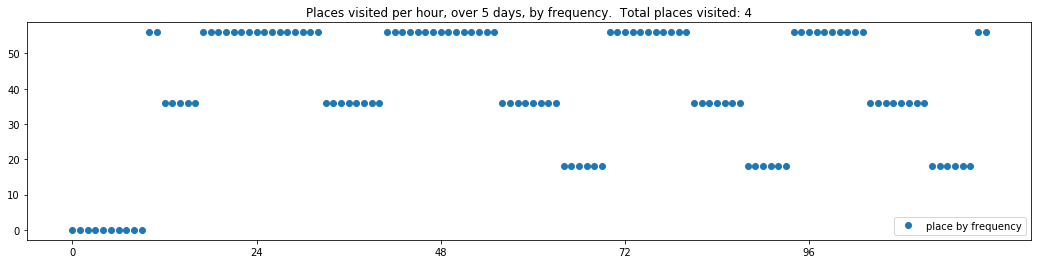

----- vector ----
prefix labels:  [39, 324]
[0, 0, 0, 0, 0, 0, 324, 324, 324, 324, 0, 0, 0, 0, 500, 500, 0, 39, 39, 39, 39, 39, 39, 39]
[39, 39, 39, 39, 39, 0, 324, 324, 324, 324, 324, 324, 0, 0, 0, 500, 39, 39, 39, 39, 39, 39, 39, 39]
[39, 39, 39, 39, 39, 324, 324, 324, 324, 0, 324, 324, 24, 0, 500, 500, 39, 39, 39, 39, 39, 39, 39, 39]
[39, 39, 39, 39, 39, 0, 324, 324, 324, 324, 324, 324, 0, 400, 500, 500, 0, 39, 39, 39, 39, 39, 39, 39]
[39, 39, 39, 39, 39, 0, 0, 0, 586, 586, 586, 324, 324, 324, 630, 630, 630, 39, 39, 39, 39, 39, 39, 39]


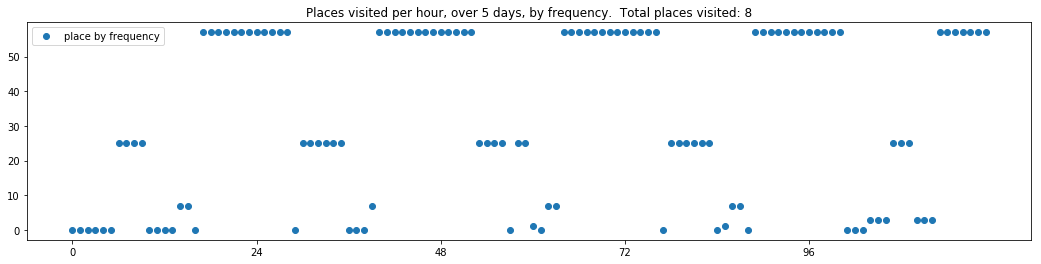

In [9]:
# These trajectories were generated randomly, without any prefix.  We inspect them to understand
# how the model replicated the data overall.

textgenrnn_all_trajectories_08_filename = '../textgenrnn_generator/output/generated-epochs:50:25-temperature:0.8-prefix:None-20191211.txt'
textgenrnn_all_trajectories_09_filename = '../textgenrnn_generator/output/generated-epochs:50:25-temperature:0.9-prefix:None-20191211.txt'
textgenrnn_all_trajectories_1_filename = '../textgenrnn_generator/output/generated-epochs:50:25-temperature:1.0-prefix:None-20191211.txt'

textgenrnn_all_trajectories_set = {
    0.8: read_trajectories_from_file(textgenrnn_all_trajectories_08_filename),
    0.9: read_trajectories_from_file(textgenrnn_all_trajectories_09_filename),
    1.0: read_trajectories_from_file(textgenrnn_all_trajectories_1_filename),
}

for (temp, trajectory_set) in textgenrnn_all_trajectories_set.items():
    print('showing sample of trajectories from output with temp %s' % temp)
    for tv in trajectory_set[:sample_size]:
        print_dwell_vector_by_days(tv)
        plot_trajectory_vector_frequencies(tv, by_frequency_order=False) 

In [10]:
# For these trajectories, we generated trajectories for each of the cambridge census tract areas as home labels.
# When comparing the real and generated output, only data with these home labels should be considered.

textgenrnn_cambridge_trajectories_08_filename = '../textgenrnn_generator/output/generated_trajectories_1_week_cambridge_temp_0.8.txt'
textgenrnn_cambridge_trajectories_09_filename = '../textgenrnn_generator/output/generated_trajectories_1_week_cambridge_temp_0.9.txt'
textgenrnn_cambridge_trajectories_1_filename = '../textgenrnn_generator/output/generated_trajectories_1_week_cambridge_temp_1.0.txt'

textgenrnn_cambridge_trajectories_set = {
    0.8: read_trajectories_from_file(textgenrnn_cambridge_trajectories_08_filename),
    0.9: read_trajectories_from_file(textgenrnn_cambridge_trajectories_09_filename),
    1.0: read_trajectories_from_file(textgenrnn_cambridge_trajectories_1_filename),
}

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]


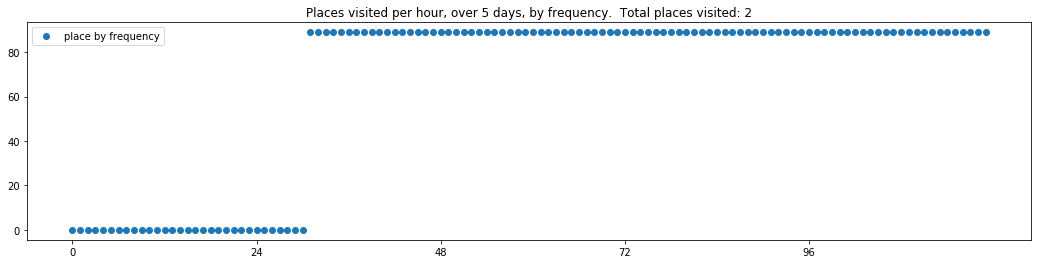

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 401, 401, 401, 401, 401, 401, 401, 401, 401]
[401, 401, 401, 401, 401, 401, 401, 0, 401, 401, 401, 248, 248, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401]
[401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, 401]


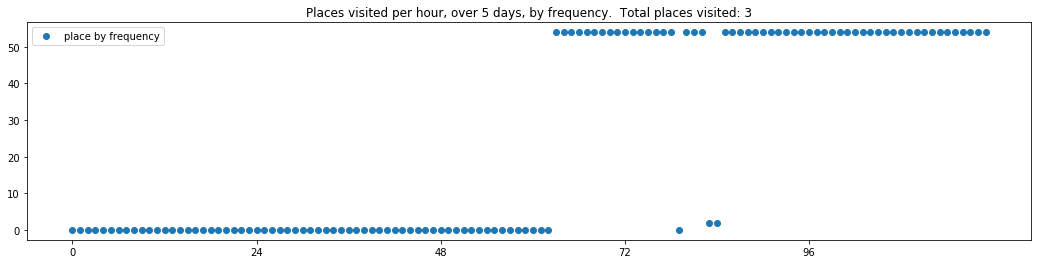

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 0, 558, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 386, 386, 386, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 386, 386, 386, 386]
[386, 386, 386, 386, 386, 386, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 386, 386, 386, 386]


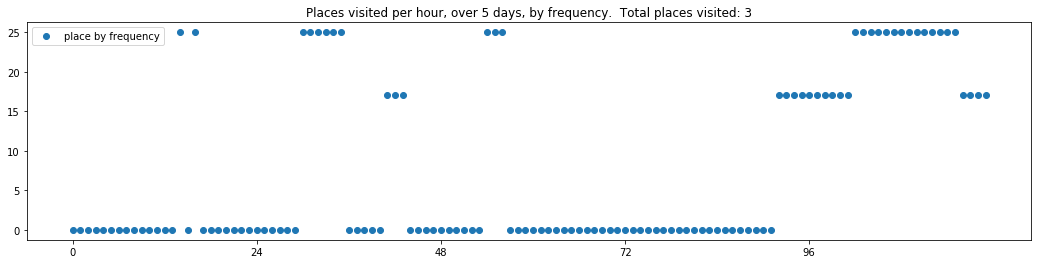

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]


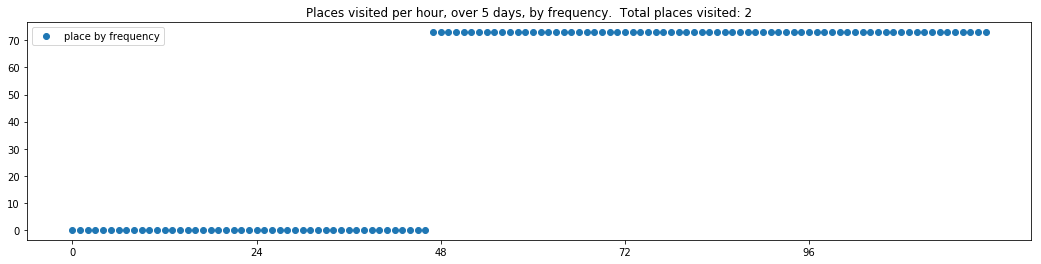

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 59, 10, 10, 0, 0, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 495, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


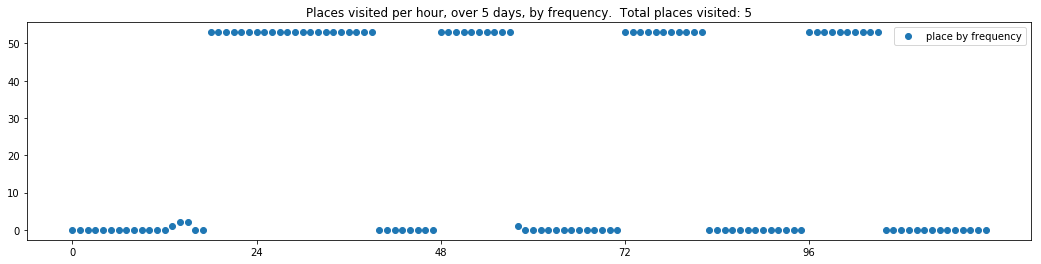

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558]
[558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558]


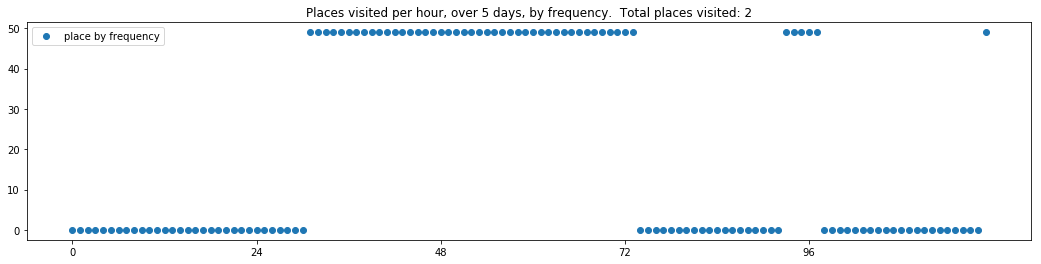

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


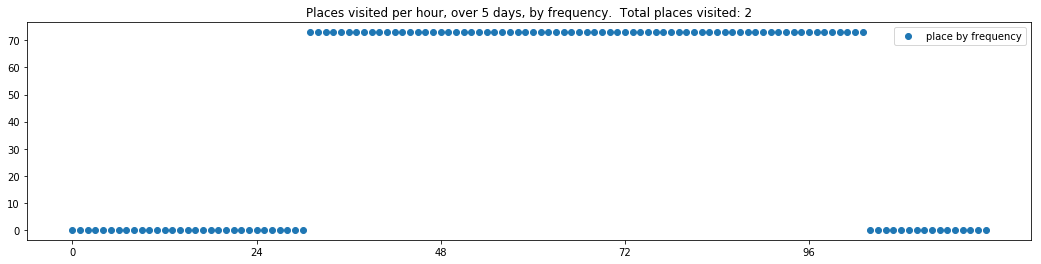

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]


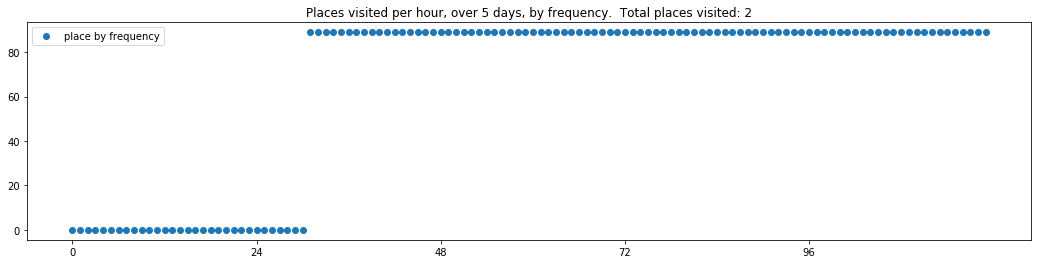

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]


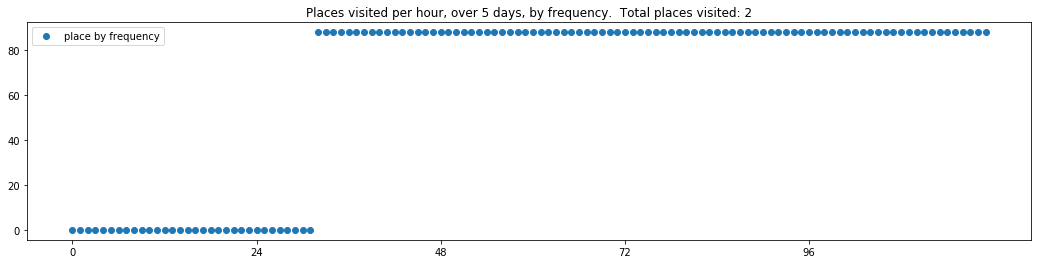

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 193, 461, 461, 461, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 558, 558, 450, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


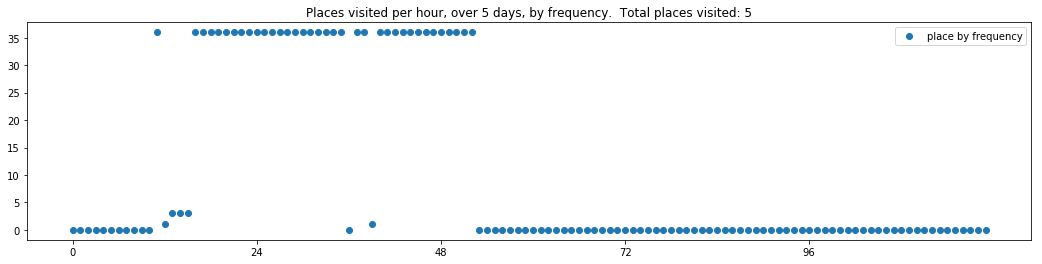

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


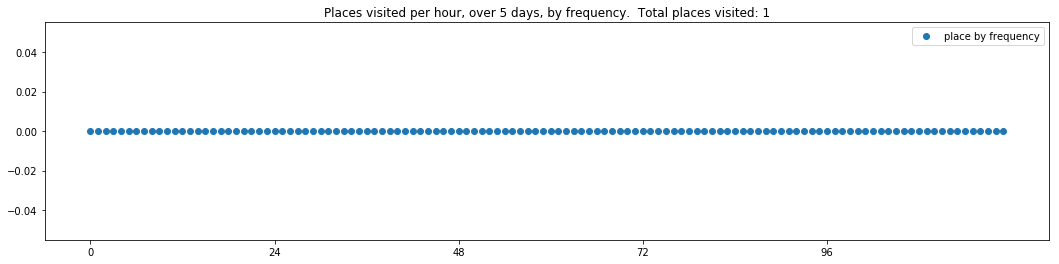

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]


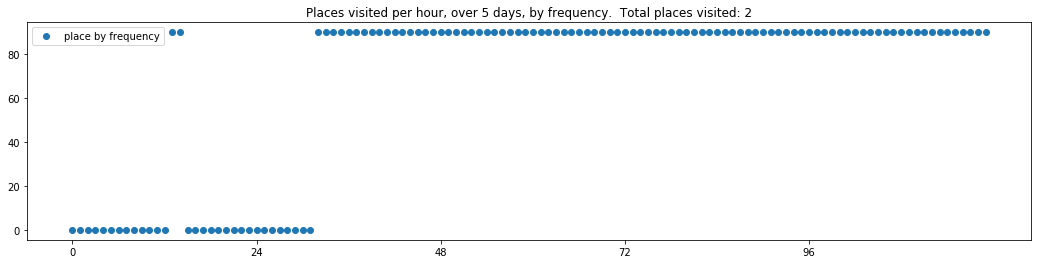

----- vector ----
prefix labels:  [558, 558]
[0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


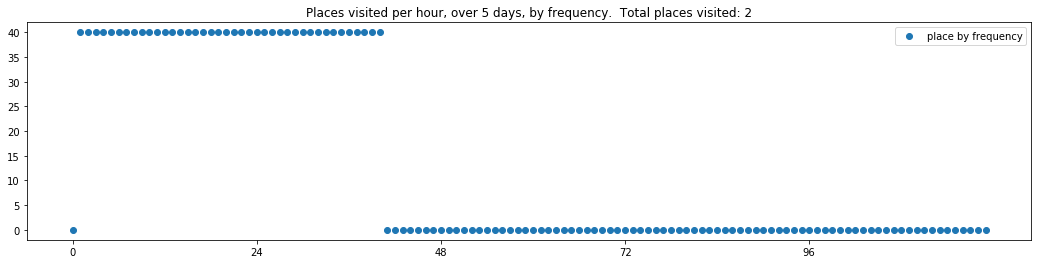

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 214]


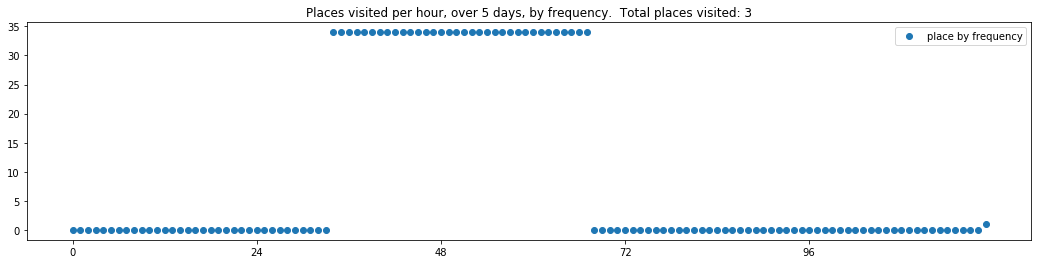

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 171, 171, 495, 558, 0, 373, 373, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 373, 373, 558, 558, 558, 558, 2, 2, 0, 0, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 2, 2, 2, 2]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0]


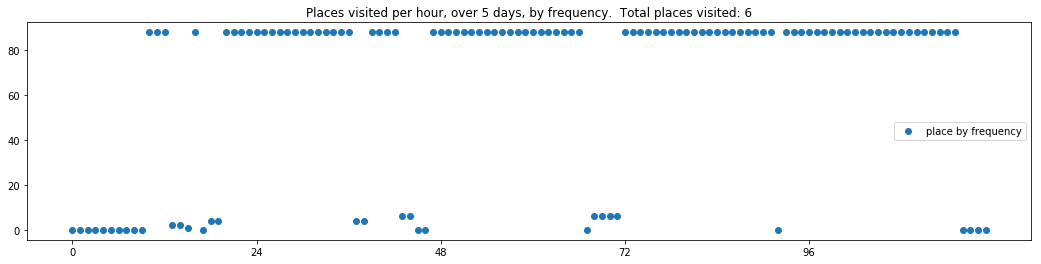

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 247, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 247, 0, 0, 0, 0, 0]


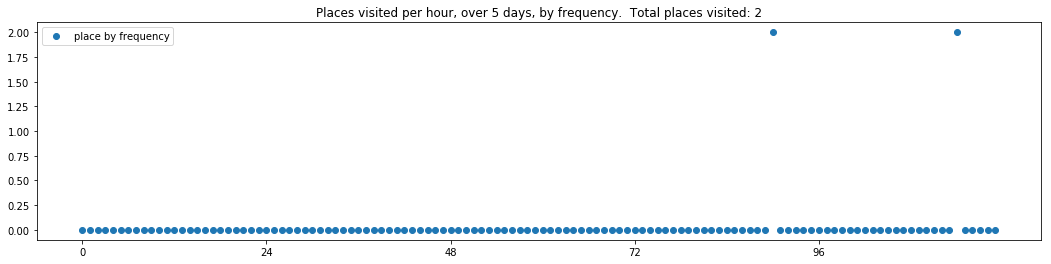

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0]


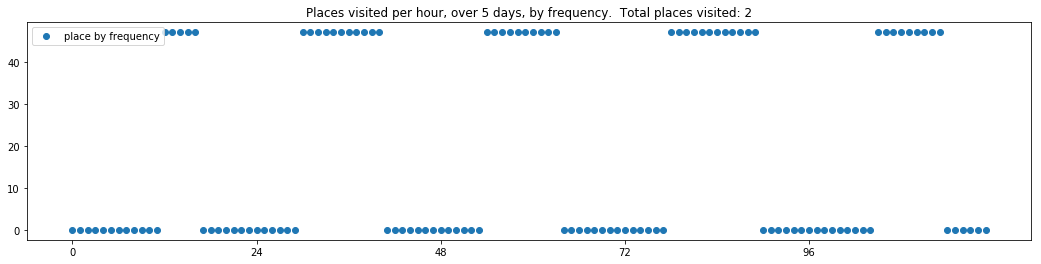

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]


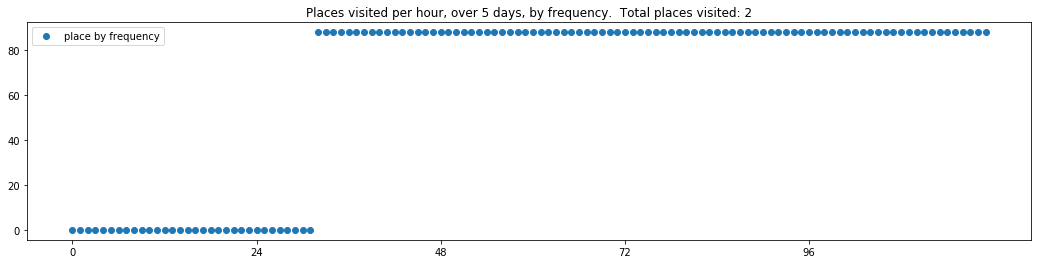

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 21, 21, 21, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 21, 21, 21, 21, 21, 21, 212, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 21, 21, 21, 21, 21, 21, 21, 21, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 21, 21, 21, 21, 21, 21, 21, 21, 21, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 485, 558, 558, 558, 558, 558, 184, 184, 184, 184, 184, 184, 558, 558]


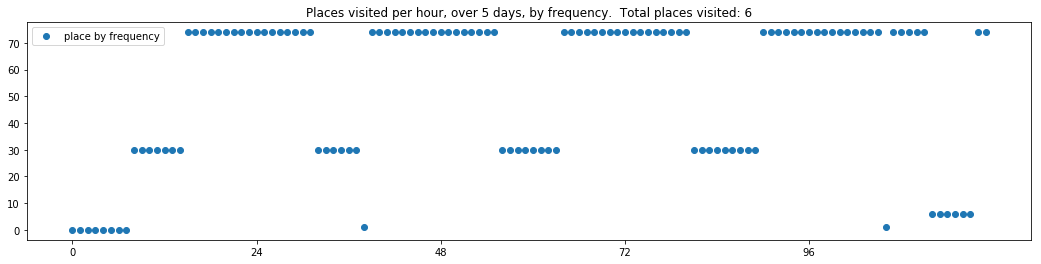

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 456, 0, 456]
[0, 0, 0, 0, 0, 0, 248, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 456, 456, 456, 0, 456]
[456, 456, 0, 456, 456, 535, 535, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 456, 456, 456, 456, 456]
[456, 456, 456, 456, 456, 456, 456, 456, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 456, 456, 456, 456, 456]
[456, 456, 456, 456, 456, 456, 456, 401, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 456, 456, 456, 456, 456, 456]


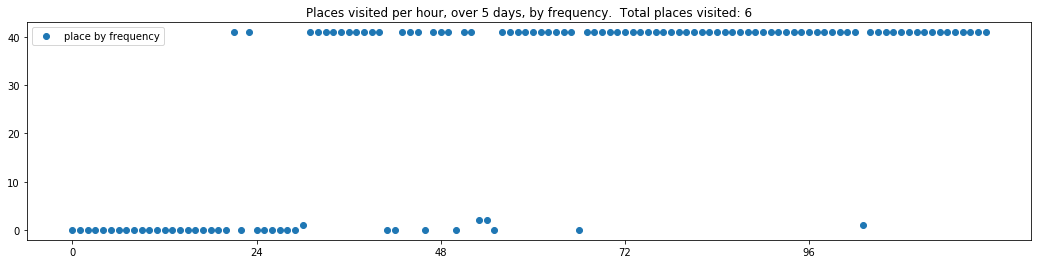

In [11]:
for tv in textgenrnn_cambridge_trajectories_set[0.8][:sample_size]:
    print_dwell_vector_by_days(tv)
    plot_trajectory_vector_frequencies(tv, by_frequency_order=False) 

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 8, 8, 21, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 450, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 267, 212, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 0, 0, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 558, 558, 558, 558, 558, 558, 558, 558, 558]


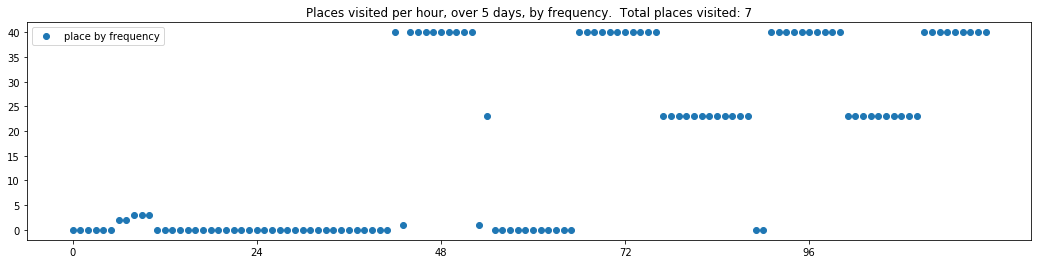

----- vector ----
prefix labels:  [558, 558]
[0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 558, 558, 0, 558, 558, 558, 558, 0, 0, 57]
[57, 57, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 558, 0, 558, 558, 0, 0, 0]
[0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 20, 20, 20, 0, 0, 0, 0, 637]
[637, 637, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


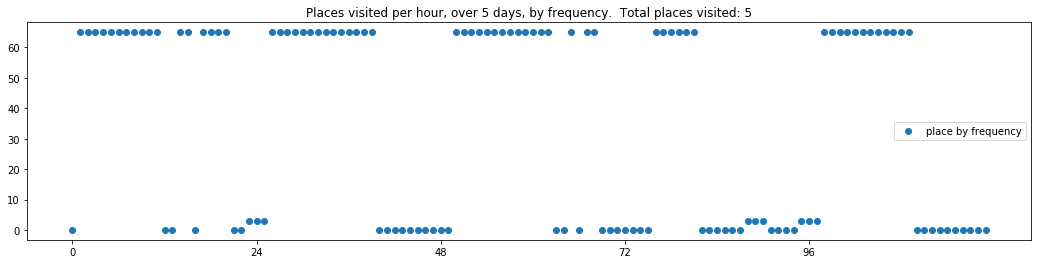

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 204, 204, 204, 151, 558, 558, 558, 558, 558, 448, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 497, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 0, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0]


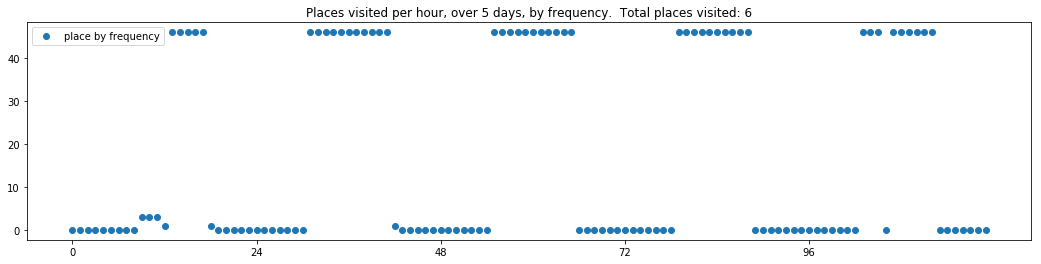

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 56, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


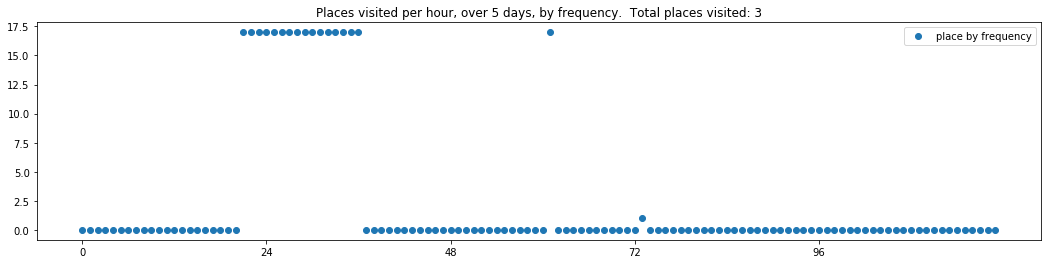

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 0, 0, 0, 558, 558, 558, 558, 132, 132, 373, 373, 373, 373, 373, 373]
[373, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 464, 464, 558, 558, 558, 0, 450, 450, 450, 450, 450, 0, 0]
[0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 558, 558, 637, 637, 558, 558, 558, 558, 450, 566, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 558, 473, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0]


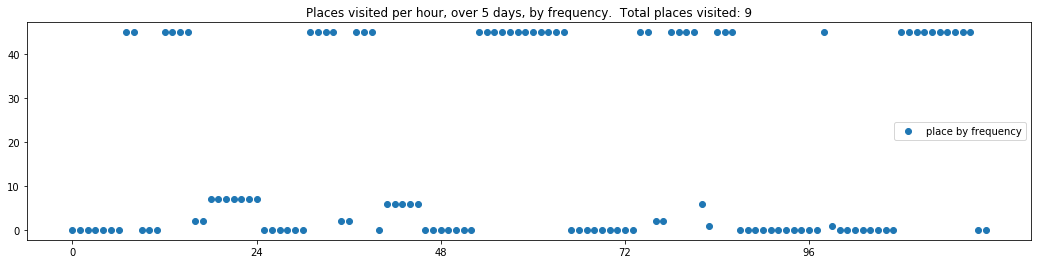

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 21, 21, 21, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 55, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 55, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


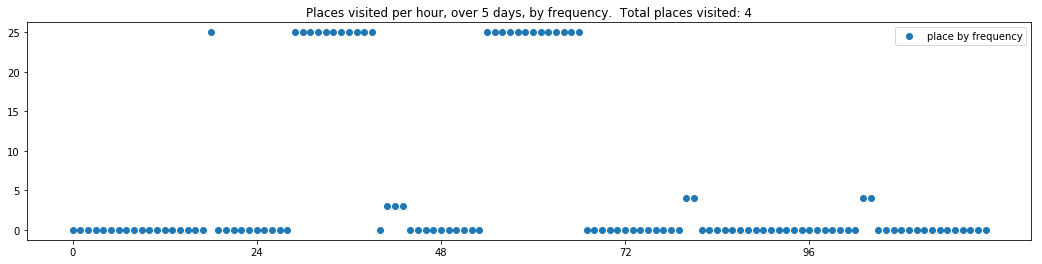

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 298, 298, 0, 0, 0, 0, 0, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 261, 373, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 97, 0, 473, 21, 97, 0, 0, 394, 495, 495, 495, 495, 0, 0, 0, 0, 0]
[558, 558, 558, 558, 558, 482, 558, 558, 558, 558, 558, 558, 228, 452, 452, 0, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 50, 50, 0, 0, 0, 495, 495, 495, 495, 495, 495, 558, 558, 558, 558]


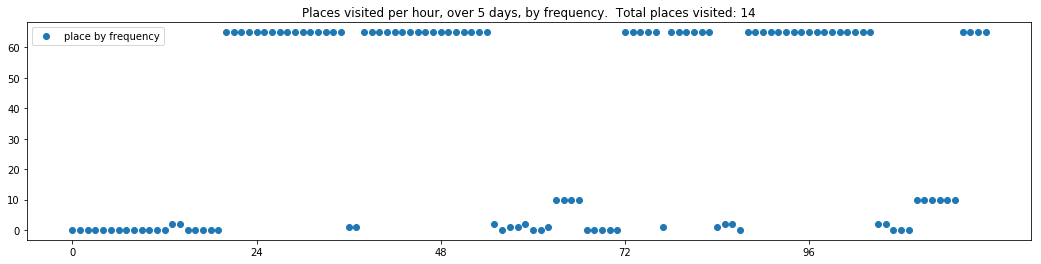

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 0, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 0, 0, 0, 0, 558, 558, 558, 0, 0, 0, 341, 341, 341, 0, 0]
[0, 0, 0, 341, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 0, 522, 0, 0, 0, 0, 341, 341]
[341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 0, 0, 0, 0, 0, 0, 0, 341, 0]


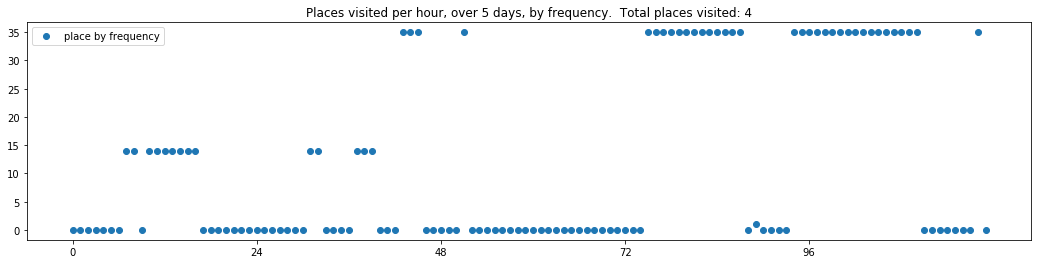

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 558, 450, 450, 450, 450, 450, 450, 450, 450, 558, 558, 558, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 558, 450, 450, 450, 450, 450, 450, 450, 450, 450, 450, 119, 119, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 119, 0, 0, 450, 450, 450, 450, 450, 450, 450, 450, 450, 119, 119, 119, 119, 119, 119, 119]
[119, 119, 119, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 315, 315, 315, 0]
[119, 119, 119, 227, 119, 267, 267, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


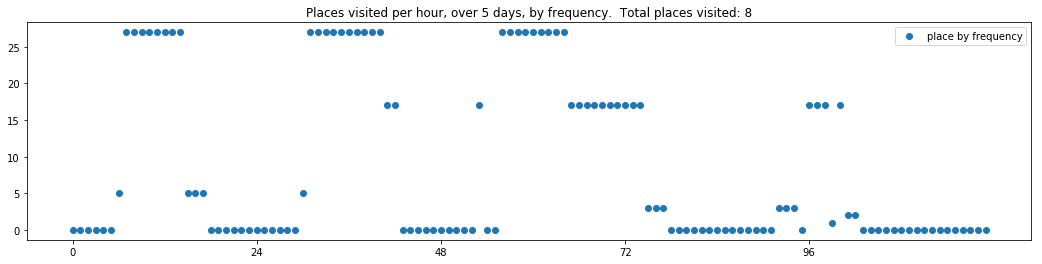

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 145, 576, 576, 576, 85, 0, 0]
[0, 0, 0, 0, 576, 576, 576, 576, 576, 576, 558, 558, 558, 558, 558, 558, 558, 558, 0, 576, 576, 85, 85, 0]


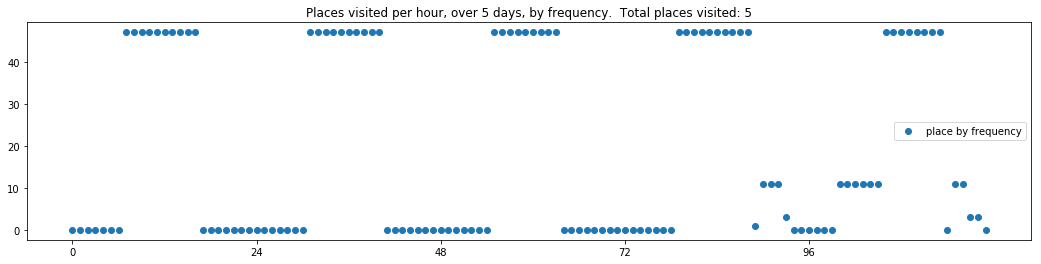

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 183, 183, 183, 0, 0, 0]
[0, 0, 0, 0, 0, 558, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 151, 151, 78, 78, 78, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


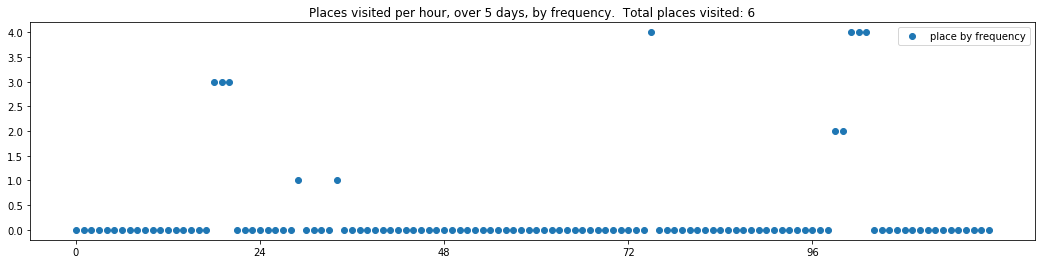

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 447, 447, 183, 183, 184, 184, 184, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 373, 373, 261, 558, 564, 57, 326, 326, 450, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 603, 485, 349, 558, 183, 183, 21, 21, 21, 430, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 274, 558, 558, 558, 558, 558, 558, 495, 495, 644]
[644, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 430, 558, 558, 558, 558, 558, 558, 430, 430, 495, 644]


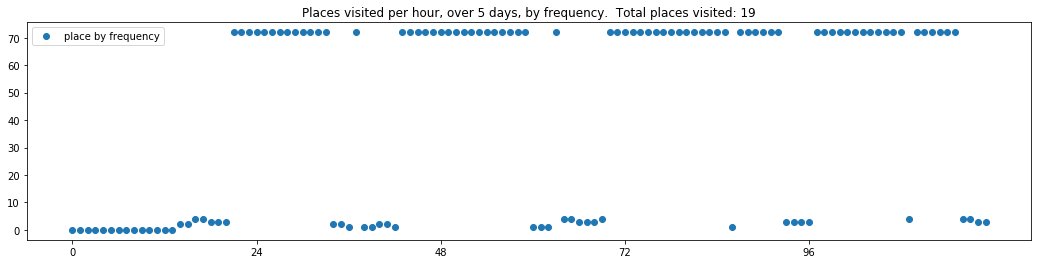

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 558, 0, 0, 558, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 33, 33, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558]
[558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 0, 0, 558, 558, 558, 558]


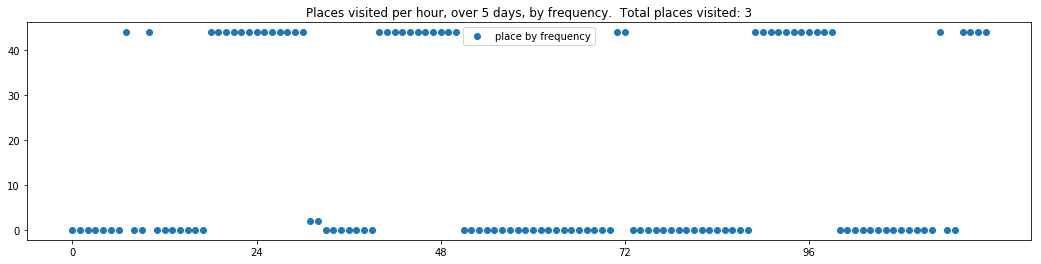

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 450, 0, 0, 0, 0, 0, 0, 558, 88, 0, 4, 0, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 0, 450, 450, 450, 0, 0, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 558, 0, 0, 0, 450, 450, 171, 171, 260, 0, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 450, 450, 450, 450, 450, 450, 450, 450, 450, 450, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 450, 450, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0]


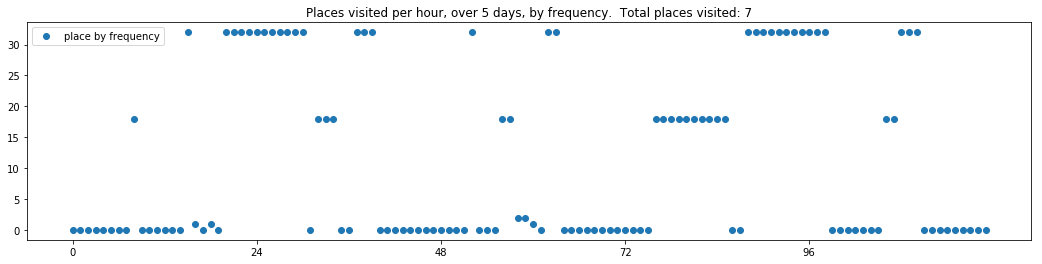

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 287, 287, 287, 558, 558, 287, 287, 287]
[287, 287, 287, 287, 287, 287, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[287, 287, 287, 287, 287, 287, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 287, 287, 287, 287, 287]
[287, 287, 287, 287, 287, 287, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 0, 0, 0, 0, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287, 287]


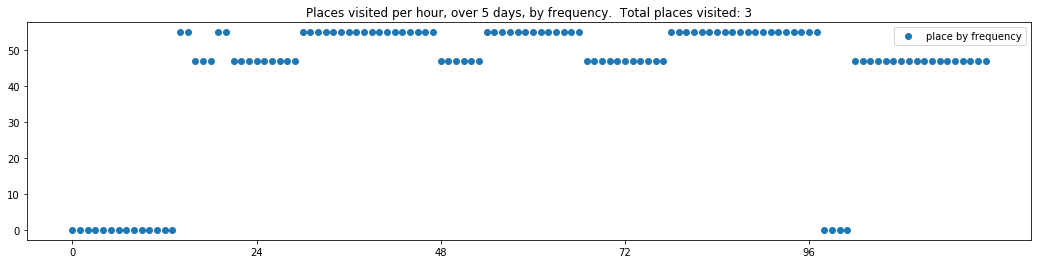

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 323, 323, 558, 76, 76, 558, 558, 373, 558, 558, 558, 267, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 464, 558, 558, 558, 373, 50, 558, 558, 0, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 74, 74, 100, 0, 235, 267, 386, 133, 558, 558, 558, 558, 450, 450, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 267, 267, 485, 485, 221, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 267, 267, 373, 373, 373, 373, 373, 373, 558, 558, 558, 558, 558, 558, 56, 56, 56, 56, 56, 56, 386]


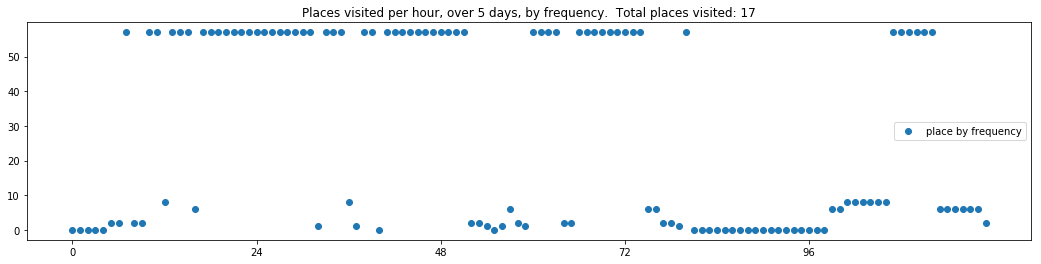

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 0, 0, 558, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[130, 130, 130, 130, 130, 130, 130, 130, 130, 130, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 130, 130, 130, 130]


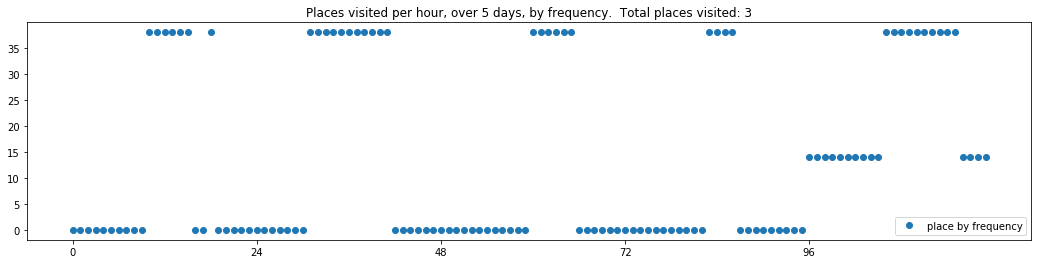

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 430, 326, 558, 558, 558, 558, 558, 430, 382, 276, 558, 450, 450, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 271, 271, 271, 271, 271, 22, 22, 22, 450, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 271, 271, 22, 22, 22, 22, 22, 22, 22, 162, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 349, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 396, 177, 329, 20, 0, 0, 22, 22, 22, 329, 558, 558, 558, 558]


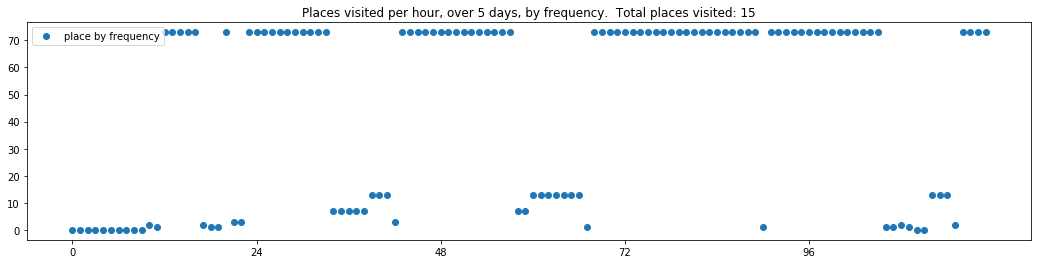

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 374, 42, 558, 558, 558, 558, 558, 558, 321, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 545, 545, 545, 369, 464, 558, 558, 0, 0, 0, 0]
[0, 0, 485, 373, 545, 0, 0, 0, 0, 0, 0, 0, 299, 299, 558, 558, 15, 15, 15, 15, 15, 15, 15, 15]
[15, 0, 0, 94, 94, 94, 0, 0, 0, 0, 0, 0, 373, 373, 573, 573, 261, 261, 0, 0, 0, 0, 0, 15]
[15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 15, 15, 15, 15, 15, 334]


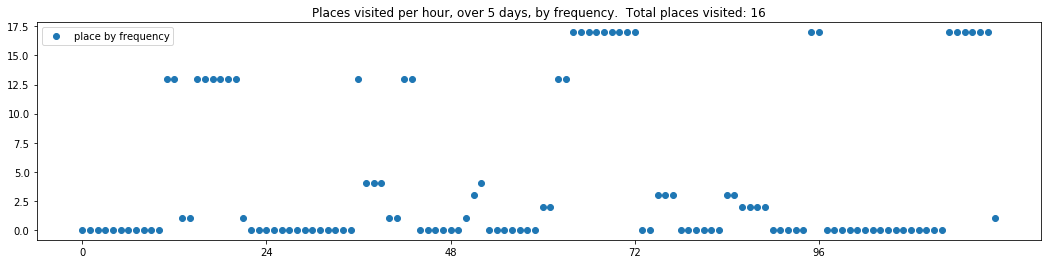

----- vector ----
prefix labels:  [558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 558, 558, 558, 558]
[558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 410, 0, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 69, 185, 171, 558, 558, 0, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 541, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 485, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 541, 541, 541, 0, 0, 0, 0, 541, 541, 20, 0, 541]


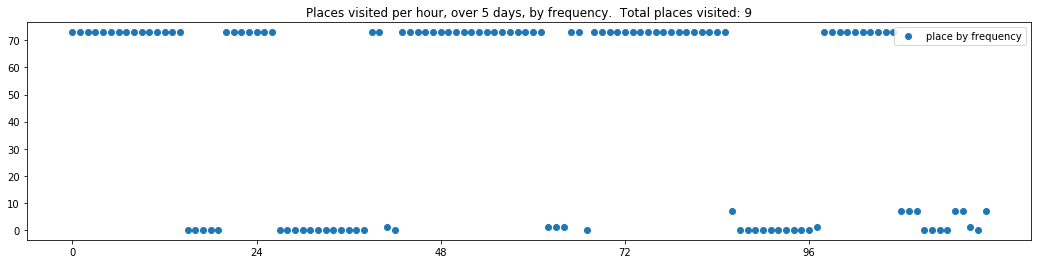

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 183, 183, 183, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 183, 183, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 0, 183, 183, 183, 183, 183, 183, 183, 183, 0, 0, 0, 0, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 386, 386, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]


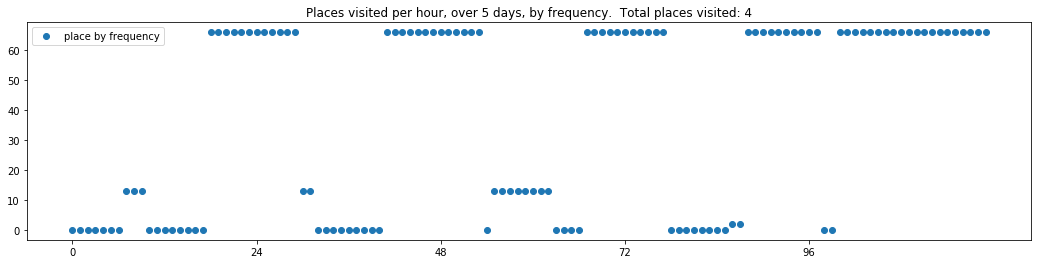

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 385, 20, 0, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0]
[20, 0, 0, 0, 0, 0, 0, 0, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 558, 558, 558, 558, 558, 558]


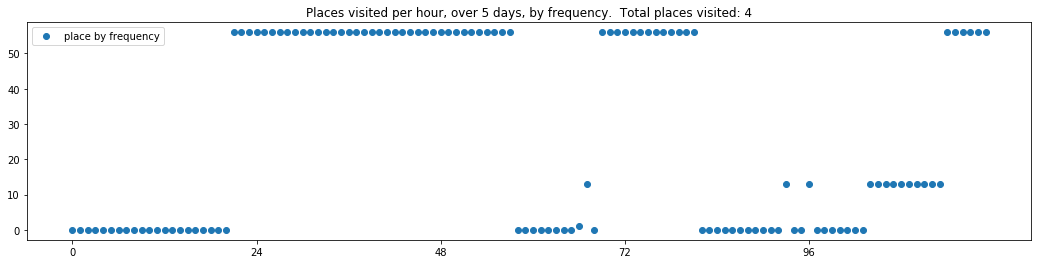

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 558, 0, 558, 0, 0, 0, 0, 0, 558, 0, 0, 558, 76, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 474, 0, 0, 0, 330, 330, 330, 558, 558, 558, 558, 558, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 290, 290, 290, 290, 290, 644, 290, 290, 0, 0, 288, 288, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 450, 450, 498, 498, 558, 558]
[558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 290, 290, 290, 290, 558, 0, 0, 0, 0, 0]


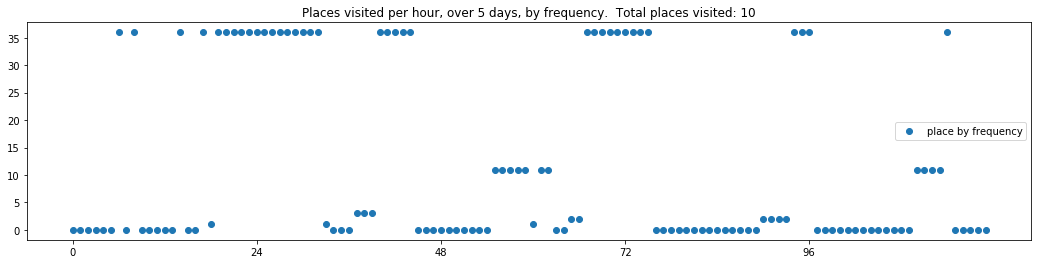

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 236, 236, 236, 236, 558, 558, 236, 236, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 236, 236, 236, 236, 236, 236, 236, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 236, 236, 236, 236, 0, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 545, 545, 545, 373, 236, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 76, 76, 76, 76, 76, 374, 386, 386, 573, 0, 0, 0, 0, 0]


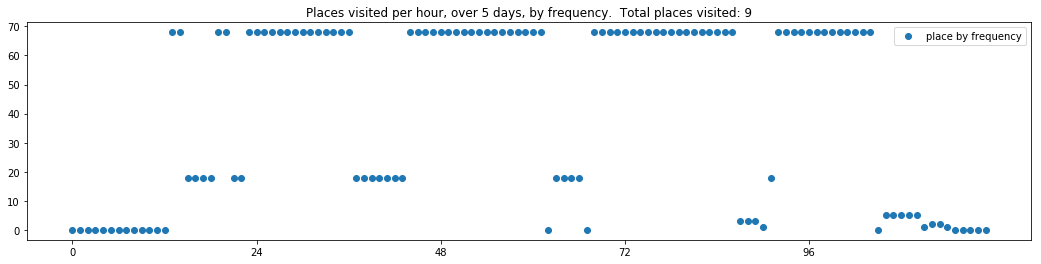

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0]
[0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 450, 373, 373, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 10, 10, 10, 10, 10, 558, 558, 558, 558, 558]


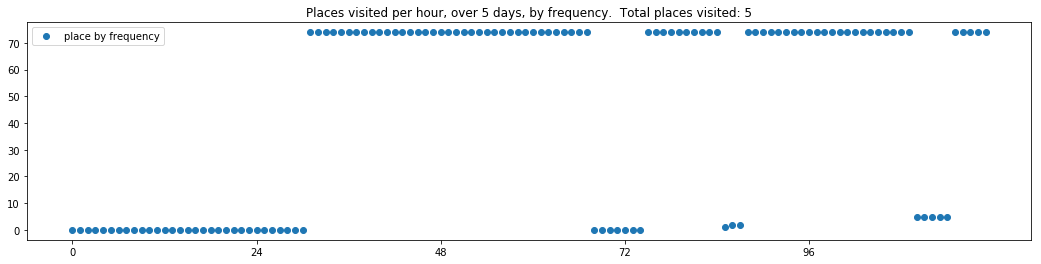

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 346, 132, 132, 132, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 4, 4, 4, 4, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 558, 558, 558]
[0, 0, 0, 0, 0, 317, 317, 317, 317, 317, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 0, 0, 0, 558, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0]


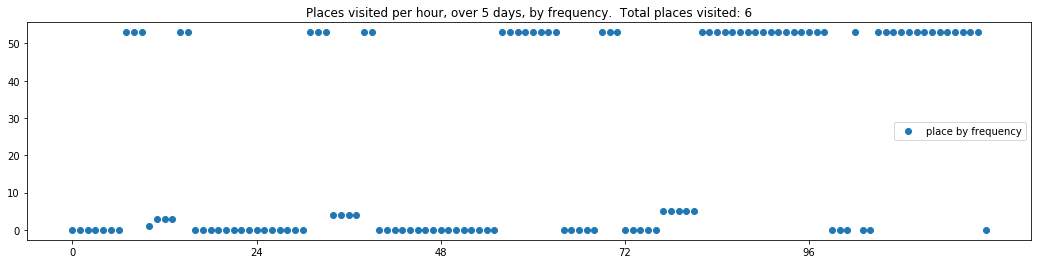

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 558, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]


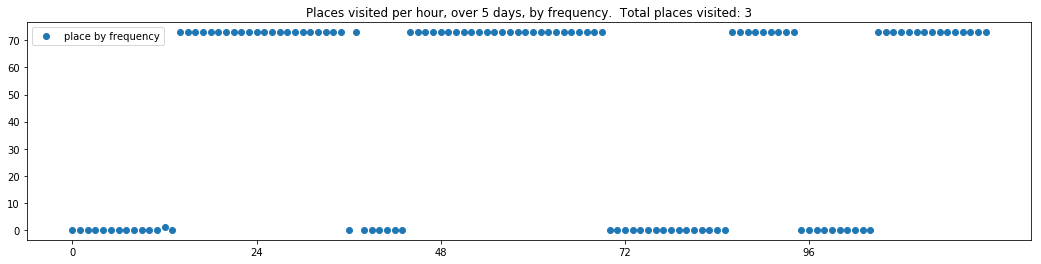

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 364, 364, 364, 0, 100, 100, 552, 21, 21, 21, 21, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558]
[558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[389, 389, 389, 389, 389, 389, 389, 389, 389, 389, 389, 389, 389, 389, 389, 389, 389, 0, 0, 0, 0, 0, 0, 0]


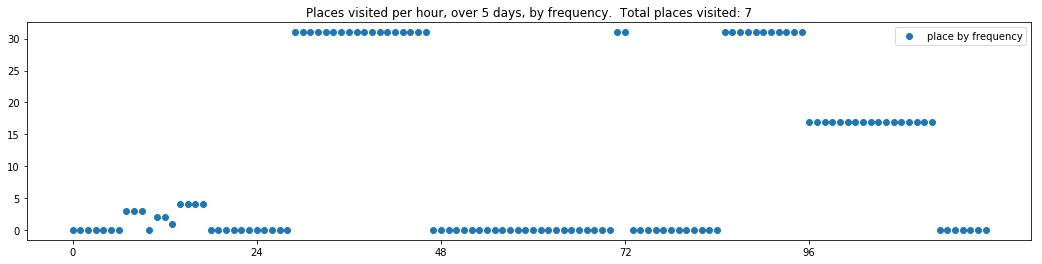

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0]


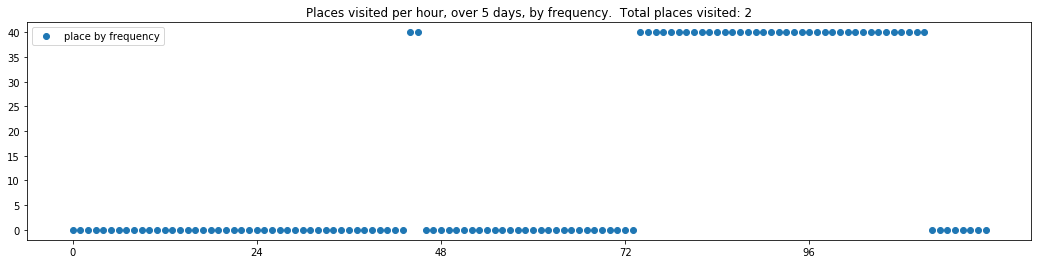

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 574, 558, 558, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 274, 0, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 558, 558, 558]
[0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 157, 432, 24, 24, 0, 558, 558, 558]


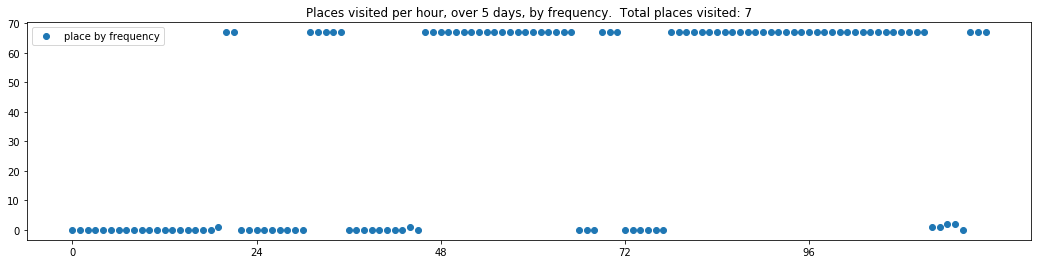

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 143, 143, 143, 143, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 430, 430, 430, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 430, 430, 430, 430, 430]
[430, 430, 430, 430, 430, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 430, 430, 430, 430, 430]
[430, 430, 430, 430, 430, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 430, 430, 430, 430]


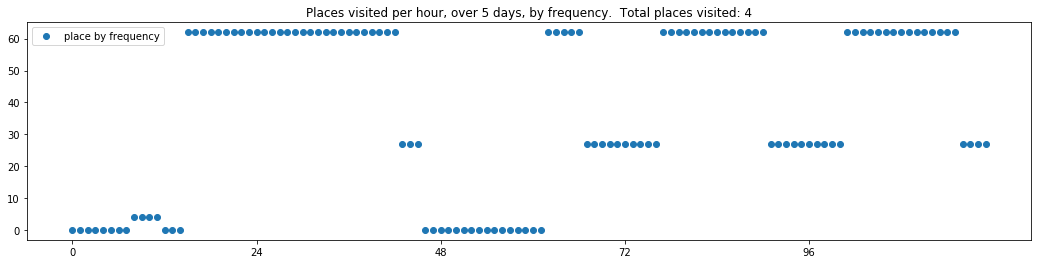

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 173, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 90, 90, 0, 0, 0, 0, 0, 0, 84, 84, 84, 84, 84, 20, 274, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84, 84, 84, 84, 84, 84, 84, 84]
[84, 84, 458, 0, 0, 0, 90, 0, 122, 0, 0, 0, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84]


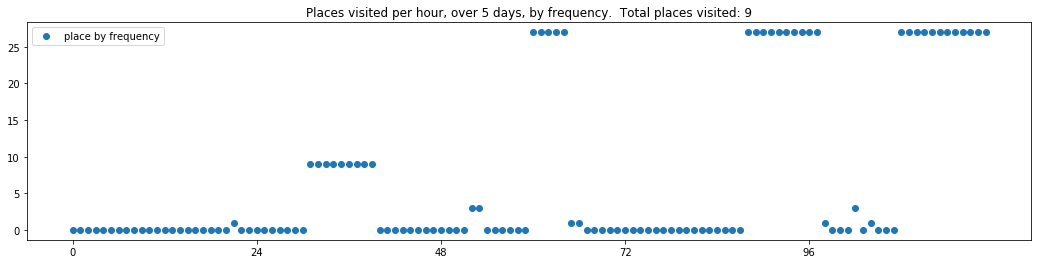

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 236, 236, 558, 558, 0, 0, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 558, 558, 558, 558, 184, 0, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 20, 20, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


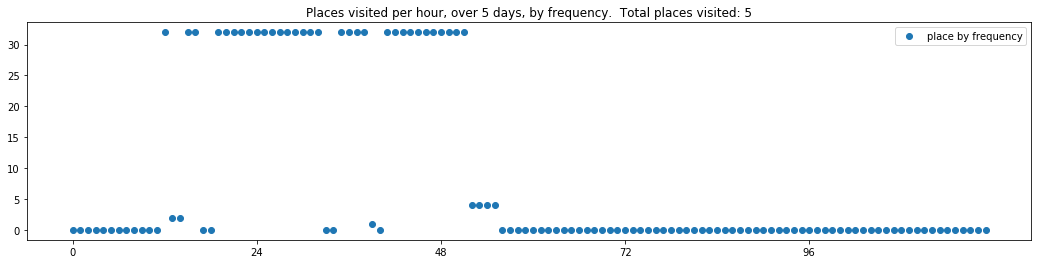

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]


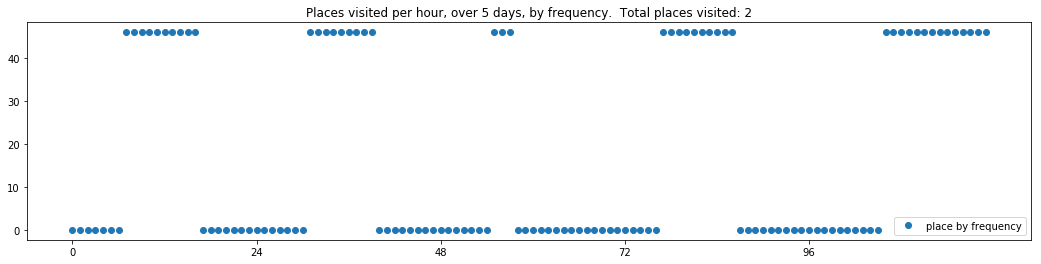

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 0, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558]


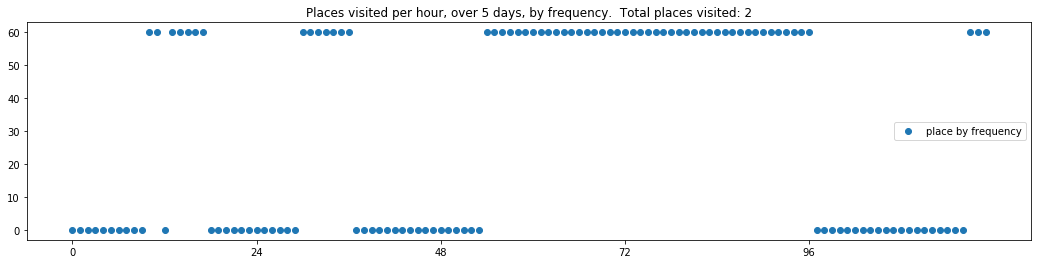

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 571, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 2, 2, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 337, 218, 218, 218, 0, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0]


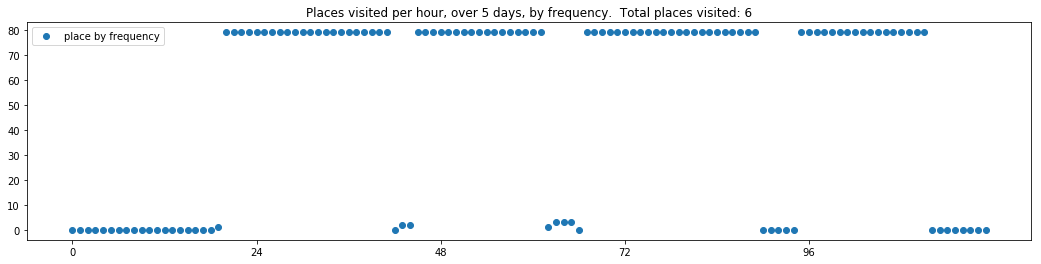

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 450, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 0, 450, 545, 545, 0, 0, 450, 450, 0, 558, 558, 558, 558, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 558, 450, 450, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 0, 0, 558, 558, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 450, 450, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0]


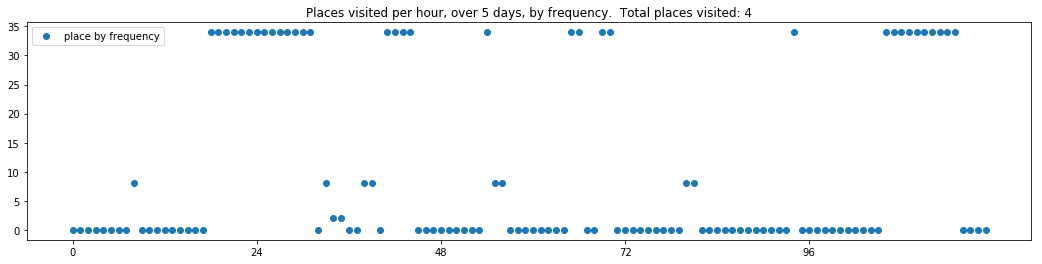

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 323, 495, 495, 495, 495, 603, 386, 386, 386, 386, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 162, 302, 495, 495, 495, 495, 495, 495, 495, 495, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 495, 495, 545, 545, 545, 162, 334, 334, 545, 545, 119, 450]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 519, 519, 571, 271, 545, 404, 447, 0, 0]


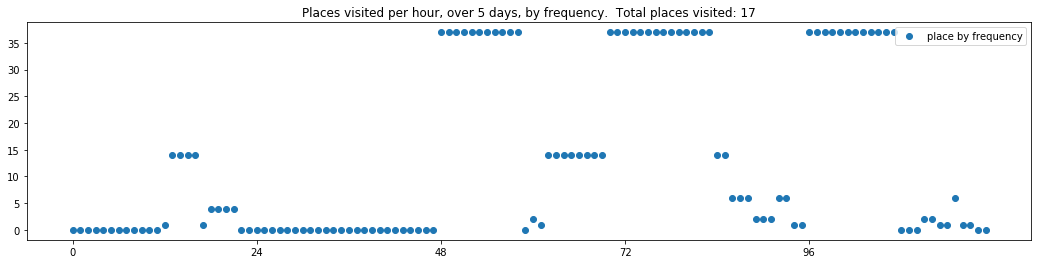

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 558, 373, 373, 373, 373, 373, 373, 373, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 558, 373, 373, 373, 373, 373, 373, 373, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 146, 224]
[4, 4, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 4]


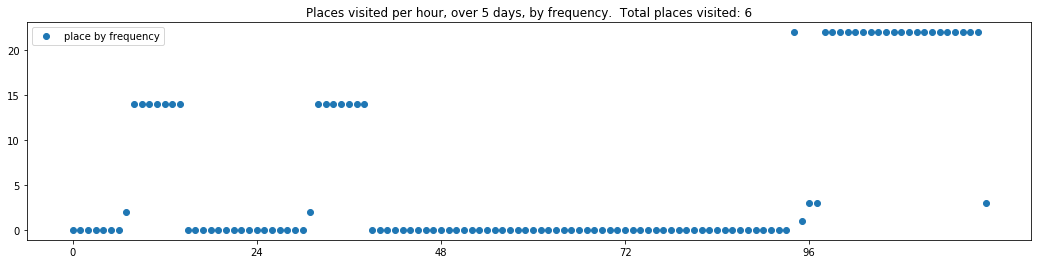

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 434, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 258]


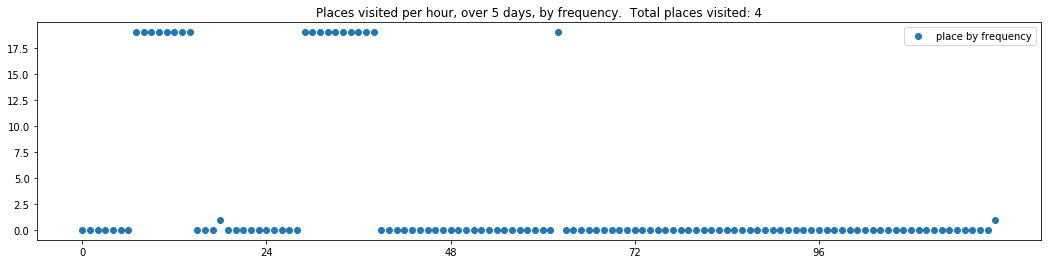

In [12]:
for tv in textgenrnn_cambridge_trajectories_set[1.0][:2*sample_size]:
    print_dwell_vector_by_days(tv)
    plot_trajectory_vector_frequencies(tv, by_frequency_order=False) 

## Models Matrix for Parameter Comparisons

A bunch of models were trained with differenet parameters. Then they generated synthetic trajectoriesfollowing the same rules.
In the below matrix, each column is a list of parameters that were used to generate synthetic trajectories.
We use these parameters to read in the trajectories, and then evaluate each set of parameters by how well the trajectories their model produced performs as per our set of evaluators.

In [511]:
models_matrix_df = pd.read_csv('../textgenrnn_generator/textgenrnn_model_parameters_.csv', index_col=0)
models_matrix_df.loc['rnn_bidirectional'] = (models_matrix_df.loc['rnn_bidirectional'] == 'TRUE')
models_matrix_df = models_matrix_df.loc[models_matrix_df.index.dropna()]

Read in the trajectories produced for each set of parameters.  I.e. a trajectories file for each column.

In [512]:
# first add a row for the generated trajectories names
generated_trajectories_name_idx = 'generated_trajectories_name'
row = pd.Series({c:'' for c in models_matrix_df.columns}, name=generated_trajectories_name_idx)
models_matrix_df = models_matrix_df.append(row)
models_matrix_df

default default.1 default.2      A    A.1    A.2  \
rnn_bidirectional              False     False     False  False  False  False   
max_length                        24        24        24     24     24     24   
rnn_layers                         2         2         2      3      3      3   
rnn_size                         128       128       128    128    128    128   
dropout                          0.1       0.1       0.1    0.1    0.1    0.1   
dim_embeddings                    50        50        50     50     50     50   
temperature                      0.8       0.9         1    0.8    0.9      1   
batch size                       512       512       512    512    512    512   
generated for cambridge          GPU       yes       yes    yes    yes    yes   
generated for general sample     GPU       yes       yes   TODO   TODO    NaN   
generated_trajectories_name                                                     

                                  B    B.1    B.2      C        ...         \
rnn_bidirectional             False  False  False  False        ...          
max_length                       24     24     24     24        ...          
rnn_layers                        2      2      2      2        ...          
rnn_size                        256    256    256    128        ...          
dropout                         0.1    0.1    0.1    0.2        ...          
dim_embeddings                   50     50     50     50        ...          
temperature                     0.8    0.9      1    0.8        ...          
batch size                      512    512    512    512        ...          
generated for cambridge          no     no     no    yes        ...          
generated for general sample    yes    yes    yes   done        ...          
generated_trajectories_name                                     ...          

                             R-bidirectional.2 S-bidirectional  \
rnn_bidirectional                         True            True   
max_length                                  50              50   
rnn_layers                                   3               2   
rnn_size                                   128             128   
dropout                                    0.1             0.1   
dim_embeddings                              64             128   
temperature                                  1             0.8   
batch size                                1024            1024   
generated for cambridge                    NaN             NaN   
generated for general sample               NaN             NaN   
generated_trajectories_name                                      

                             S-bidirectional.1 S-bidirectional.2  \
rnn_bidirectional                         True              True   
max_length                                  50                50   
rnn_layers                                   2                 2   
rnn_size                                   128               128   
dropout                                    0.1               0.1   
dim_embeddings                             128               128   
temperature                                0.9                 1   
batch size                                1024              1024   
generated for cambridge                    NaN               NaN   
generated for general sample               NaN               NaN   
generated_trajectories_name                                        

                             T-bidirectional T-bidirectional.1  \
rnn_bidirectional                       True              True   
max_length                                50                50   
rnn_layers                                 2                 2   
rnn_size                                 256               256   
dropout                                  0.3               0.3   
dim_embeddings                           100               100   
temperature                              0.8   

In [513]:
# Save in memory a mapping of {generated_trajectories_name -> list of trajectories}
# where the generated_trajectories_name is determined by the models parameters
generated_sample_trajectories_map = {}

for column_name in models_matrix_df.columns:
    col = models_matrix_df[column_name]
    model_name = 'trajectories-rnn_bidirectional:{}-max_len:{}-rnn_layers:{}-rnn_size:{}-dropout:{}-dim_embeddings:{}'.format(
        col['rnn_bidirectional'],col['max_length'],col['rnn_layers'],col['rnn_size'],col['dropout'],col['dim_embeddings'])
    generated_trajectories_name = 'generated-sample-{}-temperature:{}'.format(
        model_name, float(col['temperature']))

    try:
        generated_trajectories_filepath = '../textgenrnn_generator/output/{}.txt'.format(generated_trajectories_name)
        generated_trajectories = read_trajectories_from_file(generated_trajectories_filepath)
        models_matrix_df.loc[generated_trajectories_name_idx][column_name] = generated_trajectories_name
        generated_sample_trajectories_map[generated_trajectories_name] = generated_trajectories
    except FileNotFoundError as e:
        print(e)
        print('dropping column for', generated_trajectories_name)
        models_matrix_df.drop(columns=[column_name], inplace=True)
    continue
    
models_matrix_df

[Errno 2] No such file or directory: '../textgenrnn_generator/output/generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.8.txt'
dropping column for generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.8
[Errno 2] No such file or directory: '../textgenrnn_generator/output/generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.9.txt'
dropping column for generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.9
[Errno 2] No such file or directory: '../textgenrnn_generator/output/generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:1.0.txt'
dropping column for generated-sample-trajectories-rnn

[Errno 2] No such file or directory: '../textgenrnn_generator/output/generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:2-rnn_size:256-dropout:0.3-dim_embeddings:100-temperature:0.8.txt'
dropping column for generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:2-rnn_size:256-dropout:0.3-dim_embeddings:100-temperature:0.8
[Errno 2] No such file or directory: '../textgenrnn_generator/output/generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:2-rnn_size:256-dropout:0.3-dim_embeddings:100-temperature:0.9.txt'
dropping column for generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:2-rnn_size:256-dropout:0.3-dim_embeddings:100-temperature:0.9
[Errno 2] No such file or directory: '../textgenrnn_generator/output/generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:2-rnn_size:256-dropout:0.3-dim_embeddings:100-temperature:1.0.txt'
dropping column for generated-sample-trajectories-rnn

default  \
rnn_bidirectional                                                         False   
max_length                                                                   24   
rnn_layers                                                                    2   
rnn_size                                                                    128   
dropout                                                                     0.1   
dim_embeddings                                                               50   
temperature                                                                 0.8   
batch size                                                                  512   
generated for cambridge                                                     GPU   
generated for general sample                                                GPU   
generated_trajectories_name   generated-sample-trajectories-rnn_bidirectiona...   

                                                                      default.1  \
rnn_bidirectional                                                         False   
max_length                                                                   24   
rnn_layers                                                                    2   
rnn_size                                                                    128   
dropout                                                                     0.1   
dim_embeddings                                                               50   
temperature                                                                 0.9   
batch size                                                                  512   
generated for cambridge                                                     yes   
generated for general sample                                                yes   
generated_trajectories_name   generated-sample-trajectories-rnn_bidirectiona...   

                                                                      default.2  \
rnn_bidirectional                                                         False   
max_length                                                                   24   
rnn_layers                                                                    2   
rnn_size                                                                    128   
dropout                                                                     0.1   
dim_embeddings                                                               50   
temperature                                                                   1   
batch size                                                                  512   
generated for cambridge                                                     yes   
generated for general sample                                                yes   
generated_trajectories_name   generated-sample-trajectories-rnn_bidirectiona...   

                                                                              B  \
rnn_bidirectional                                                         False   
max_length                                                                   24   
rnn_layers                                                                    2   
rnn_size                                                                    256   
dropout                                                                     0.1   
dim_embeddings                                                               50   
temperature                                                                 0.8   
batch size                                                                  512   
generated for cambridge                                                      no   
generated for general sample                                                yes   
generated_trajectories_name   generated-sample-trajectories-rnn_bidirectiona...   

                                                                            B.1  \
r

In [514]:
# And add in these other ones...
# TODO: update this to rename trajectories/models by  parameters and better fit in pipeline

cs = [
    'generated-sample-synthetic_trajectories-temperature:0.8',
    'generated-sample-synthetic_trajectories-temperature:0.9',
    'generated-sample-synthetic_trajectories-temperature:1.0',
]
for c in cs:
    models_matrix_df[c] = [[np.nan]]*len(models_matrix_df)
    generated_trajectories_name = c
    generated_trajectories_filepath = '../textgenrnn_generator/output/{}.txt'.format(generated_trajectories_name)
    generated_trajectories = read_trajectories_from_file(generated_trajectories_filepath)
    models_matrix_df.loc[generated_trajectories_name_col][c] = generated_trajectories_name
    generated_sample_trajectories_map[generated_trajectories_name] = generated_trajectories

models_matrix_df

default  \
rnn_bidirectional                                                         False   
max_length                                                                   24   
rnn_layers                                                                    2   
rnn_size                                                                    128   
dropout                                                                     0.1   
dim_embeddings                                                               50   
temperature                                                                 0.8   
batch size                                                                  512   
generated for cambridge                                                     GPU   
generated for general sample                                                GPU   
generated_trajectories_name   generated-sample-trajectories-rnn_bidirectiona...   

                                                                      default.1  \
rnn_bidirectional                                                         False   
max_length                                                                   24   
rnn_layers                                                                    2   
rnn_size                                                                    128   
dropout                                                                     0.1   
dim_embeddings                                                               50   
temperature                                                                 0.9   
batch size                                                                  512   
generated for cambridge                                                     yes   
generated for general sample                                                yes   
generated_trajectories_name   generated-sample-trajectories-rnn_bidirectiona...   

                                                                      default.2  \
rnn_bidirectional                                                         False   
max_length                                                                   24   
rnn_layers                                                                    2   
rnn_size                                                                    128   
dropout                                                                     0.1   
dim_embeddings                                                               50   
temperature                                                                   1   
batch size                                                                  512   
generated for cambridge                                                     yes   
generated for general sample                                                yes   
generated_trajectories_name   generated-sample-trajectories-rnn_bidirectiona...   

                                                                              B  \
rnn_bidirectional                                                         False   
max_length                                                                   24   
rnn_layers                                                                    2   
rnn_size                                                                    256   
dropout                                                                     0.1   
dim_embeddings                                                               50   
temperature                                                                 0.8   
batch size                                                                  512   
generated for cambridge                                                      no   
generated for general sample                                                yes   
generated_trajectories_name   generated-sample-trajectories-rnn_bidirectiona...   

                                                                            B.1  \
r

In [515]:
# Add in originally produced cambridge trajectories
# TODO: update this to rename trajectories/models by  parameters and better fit in pipeline

cs = [
#     'generated_trajectories_1_week_cambridge_temp_0.8',
#     'generated_trajectories_1_week_cambridge_temp_0.9',
#     'generated_trajectories_1_week_cambridge_temp_1.0',
]
for c in cs:
    models_matrix_df[c] = [[np.nan]]*len(models_matrix_df)
    generated_trajectories_name = c
    generated_trajectories_filepath = '../textgenrnn_generator/output/{}.txt'.format(generated_trajectories_name)
    generated_trajectories = read_trajectories_from_file(generated_trajectories_filepath)
    models_matrix_df.loc[generated_trajectories_name_idx][c] = generated_trajectories_name
    generated_sample_trajectories_map[generated_trajectories_name] = generated_trajectories

models_matrix_df


default  \
rnn_bidirectional                                                         False   
max_length                                                                   24   
rnn_layers                                                                    2   
rnn_size                                                                    128   
dropout                                                                     0.1   
dim_embeddings                                                               50   
temperature                                                                 0.8   
batch size                                                                  512   
generated for cambridge                                                     GPU   
generated for general sample                                                GPU   
generated_trajectories_name   generated-sample-trajectories-rnn_bidirectiona...   

                                                                      default.1  \
rnn_bidirectional                                                         False   
max_length                                                                   24   
rnn_layers                                                                    2   
rnn_size                                                                    128   
dropout                                                                     0.1   
dim_embeddings                                                               50   
temperature                                                                 0.9   
batch size                                                                  512   
generated for cambridge                                                     yes   
generated for general sample                                                yes   
generated_trajectories_name   generated-sample-trajectories-rnn_bidirectiona...   

                                                                      default.2  \
rnn_bidirectional                                                         False   
max_length                                                                   24   
rnn_layers                                                                    2   
rnn_size                                                                    128   
dropout                                                                     0.1   
dim_embeddings                                                               50   
temperature                                                                   1   
batch size                                                                  512   
generated for cambridge                                                     yes   
generated for general sample                                                yes   
generated_trajectories_name   generated-sample-trajectories-rnn_bidirectiona...   

                                                                              B  \
rnn_bidirectional                                                         False   
max_length                                                                   24   
rnn_layers                                                                    2   
rnn_size                                                                    256   
dropout                                                                     0.1   
dim_embeddings                                                               50   
temperature                                                                 0.8   
batch size                                                                  512   
generated for cambridge                                                      no   
generated for general sample                                                yes   
generated_trajectories_name   generated-sample-trajectories-rnn_bidirectiona...   

                                                                            B.1  \
r

## Evaluation

Visualize a random sample of trajectories from each model output


-------showing vectors for model: default-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:2-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.8
----- vector ----
prefix labels:  [522, 522]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 522, 522, 522, 522]
[522, 522, 522, 522, 522, 522, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 522, 522, 522, 522]
[522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 341, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522]
[522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522, 522]


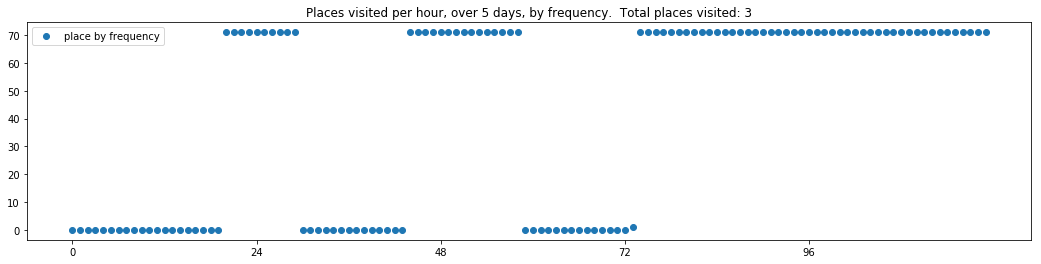

----- vector ----
prefix labels:  [455, 455]
[147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 455, 147, 147, 147]
[147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147]
[147, 0, 0, 0, 0, 0, 0, 0, 0, 0, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147]
[147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147]
[147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147]


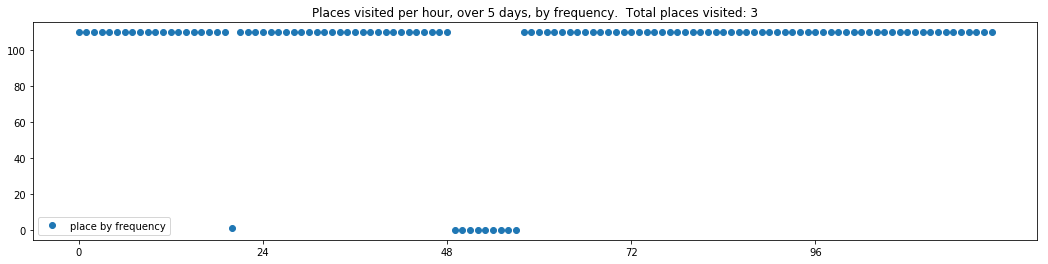

----- vector ----
prefix labels:  [552, 21]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 552, 552, 552]
[552, 552, 552, 552, 552, 552, 552, 552, 552, 552, 552, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87, 87, 87, 87]
[87, 87, 87, 87, 87, 87, 87, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87, 87, 87, 87]
[87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87]


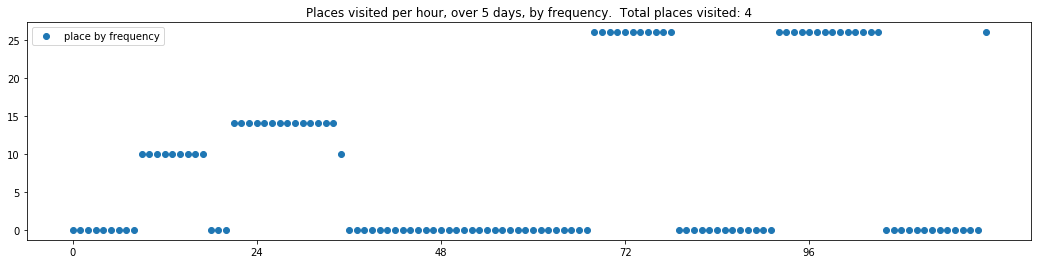


-------showing vectors for model: default.1-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:2-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.9
----- vector ----
prefix labels:  [244, 445]
[0, 0, 0, 0, 0, 0, 0, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 114, 114, 0, 0, 244, 244, 244]
[244, 244, 244, 244, 244, 244, 244, 445, 445, 445, 445, 445, 445, 445, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 445, 445, 445, 445, 445, 445, 445, 445, 445, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 407, 0, 0, 0, 0]


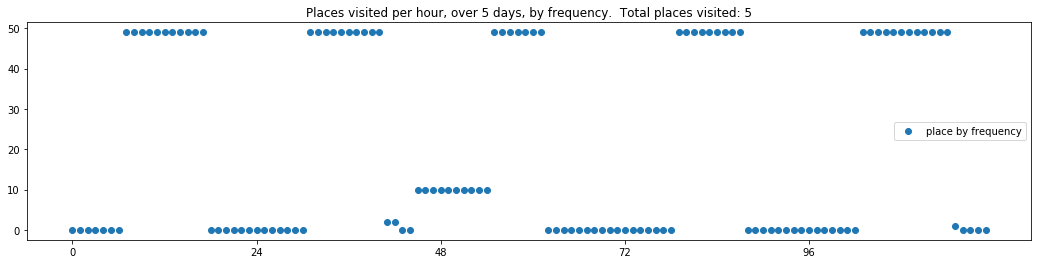

----- vector ----
prefix labels:  [577, 577]
[0, 0, 0, 0, 0, 0, 0, 577, 577, 577, 577, 577, 577, 577, 577, 577, 577, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 577, 577, 577, 577, 577, 577, 577, 577, 577, 577, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 577, 577, 577, 577, 577, 577, 577, 577, 577, 577, 577, 577, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 577, 577, 577, 577, 577, 577, 577, 577, 577, 577, 120, 120, 120, 120, 120, 120, 120]
[120, 120, 120, 120, 120, 120, 120, 577, 577, 577, 577, 577, 577, 577, 577, 577, 577, 0, 0, 120, 120, 120, 120, 120]


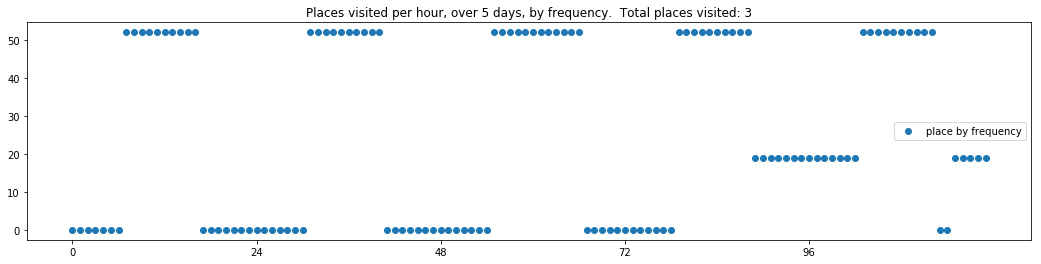

----- vector ----
prefix labels:  [44, 44]
[0, 0, 0, 0, 0, 0, 0, 0, 44, 44, 44, 44, 44, 44, 44, 44, 44, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 44, 44, 44, 44, 44, 44, 44, 44, 44, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 44, 44, 44, 44, 44, 44, 44, 44, 44, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 0, 0, 0, 0]


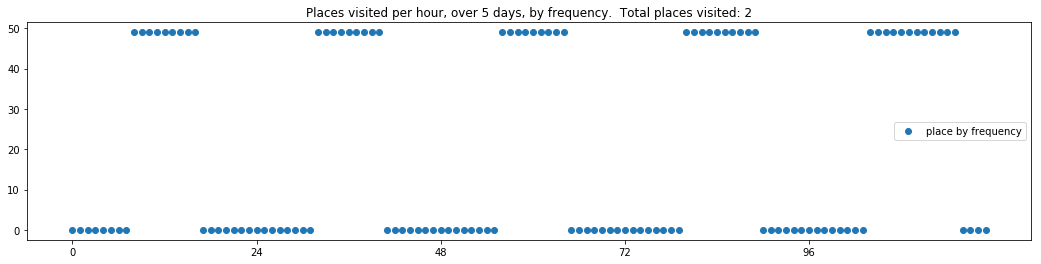


-------showing vectors for model: default.2-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:2-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:1.0
----- vector ----
prefix labels:  [387, 199]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 199, 199, 199, 199, 0, 100, 100, 100, 270, 387, 387, 270]
[270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 0, 270, 270, 270, 270]
[270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270]
[270, 270, 270, 270, 270, 270, 270, 270, 0, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270]
[270, 0, 270, 270, 99, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 0, 270, 270, 270, 270, 270, 270, 270, 270]


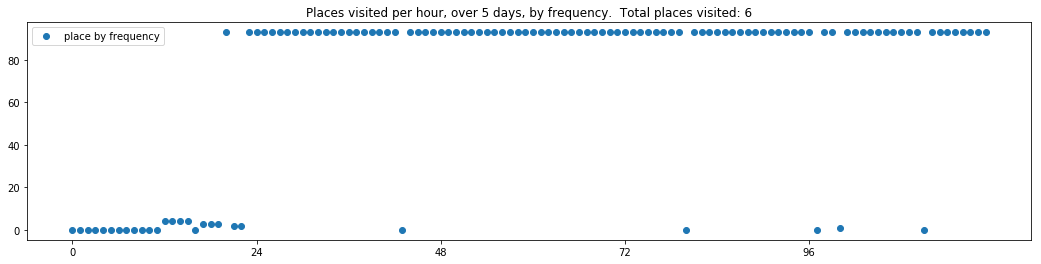

----- vector ----
prefix labels:  [147, 147]
[0, 0, 0, 0, 0, 0, 0, 0, 44, 44, 0, 0, 0, 0, 0, 0, 147, 147, 0, 147, 147, 147, 147, 147]
[147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 147, 0, 0, 0, 0, 147, 147, 0, 0, 0, 147]
[147, 147, 147, 147, 147, 147, 147, 147, 147, 0, 0, 147, 147, 0, 0, 0, 0, 147, 147, 147, 0, 0, 0, 0]
[0, 0, 147, 0, 147, 147, 147, 147, 147, 147, 147, 147, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 548, 548, 548, 0, 618, 0, 618, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


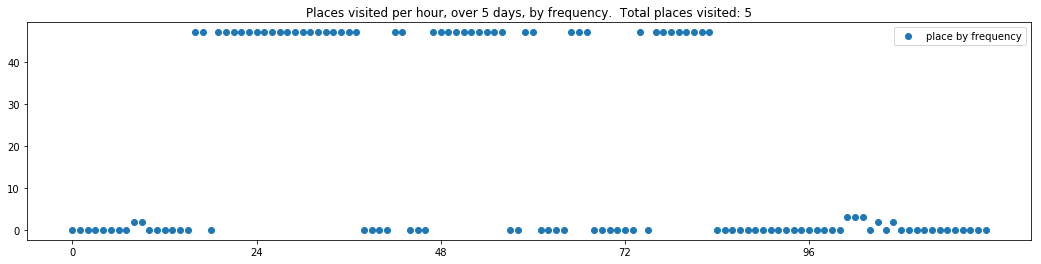

----- vector ----
prefix labels:  [26, 26]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
[26, 26, 26, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26]
[26, 26, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 26, 26, 26, 26, 26, 26]
[26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 26, 26, 26, 0]


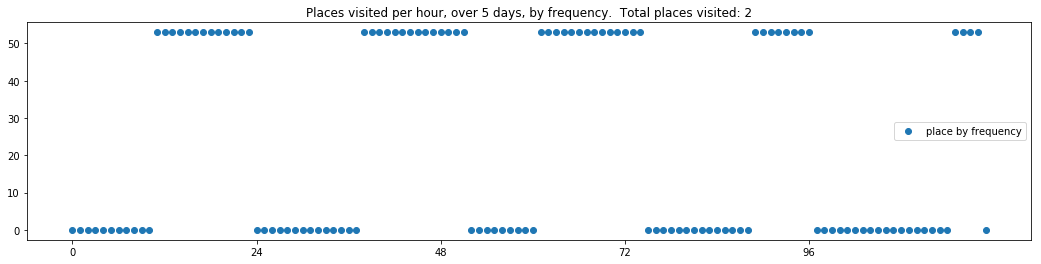


-------showing vectors for model: B-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:2-rnn_size:256-dropout:0.1-dim_embeddings:50-temperature:0.8
----- vector ----
prefix labels:  [48, 48]
[0, 0, 0, 0, 0, 0, 0, 0, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]


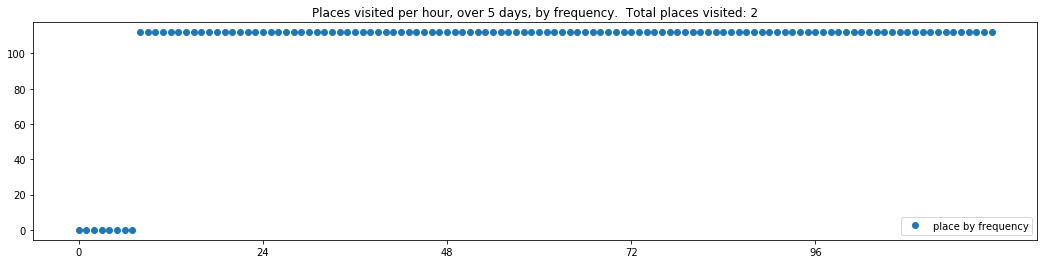

----- vector ----
prefix labels:  [330, 21]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


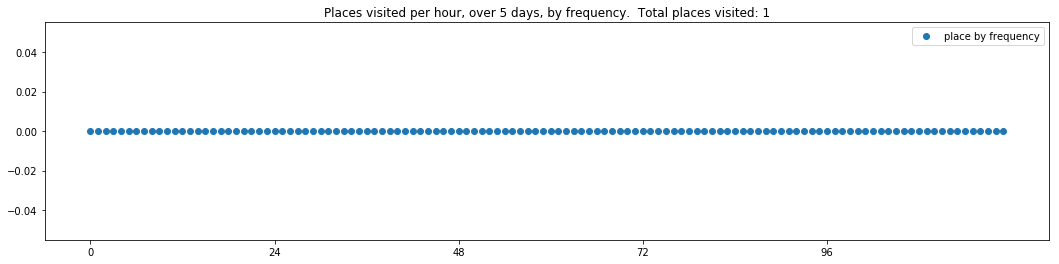

----- vector ----
prefix labels:  [115, 258]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 493, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


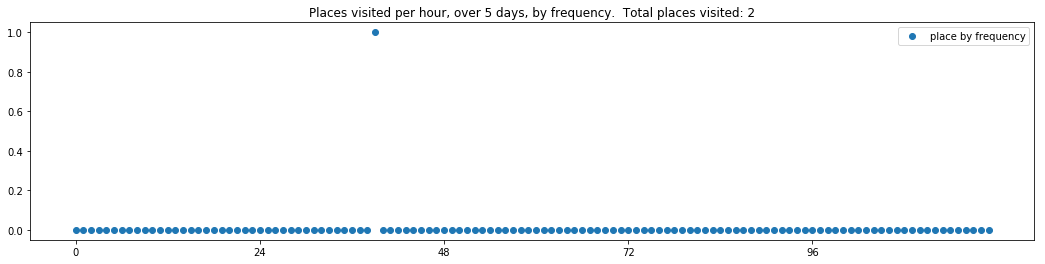


-------showing vectors for model: B.1-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:2-rnn_size:256-dropout:0.1-dim_embeddings:50-temperature:0.9
----- vector ----
prefix labels:  [44, 248]
[0, 0, 0, 0, 0, 0, 0, 0, 612, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 44, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 387, 119, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


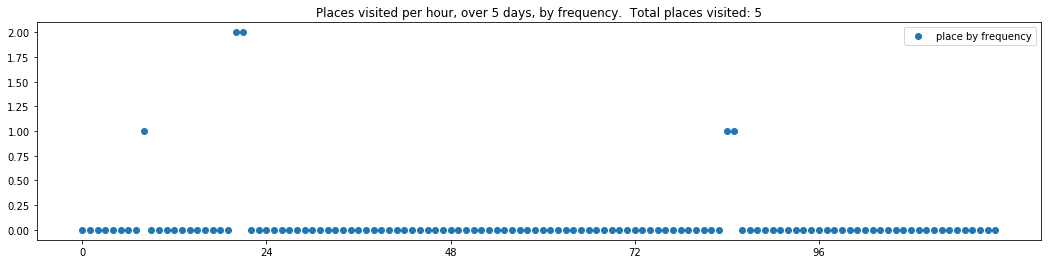

----- vector ----
prefix labels:  [411, 411]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 68, 155, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 76]


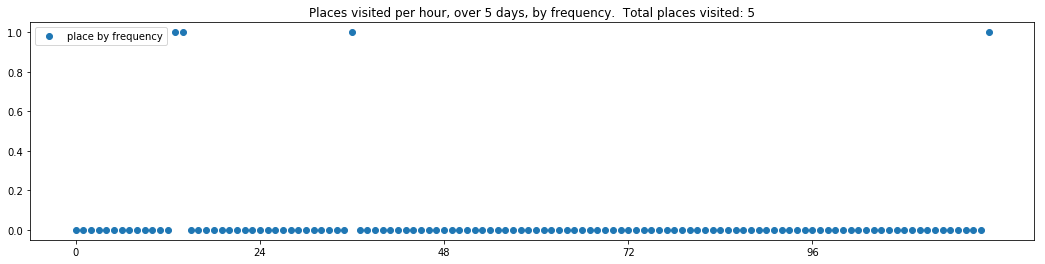

----- vector ----
prefix labels:  [581, 440]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


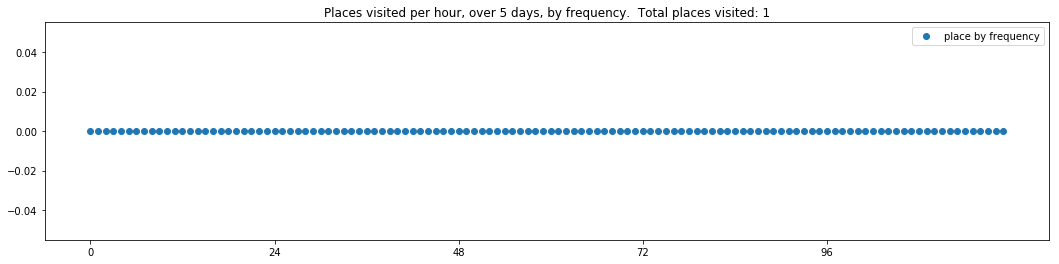


-------showing vectors for model: B.2-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:2-rnn_size:256-dropout:0.1-dim_embeddings:50-temperature:1.0
----- vector ----
prefix labels:  [628, 628]
[0, 0, 0, 0, 0, 0, 0, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628]
[628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628]
[628, 628, 628, 628, 628, 628, 628, 628, 55, 0, 0, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 100, 100, 0, 0, 477, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 111]
[111, 111, 111, 0, 0, 111, 111, 111, 0, 0, 0, 0, 0, 0, 0, 0, 353, 353, 353, 353, 353, 353, 353, 0]


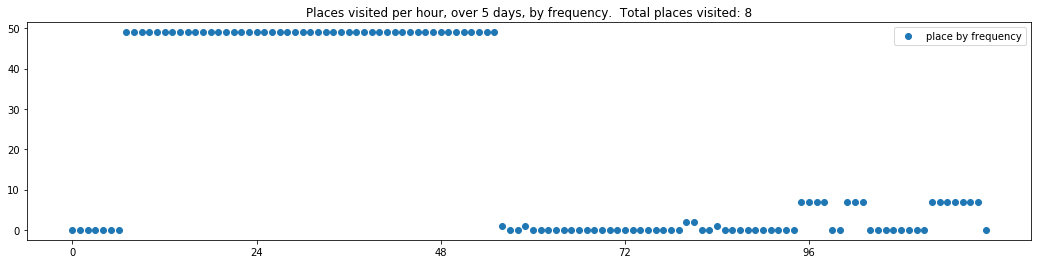

----- vector ----
prefix labels:  [44, 44]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 44, 249, 0, 0, 182, 0, 0, 0, 44, 44, 44, 44]
[44, 44, 44, 44, 44, 44, 44, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 44, 44, 44, 44, 44, 44, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 44, 44, 44, 44, 44, 44, 44, 613, 44, 0]


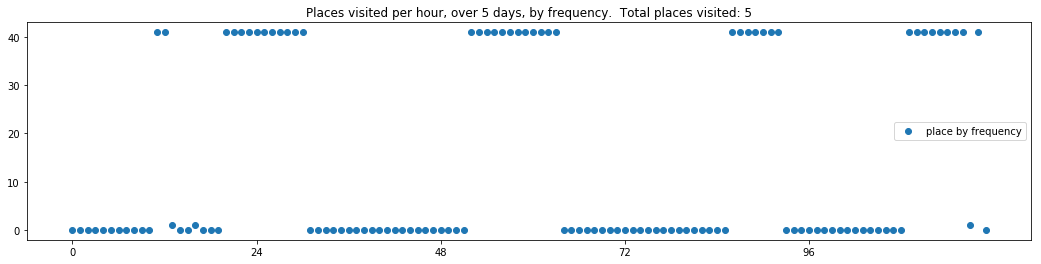

----- vector ----
prefix labels:  [48, 48]
[0, 0, 0, 0, 0, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 47, 47, 47, 48, 48, 48, 48, 48]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]
[48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48]


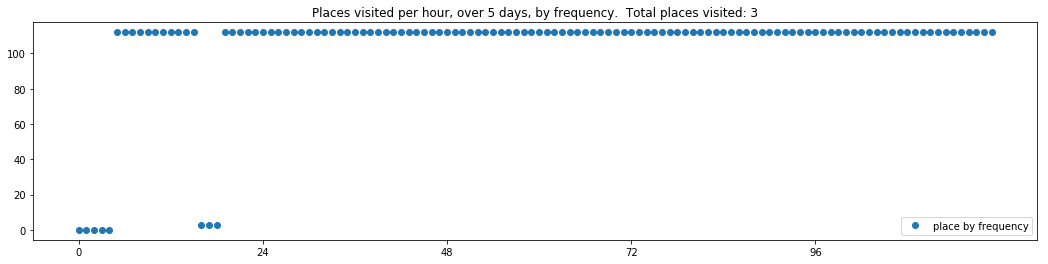


-------showing vectors for model: C-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:2-rnn_size:128-dropout:0.2-dim_embeddings:50-temperature:0.8
----- vector ----
prefix labels:  [459, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 459, 459, 459, 459, 459, 459]
[459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459]
[459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459]
[459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459]
[459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459, 459]


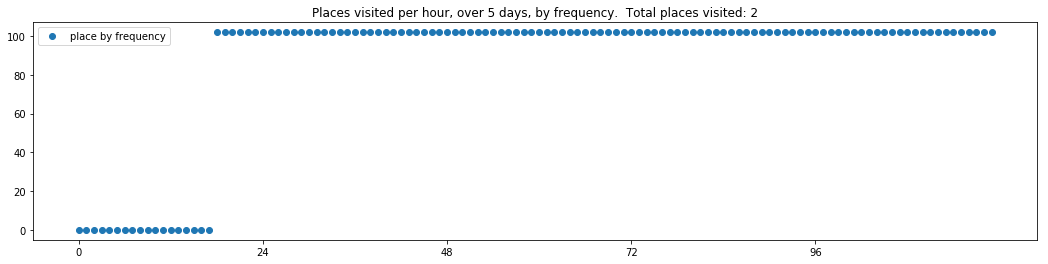

----- vector ----
prefix labels:  [374, 79]
[0, 0, 0, 0, 0, 0, 0, 0, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 374, 374, 374, 374, 374, 374]
[374, 374, 374, 374, 374, 374, 374, 374, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 374, 374, 374, 374, 374]
[374, 374, 374, 374, 374, 374, 374, 374, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 374, 374, 374, 374]
[374, 374, 374, 374, 374, 374, 374, 374, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 374, 374, 374, 374]
[374, 374, 374, 374, 374, 374, 374, 374, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 0, 374, 374, 374]


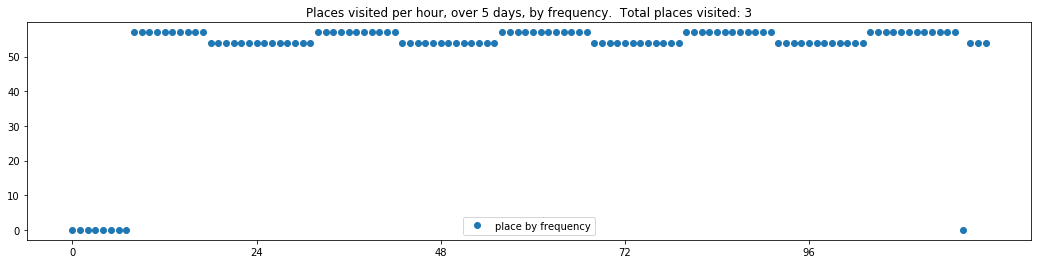

----- vector ----
prefix labels:  [122, 122]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 122, 122, 0, 0, 0, 122, 253, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 280, 280, 280, 280, 280, 280, 280, 280, 280, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 280, 0, 0, 0, 0, 0, 0, 0, 0, 0]


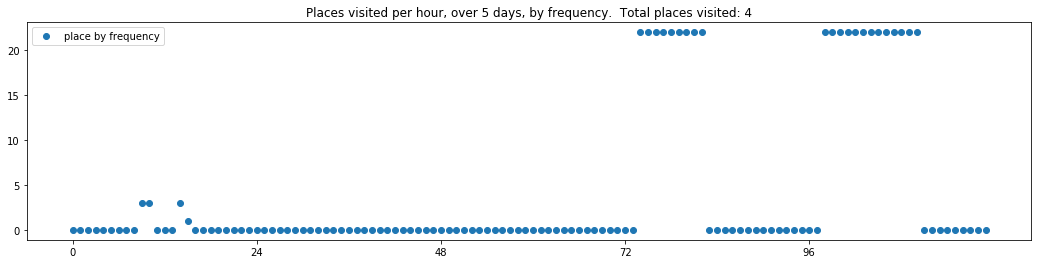


-------showing vectors for model: C.1-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:2-rnn_size:128-dropout:0.2-dim_embeddings:50-temperature:0.9
----- vector ----
prefix labels:  [409, 56]
[0, 0, 0, 0, 0, 0, 0, 0, 56, 56, 56, 56, 56, 56, 388, 56, 56, 225, 409, 409, 409, 409, 409, 409]
[409, 409, 409, 409, 409, 409, 409, 409, 0, 0, 0, 0, 0, 56, 388, 388, 409, 409, 409, 409, 409, 409, 409, 409]
[409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409]
[409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 0, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409]
[409, 409, 409, 409, 409, 409, 409, 4, 4, 4, 4, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409, 409]


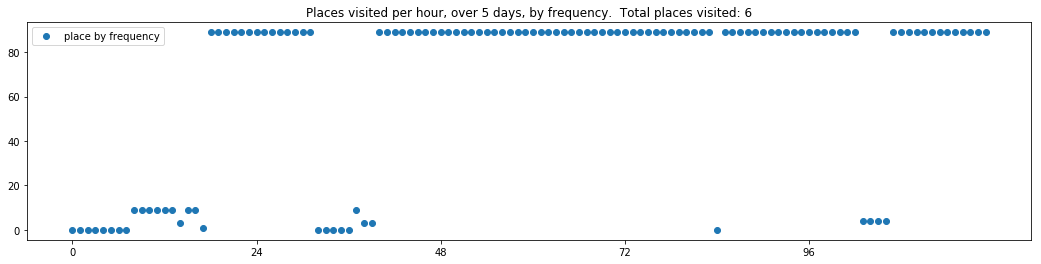

----- vector ----
prefix labels:  [445, 445]
[0, 0, 0, 0, 0, 0, 0, 0, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 0, 445, 445, 445, 445, 445]
[445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445]
[445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445]
[445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445]
[445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445, 445]


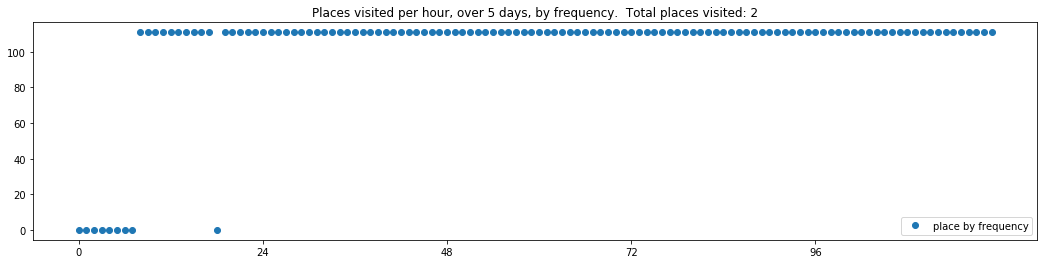

----- vector ----
prefix labels:  [462, 462]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 563, 563, 563, 563, 563, 563, 563, 563, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563]
[563, 563, 563, 0, 639, 639, 639, 639, 639, 639, 639, 639, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563]
[563, 563, 563, 563, 563, 563, 563, 563, 205, 205, 205, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563]
[563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 563, 0, 0, 563, 563, 563, 563, 563, 563, 563, 563, 563]


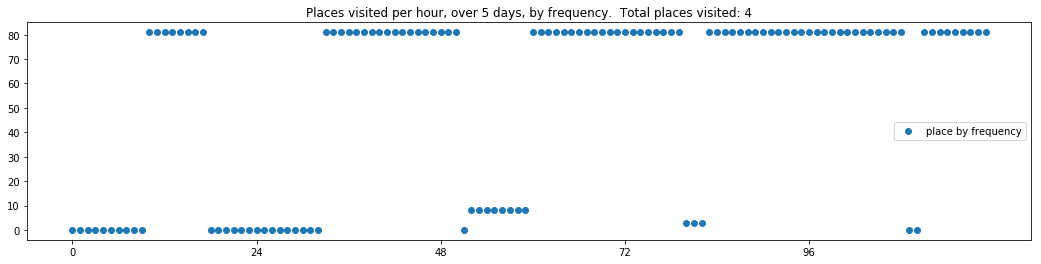


-------showing vectors for model: C.2-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:24-rnn_layers:2-rnn_size:128-dropout:0.2-dim_embeddings:50-temperature:1.0
----- vector ----
prefix labels:  [548, 548]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 548, 548, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 431, 431, 431, 431, 431, 431, 0, 0, 431, 431, 431, 431, 431, 431, 0, 0, 0]
[0, 4, 4, 4, 4, 4, 4, 4, 431, 431, 431, 431, 431, 0, 431, 431, 431, 431, 431, 431, 431, 431, 431, 431]


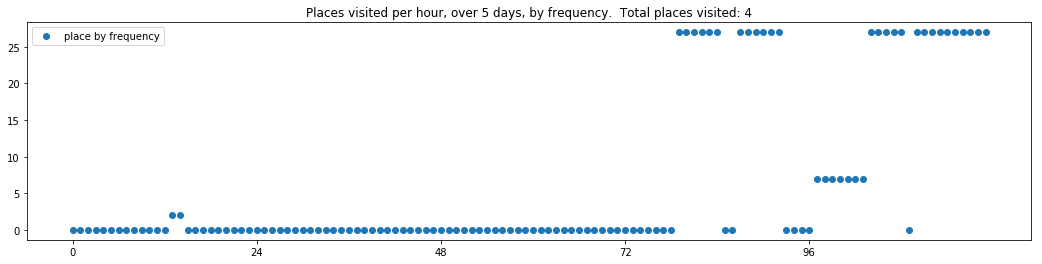

----- vector ----
prefix labels:  [135, 87]
[0, 0, 0, 0, 0, 0, 87, 87, 87, 87, 87, 87, 87, 87, 87, 0, 0, 0, 135, 135, 135, 135, 135, 135]
[135, 135, 135, 135, 135, 135, 135, 69, 87, 87, 87, 87, 87, 87, 0, 0, 0, 262, 262, 262, 135, 135, 135, 135]
[135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 630, 630, 630, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135]
[135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 216, 216, 135, 135]
[135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135, 135]


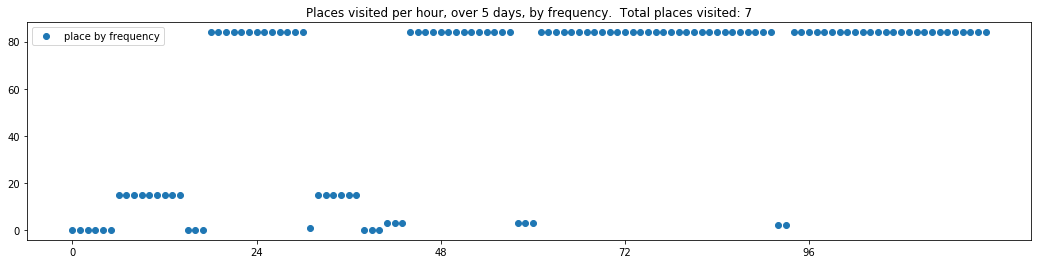

----- vector ----
prefix labels:  [122, 122]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 122, 122, 122, 122, 122, 122, 122, 122, 127, 122, 127, 127, 127]
[127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 248, 122, 122, 122, 44, 0, 0, 127, 127, 127, 127, 127]
[127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127]
[127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 0, 0, 127, 127, 127]


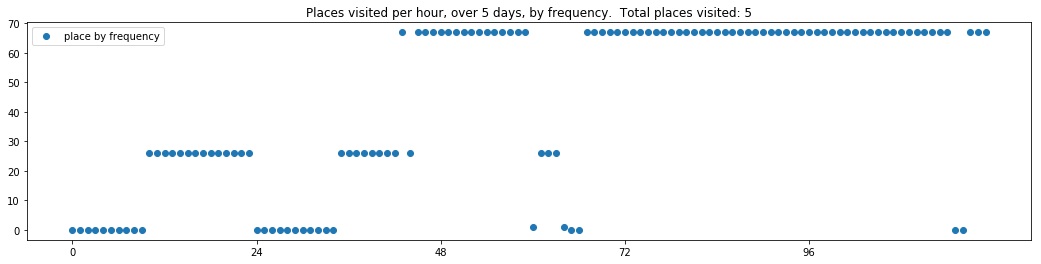


-------showing vectors for model: E-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:48-rnn_layers:2-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.8
----- vector ----
prefix labels:  [69, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


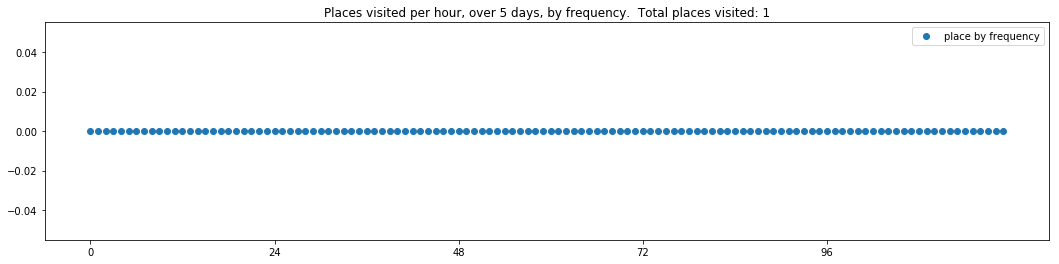

----- vector ----
prefix labels:  [355, 8]
[0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


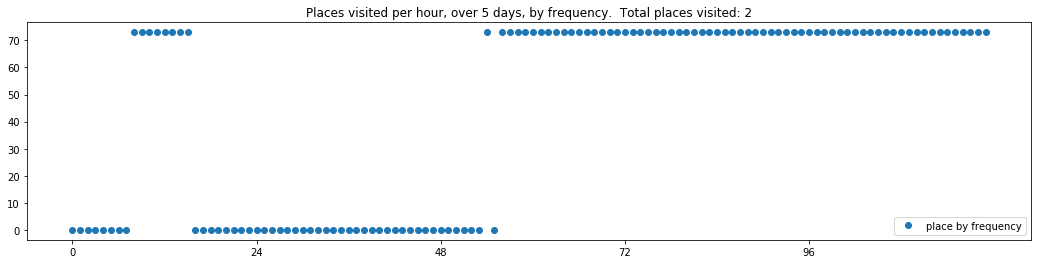

----- vector ----
prefix labels:  [395, 395]
[0, 0, 0, 0, 20, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


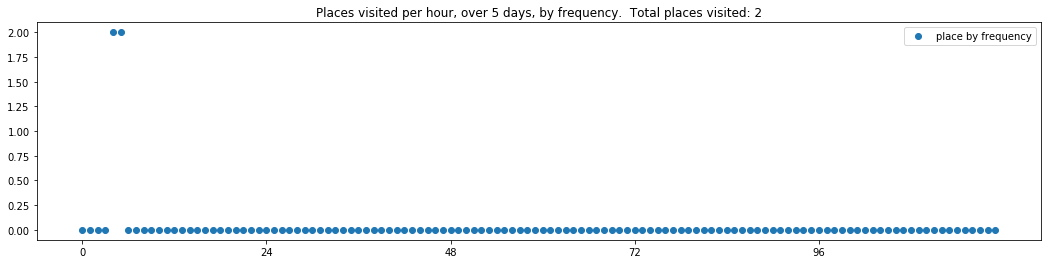


-------showing vectors for model: E.1-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:48-rnn_layers:2-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.9
----- vector ----
prefix labels:  [204, 116]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 560, 557, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 435, 0, 0, 0, 0, 0, 2, 2]
[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


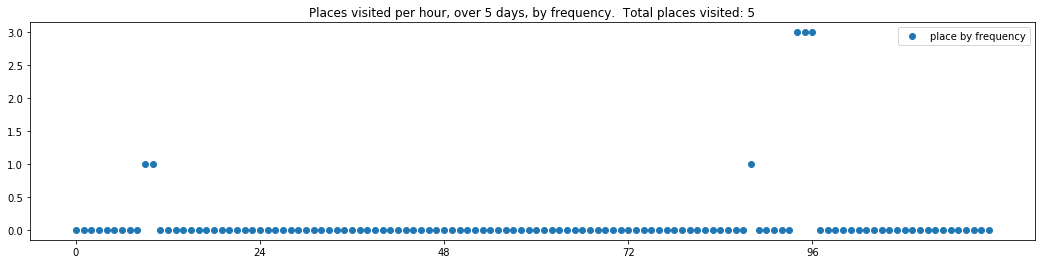

----- vector ----
prefix labels:  [177, 177]
[0, 0, 0, 0, 0, 0, 0, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177]
[177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177]
[177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177]
[177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177]
[177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 0, 306, 177]


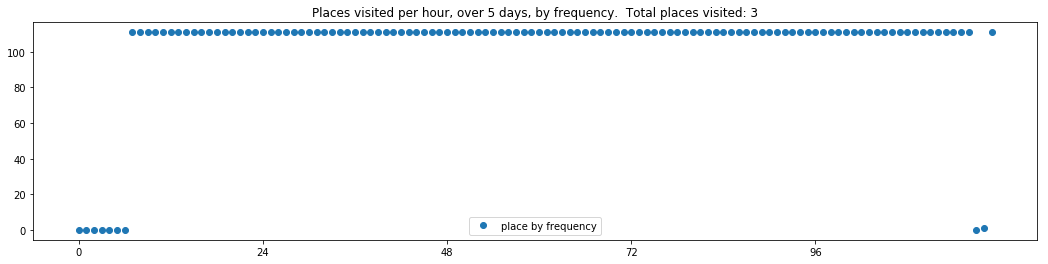

----- vector ----
prefix labels:  [217, 217]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[220, 220, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 133, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 133, 133, 133, 133, 133, 133, 133, 133, 133, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133, 0, 0]


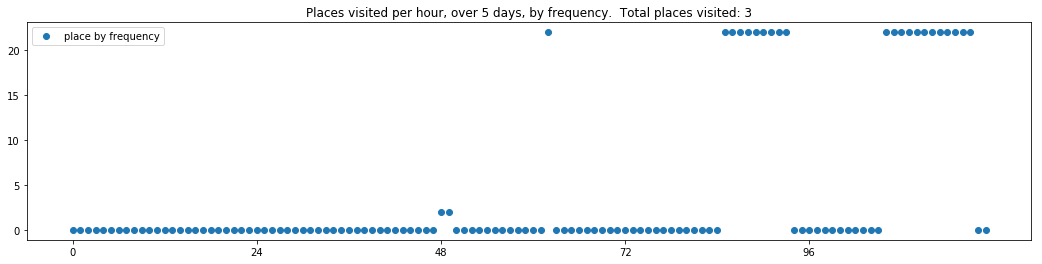


-------showing vectors for model: E.2-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:48-rnn_layers:2-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:1.0
----- vector ----
prefix labels:  [198, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 439, 558, 558, 558, 450, 0, 0, 0, 0, 0, 0, 198, 198]
[198, 198, 198, 198, 198, 198, 198, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 198, 198, 198]
[198, 198, 198, 198, 198, 198, 198, 198, 340, 22, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 198, 198]
[198, 198, 198, 198, 198, 198, 198, 198, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 198, 198]
[198, 198, 198, 198, 198, 198, 198, 198, 198, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 198, 198, 198, 198]


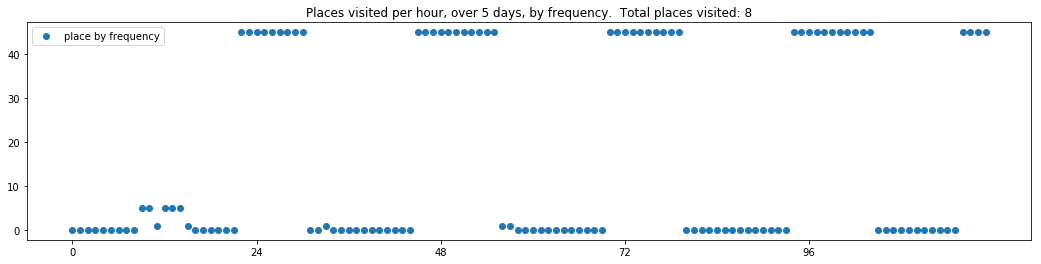

----- vector ----
prefix labels:  [47, 47]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 157, 233, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 574, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


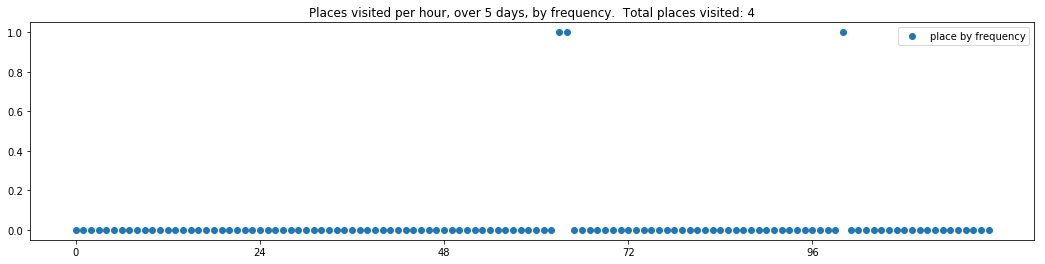

----- vector ----
prefix labels:  [184, 184]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184]
[184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184]
[184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184]
[184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184]
[184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184, 184]


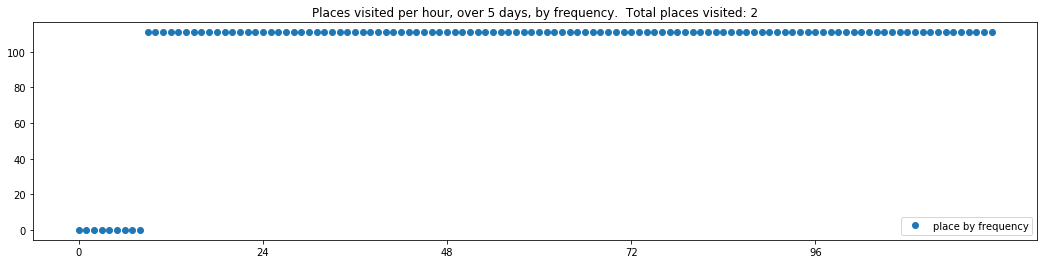


-------showing vectors for model: O-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:48-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.8
----- vector ----
prefix labels:  [536, 536]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


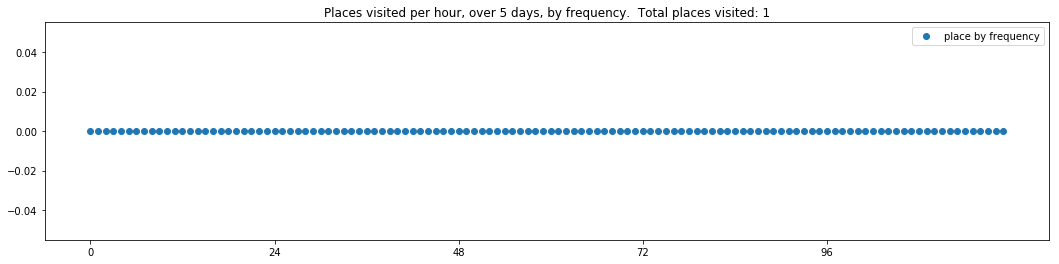

----- vector ----
prefix labels:  [210, 210]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 210, 210, 210, 210, 210]
[210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210]
[210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210]
[210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210]
[210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210, 210]


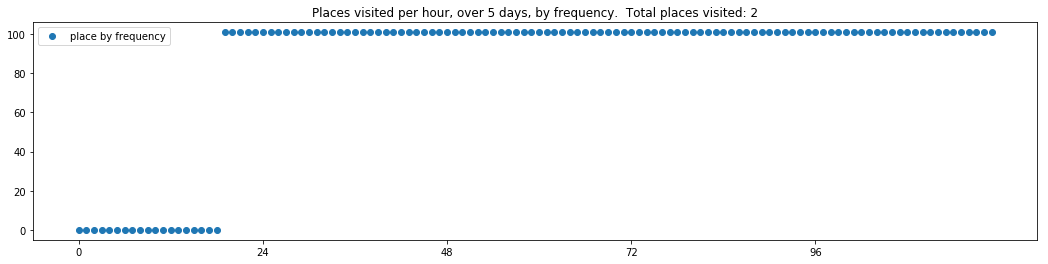

----- vector ----
prefix labels:  [71, 71]
[0, 0, 0, 0, 0, 0, 0, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71]
[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71]
[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71]
[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71]
[71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71]


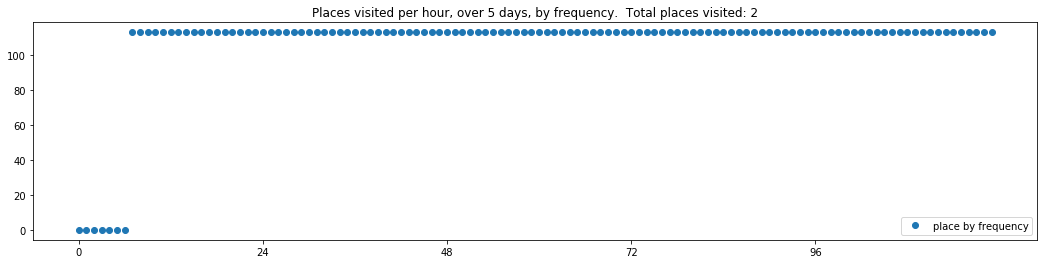


-------showing vectors for model: O.1-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:48-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.9
----- vector ----
prefix labels:  [409, 628]
[0, 0, 0, 0, 0, 0, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 0, 0, 0, 0, 409, 409, 409]
[409, 409, 409, 409, 409, 409, 409, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 409, 409, 409, 0, 628, 409, 409]
[409, 628, 628, 409, 628, 628, 0, 628, 628, 628, 628, 628, 628, 628, 628, 628, 409, 409, 409, 409, 409, 409, 409, 409]
[409, 409, 409, 409, 409, 409, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 409, 409, 4, 628, 628, 628, 409, 78]
[409, 628, 628, 0, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 409, 409, 409, 0, 0, 409, 409, 409]


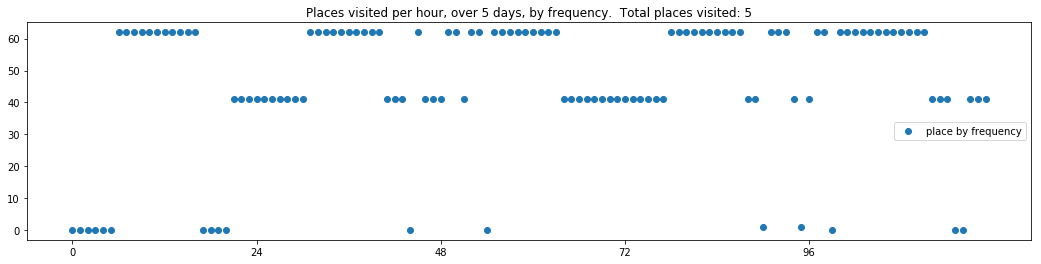

----- vector ----
prefix labels:  [165, 165]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 165, 165, 165, 165, 165, 165, 165, 165, 165]
[165, 165, 165, 165, 165, 165, 165, 165, 165, 0, 0, 165, 311, 165, 0, 0, 165, 165, 165, 165, 165, 165, 165, 165]
[165, 165, 165, 165, 165, 165, 165, 0, 0, 0, 0, 0, 0, 0, 0, 165, 165, 165, 165, 165, 165, 165, 165, 165]
[165, 165, 165, 0, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165]
[165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165, 165]


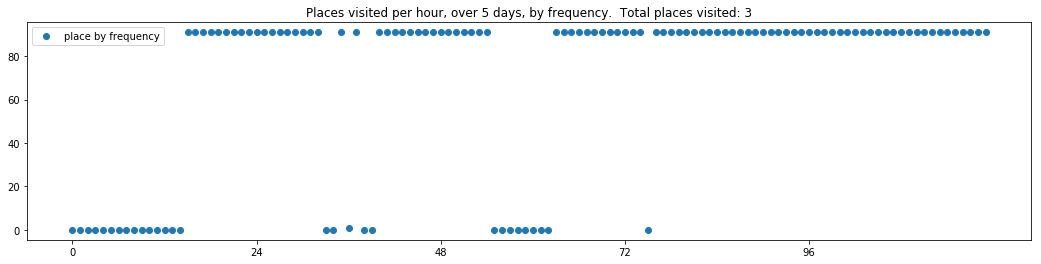

----- vector ----
prefix labels:  [640, 640]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 195, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 88, 351, 410, 410, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 20, 92, 78, 385, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 20, 0, 0, 0, 0, 0, 0, 0, 456]


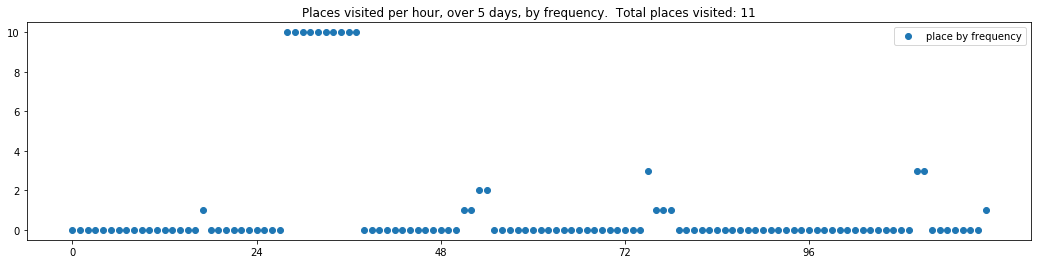


-------showing vectors for model: O.2-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:48-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:1.0
----- vector ----
prefix labels:  [599, 223]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 20, 20, 404, 390, 78, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 195, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 25, 25, 271, 0, 459, 25, 114, 114, 0, 322, 322, 322, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 302, 216, 0, 0, 0, 353, 114, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


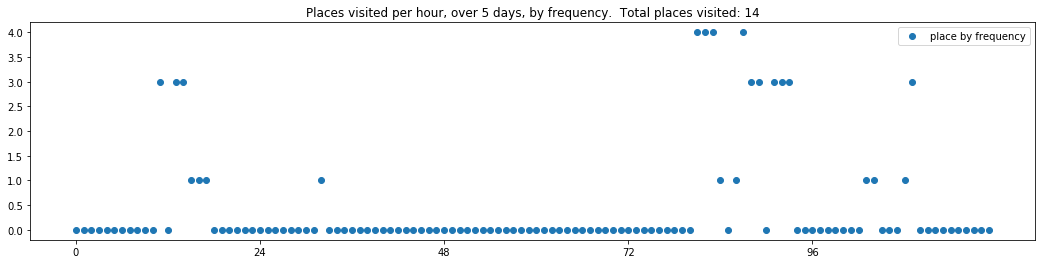

----- vector ----
prefix labels:  [464, 464]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 629, 0, 0, 0, 0, 464, 464, 40, 0, 0, 0, 0, 486, 486, 464]
[464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464]
[464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 149, 274, 429, 274, 464]
[464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 0, 464, 464, 464]
[464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464]


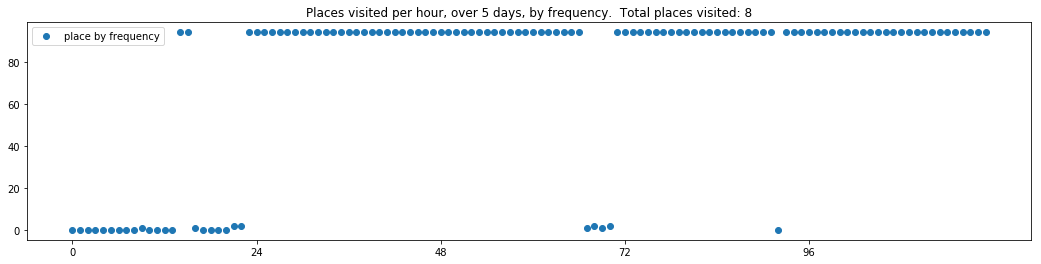

----- vector ----
prefix labels:  [6, 8]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 330, 297, 297, 531, 297, 561, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


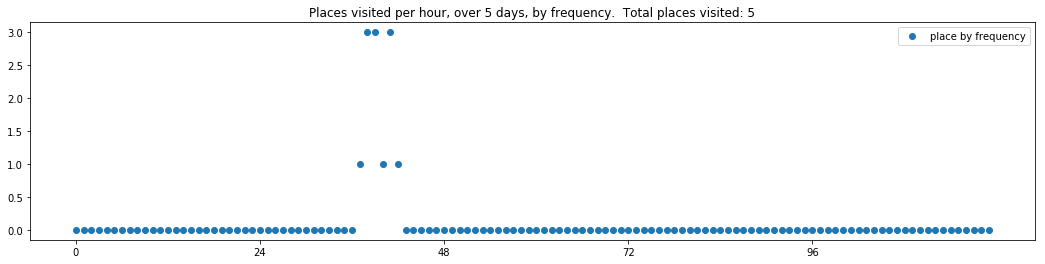


-------showing vectors for model: default-bidirectional-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:24-rnn_layers:2-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.8
----- vector ----
prefix labels:  [518, 187]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 39, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


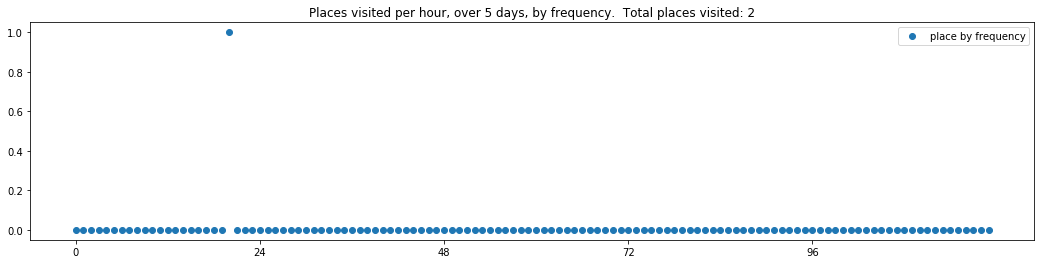

----- vector ----
prefix labels:  [493, 493]
[0, 0, 0, 0, 0, 0, 0, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493]
[493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 0, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493]
[493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493]
[493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493]
[0, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493, 493]


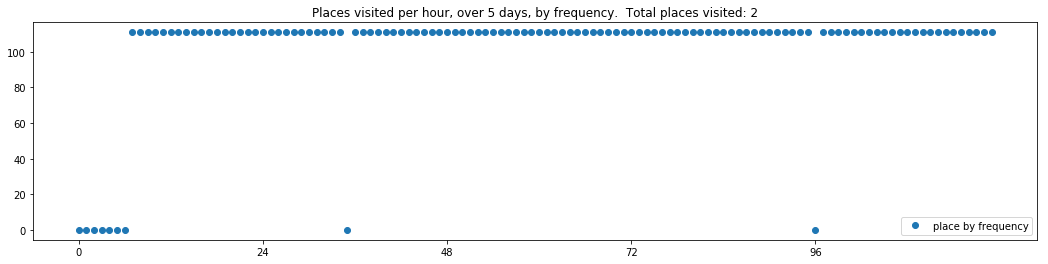

----- vector ----
prefix labels:  [276, 456]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 456, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205]
[205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205]
[205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205]


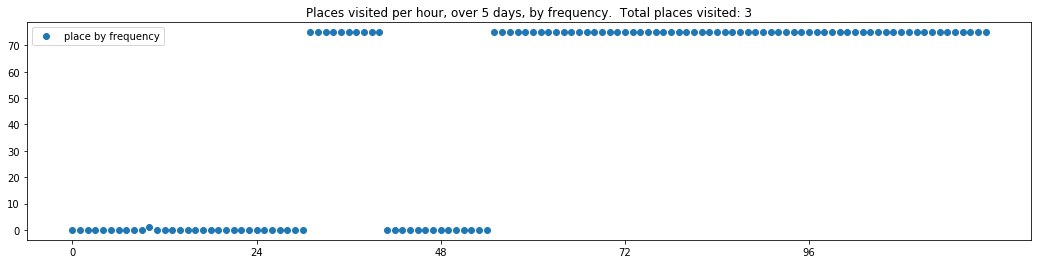


-------showing vectors for model: default-bidirectional.1-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:24-rnn_layers:2-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.9
----- vector ----
prefix labels:  [228, 354]
[0, 0, 0, 0, 0, 0, 0, 55, 55, 55, 55, 55, 55, 55, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 271, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 88, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 88, 88, 88, 88, 88, 88, 88, 88, 0, 431, 0]


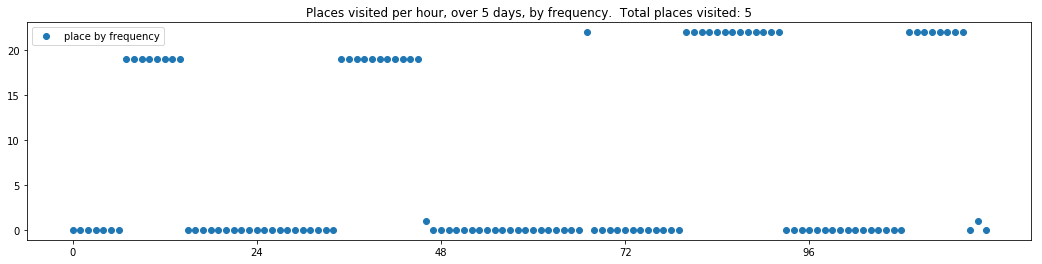

----- vector ----
prefix labels:  [87, 4]
[0, 0, 0, 0, 0, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87]
[87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87]
[87, 0, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 88, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87, 87]


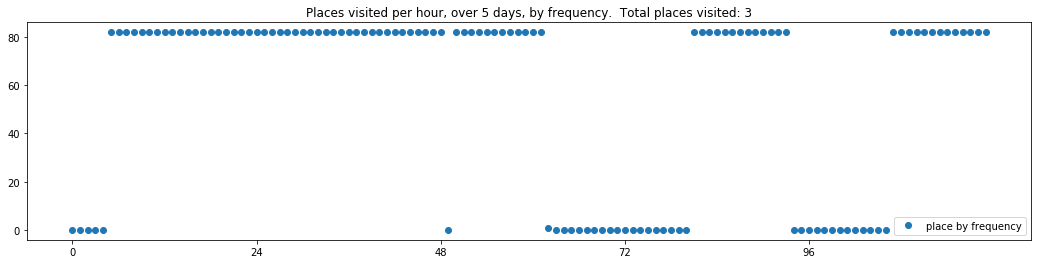

----- vector ----
prefix labels:  [364, 364]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 262, 262, 0, 0, 0, 0, 0, 0, 0, 393]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 82, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


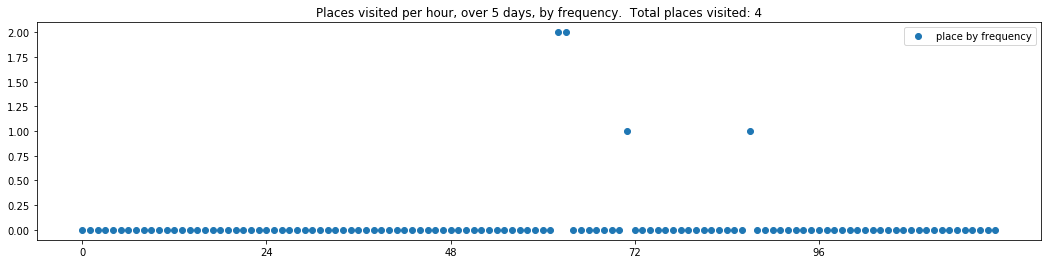


-------showing vectors for model: default-bidirectional.2-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:24-rnn_layers:2-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:1.0
----- vector ----
prefix labels:  [25, 434]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 25, 281, 0, 158, 158, 158, 158, 158, 158, 158, 158, 158, 158, 158, 158]
[0, 240, 20, 457, 457, 20, 0, 108, 0, 202, 202, 0, 0, 0, 0, 434, 0, 0, 0, 86, 0, 167, 0, 0]
[0, 0, 0, 0, 0, 0, 535, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 290, 388, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 112, 97, 117, 0, 0]


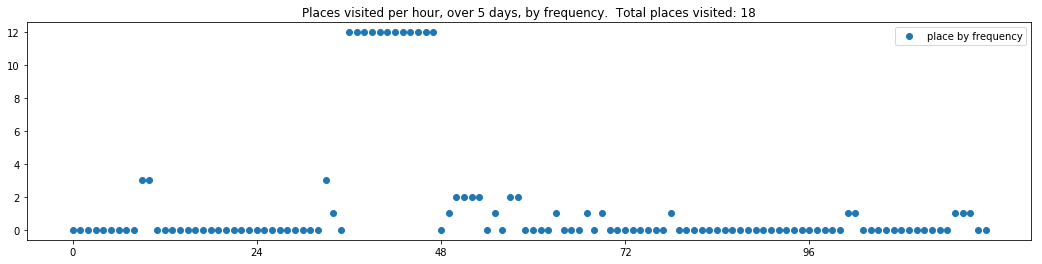

----- vector ----
prefix labels:  [345, 44]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 223, 223, 223, 223]
[223, 223, 223, 223, 223, 223, 223, 189, 0, 0, 0, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223]
[223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223]
[223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223]
[0, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 223, 0, 223, 223, 223, 223, 223, 223, 223, 223]


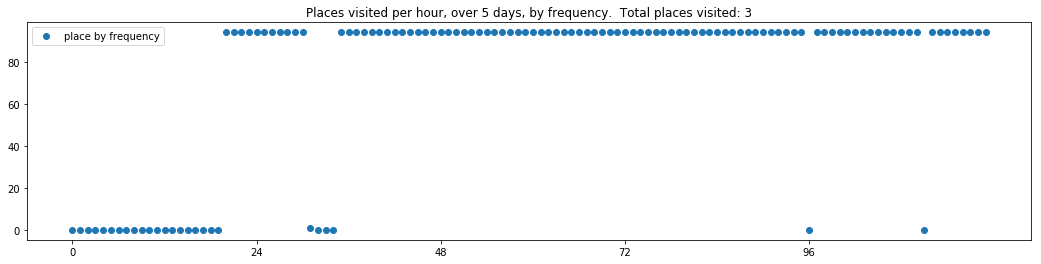

----- vector ----
prefix labels:  [198, 198]
[0, 0, 0, 0, 0, 0, 0, 0, 125, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198]
[198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 8, 198, 198, 198, 198, 198, 198]
[198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198]
[21, 107, 0, 0, 0, 198, 198, 198, 198, 198, 198, 198, 198, 0, 0, 0, 0, 0, 0, 0, 0, 198, 198, 0]
[0, 0, 0, 175, 0, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198, 198]


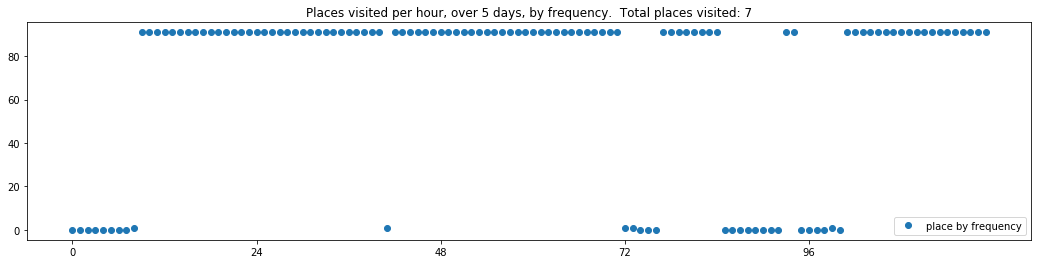


-------showing vectors for model: A-bidirectional-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:24-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.8
----- vector ----
prefix labels:  [89, 89]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 89, 89, 89, 89]
[89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89]
[89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89]
[89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89]
[89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89]


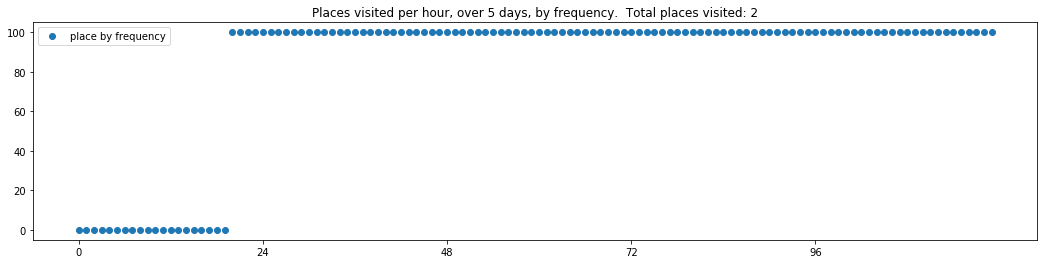

----- vector ----
prefix labels:  [372, 372]
[0, 0, 0, 0, 0, 0, 372, 372, 372, 372, 372, 372, 372, 372, 372, 372, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 372, 372, 372, 372, 372, 372, 372, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 372, 372, 372, 372, 372, 372, 372, 372, 372, 372, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


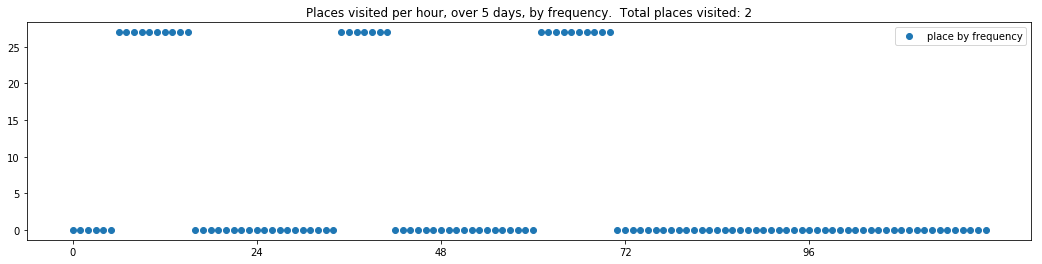

----- vector ----
prefix labels:  [562, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


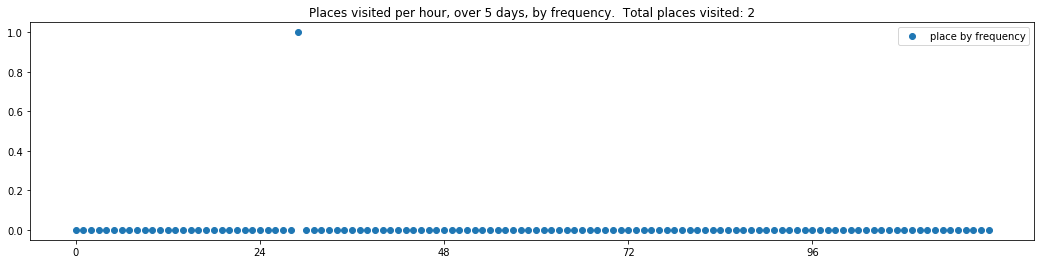


-------showing vectors for model: A-bidirectional.1-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:24-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.9
----- vector ----
prefix labels:  [309, 309]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 309, 309, 309, 309, 309, 308, 308, 308, 308, 308, 308, 308]
[308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308]
[308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308]
[308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308]
[308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 0, 0, 0, 0, 0, 0, 0, 0]


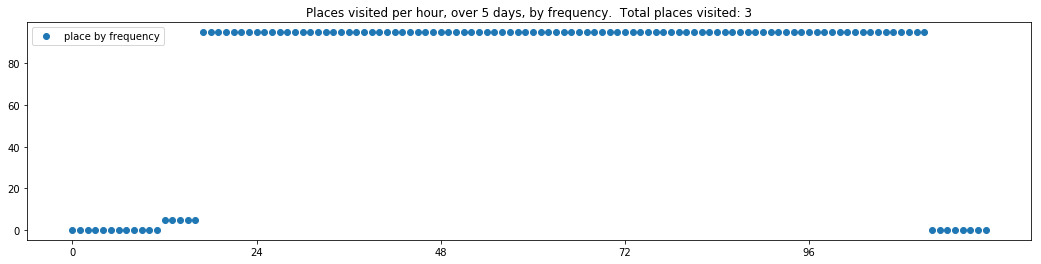

----- vector ----
prefix labels:  [409, 225]
[0, 0, 0, 0, 0, 0, 0, 225, 225, 225, 225, 225, 225, 225, 225, 628, 628, 409, 409, 409, 409, 409, 409, 409]
[409, 409, 409, 409, 409, 409, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 0, 0, 0, 225, 409, 409, 409, 409]
[409, 409, 409, 409, 409, 409, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225]
[225, 225, 225, 225, 225, 409, 225, 225, 225, 225, 225, 225, 225, 0, 0, 0, 0, 0, 225, 225, 225, 225, 479, 479]
[225, 479, 479, 479, 409, 409, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 0, 0, 0]


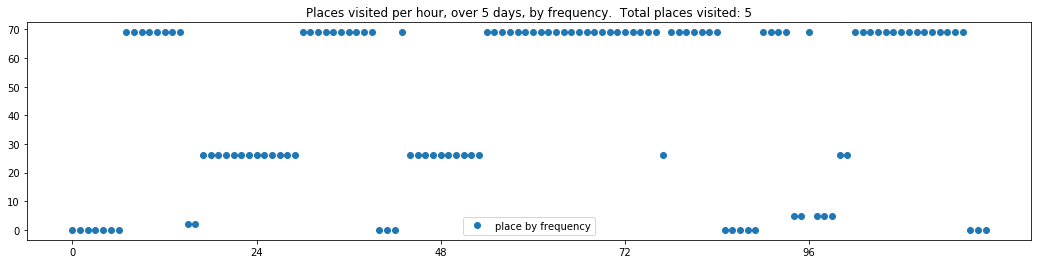

----- vector ----
prefix labels:  [175, 175]
[0, 0, 0, 0, 0, 0, 0, 454, 454, 454, 454, 454, 454, 454, 454, 454, 175, 175, 175, 175, 175, 175, 175, 175]
[175, 175, 175, 175, 175, 175, 175, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 175, 175, 175, 175, 175, 175, 175]
[175, 175, 175, 175, 175, 175, 175, 175, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454]
[454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454]
[454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454, 454]


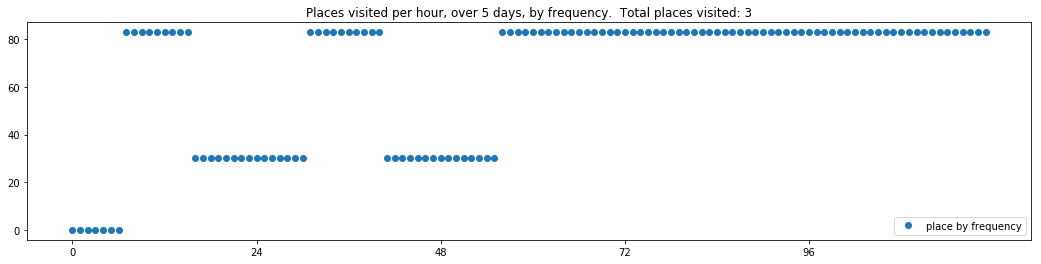


-------showing vectors for model: A-bidirectional.2-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:24-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:1.0
----- vector ----
prefix labels:  [558, 558]
[0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 21, 21, 227, 227, 227, 21, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0]
[558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 0, 0, 386, 386, 386, 386, 386, 386, 386, 558, 485, 485, 0, 558, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 326, 326, 326, 0, 558, 0, 0, 0, 0, 558, 558]


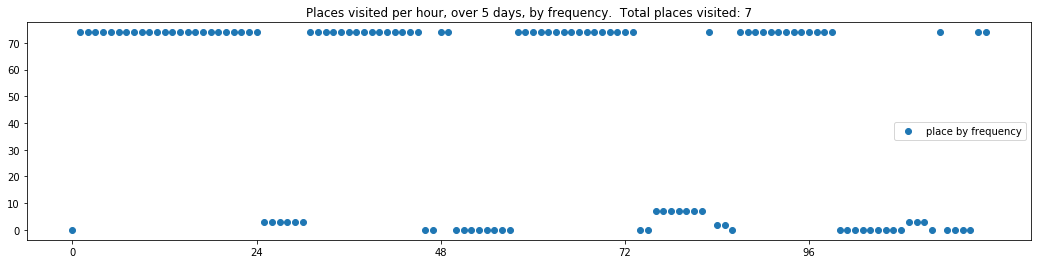

----- vector ----
prefix labels:  [171, 271]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 171, 171, 171, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 110, 110, 110, 110]
[110, 110, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 224, 224, 224, 224, 224, 224, 224, 224, 110, 110, 110, 110, 110]
[110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 295, 0, 0, 224, 224, 224, 224, 224, 303, 110, 110, 110, 110]


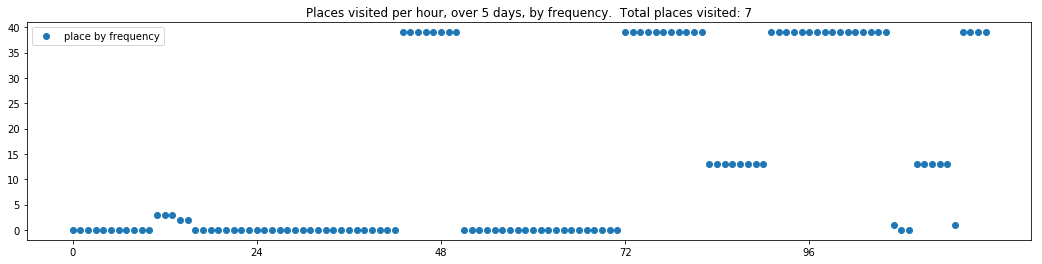

----- vector ----
prefix labels:  [248, 248]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 620, 620, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 522, 522, 312, 312]
[312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 200, 312, 312, 312, 312, 312, 312, 312, 312]
[312, 312, 312, 312, 312, 312, 312, 312, 0, 312, 312, 312, 312, 312, 312, 0, 312, 312, 312, 312, 312, 312, 312, 312]
[312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312]


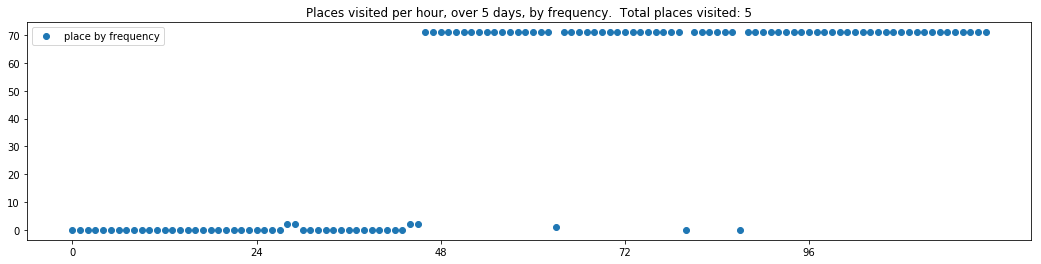


-------showing vectors for model: O-bidirectional-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:48-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.8
----- vector ----
prefix labels:  [215, 581]
[0, 0, 0, 0, 0, 0, 0, 0, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581, 215, 215, 215, 215, 215, 215]
[215, 215, 215, 215, 215, 215, 0, 0, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581, 215, 215, 215, 215, 215, 215]
[215, 215, 215, 215, 215, 215, 215, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581, 581]


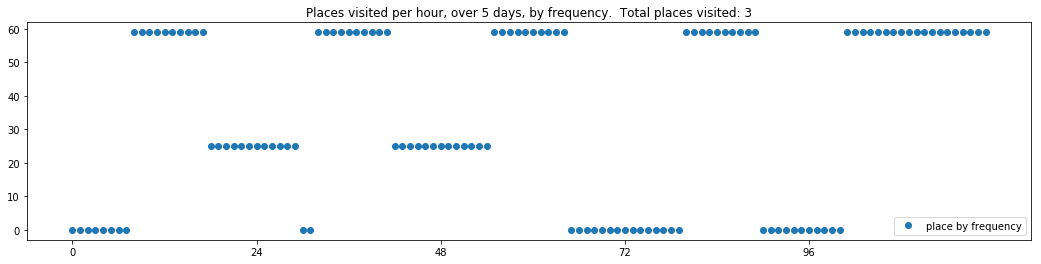

----- vector ----
prefix labels:  [214, 214]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 214, 214, 214, 214, 214, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 2, 2, 2, 2, 2, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 0, 0, 0, 0, 0, 0]


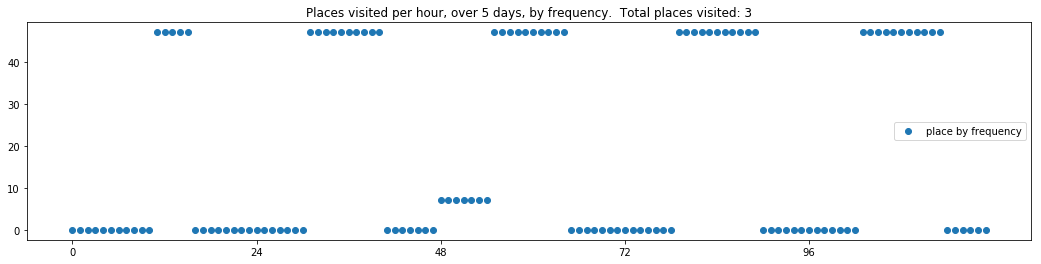

----- vector ----
prefix labels:  [341, 84]
[0, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341]
[341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341]
[341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341]
[341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341]
[341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341, 341]


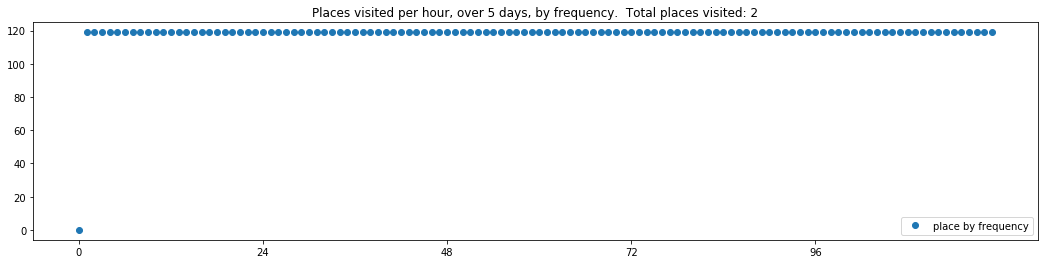


-------showing vectors for model: O-bidirectional.1-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:48-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:0.9
----- vector ----
prefix labels:  [284, 284]
[0, 0, 0, 0, 0, 0, 0, 0, 558, 0, 0, 0, 284, 284, 284, 284, 284, 499, 499, 0, 284, 284, 284, 284]
[0, 0, 0, 0, 0, 0, 284, 288, 284, 51, 284, 284, 284, 284, 284, 21, 284, 284, 284, 284, 0, 0, 0, 21]
[21, 0, 0, 0, 0, 0, 0, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 0, 0, 0, 0, 553]
[553, 51, 51, 51, 51, 51, 0, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 553, 553, 553, 553]
[553, 553, 553, 553, 553, 541, 553, 553, 553, 553, 553, 553, 553, 553, 553, 553, 553, 553, 553, 553, 553, 553, 553, 553]


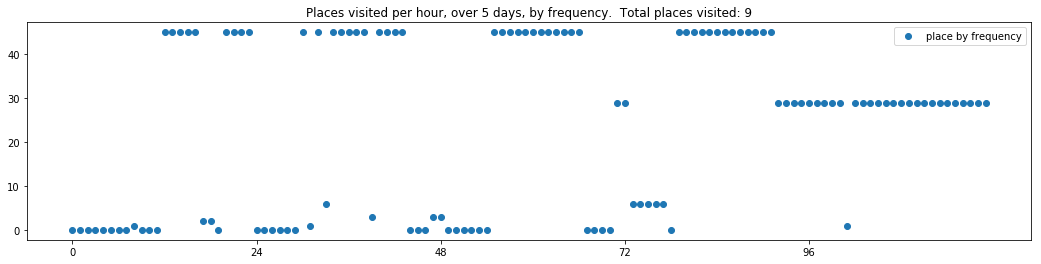

----- vector ----
prefix labels:  [230, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 230, 0, 0, 0, 0, 0, 0, 0, 0, 0, 230, 230, 0, 230, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 230, 230, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 230]
[230, 230, 230, 230, 230, 230, 230, 230, 230, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 230]
[230, 230, 230, 230, 230, 230, 230, 230, 230, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 230, 230]
[230, 230, 230, 230, 230, 230, 230, 230, 230, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 230, 230]


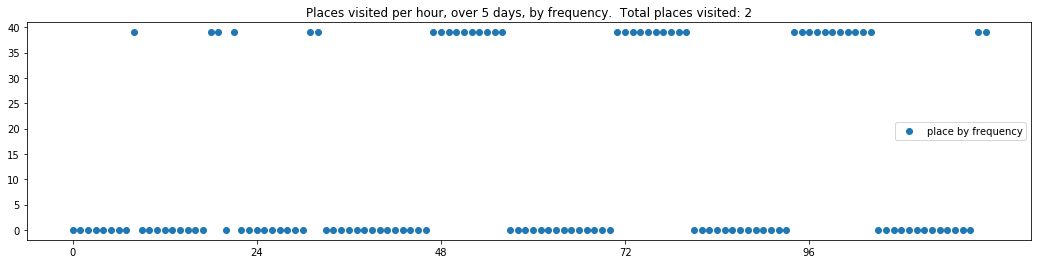

----- vector ----
prefix labels:  [21, 21]
[0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 0, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 0, 21, 21, 21, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 21, 0, 0, 0, 21, 0, 21, 21, 21, 21, 21]


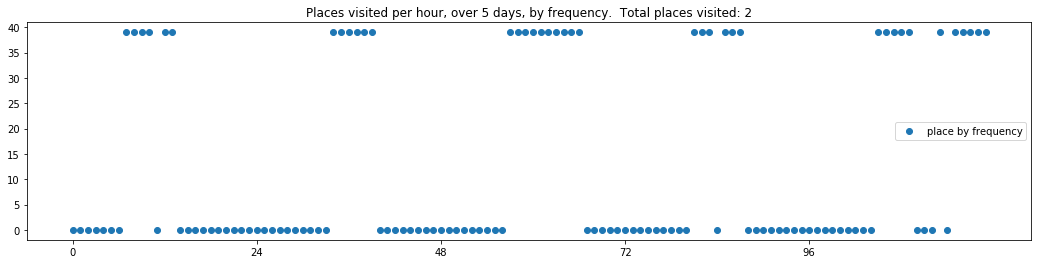


-------showing vectors for model: O-bidirectional.2-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:48-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:50-temperature:1.0
----- vector ----
prefix labels:  [84, 84]
[0, 0, 0, 0, 56, 84, 84, 84, 84, 84, 84, 84, 84, 84, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 0, 0, 0, 0, 0, 382, 382, 0, 84]
[84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 0, 0, 0, 0, 0, 0, 0, 0, 84]
[84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 329, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


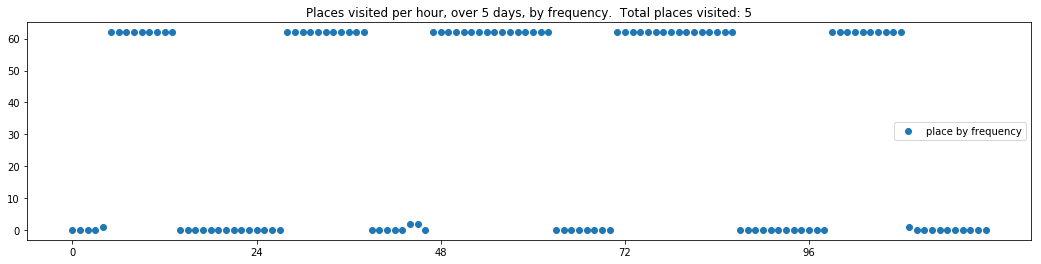

----- vector ----
prefix labels:  [409, 628]
[0, 0, 0, 0, 0, 0, 0, 0, 628, 628, 628, 628, 628, 628, 628, 628, 409, 409, 409, 409, 409, 409, 409, 409]
[409, 409, 409, 409, 409, 409, 409, 409, 628, 628, 628, 628, 628, 628, 628, 628, 0, 409, 409, 409, 409, 409, 409, 409]
[409, 409, 0, 0, 0, 409, 409, 628, 628, 628, 628, 628, 628, 628, 628, 628, 409, 409, 409, 409, 409, 409, 409, 409]
[409, 409, 409, 409, 409, 409, 409, 628, 628, 628, 628, 628, 628, 628, 628, 628, 628, 409, 409, 409, 409, 409, 409, 409]
[323, 628, 628, 628, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 409, 409, 409, 409, 409, 409, 409, 409]


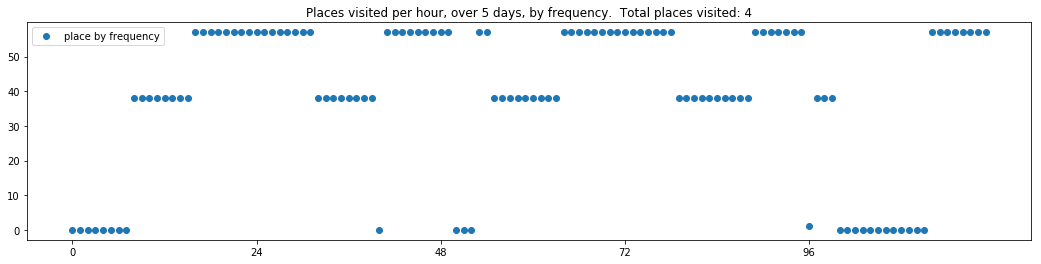

----- vector ----
prefix labels:  [246, 246]
[0, 0, 0, 0, 0, 0, 0, 0, 246, 649, 649, 246, 246, 45, 109, 109, 246, 246, 246, 246, 246, 246, 246, 246]
[246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246]
[246, 246, 246, 246, 246, 246, 246, 246, 246, 649, 649, 246, 246, 246, 109, 109, 246, 246, 246, 246, 246, 246, 246, 246]
[246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246]
[246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246, 246]


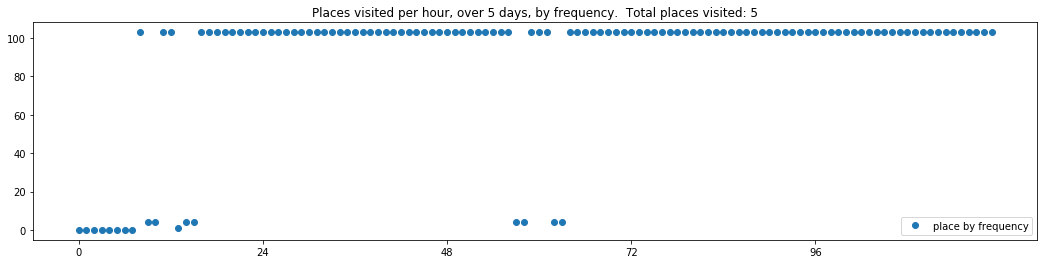


-------showing vectors for model: P-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:50-rnn_layers:3-rnn_size:128-dropout:0.2-dim_embeddings:128-temperature:0.8
----- vector ----
prefix labels:  [598, 598]
[0, 0, 0, 0, 0, 0, 0, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598]
[598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598]
[598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 0, 598, 598, 598, 598]
[598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598]
[598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598, 598]


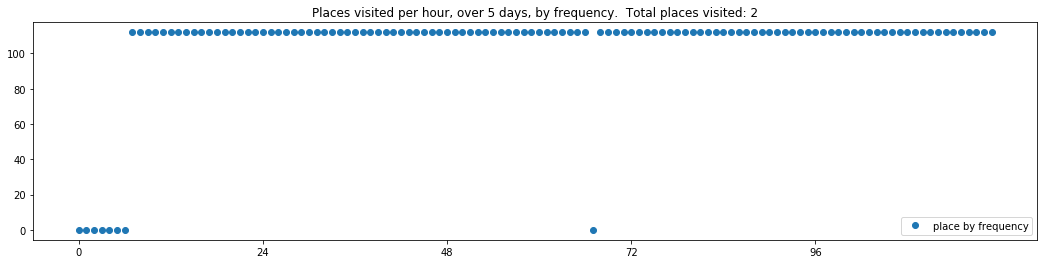

----- vector ----
prefix labels:  [384, 177]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 177, 177, 177, 177, 177, 177, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177]
[177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177]
[177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177]


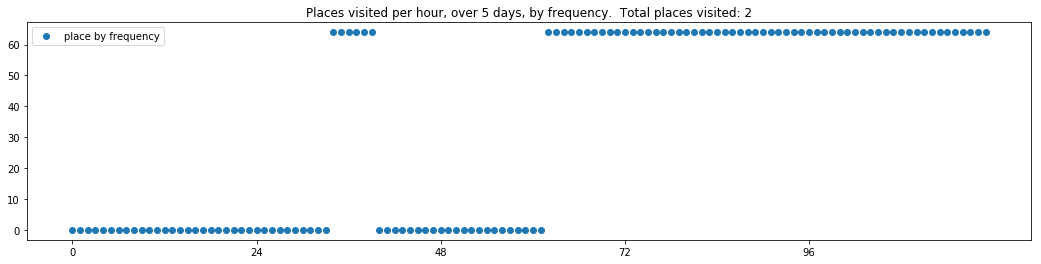

----- vector ----
prefix labels:  [229, 229]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 229, 229, 229, 229, 229, 0, 0, 229, 229, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 229, 229, 229, 229, 229, 229, 229]
[229, 229, 229, 229, 229, 229, 229, 229, 229, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


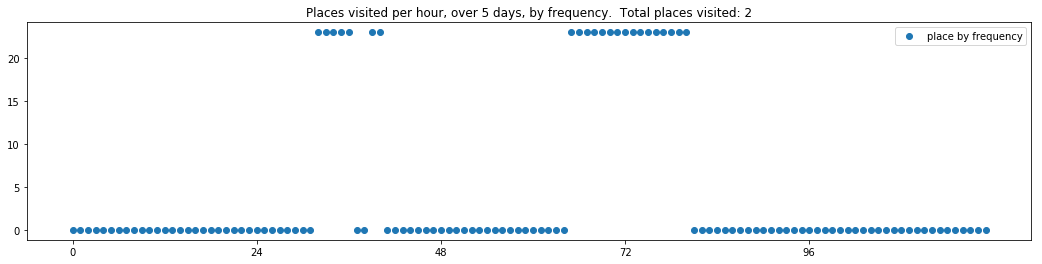


-------showing vectors for model: P.1-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:50-rnn_layers:3-rnn_size:128-dropout:0.2-dim_embeddings:128-temperature:0.9
----- vector ----
prefix labels:  [595, 595]
[0, 0, 0, 0, 0, 0, 0, 0, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 151, 151, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595]
[595, 595, 595, 595, 595, 595, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 595, 595, 595, 595, 595, 595, 595, 595]
[595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595]
[595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595, 595]


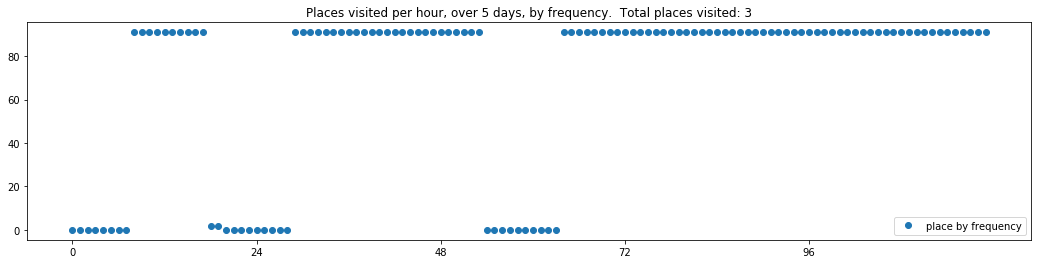

----- vector ----
prefix labels:  [50, 132]
[0, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 33, 33, 50, 50, 50, 50, 50, 50, 50, 50]
[50, 50, 50, 50, 50, 50, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50]
[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


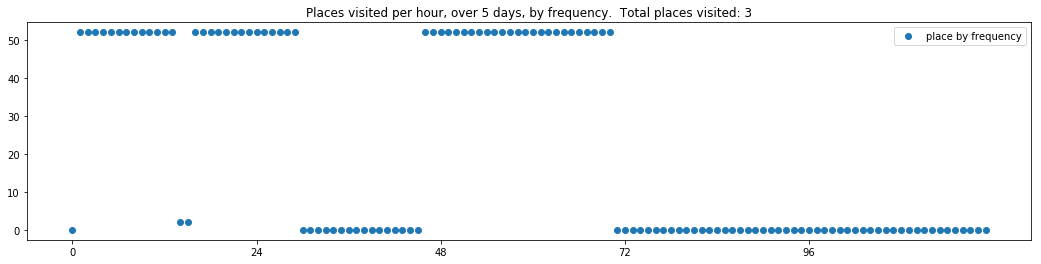

----- vector ----
prefix labels:  [308, 308]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 308, 308, 308]
[308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 308, 308, 308, 308, 308, 308, 308, 0, 308, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


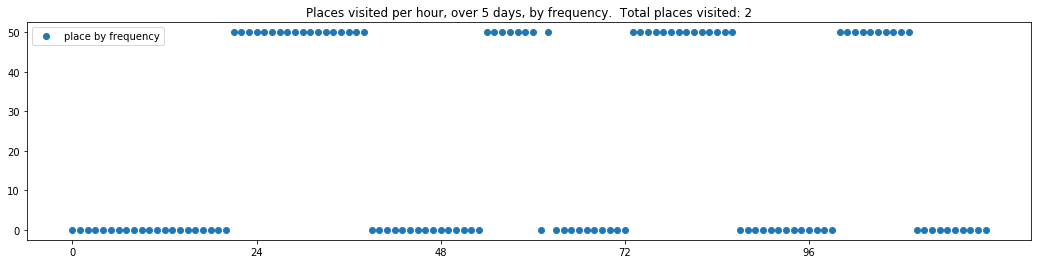


-------showing vectors for model: P.2-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:False-max_len:50-rnn_layers:3-rnn_size:128-dropout:0.2-dim_embeddings:128-temperature:1.0
----- vector ----
prefix labels:  [173, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 173, 173, 173, 267, 100, 100, 100, 100, 100, 263, 0, 236, 236, 545, 173, 173, 173, 173]
[173, 17, 17, 173, 173, 621, 173, 173, 173, 0, 185, 185, 185, 185, 185, 185, 641, 485, 495, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 577, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 453]
[453, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 114, 0, 0, 0, 0, 0, 0, 0, 0, 0, 167]


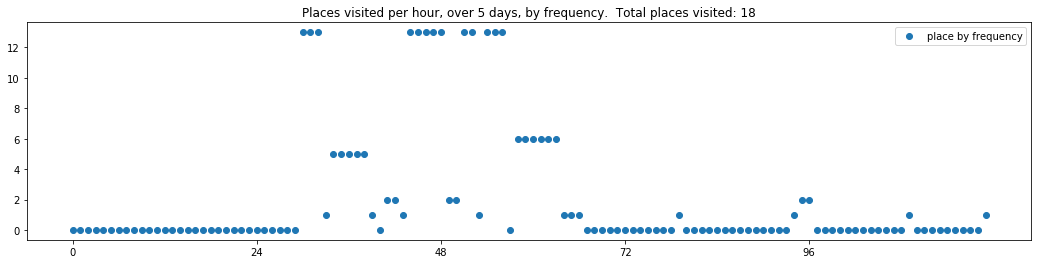

----- vector ----
prefix labels:  [118, 118]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 118, 118, 118, 118, 118, 118, 0, 118, 0, 554, 554, 554]
[554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554]
[554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554]
[554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 0, 554]


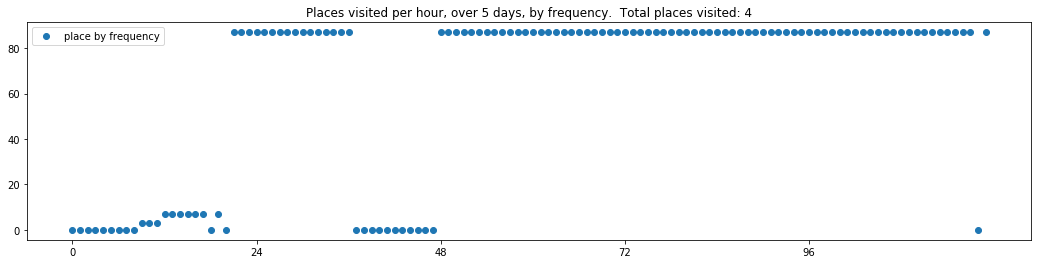

----- vector ----
prefix labels:  [182, 182]
[0, 0, 0, 0, 0, 0, 0, 0, 182, 182, 182, 182, 182, 182, 182, 182, 182, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 182, 182, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 0, 0, 0, 0, 0, 0]


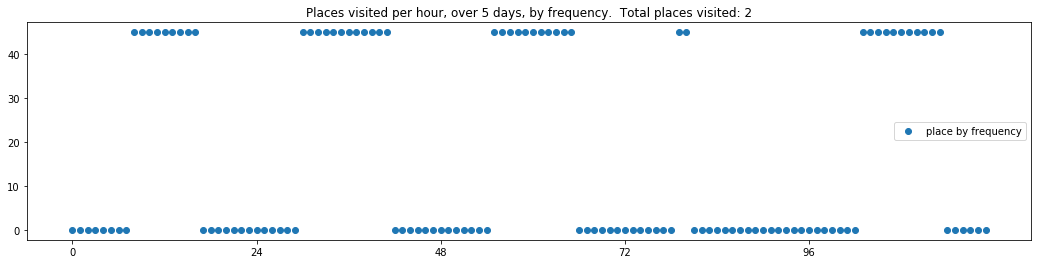


-------showing vectors for model: P-bidirectional-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:3-rnn_size:128-dropout:0.2-dim_embeddings:128-temperature:0.8
----- vector ----
prefix labels:  [163, 163]
[0, 0, 0, 0, 0, 0, 0, 0, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163]
[163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 0, 163, 163, 163, 163]
[163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 0, 163, 163, 163, 163, 163]
[163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163]
[163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 0, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163]


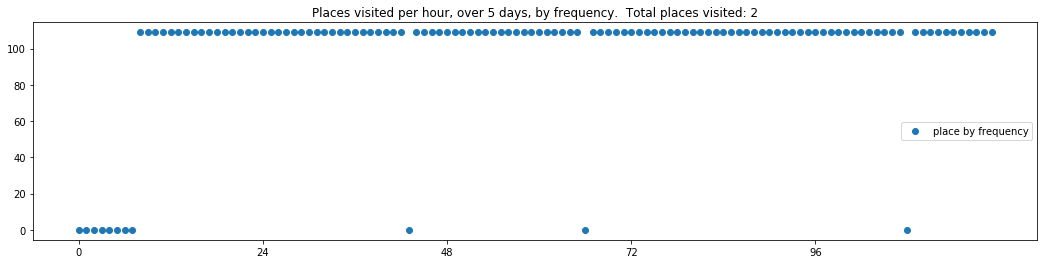

----- vector ----
prefix labels:  [412, 412]
[0, 0, 0, 0, 0, 0, 0, 0, 412, 412, 412, 412, 412, 412, 412, 412, 412, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 412, 412, 412, 412, 412, 412, 412, 412, 412, 412, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 412, 412, 412, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


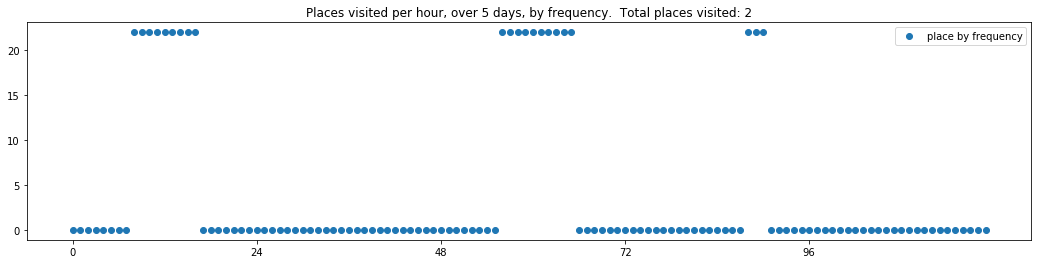

----- vector ----
prefix labels:  [6, 2]
[0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 6]
[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


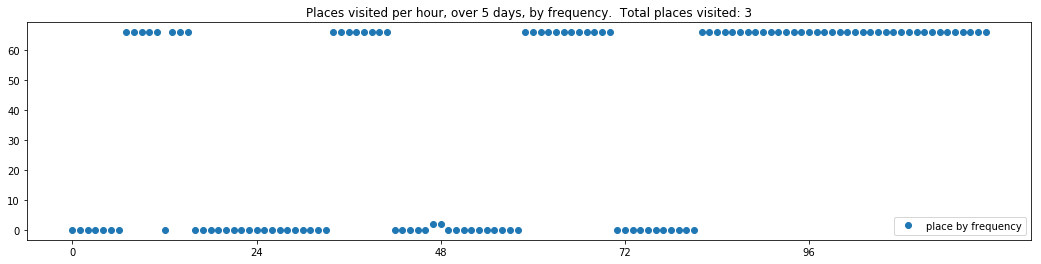


-------showing vectors for model: P-bidirectional.1-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:3-rnn_size:128-dropout:0.2-dim_embeddings:128-temperature:0.9
----- vector ----
prefix labels:  [124, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 124, 124, 124, 124]
[124, 124, 124, 124, 124, 124, 124, 124, 124, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 124, 124]
[124, 124, 124, 124, 124, 124, 124, 124, 124, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 124, 124, 124]
[124, 124, 124, 124, 124, 124, 124, 124, 124, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 124, 124, 124]


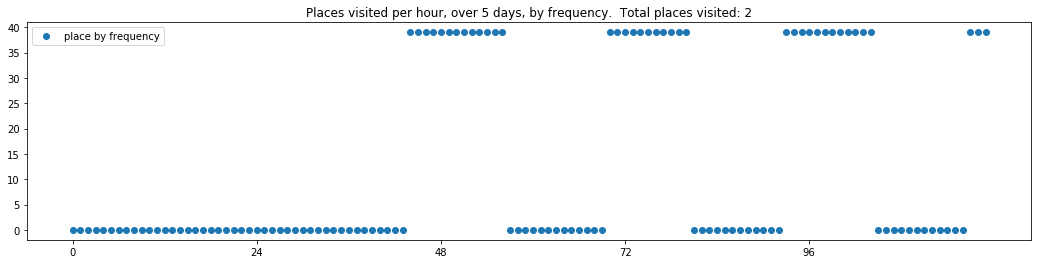

----- vector ----
prefix labels:  [308, 308]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308]
[308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308]
[308, 308, 0, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308]
[308, 308, 308, 0, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 308, 0]


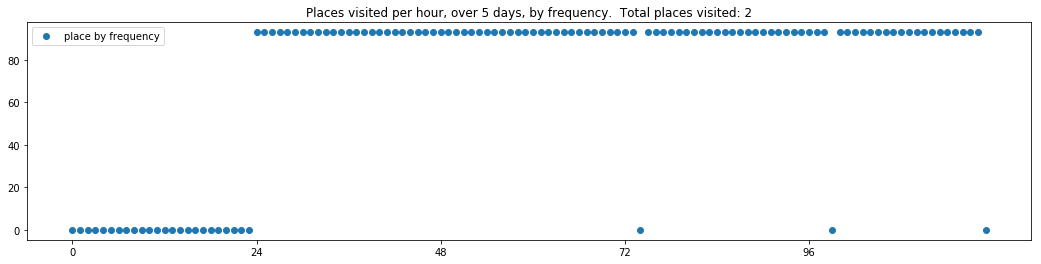

----- vector ----
prefix labels:  [121, 404]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 121, 121, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 404, 404, 404, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121]
[121, 121, 121, 121, 121, 121, 121, 121, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 404, 121, 121, 121]
[121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121, 121, 121]
[121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121, 121]


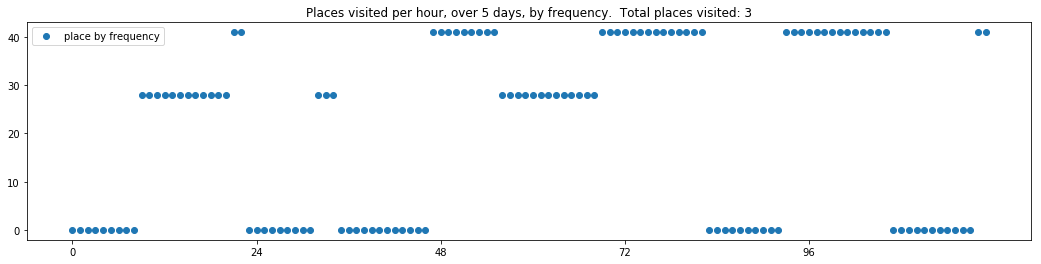


-------showing vectors for model: P-bidirectional.2-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:3-rnn_size:128-dropout:0.2-dim_embeddings:128-temperature:1.0
----- vector ----
prefix labels:  [121, 121]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 121, 121, 121]
[121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 84, 121, 121, 0, 0, 0, 121, 121, 121]
[84, 84, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 84, 121, 121, 121, 121, 121, 121, 121]
[121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 0, 121, 121, 121, 121, 121, 121, 284]


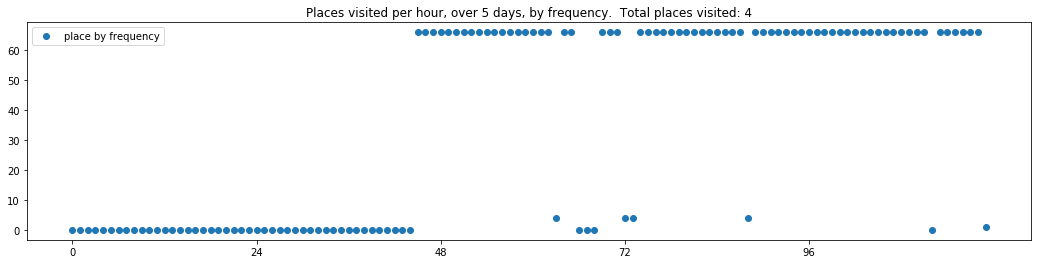

----- vector ----
prefix labels:  [256, 256]
[0, 0, 0, 0, 0, 0, 0, 315, 24, 24, 256, 577, 577, 577, 256, 256, 577, 256, 256, 256, 256, 256, 256, 256]
[256, 256, 256, 256, 256, 256, 256, 315, 256, 256, 256, 577, 577, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256]
[256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 191, 0, 256, 256, 577, 256, 256]
[256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 577, 119, 119, 291, 0, 256, 256, 256, 256, 256, 256, 256, 256]
[256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 0, 256]


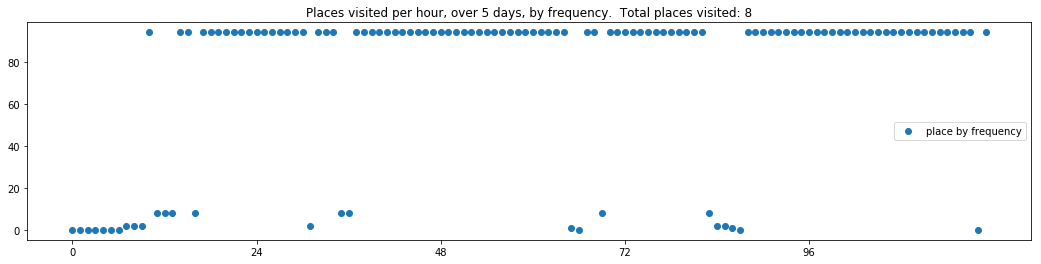

----- vector ----
prefix labels:  [402, 623]
[0, 0, 0, 0, 0, 0, 0, 623, 623, 623, 623, 623, 623, 623, 404, 404, 0, 0, 404, 404, 402, 402, 402, 402]
[402, 402, 402, 402, 402, 402, 402, 623, 78, 181, 402, 402, 329, 78, 78, 78, 0, 0, 402, 402, 402, 402, 402, 402]
[402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 329, 329, 0, 0, 0, 0, 0, 404, 404, 441, 441, 441, 441, 402]
[402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 0, 0, 0, 0, 0, 0, 0, 402, 402, 402, 402, 402, 402]
[402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 402, 441, 441, 441, 441, 441]


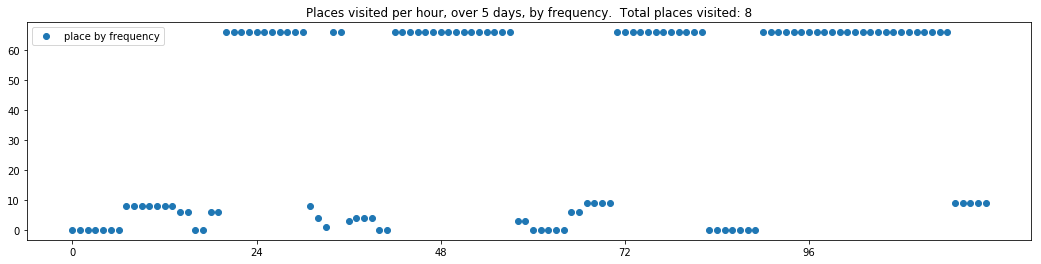


-------showing vectors for model: Q-bidirectional-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:60-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:128-temperature:0.8
----- vector ----
prefix labels:  [205, 76]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 205, 205, 205, 205, 205]
[205, 205, 205, 205, 205, 205, 205, 205, 0, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205]
[205, 205, 205, 0, 0, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205]
[205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205, 205]


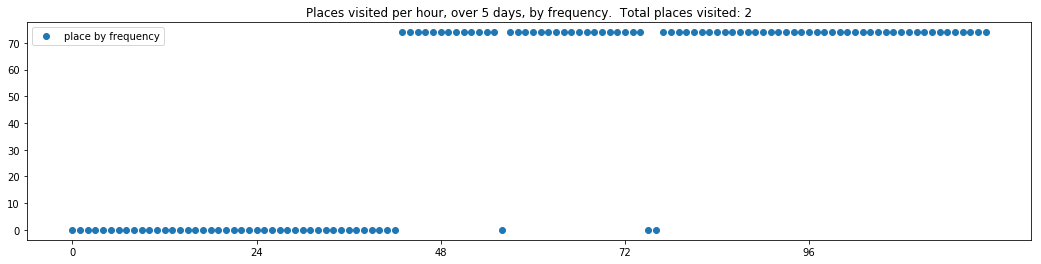

----- vector ----
prefix labels:  [626, 626]
[0, 0, 0, 0, 0, 0, 0, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626]
[626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626]
[626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626]
[626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626]
[626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626, 626]


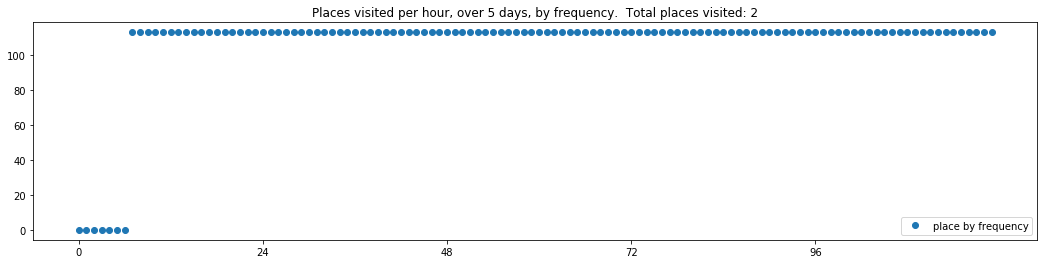

----- vector ----
prefix labels:  [580, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 351, 27, 27, 27, 27]
[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 1, 0, 0, 0]
[27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27]


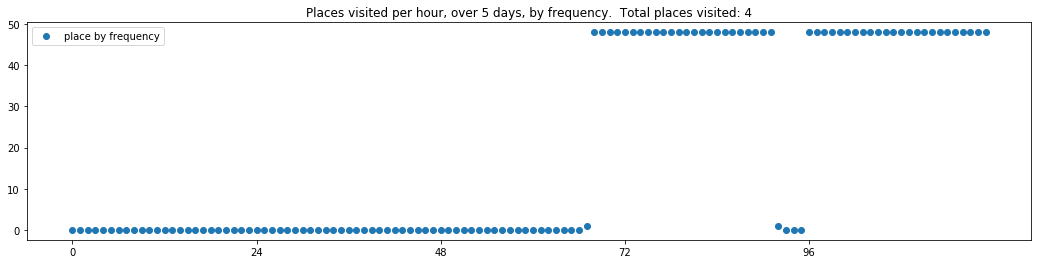


-------showing vectors for model: Q-bidirectional.1-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:60-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:128-temperature:0.9
----- vector ----
prefix labels:  [69, 69]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 69, 69, 69, 69, 69, 69, 69]
[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]
[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]
[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]
[69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69, 69]


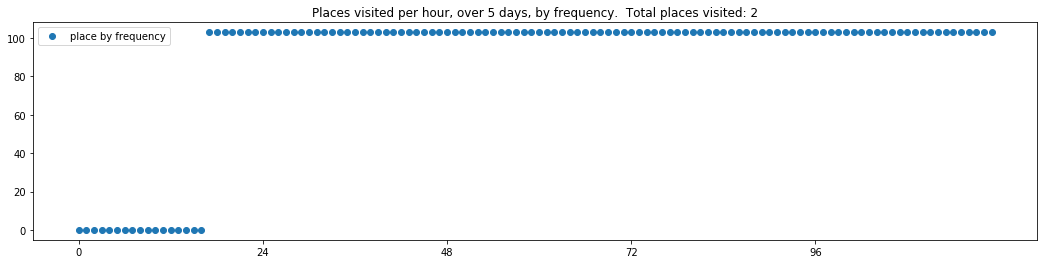

----- vector ----
prefix labels:  [168, 205]
[0, 0, 0, 0, 0, 0, 0, 0, 205, 205, 205, 205, 205, 620, 0, 0, 0, 0, 0, 0, 168, 168, 168, 168]
[168, 168, 168, 168, 168, 168, 168, 168, 0, 0, 0, 205, 205, 205, 205, 205, 205, 168, 168, 168, 168, 168, 168, 168]
[168, 168, 168, 168, 168, 168, 168, 168, 0, 0, 0, 0, 0, 0, 0, 0, 168, 168, 168, 168, 168, 168, 168, 168]
[168, 168, 168, 168, 168, 168, 168, 168, 0, 0, 0, 0, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168]
[168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 168, 305, 305, 305, 305, 168, 168, 168, 168]


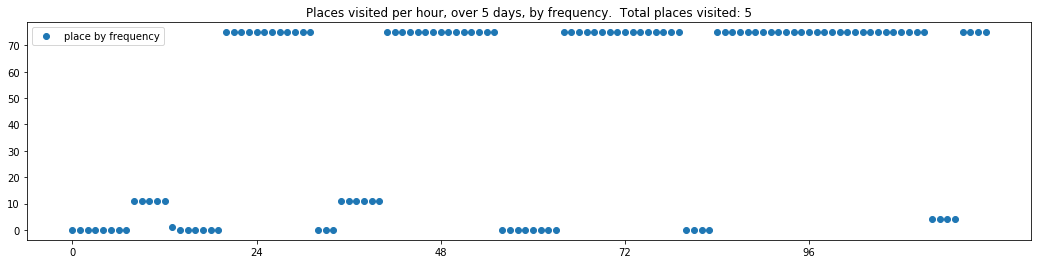

----- vector ----
prefix labels:  [636, 212]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 212, 212, 212, 212, 0, 0, 0, 288, 288, 288, 288, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 636, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 636, 636, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 636, 636, 636, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


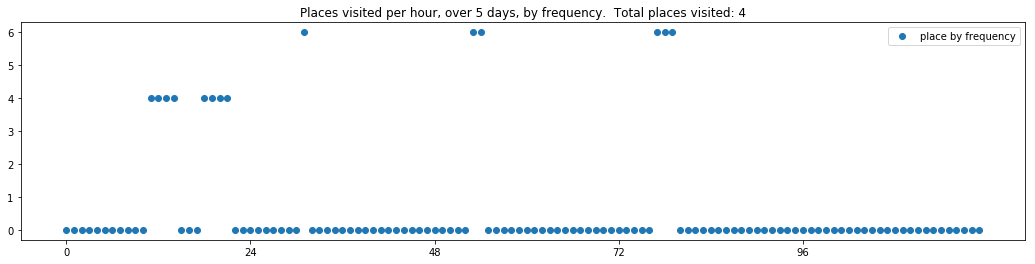


-------showing vectors for model: Q-bidirectional.2-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:60-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:128-temperature:1.0
----- vector ----
prefix labels:  [245, 162]
[0, 0, 0, 0, 0, 0, 0, 227, 162, 499, 245, 22, 22, 22, 162, 162, 162, 0, 245, 245, 245, 245, 245, 245]
[245, 245, 245, 245, 245, 245, 245, 245, 162, 162, 245, 119, 21, 162, 162, 162, 162, 162, 245, 245, 245, 245, 245, 245]
[245, 245, 245, 245, 245, 245, 245, 245, 327, 162, 439, 162, 21, 21, 162, 162, 162, 162, 245, 245, 245, 245, 245, 245]
[245, 245, 245, 245, 245, 245, 245, 245, 263, 263, 263, 436, 439, 440, 162, 162, 439, 245, 245, 245, 245, 245, 245, 245]
[245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 162, 162, 162, 162, 245, 245, 245, 245, 245, 245]


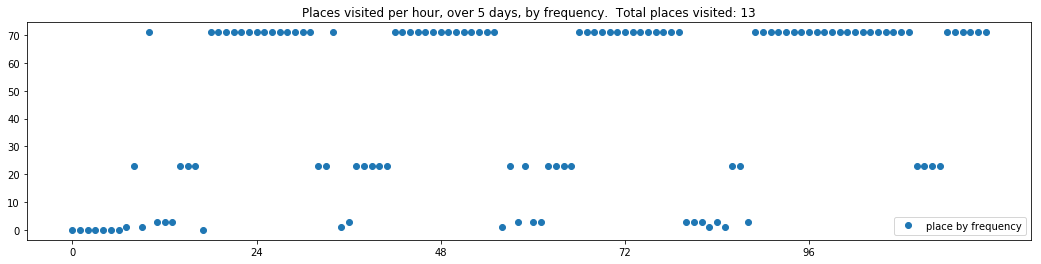

----- vector ----
prefix labels:  [121, 121]
[0, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 0, 121, 121, 150, 133, 121, 121, 121, 121, 121, 121, 121, 121]
[121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 414, 177, 121, 388, 133, 121, 53, 53]
[121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 0, 121, 121, 121, 121, 121, 121]
[121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 404, 121]
[121, 121, 388, 388, 404, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121, 121]


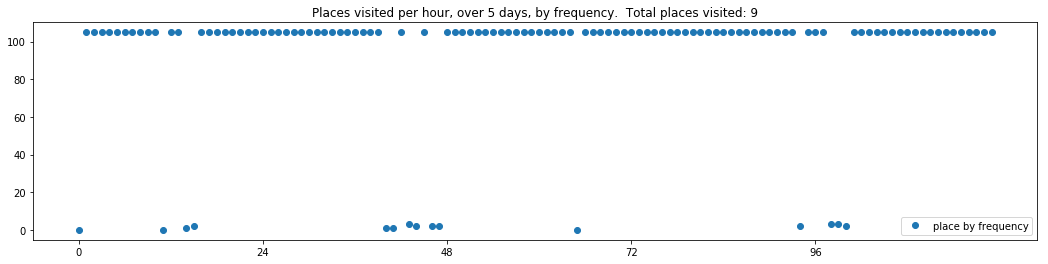

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558]
[558, 558, 558, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 558, 558]
[558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 151, 151, 151, 151, 151, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 26, 26, 26, 26, 26, 26, 26, 26, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


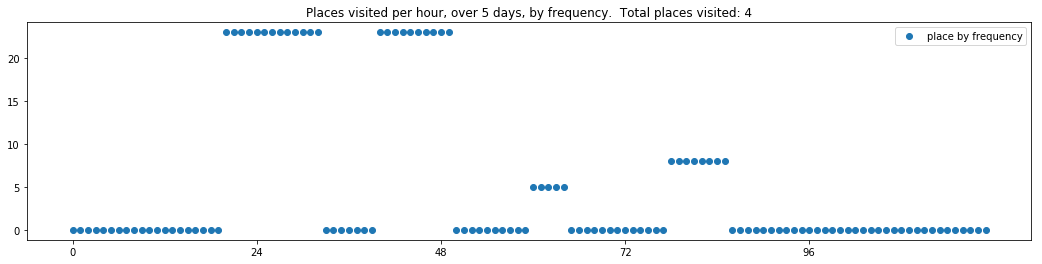


-------showing vectors for model: R-bidirectional-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:64-temperature:0.8
----- vector ----
prefix labels:  [146, 146]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 0, 146]
[146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146]
[146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 0, 0, 0, 0, 0, 0, 0]


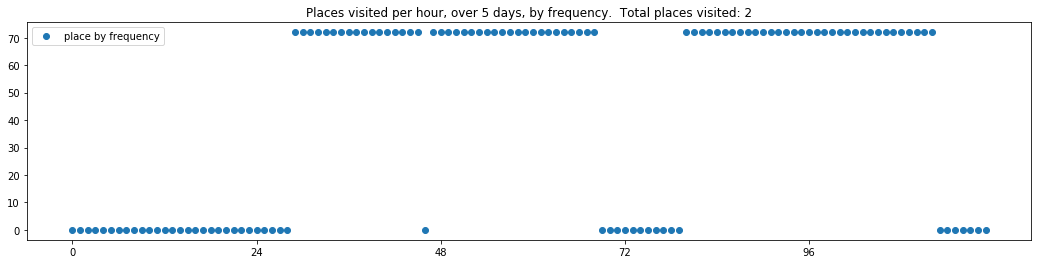

----- vector ----
prefix labels:  [190, 190]
[0, 0, 0, 0, 0, 0, 0, 222, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173]
[173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173]


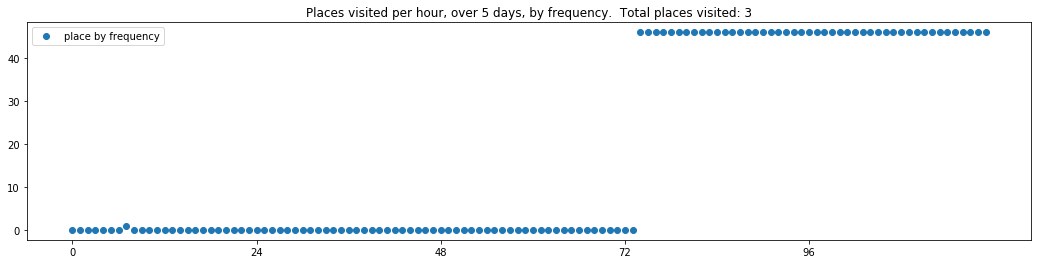

----- vector ----
prefix labels:  [316, 316]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 316, 316, 316]
[316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316]
[316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 90, 90, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


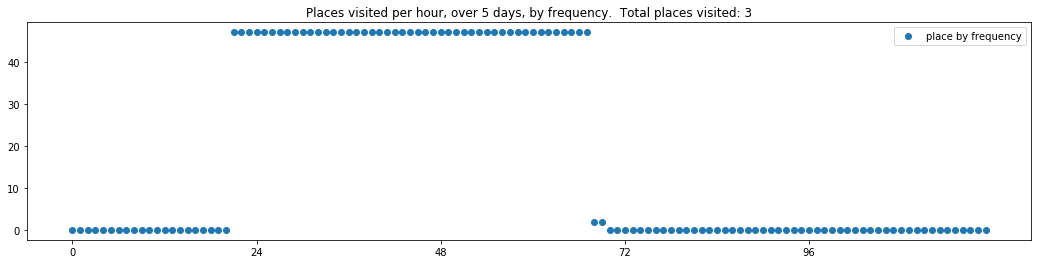


-------showing vectors for model: R-bidirectional.1-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:64-temperature:0.9
----- vector ----
prefix labels:  [611, 611]
[0, 0, 0, 0, 0, 0, 0, 611, 611, 611, 611, 0, 611, 611, 611, 611, 611, 611, 611, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 296, 611, 611, 0, 611, 611, 611, 611, 611, 611, 611, 611, 611, 95, 95, 95, 95, 95, 0]
[0, 0, 0, 0, 0, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 611, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 611, 611, 611, 611, 611, 611, 611, 611, 0, 0, 0, 0, 0, 0]


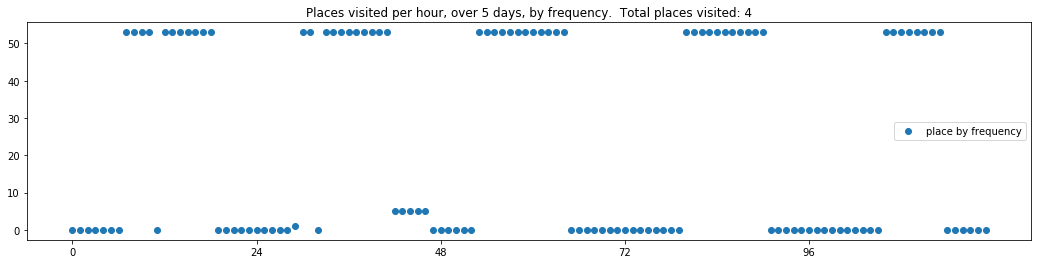

----- vector ----
prefix labels:  [403, 542]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 542, 0, 4, 542, 542, 542, 542, 384, 403, 403, 403, 403, 403]
[403, 403, 403, 403, 403, 403, 403, 403, 542, 0, 0, 0, 0, 542, 542, 542, 542, 542, 0, 0, 542, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 542, 350, 542, 542, 542, 542, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 542, 542, 542, 0, 542, 542, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 542, 542, 542, 542, 542, 542, 542, 542, 542, 542, 542, 542]


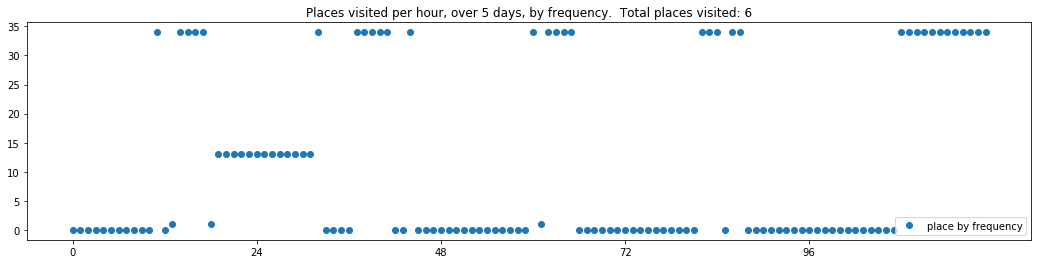

----- vector ----
prefix labels:  [558, 558]
[0, 0, 0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 558, 558, 558, 558, 558, 558, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 453, 453, 453, 453, 453, 219, 219]


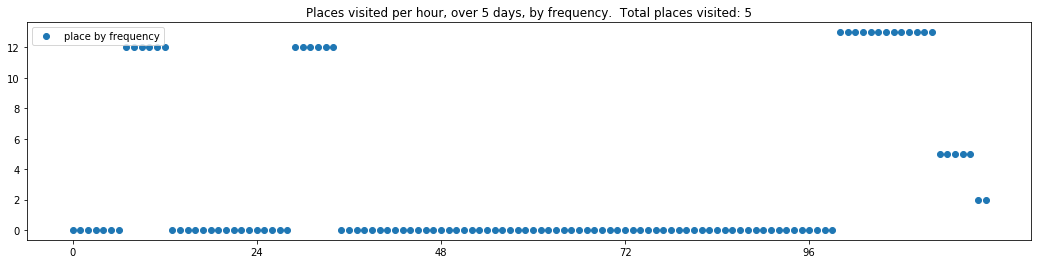


-------showing vectors for model: R-bidirectional.2-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:64-temperature:1.0
----- vector ----
prefix labels:  [464, 464]
[0, 0, 0, 0, 0, 0, 0, 369, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464]
[464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 321, 321, 464, 464, 464, 464, 464]
[464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464]
[464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464]
[464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464, 464]


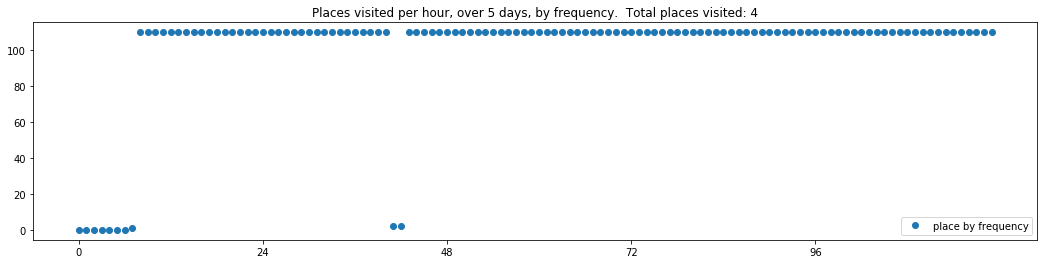

----- vector ----
prefix labels:  [215, 215]
[0, 0, 0, 0, 0, 0, 0, 0, 451, 451, 451, 451, 215, 215, 435, 215, 215, 215, 215, 215, 215, 215, 215, 215]
[215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 248, 0, 0, 0, 0, 0, 0, 0, 215, 215, 215]
[215, 215, 215, 215, 0, 0, 0, 248, 248, 248, 215, 215, 215, 215, 215, 0, 248, 248, 215, 215, 215, 215, 215, 215]
[215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 215, 0, 215, 0, 0, 215, 215, 215, 215, 215, 215, 215, 215]
[215, 215, 215, 215, 215, 215, 215, 215, 0, 248, 248, 248, 0, 0, 0, 24, 24, 24, 215, 215, 215, 215, 215, 215]


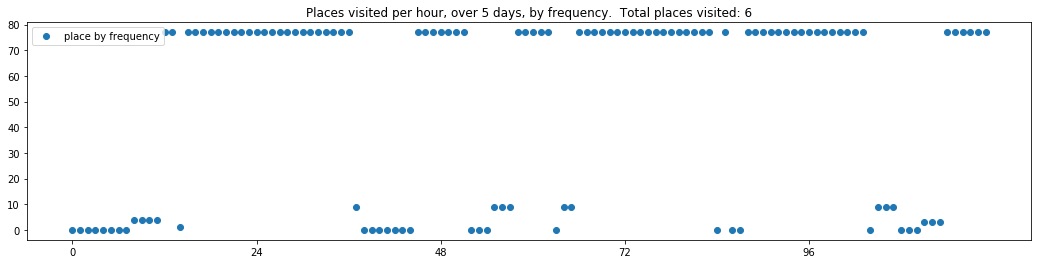

----- vector ----
prefix labels:  [174, 21]
[0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 174, 174]
[174, 174, 174, 174, 174, 174, 174, 21, 21, 21, 21, 21, 21, 21, 21, 0, 21, 33, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 21, 21, 21, 21, 21, 21, 21, 21, 0, 0, 21, 21, 21, 69, 69, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 21, 21, 21, 21, 21, 21, 21, 21, 21, 576, 393, 162, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 576, 576, 576, 576, 576, 576, 576, 576, 576]


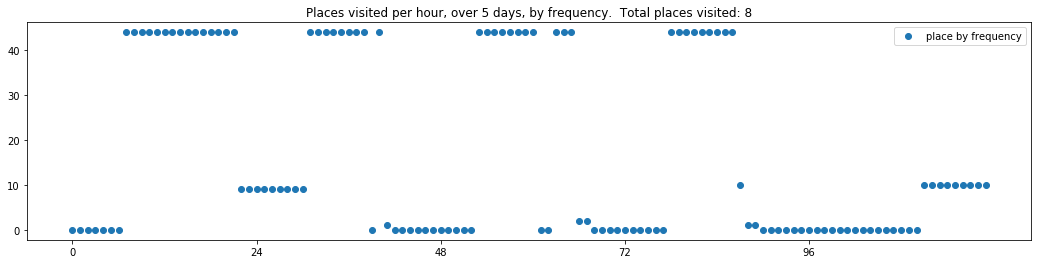


-------showing vectors for model: S-bidirectional-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:2-rnn_size:128-dropout:0.1-dim_embeddings:128-temperature:0.8
----- vector ----
prefix labels:  [395, 53]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 53, 53, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 53, 53, 53, 53, 53, 53, 53, 53, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 0, 0, 0, 0, 0, 0, 0, 0, 0]


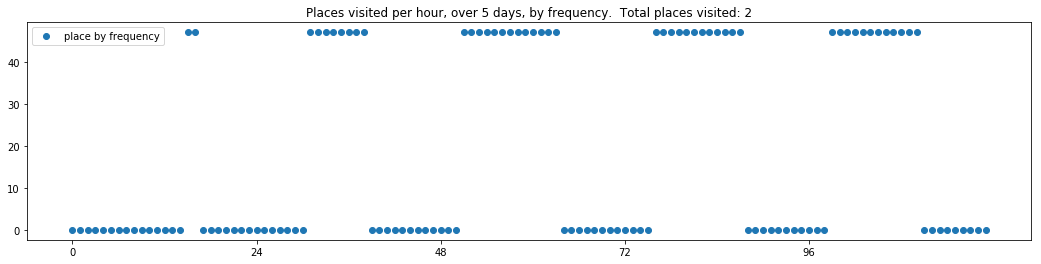

----- vector ----
prefix labels:  [416, 208]
[0, 0, 0, 0, 0, 421, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 208, 416, 416, 416, 416, 416, 416]
[416, 416, 416, 416, 416, 421, 421, 421, 421, 421, 421, 421, 421, 208, 208, 208, 208, 208, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 208, 208, 208, 208, 208, 208, 208]
[208, 208, 208, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 208, 208, 208, 208, 208, 208, 208]
[208, 208, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 421, 208, 208, 208, 208, 208, 208]


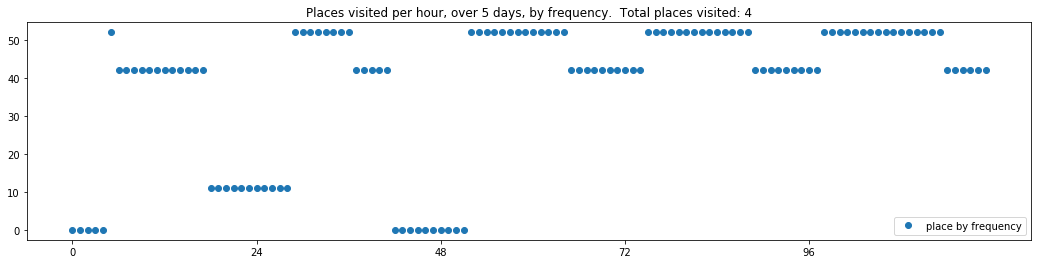

----- vector ----
prefix labels:  [504, 504]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 504, 504, 504]
[504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504]
[504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504]
[504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504]
[504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504, 504]


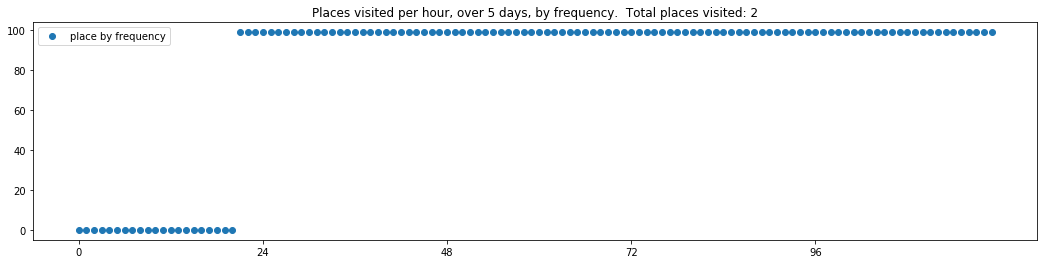


-------showing vectors for model: S-bidirectional.1-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:2-rnn_size:128-dropout:0.1-dim_embeddings:128-temperature:0.9
----- vector ----
prefix labels:  [203, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 203, 0, 203, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 554, 554, 554, 554, 554, 554, 554, 554, 554, 554, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 273, 0, 0, 0, 0, 554, 554, 554, 554, 554, 554, 554]


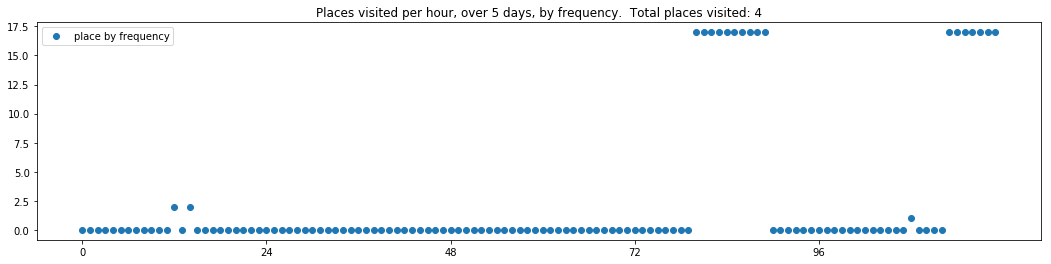

----- vector ----
prefix labels:  [610, 574]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 610, 610, 610, 610, 610]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 493, 493, 493, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


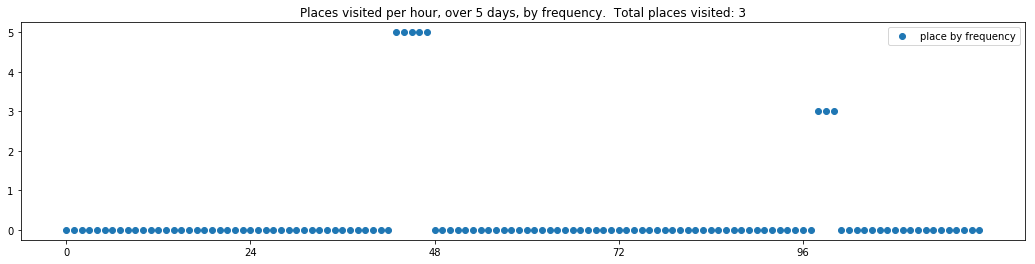

----- vector ----
prefix labels:  [526, 526]
[0, 0, 0, 0, 0, 0, 526, 526, 526, 526, 526, 526, 526, 526, 526, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 526, 526, 526, 526, 526, 526, 526, 526, 526, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209]
[0, 0, 0, 0, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209, 209]


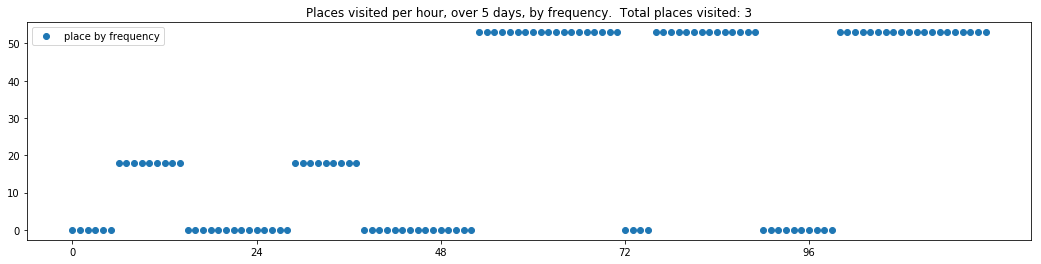


-------showing vectors for model: S-bidirectional.2-------

trajectories from: generated-sample-trajectories-rnn_bidirectional:True-max_len:50-rnn_layers:2-rnn_size:128-dropout:0.1-dim_embeddings:128-temperature:1.0
----- vector ----
prefix labels:  [559, 94]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 94, 94, 94, 94, 94, 559, 559, 559, 559, 559, 559, 559]
[559, 559, 559, 559, 559, 559, 94, 94, 94, 94, 94, 94, 94, 94, 94, 559, 559, 559, 559, 559, 559, 559, 559, 559]
[559, 559, 559, 559, 559, 559, 94, 94, 94, 94, 94, 94, 94, 94, 94, 559, 559, 559, 559, 559, 559, 4, 4, 0]
[0, 0, 0, 0, 0, 0, 559, 0, 94, 94, 94, 94, 94, 94, 94, 94, 559, 559, 559, 559, 559, 559, 559, 559]
[559, 0, 0, 0, 0, 0, 0, 0, 94, 94, 94, 94, 94, 94, 94, 559, 559, 559, 559, 559, 559, 559, 559, 559]


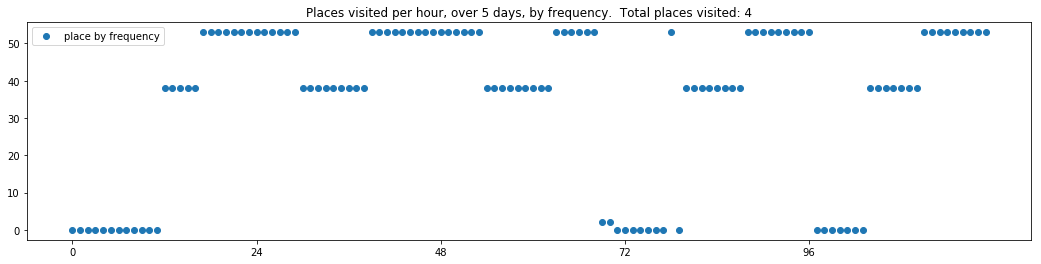

----- vector ----
prefix labels:  [364, 334]
[0, 0, 0, 0, 0, 0, 0, 334, 334, 334, 334, 334, 334, 0, 0, 0, 0, 249, 249, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 334, 334, 334, 334, 334, 334, 334, 334, 0, 0, 249, 249, 249, 249, 249, 249, 249]
[249, 122, 122, 122, 122, 122, 475, 334, 334, 334, 334, 334, 334, 334, 334, 0, 0, 254, 254, 249, 249, 249, 249, 249]
[257, 257, 257, 0, 0, 0, 334, 334, 334, 334, 334, 334, 334, 334, 334, 249, 249, 249, 249, 249, 249, 378, 378, 378]
[378, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 609, 609, 609, 400, 400, 249, 249, 249, 254, 254, 254, 254]


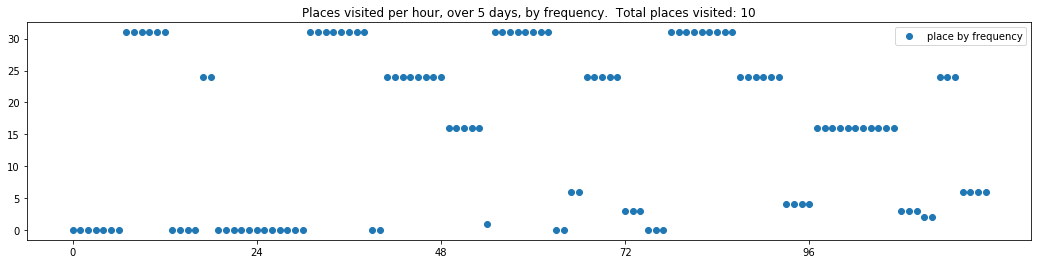

----- vector ----
prefix labels:  [316, 316]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316]
[316, 316, 316, 316, 316, 316, 316, 0, 0, 0, 0, 0, 0, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316]
[316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 0]
[316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316]
[316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 316, 0, 0]


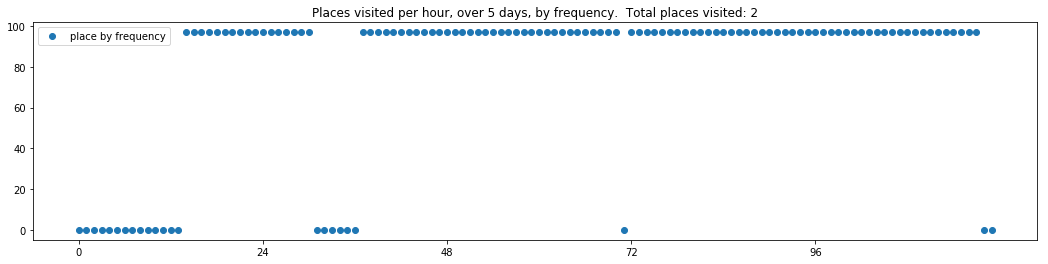


-------showing vectors for model: generated-sample-synthetic_trajectories-temperature:0.8-------

trajectories from: generated-sample-synthetic_trajectories-temperature:0.8
----- vector ----
prefix labels:  [21, 21]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 21, 21, 0, 0, 0, 21, 21]
[21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


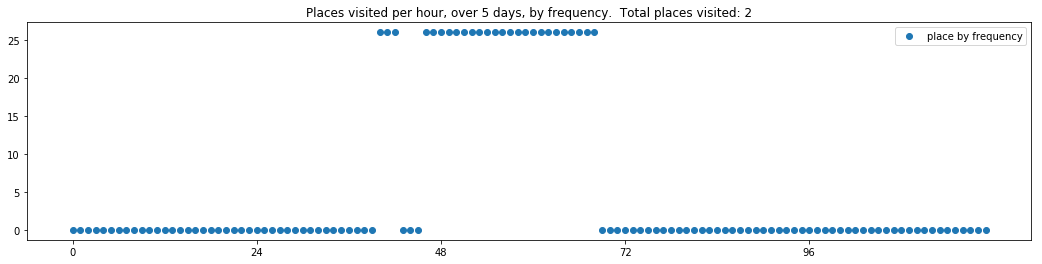

----- vector ----
prefix labels:  [224, 508]
[0, 0, 0, 0, 0, 0, 0, 0, 508, 508, 508, 508, 508, 508, 508, 508, 508, 508, 224, 224, 224, 224, 224, 224]
[224, 224, 224, 224, 224, 224, 224, 0, 508, 508, 508, 508, 508, 508, 508, 508, 508, 508, 224, 224, 224, 224, 224, 224]
[224, 224, 224, 224, 224, 224, 224, 224, 508, 508, 508, 508, 508, 508, 508, 508, 508, 508, 508, 224, 224, 224, 224, 224]
[224, 224, 224, 224, 224, 224, 224, 0, 508, 508, 508, 508, 508, 508, 508, 508, 508, 508, 508, 224, 224, 224, 224, 224]
[224, 224, 224, 224, 224, 224, 224, 224, 508, 508, 508, 508, 508, 508, 508, 0, 0, 0, 0, 0, 0, 0, 0, 0]


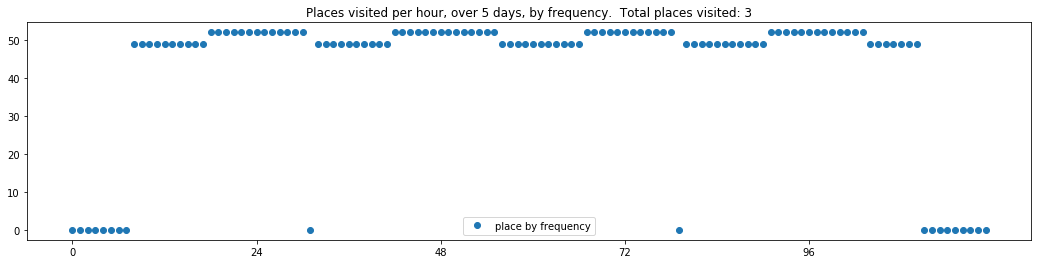

----- vector ----
prefix labels:  [343, 343]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


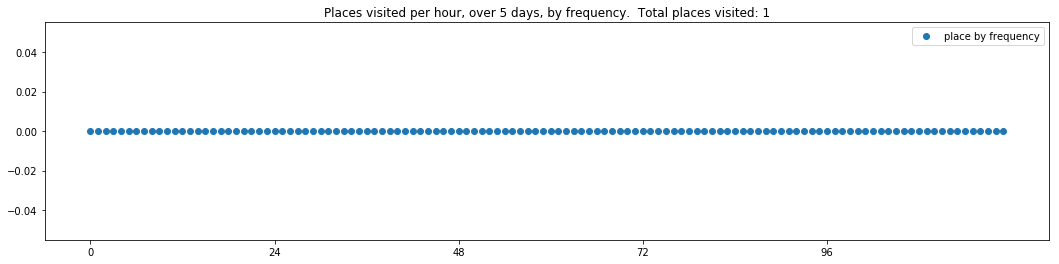


-------showing vectors for model: generated-sample-synthetic_trajectories-temperature:0.9-------

trajectories from: generated-sample-synthetic_trajectories-temperature:0.9
----- vector ----
prefix labels:  [51, 284]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 284, 284, 284, 51, 51, 51, 51, 51]
[51, 51, 51, 51, 51, 51, 51, 51, 284, 284, 284, 284, 284, 284, 284, 284, 284, 51, 51, 51, 51, 51, 51, 51]
[51, 51, 51, 51, 51, 51, 51, 51, 51, 284, 284, 284, 284, 284, 284, 284, 284, 284, 51, 51, 51, 51, 51, 51]
[51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 284, 284, 284, 284, 51, 51, 51, 51, 51, 51]
[51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51]


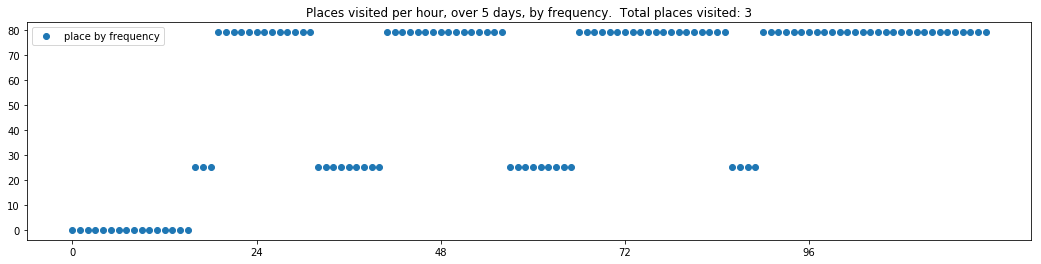

----- vector ----
prefix labels:  [504, 262]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 262, 262, 262, 504, 504, 504, 504, 504]
[504, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262]
[262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 504, 504, 504, 504, 504]
[504, 504, 504, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 262, 504, 504, 504, 504, 504, 504]


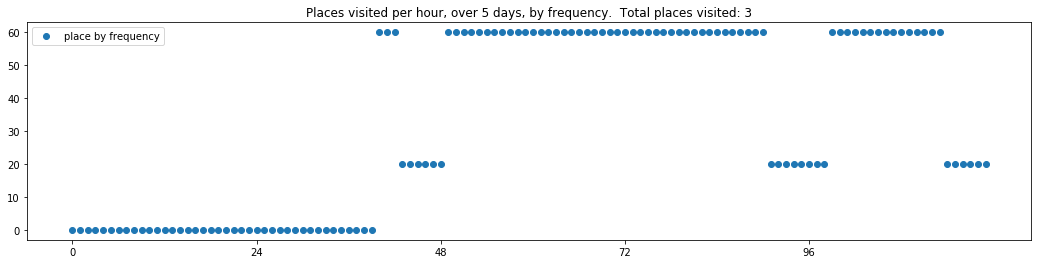

----- vector ----
prefix labels:  [537, 537]
[0, 0, 0, 0, 0, 0, 537, 537, 537, 537, 397, 397, 537, 537, 537, 630, 630, 537, 537, 537, 537, 537, 537, 537]
[537, 537, 0, 0, 0, 0, 537, 537, 537, 537, 397, 537, 0, 0, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537]
[537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 397, 397, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537]
[537, 537, 537, 537, 537, 537, 537, 537, 0, 0, 0, 537, 0, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537, 537]
[537, 537, 537, 537, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


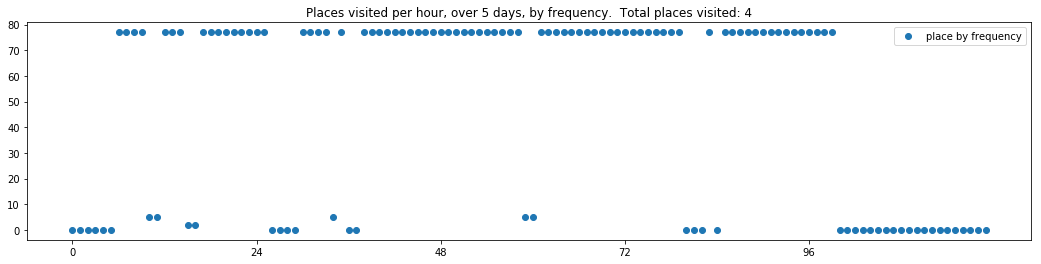


-------showing vectors for model: generated-sample-synthetic_trajectories-temperature:1.0-------

trajectories from: generated-sample-synthetic_trajectories-temperature:1.0
----- vector ----
prefix labels:  [448, 322]
[0, 0, 0, 0, 0, 0, 0, 0, 322, 322, 0, 0, 322, 322, 322, 322, 240, 0, 448, 448, 448, 448, 448, 448]
[448, 448, 448, 448, 448, 448, 448, 448, 448, 322, 0, 0, 322, 322, 322, 322, 322, 288, 288, 448, 448, 448, 448, 448]
[448, 448, 448, 448, 448, 448, 448, 448, 0, 322, 0, 0, 0, 0, 0, 0, 0, 0, 0, 448, 448, 448, 448, 448]
[448, 448, 448, 448, 448, 0, 0, 448, 448, 448, 271, 288, 288, 288, 288, 288, 288, 288, 448, 448, 448, 448, 448, 448]
[448, 448, 448, 0, 0, 0, 0, 0, 0, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448, 448]


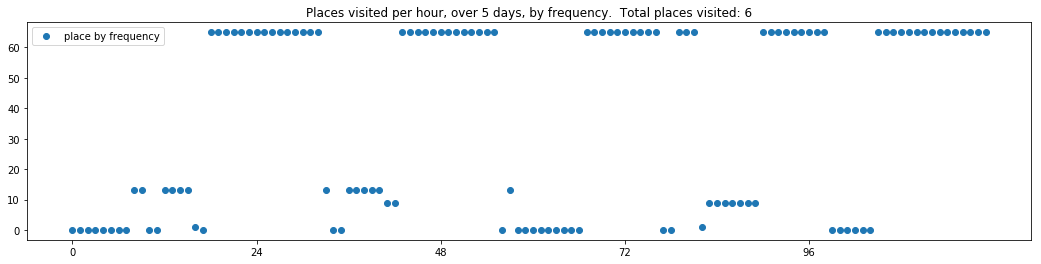

----- vector ----
prefix labels:  [65, 21]
[0, 0, 276, 276, 457, 2, 386, 386, 185, 185, 185, 185, 21, 21, 21, 21, 21, 21, 21, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 21, 21, 0, 21, 0, 0, 208, 0, 0, 0, 0]
[0, 0, 2, 0, 457, 0, 457, 457, 0, 0, 0, 0, 21, 21, 0, 0, 295, 295, 295, 295, 295, 295, 295, 295]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


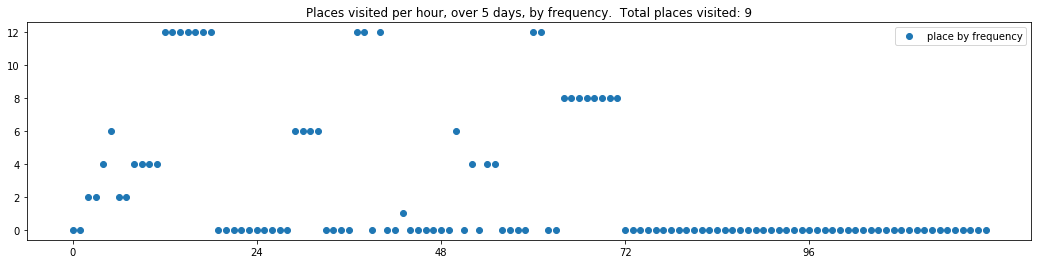

----- vector ----
prefix labels:  [223, 223]
[0, 0, 0, 0, 0, 0, 0, 0, 616, 0, 205, 223, 223, 223, 223, 223, 0, 608, 223, 223, 223, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 223, 223, 223, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 616, 531, 590, 0, 223, 223, 491, 491, 223, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 616, 616, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 223, 616, 616, 514, 0, 0, 0, 0, 0, 0, 223, 223, 223, 223, 223, 391, 0]


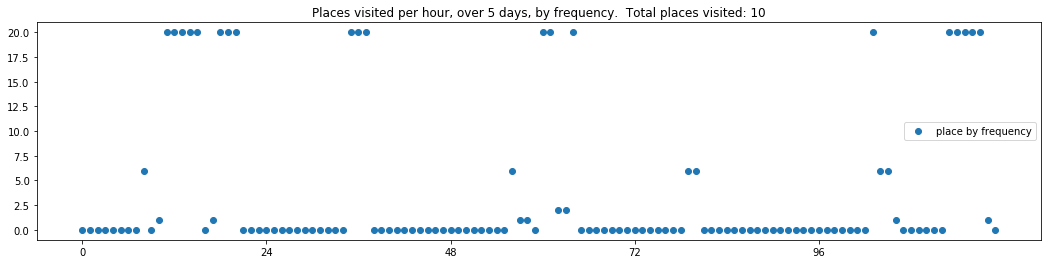

In [516]:
import random 

sample_size = 3

for column_name in models_matrix_df.columns:
    print('\n-------showing vectors for model: %s-------' % column_name)
    generated_trajectories_name = models_matrix_df.loc[generated_trajectories_name_idx][column_name]
    print('\ntrajectories from: %s' % generated_trajectories_name)
    generated_trajectories = generated_sample_trajectories_map[generated_trajectories_name]
    for tv in random.sample(generated_trajectories, sample_size):
        print_dwell_vector_by_days(tv)
        plot_trajectory_vector_frequencies(tv, by_frequency_order=False)

In [525]:
# Helper function to create dummy row that is then filled in
def add_dummy_row(df, index_name):
    dummy_row_dict = {c:np.NaN for c in df.columns}
    return df.append(pd.Series(dummy_row_dict, name=index_name))

### check that fake users do not travel impossibly far

We check that between two consecutive time intervals, synthetic users don’t travel impossibly far; that is, they don’t suddenly go from one census area to another that is too far away to have been traveled within that time interval.  We can do this by looking at the geographic locations of the centroids or the boundaries of census areas.  We consider two consecutive stay locations in a stay vector sequence as a bigram, and must verify that each bigram is sensible. It is possible for sensible bigrams in the generated data to occur that have not been seen in the training data. However, instead of verifying that all such bigrams are sensible, we have a shortcut due to how well our RNN models are fit to our training data.  We are able to collect the set of bigrams in the real sequences, and the set of bigrams in the synthetic sequences, and check whether only bigrams from the real sequences occur in the synthetic sequences.  If so, all the bigrams in our generated data must be sensible.

Measure:
- `distinct unseen bigrams`: number of distinct bigrams found in generated trajectories but not real trajectores
- `total unseen bigrams`: total number of bigrams in generated trajectories but not real trajectories
- `portion unseen bigrams`: (# total unseen bigrams)/(# total generated bigrams)
- `portion unseen bigrams allowing skips`: (# total unseen bigrams allowing skips)/(# total generated bigrams)


`portion unseen bigrams allowing skips`:

There are unseen bigrams. So also check something else:

Synthetic users do not travel anywhere within 1 hour that real users did not travel within 2 hours.

i.e. Get the bigrams that include skips over 1 hour at a time from the real user trajectories. A sequence of "A B C D" will then produce bigrams (A, B), (A, C), (B, C), (B, D), (C, D).

Compare this to the set of bigrams from the synthetic data that do not include skips. Check if this set of bigrams from real data with 1 hour skips contains the set of bigrams from synthetic data without skips.


Add row for each model

In [526]:
distinct_unseen_bigrams = 'distinct unseen bigrams'
total_unseen_bigrams = 'total unseen bigrams'
portion_unseen_bigrams = 'portion unseen bigrams'
portion_unseen_bigrams_w_skips = 'portion unseen bigrams allowing skips'

models_matrix_df = add_dummy_row(models_matrix_df, distinct_unseen_bigrams)
models_matrix_df = add_dummy_row(models_matrix_df, total_unseen_bigrams)
models_matrix_df = add_dummy_row(models_matrix_df, portion_unseen_bigrams)
models_matrix_df = add_dummy_row(models_matrix_df, portion_unseen_bigrams_w_skips)
models_matrix_df

Q-bidirectional.2  \
rnn_bidirectional                                                                   True   
max_length                                                                            60   
rnn_layers                                                                             3   
rnn_size                                                                             128   
dropout                                                                              0.1   
dim_embeddings                                                                       128   
temperature                                                                            1   
batch size                                                                          1024   
generated_trajectories_name            generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                             1632   
total unseen bigrams                                                                1854   
portion unseen bigrams                                                        0.00759836   
portion unseen bigrams allowing skips                                         0.00633197   
home labels match portion                                                          0.848   
work labels match portion                                                         0.7375   
distinct unseen bigrams                                                              NaN   
total unseen bigrams                                                                 NaN   
portion unseen bigrams                                                               NaN   
portion unseen bigrams allowing skips                                                NaN   

                                                                       Q-bidirectional.1  \
rnn_bidirectional                                                                   True   
max_length                                                                            60   
rnn_layers                                                                             3   
rnn_size                                                                             128   
dropout                                                                              0.1   
dim_embeddings                                                                       128   
temperature                                                                          0.9   
batch size                                                                          1024   
generated_trajectories_name            generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                              753   
total unseen bigrams                                                                 909   
portion unseen bigrams                                                        0.00372541   
portion unseen bigrams allowing skips                                         0.00283197   
home labels match portion                                                          0.845   
work labels match portion                                                          0.741   
distinct unseen bigrams                                                              NaN   
total unseen bigrams                                                                 NaN   
portion unseen bigrams                                                               NaN   
portion unseen bigrams allowing skips                                                NaN   

                                                                       P-bidirectional.2  \
rnn_bidirectional                                                                   True   
max_length                                                                            50   
rnn_layers                                                                             3   
rnn_size             

In [527]:
from evaluators import get_unseen_bigrams, get_bigrams_for_trajectory_vectors


# get bigrams for the real trajectories to compare the generated trajectories to
real_bigram_set = get_bigrams_for_trajectory_vectors(real_trajectories, with_skip=False)
real_bigram_set_with_skip = get_bigrams_for_trajectory_vectors(real_trajectories, with_skip=True)

for column_name in models_matrix_df.columns:
    generated_trajectories_name = models_matrix_df.loc[generated_trajectories_name_idx][column_name]
    generated_trajectories = generated_sample_trajectories_map[generated_trajectories_name]
    # get bigrams for generated trajectories (for counting)
    generated_bigram_set = get_bigrams_for_trajectory_vectors(generated_trajectories)
    # find the bigrams in the generated trajectories that do not occur in the real trajectories
    # get mapping of {unseen bigrams --> count}
    #    where count is number of times the unseen bigram occurs in the generated trajectories
    unseen_bigram_to_count = get_unseen_bigrams(real_bigram_set, generated_trajectories)
    # count the distinct unseen bigrams
    distinct_unseen_bigrams_count = len(unseen_bigram_to_count)
    # count the total number of times an unseeen bigram occurs
    total_unseen_bigrams_count = sum(unseen_bigram_to_count.values())
    # compute the portion of total unseen bigrams over all generated bigrams
    total_generated_bigrams_count = (len(generated_trajectories)*len(generated_trajectories[0]))
    portion_unseen_total_bigrams = total_unseen_bigrams_count / total_generated_bigrams_count
    
    # compute portion of total unseen bigrams over all generated bigrams when skips are allowed
    unseen_bigram_to_count_with_skip = get_unseen_bigrams(real_bigram_set_with_skip, generated_trajectories)
    total_unseen_bigrams_count_with_skip = sum(unseen_bigram_to_count_with_skip.values())
    portion_unseen_total_bigrams_w_skip = total_unseen_bigrams_count_with_skip / total_generated_bigrams_count
    
    # Add values to matrix
    models_matrix_df.loc[distinct_unseen_bigrams][column_name] = distinct_unseen_bigrams_count
    models_matrix_df.loc[total_unseen_bigrams][column_name] = total_unseen_bigrams_count
    models_matrix_df.loc[portion_unseen_bigrams][column_name] = portion_unseen_total_bigrams
    models_matrix_df.loc[portion_unseen_bigrams_w_skips][column_name] = portion_unseen_total_bigrams_w_skip
    

models_matrix_df

/Users/aberke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/aberke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/aberke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

Q-bidirectional.2  \
rnn_bidirectional                                                                   True   
max_length                                                                            60   
rnn_layers                                                                             3   
rnn_size                                                                             128   
dropout                                                                              0.1   
dim_embeddings                                                                       128   
temperature                                                                            1   
batch size                                                                          1024   
generated_trajectories_name            generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                             1632   
total unseen bigrams                                                                1854   
portion unseen bigrams                                                        0.00759836   
portion unseen bigrams allowing skips                                         0.00633197   
home labels match portion                                                          0.848   
work labels match portion                                                         0.7375   
distinct unseen bigrams                                                              NaN   
total unseen bigrams                                                                 NaN   
portion unseen bigrams                                                               NaN   
portion unseen bigrams allowing skips                                                NaN   

                                                                       Q-bidirectional.1  \
rnn_bidirectional                                                                   True   
max_length                                                                            60   
rnn_layers                                                                             3   
rnn_size                                                                             128   
dropout                                                                              0.1   
dim_embeddings                                                                       128   
temperature                                                                          0.9   
batch size                                                                          1024   
generated_trajectories_name            generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                              753   
total unseen bigrams                                                                 909   
portion unseen bigrams                                                        0.00372541   
portion unseen bigrams allowing skips                                         0.00283197   
home labels match portion                                                          0.845   
work labels match portion                                                          0.741   
distinct unseen bigrams                                                              NaN   
total unseen bigrams                                                                 NaN   
portion unseen bigrams                                                               NaN   
portion unseen bigrams allowing skips                                                NaN   

                                                                       P-bidirectional.2  \
rnn_bidirectional                                                                   True   
max_length                                                                            50   
rnn_layers                                                                             3   
rnn_size             

### Check condition labels match output

The generated stay vectors are prefixed by home and work labels that act as conditions for generation.  For evaluation, we then check that we are able to infer the same home census area (using the same f_home, f_work function used in preprocessing) as the home prefix label we condition on. That is, if we condition on generating a synthetic stay vector for a person living in census area A, then by applying our f_home function on that generated vector, we should expect area A to be returned.

Measure:
- `home labels match portion`:  portion of vectors in generated set where the home label matches the vector data
- `work labels match portion`:  portion of vectors in generated set where the work label matches the vector data

In [528]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from trajectory_transformers import get_trajectory_home_label, get_trajectory_work_label


# Set up the evaluation row data that will be filled in
home_labels_match_portion = 'home labels match portion'
work_labels_match_portion = 'work labels match portion'
models_matrix_df = add_dummy_row(models_matrix_df, home_labels_match_portion)
models_matrix_df = add_dummy_row(models_matrix_df, work_labels_match_portion)
models_matrix_df

Q-bidirectional.2  \
rnn_bidirectional                                                                   True   
max_length                                                                            60   
rnn_layers                                                                             3   
rnn_size                                                                             128   
dropout                                                                              0.1   
dim_embeddings                                                                       128   
temperature                                                                            1   
batch size                                                                          1024   
generated_trajectories_name            generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                             1632   
total unseen bigrams                                                                1854   
portion unseen bigrams                                                        0.00759836   
portion unseen bigrams allowing skips                                         0.00633197   
home labels match portion                                                          0.848   
work labels match portion                                                         0.7375   
distinct unseen bigrams                                                              NaN   
total unseen bigrams                                                                 NaN   
portion unseen bigrams                                                               NaN   
portion unseen bigrams allowing skips                                                NaN   
home labels match portion                                                            NaN   
work labels match portion                                                            NaN   

                                                                       Q-bidirectional.1  \
rnn_bidirectional                                                                   True   
max_length                                                                            60   
rnn_layers                                                                             3   
rnn_size                                                                             128   
dropout                                                                              0.1   
dim_embeddings                                                                       128   
temperature                                                                          0.9   
batch size                                                                          1024   
generated_trajectories_name            generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                              753   
total unseen bigrams                                                                 909   
portion unseen bigrams                                                        0.00372541   
portion unseen bigrams allowing skips                                         0.00283197   
home labels match portion                                                          0.845   
work labels match portion                                                          0.741   
distinct unseen bigrams                                                              NaN   
total unseen bigrams                                                                 NaN   
portion unseen bigrams                                                               NaN   
portion unseen bigrams allowing skips                                                NaN   
home labels match portion                                                            NaN   
work labels match portion                                                            NaN   

                     

#### Check that home & work labels match generated vector data


- Note portion of users in that have sufficient data across 2 weeks: 14076/22673 = 0.6208265337626252

- Note how often inferred home labels change between weeks for users in real dataset:
    - portion (users with matching homes)/(total users) = (12860)/(14076) = 0.9136118215402103
- Note how often inferred work labels change between weeks for users in real dataset:
    - portion (users with matching work)/(total users) = (10676)/(14076) = 0.7584541062801933

In [529]:
def get_vectors_with_matching_home_prefix(prefixed_vectors):
    vectors_with_matching_home_prefix = []
    for prefixed_v in prefixed_vectors:
        prefix, v = break_prefix(prefixed_v, days=TIME_PERIOD_DAYS, hours=HOURS_PER_DAY)
        home_label_prefix = prefix[0]
        inferred_home_label = get_trajectory_home_label(v)
        if inferred_home_label == home_label_prefix:
            vectors_with_matching_home_prefix.append(prefixed_v)
    return vectors_with_matching_home_prefix  

def get_vectors_with_matching_work_prefix(prefixed_vectors):
    vectors_with_matching_work_prefix = []
    for prefixed_v in prefixed_vectors:
        prefix, v = break_prefix(prefixed_v, days=TIME_PERIOD_DAYS, hours=HOURS_PER_DAY)
        work_label_prefix = prefix[1]
        inferred_work_label = get_trajectory_work_label(v)
        if inferred_work_label == work_label_prefix:
            vectors_with_matching_work_prefix.append(prefixed_v)
    return vectors_with_matching_work_prefix

    
real_vectors_with_matching_home_prefix = get_vectors_with_matching_home_prefix(real_trajectories)
assert(len(real_vectors_with_matching_home_prefix) == len(real_trajectories)) 
real_vectors_with_matching_work_prefix = get_vectors_with_matching_work_prefix(real_trajectories)
assert(len(real_vectors_with_matching_work_prefix) == len(real_trajectories))  
    
for column_name in models_matrix_df.columns:
    generated_trajectories_name = models_matrix_df.loc[generated_trajectories_name_idx, column_name]
    generated_trajectories = generated_sample_trajectories_map[generated_trajectories_name]
    vectors_with_matching_home_prefix = get_vectors_with_matching_home_prefix(generated_trajectories)
    vectors_with_matching_work_prefix = get_vectors_with_matching_work_prefix(generated_trajectories)
    home_match_portion = len(vectors_with_matching_home_prefix)/len(generated_trajectories)
    work_match_portion = len(vectors_with_matching_work_prefix)/len(generated_trajectories)
    models_matrix_df.loc[home_labels_match_portion][column_name] = home_match_portion
    models_matrix_df.loc[work_labels_match_portion][column_name] = work_match_portion


/Users/aberke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/aberke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [530]:
models_matrix_df.drop(['generated for cambridge', 'generated for general sample'], axis=0, inplace=True)

KeyError: "['generated for cambridge' 'generated for general sample'] not found in axis"

sort the columns by 'home labels match portion'

In [531]:
models_matrix_df.sort_values(home_labels_match_portion, axis=1, inplace=True, ascending=False)

ValueError: The index label 'home labels match portion' is not unique.

In [533]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(models_matrix_df)
# models_matrix_df

Q-bidirectional.2  \
rnn_bidirectional                                                                   True   
max_length                                                                            60   
rnn_layers                                                                             3   
rnn_size                                                                             128   
dropout                                                                              0.1   
dim_embeddings                                                                       128   
temperature                                                                            1   
batch size                                                                          1024   
generated_trajectories_name            generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                             1632   
total unseen bigrams                                                                1854   
portion unseen bigrams                                                        0.00759836   
portion unseen bigrams allowing skips                                         0.00633197   
home labels match portion                                                          0.848   
work labels match portion                                                         0.7375   
distinct unseen bigrams                                                              NaN   
total unseen bigrams                                                                 NaN   
portion unseen bigrams                                                               NaN   
portion unseen bigrams allowing skips                                                NaN   
home labels match portion                                                            NaN   
work labels match portion                                                            NaN   

                                                                       Q-bidirectional.1  \
rnn_bidirectional                                                                   True   
max_length                                                                            60   
rnn_layers                                                                             3   
rnn_size                                                                             128   
dropout                                                                              0.1   
dim_embeddings                                                                       128   
temperature                                                                          0.9   
batch size                                                                          1024   
generated_trajectories_name            generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                              753   
total unseen bigrams                                                                 909   
portion unseen bigrams                                                        0.00372541   
portion unseen bigrams allowing skips                                         0.00283197   
home labels match portion                                                          0.845   
work labels match portion                                                          0.741   
distinct unseen bigrams                                                              NaN   
total unseen bigrams                                                                 NaN   
portion unseen bigrams                                                               NaN   
portion unseen bigrams allowing skips                                                NaN   
home labels match portion                                                            NaN   
work labels match portion                                                            NaN   

                     

### Check that distribution of where people spend their time is consistent

We evaluate that in aggregate, the distribution of where users spend their time is consistent.
We look at the correlation between real and synthetic data, in terms of aggregate time spent in each area.

Note: Where people spend time is biased to where they work and live.
So when doing this comparison, we compare generated synthetic trajectories to the random sample of 2000 real trajectories whose home,work label pairs were used to generate the synthetic data.

In [476]:
real_trajectories_sample_2000_filename = '../data/relabeled_trajectories_1_workweek_sample_2000.txt'
real_trajectories_sample = read_trajectories_from_file(real_trajectories_sample_2000_filename)

In [477]:
def get_unprefixed_vectors(prefixed_vectors):
    unprefixed_vectors = []
    for pv in prefixed_vectors:
        _p, v = break_prefix(pv, days=TIME_PERIOD_DAYS, hours=HOURS_PER_DAY)
        unprefixed_vectors.append(v)
    return unprefixed_vectors

In [478]:
def get_area_to_time_spent_comparison_dict(vectors):
    """
    Returns a dictionary mapping place to the portion of time spend in that place, 
    for all of the vectors in the vector set.

    i.e. {area: portion of time spent in area for each area seen in the vectors}
    
    """
    if not len(vectors):
        return {}
    vectors = get_unprefixed_vectors(vectors)
    vector_length = HOURS_PER_DAY * TIME_PERIOD_DAYS
    # assert that vectors do not have prefix
    assert(len(vectors[0]) == vector_length)
    
    area_to_total_time_dict = {}  #{area: total time in area}
    for v in vectors:
        for area in v:
            if area not in area_to_total_time_dict:
                area_to_total_time_dict[area] = 0
            area_to_total_time_dict[area] += 1
    # transform total time dict into time portion dict
    total_time = vector_length * len(vectors) # total hours per vector x number of vectors
    area_to_portion_of_time_dict = {a:t/total_time for a, t in area_to_total_time_dict.items()}
    return area_to_portion_of_time_dict

def get_area_to_time_spent_comparison_df(d1, d2, d1_name='sample 1', d2_name='sample 2'):
    # areas are union of two areas sets, without the null place
    area_set = (set(d1.keys()) | set(d2.keys())) - set({0})
    area_key = 'area'
    data = {area_key: [], d1_name: [], d2_name: []}
    for area in area_set:
        data[area_key].append(area)
        agg_time_1 = d1[area] if area in d1 else 0
        agg_time_2 = d2[area] if area in d2 else 0
        data[d1_name].append(agg_time_1)
        data[d2_name].append(agg_time_2)
    return pd.DataFrame.from_dict(data).set_index(area_key)


from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
def plot_time_spent_comparison(area_to_time_spent_comparison_df,
                        name1='agg. time portion (1)',  name2='agg. time portion (2)'):
    # order it by how much time is spent in area by col 1 users (e.g. real users)
    print('sorting by area_to_time_spent_comparison_df.columns[0]', area_to_time_spent_comparison_df.columns[0])
    area_to_time_spent_comparison_df.sort_values(area_to_time_spent_comparison_df.columns[0], inplace=True, ascending=False)
    title = 'proportions of time spent in each area: %s vs %s' % (name1, name1)
    ax = area_to_time_spent_comparison_df.plot.bar(title=title)
    ax.set_ylabel('portion of time')
    plt.xticks([])

In [479]:
area_to_dwell_time_correlation_all = 'correlation of aggregate dwell time in each area w.r.t ALL real users'
area_to_dwell_time_correlation_sample = 'correlation of aggregate dwell time in each area w.r.t real users sample'
models_matrix_df = add_dummy_row(models_matrix_df, area_to_dwell_time_correlation_all)
models_matrix_df = add_dummy_row(models_matrix_df, area_to_dwell_time_correlation_sample)

sorting by area_to_time_spent_comparison_df.columns[0] sampled real


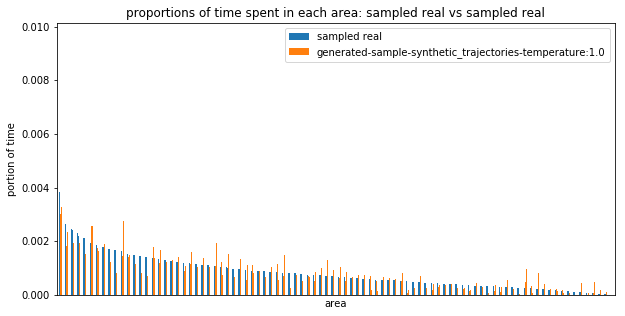

In [480]:
generated_trajectories_name = None
area_to_time_spent_dict_real_all = get_area_to_time_spent_comparison_dict(real_trajectories)
area_to_time_spent_dict_real_sample = get_area_to_time_spent_comparison_dict(real_trajectories_sample)

for column_name in models_matrix_df.columns:
    generated_trajectories_name = models_matrix_df.loc[generated_trajectories_name_idx][column_name]
    generated_trajectories = generated_sample_trajectories_map[generated_trajectories_name]
    area_to_time_spent_dict_generated = get_area_to_time_spent_comparison_dict(generated_trajectories)

    # Calculate correlation between generated synthetic data and full (all) real trajectories
    area_to_time_spent_comparison_df_all = get_area_to_time_spent_comparison_df(area_to_time_spent_dict_real_all,
                                                                            area_to_time_spent_dict_generated,
                                                                           d1_name='all real', d2_name=generated_trajectories_name)
    area_to_time_spent_correlation_all = area_to_time_spent_comparison_df_all['all real'].corr(area_to_time_spent_comparison_df_all[generated_trajectories_name])
    models_matrix_df.loc[area_to_dwell_time_correlation_all, column_name] = area_to_time_spent_correlation_all
    
    # Calculate correlation between generated synthetic data and sampled real trajectories
    area_to_time_spent_comparison_df_sample = get_area_to_time_spent_comparison_df(area_to_time_spent_dict_real_sample,
                                                                            area_to_time_spent_dict_generated,
                                                                           d1_name='sampled real', d2_name=generated_trajectories_name)
    area_to_time_spent_correlation_sample = area_to_time_spent_comparison_df_sample['sampled real'].corr(area_to_time_spent_comparison_df_sample[generated_trajectories_name])
    models_matrix_df.loc[area_to_dwell_time_correlation_sample, column_name] = area_to_time_spent_correlation_sample

# plot one of them...
plot_time_spent_comparison(area_to_time_spent_comparison_df_sample,
                        name1='sampled real',  name2=generated_trajectories_name)

In [481]:
models_matrix_df

default  \
rnn_bidirectional                                                                               False   
max_length                                                                                         24   
rnn_layers                                                                                          2   
rnn_size                                                                                          128   
dropout                                                                                           0.1   
dim_embeddings                                                                                     50   
temperature                                                                                       0.8   
batch size                                                                                        512   
generated_trajectories_name                         generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                                           200   
total unseen bigrams                                                                              282   
portion unseen bigrams                                                                     0.00115574   
portion unseen bigrams allowing skips                                                     0.000766393   
home labels match portion                                                                      0.5975   
work labels match portion                                                                       0.529   
correlation of aggregate dwell time in each are...                                           0.713681   
correlation of aggregate dwell time in each are...                                           0.824335   

                                                                                            default.1  \
rnn_bidirectional                                                                               False   
max_length                                                                                         24   
rnn_layers                                                                                          2   
rnn_size                                                                                          128   
dropout                                                                                           0.1   
dim_embeddings                                                                                     50   
temperature                                                                                       0.9   
batch size                                                                                        512   
generated_trajectories_name                         generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                                           678   
total unseen bigrams                                                                              820   
portion unseen bigrams                                                                     0.00336066   
portion unseen bigrams allowing skips                                                       0.0027541   
home labels match portion                                                                       0.591   
work labels match portion                                                                       0.524   
correlation of aggregate dwell time in each are...                                            0.76857   
correlation of aggregate dwell time in each are...                                           0.841401   

                                                                                            default.2  \
rnn_bidirectional                                                                               False   
max_length                                                                                         24 

### Measure how closely the distribution of the number of distinct places visited by each synthetic user resembles distribution from real data

Some users only go 2 or 3 distinct places during their week... while others visit 10-30 different places...

We use the Pearson's chi-squared test for homogeneity to compare the distribution of the number of distinct places visited between the generated synthetic data and the real data.

For each trajectory vector in the synthetic and real data, we take the number of distinct places visited as a category.  We compute the frequency of this category (number of distinct places visited) occuring in each of the synthetic and real datasets.

We then test the null hypothesis that:

The proportion of generated synthetic trajectory vectors with P distinct places visited is the same as the proportion of real trajectory vectors with P distinct places visited, for each P occuring in either of the generated or real datasets.

We test the null hypothesis with a significance level of 0.05.




In [482]:
def get_distinct_places_distribution(vectors):
    """
    Get the distribution of number of distinct places visited by each user.
    
    Returns a list of length matching number of user data vectors, 
    where each element corresponds to the number of distinct places visited by that user.
    """
    distinct_places_counts_per_user = []
    for vector in vectors:
        # get the number of distinct places visited by that user
        distinct_places = set()
        for area in vector:
            if area not in distinct_places:
                distinct_places.add(area)
        # append the number of distinct places visited by that user
        distinct_places_counts_per_user.append(len(distinct_places))
    return distinct_places_counts_per_user

TODO: What are better buckets?
The chi-square test is consistently failing.  Is this a bucketing issue?

- make vector of distinct places per user, where each value in vector is for a distinct user and represents number of distinct places they visited
- determine buckets/categories, and make mapping for buckets
    - this is to handle the long tail for the distributions (test less for data with counts < 5)
    - buckets must span all values in min to max (M) range, where the last buckets covers all values greater than M
- map values for distinc places to new 'categories' (where category is bucket of distinct places)
- transform vectors where the values are categories into mapping of {'category' --> frequency of occurance}
    - make sure all buckets in map, i.e. fill with zeros if necessary

- make mapping for real trajectories observations, values of map are the observations for each category
- from that real data, make expected observations with counts matching sample size of 2000
    - i.e. scale each value by 2000/N
    - i.e. each value for expected observations = frequency * 2000/N

Compare generated sample data to the expected values!
- first do a sanity test: sample 2000 trajectories from real trajectories
- run chi-squared test for each generated sample



In [483]:
generated_data_sample_size = 2000
real_data_population_size = len(real_trajectories)
observed_to_expected_multiplier = generated_data_sample_size/real_data_population_size
print('real population size: %s, generated data sample size: %s, (sample size)/(population size)=(%s)' % (real_data_population_size, generated_data_sample_size, observed_to_expected_multiplier))

real population size: 22704, generated data sample size: 2000, (sample size)/(population size)=(0.08809020436927413)


In [662]:
generated_trajectories_name = 'generated-sample-synthetic_trajectories-temperature:0.9'
generated_trajectories = generated_sample_trajectories_map[generated_trajectories_name]

distinct_places_counts_per_user_real = get_distinct_places_distribution(real_trajectories)
distinct_places_counts_per_user_generated = get_distinct_places_distribution(generated_trajectories)

print(min(distinct_places_counts_per_user_real))
print(max(distinct_places_counts_per_user_real))

1
43


In [679]:
# Make mapping of distinct places count to frequency
def get_distinct_places_category_to_frequency_map(dp_list):
    mapping = {c:0 for c in range(0, max(dp_list)+1)}
    for d in dp_list:
        mapping[d] += 1
    return mapping


In [680]:
distinct_places_category_to_frequency_map_real = get_distinct_places_category_to_frequency_map(distinct_places_counts_per_user_real)
distinct_places_category_to_frequency_map_real

{0: 0,
 1: 2,
 2: 2101,
 3: 3418,
 4: 4006,
 5: 3639,
 6: 2853,
 7: 2072,
 8: 1415,
 9: 941,
 10: 630,
 11: 423,
 12: 347,
 13: 209,
 14: 150,
 15: 123,
 16: 99,
 17: 75,
 18: 45,
 19: 37,
 20: 24,
 21: 26,
 22: 17,
 23: 11,
 24: 8,
 25: 6,
 26: 8,
 27: 3,
 28: 2,
 29: 4,
 30: 1,
 31: 2,
 32: 1,
 33: 0,
 34: 2,
 35: 1,
 36: 1,
 37: 1,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 1}

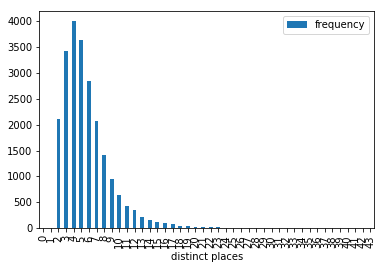

In [681]:
def plot_distinct_places_category_to_frequency(observed_values_map, expected_values_map=None,
                                               name1='frequency', name2='expected frequency'):
    df = pd.DataFrame.from_dict({
        'distinct places': list(observed_values_map.keys()),
        name1: list(observed_values_map.values())
    }).set_index('distinct places')
    if expected_values_map:
        df2 = pd.DataFrame.from_dict({
            'distinct places': list(expected_values_map.keys()),
            name2: list(expected_values_map.values())
        }).set_index('distinct places')
        df[name2] = df2[name2]
    df.plot(kind='bar')

plot_distinct_places_category_to_frequency(distinct_places_category_to_frequency_map_real)

Handle binning the data

In [664]:
real_reference_binned_series, bins = pd.qcut(distinct_places_counts_per_user_real, quantiles, retbins=True,
                                             duplicates='drop')
real_reference_binned_series

[(6.0, 7.0], (3.0, 4.0], (9.0, 11.0], (4.0, 5.0], (4.0, 5.0], ..., (3.0, 4.0], (4.0, 5.0], (2.0, 3.0], (5.0, 6.0], (2.0, 3.0]]
Length: 22704
Categories (10, interval[float64]): [(0.999, 2.0] < (2.0, 3.0] < (3.0, 4.0] < (4.0, 5.0] ... (7.0, 8.0] < (8.0, 9.0] < (9.0, 11.0] < (11.0, 43.0]]

In [667]:
print(len(bins))
bins

11


array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 11., 43.])

In [668]:
# Get quantile bins based on the distribution of distinct places in thee full real population
# Bins chosen based on how dividing data can get close as possible to equal bins, 
#  but because of data distribution (e.g. so many points with 4 distinct places), exactly equal bins impossible
# At the same time, bin the real data into these buckets -- this is the output binned series
# Each element in the binned series indicates the bin it belongs in, indicating that bin by the index of bin
# Then reuse these bins to bin the generated data
quantiles = 15 # Turns into 10 with drop duplicates (command to drop duplicate edges -- error on quantiles=10 otherwise)
real_reference_binned_series, bins = pd.qcut(distinct_places_counts_per_user_real, quantiles, retbins=True, labels=False, duplicates='drop')
real_reference_binned_series


array([5, 2, 8, ..., 1, 4, 1])

In [671]:
bin_index_to_name_map = {i:'(%s, %s]' % (bins[i], bins[i+1]) for i in range(1, len(bins)-1)}
bin_index_to_name_map[0] = '<= %s' % bins[1]

bin_index_to_name_map[len(bins)-2] = '> %s' % bins[len(bins)-2]
bin_index_to_name_map

{1: '(2.0, 3.0]',
 2: '(3.0, 4.0]',
 3: '(4.0, 5.0]',
 4: '(5.0, 6.0]',
 5: '(6.0, 7.0]',
 6: '(7.0, 8.0]',
 7: '(8.0, 9.0]',
 8: '(9.0, 11.0]',
 9: '> 11.0',
 0: '<= 2.0'}

In [682]:
def get_binned_series_to_binned_map(binned_series):
    """
    Transforms the binned series into a mapping of {bin -> frequency count}
    """
    # First make mapping of {bin index -> frequency}
    binned_map = {i:0 for i in range(len(bins)-1)}
    for item in binned_series:
        binned_map[item] += 1
    # rename bins based on their span
    binned_map = {bin_index_to_name_map[k]:v for k,v in binned_map.items()}
    return binned_map

{'<= 2.0': 2103,
 '(2.0, 3.0]': 3418,
 '(3.0, 4.0]': 4006,
 '(4.0, 5.0]': 3639,
 '(5.0, 6.0]': 2853,
 '(6.0, 7.0]': 2072,
 '(7.0, 8.0]': 1415,
 '(8.0, 9.0]': 941,
 '(9.0, 11.0]': 1053,
 '> 11.0': 1204}

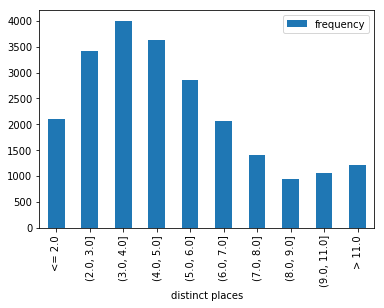

In [686]:
real_reference_binned_map = get_binned_series_to_binned_map(real_reference_binned_series)
plot_distinct_places_category_to_frequency(real_reference_binned_map)
real_reference_binned_map

{'<= 2.0': 185.2536997885835,
 '(2.0, 3.0]': 301.09231853417896,
 '(3.0, 4.0]': 352.88935870331215,
 '(4.0, 5.0]': 320.5602536997886,
 '(5.0, 6.0]': 251.32135306553909,
 '(6.0, 7.0]': 182.522903453136,
 '(7.0, 8.0]': 124.6476391825229,
 '(8.0, 9.0]': 82.89288231148696,
 '(9.0, 11.0]': 92.75898520084566,
 '> 11.0': 106.06060606060605}

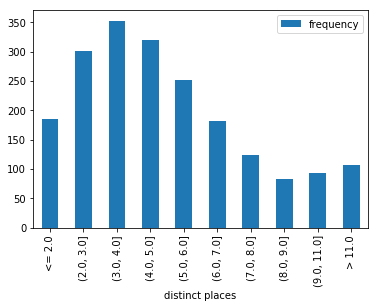

In [689]:
# Make expected frequencies mapping for the sample size (values scaled and rounded to integer values)
expected_category_to_frequency_map = {c: f*observed_to_expected_multiplier for c, f in real_reference_binned_map.items()}
plot_distinct_places_category_to_frequency(expected_category_to_frequency_map)
expected_category_to_frequency_map

{'<= 2.0': 186,
 '(2.0, 3.0]': 307,
 '(3.0, 4.0]': 340,
 '(4.0, 5.0]': 324,
 '(5.0, 6.0]': 268,
 '(6.0, 7.0]': 182,
 '(7.0, 8.0]': 120,
 '(8.0, 9.0]': 89,
 '(9.0, 11.0]': 82,
 '> 11.0': 102}

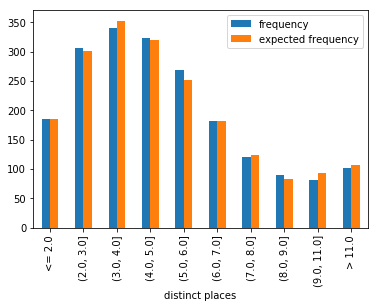

In [690]:
# sanity check: now do chi-squared test for real sample observations vs expected observations
# Bin the sample data with chosen bins
distinct_places_counts_per_user_real_sample = get_distinct_places_distribution(real_trajectories_sample)
real_sample_binned_series = pd.cut(distinct_places_counts_per_user_real_sample, bins=bins, labels=False, include_lowest=True)
real_sample_binned_map = get_binned_series_to_binned_map(real_sample_binned_series)
plot_distinct_places_category_to_frequency(real_sample_binned_map, expected_category_to_frequency_map)
real_sample_binned_map

In [691]:
from scipy.stats import chisquare
chisq, p = chisquare(list(real_sample_binned_map.values()),
               f_exp=list(expected_category_to_frequency_map.values()))

print('The chi-squared test statistic: %s\np-value: %s' % (chisq, p))

The chi-squared test statistic: 3.7615900244811638
p-value: 0.9263918037338105


27
generated-sample-synthetic_trajectories-temperature:0.9


{'<= 2.0': 343,
 '(2.0, 3.0]': 556,
 '(3.0, 4.0]': 424,
 '(4.0, 5.0]': 280,
 '(5.0, 6.0]': 183,
 '(6.0, 7.0]': 103,
 '(7.0, 8.0]': 40,
 '(8.0, 9.0]': 31,
 '(9.0, 11.0]': 22,
 '> 11.0': 18}

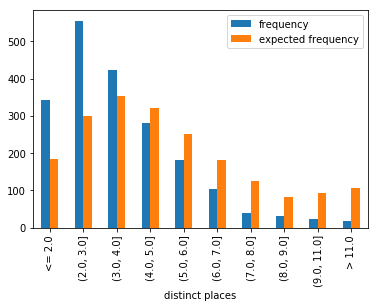

In [693]:
# Bin the sample data with chosen bins
distinct_places_counts_per_user_generated_sample = get_distinct_places_distribution(generated_trajectories)
print(max(distinct_places_counts_per_user_generated_sample))
print(generated_trajectories_name)
generated_sample_binned_series = pd.cut(distinct_places_counts_per_user_generated_sample, bins=bins, labels=False, include_lowest=True)
generated_sample_binned_map = get_binned_series_to_binned_map(generated_sample_binned_series)
plot_distinct_places_category_to_frequency(generated_sample_binned_map, expected_category_to_frequency_map)
generated_sample_binned_map

In [694]:
from scipy.stats import chisquare
chisq, p = chisquare(list(generated_sample_binned_map.values()),
               f_exp=list(expected_category_to_frequency_map.values()))

print('The chi-squared test statistic: %s\np-value: %s' % (chisq, p))

The chi-squared test statistic: 639.8746331187283
p-value: 5.752198629096544e-132


Add chi-squared test p-value as a row in the model comparison matrix

In [696]:
# Add dummy row
chi_squared_p_value = 'chi-squared homogeneity test p-value'
models_matrix_df = add_dummy_row(models_matrix_df, chi_squared_p_value)
models_matrix_df

Q-bidirectional.2  \
rnn_bidirectional                                                                   True   
max_length                                                                            60   
rnn_layers                                                                             3   
rnn_size                                                                             128   
dropout                                                                              0.1   
dim_embeddings                                                                       128   
temperature                                                                            1   
batch size                                                                          1024   
generated_trajectories_name            generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                             1632   
total unseen bigrams                                                                1854   
portion unseen bigrams                                                        0.00759836   
portion unseen bigrams allowing skips                                         0.00633197   
home labels match portion                                                          0.848   
work labels match portion                                                         0.7375   
distinct unseen bigrams                                                              NaN   
total unseen bigrams                                                                 NaN   
portion unseen bigrams                                                               NaN   
portion unseen bigrams allowing skips                                                NaN   
home labels match portion                                                            NaN   
work labels match portion                                                            NaN   
chi-squared homogeneity test p-value                                                 NaN   

                                                                       Q-bidirectional.1  \
rnn_bidirectional                                                                   True   
max_length                                                                            60   
rnn_layers                                                                             3   
rnn_size                                                                             128   
dropout                                                                              0.1   
dim_embeddings                                                                       128   
temperature                                                                          0.9   
batch size                                                                          1024   
generated_trajectories_name            generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                              753   
total unseen bigrams                                                                 909   
portion unseen bigrams                                                        0.00372541   
portion unseen bigrams allowing skips                                         0.00283197   
home labels match portion                                                          0.845   
work labels match portion                                                          0.741   
distinct unseen bigrams                                                              NaN   
total unseen bigrams                                                                 NaN   
portion unseen bigrams                                                               NaN   
portion unseen bigrams allowing skips                                                NaN   
home labels match portion                                                            NaN   
work labels match port

In [700]:
# Keep best result handy to inspect
best_p = None
best_chi_generated_trajectories_name = None

for column_name in models_matrix_df.columns:
    generated_trajectories_name = models_matrix_df.loc[generated_trajectories_name_idx][column_name]
    generated_trajectories = generated_sample_trajectories_map[generated_trajectories_name]
    distinct_places_counts_per_user = get_distinct_places_distribution(generated_trajectories)
    generated_sample_binned_series = pd.cut(distinct_places_counts_per_user, bins=bins, labels=False, include_lowest=True)
    generated_sample_binned_map = get_binned_series_to_binned_map(generated_sample_binned_series)
    
    chisq, p = chisquare(list(generated_sample_binned_map.values()),
               f_exp=list(expected_category_to_frequency_map.values()))
#     print('column: %s\nchisquared value: %s\np-value: %s' % (column_name, chisq, p))
    models_matrix_df.loc[chi_squared_p_value, column_name] = p
    if (not best_p) or p > (best_p):
        best_p = p
        best_chi_generated_trajectories_name = generated_trajectories_name

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(models_matrix_df)

Q-bidirectional.2  \
rnn_bidirectional                                                                   True   
max_length                                                                            60   
rnn_layers                                                                             3   
rnn_size                                                                             128   
dropout                                                                              0.1   
dim_embeddings                                                                       128   
temperature                                                                            1   
batch size                                                                          1024   
generated_trajectories_name            generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                             1632   
total unseen bigrams                                                                1854   
portion unseen bigrams                                                        0.00759836   
portion unseen bigrams allowing skips                                         0.00633197   
home labels match portion                                                          0.848   
work labels match portion                                                         0.7375   
distinct unseen bigrams                                                              NaN   
total unseen bigrams                                                                 NaN   
portion unseen bigrams                                                               NaN   
portion unseen bigrams allowing skips                                                NaN   
home labels match portion                                                            NaN   
work labels match portion                                                            NaN   
chi-squared homogeneity test p-value                                           0.0723055   

                                                                       Q-bidirectional.1  \
rnn_bidirectional                                                                   True   
max_length                                                                            60   
rnn_layers                                                                             3   
rnn_size                                                                             128   
dropout                                                                              0.1   
dim_embeddings                                                                       128   
temperature                                                                          0.9   
batch size                                                                          1024   
generated_trajectories_name            generated-sample-trajectories-rnn_bidirectiona...   
distinct unseen bigrams                                                              753   
total unseen bigrams                                                                 909   
portion unseen bigrams                                                        0.00372541   
portion unseen bigrams allowing skips                                         0.00283197   
home labels match portion                                                          0.845   
work labels match portion                                                          0.741   
distinct unseen bigrams                                                              NaN   
total unseen bigrams                                                                 NaN   
portion unseen bigrams                                                               NaN   
portion unseen bigrams allowing skips                                                NaN   
home labels match portion                                                            NaN   
work labels match port

Plot two graphs showing the distributions of the number of distinct places visited by each user, one for the real dataset and another for the synthetic dataset.

best generated trajectories: generated-sample-trajectories-rnn_bidirectional:True-max_len:60-rnn_layers:3-rnn_size:128-dropout:0.1-dim_embeddings:128-temperature:1.0
best p-value: 0.07230553344565953


{'<= 2.0': 157,
 '(2.0, 3.0]': 302,
 '(3.0, 4.0]': 376,
 '(4.0, 5.0]': 342,
 '(5.0, 6.0]': 239,
 '(6.0, 7.0]': 169,
 '(7.0, 8.0]': 116,
 '(8.0, 9.0]': 85,
 '(9.0, 11.0]': 84,
 '> 11.0': 130}

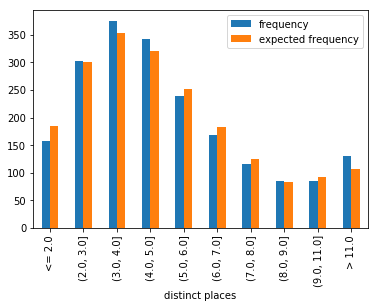

In [703]:
print('best generated trajectories:', best_chi_generated_trajectories_name)
print('best p-value:', best_p)

generated_trajectories = generated_sample_trajectories_map[best_chi_generated_trajectories_name]
distinct_places_counts_per_user = get_distinct_places_distribution(generated_trajectories)
generated_sample_binned_series = pd.cut(distinct_places_counts_per_user, bins=bins, labels=False, include_lowest=True)
generated_sample_binned_map = get_binned_series_to_binned_map(generated_sample_binned_series)

plot_distinct_places_category_to_frequency(generated_sample_binned_map, expected_category_to_frequency_map)
generated_sample_binned_map

### Evaluate how much privacy was retained vs lost

TODO

Develop a metric to compute the degree to which the generated vectors match real vectors.

For a given home label there are 3 quantities:
- Total number of *real* vectors with that home label
- Total number of *fake* vectors with that home label (we may generate N times the number of real vectors)
- Number of fake vectors that exactly match a real vector


For now we just measure number of fake vectors matching real vectors...